# DiploDatos Kaggle Competition

Presentamos un código creado como ejemplo de base para la competición.

Deben:

- Explorar los datos y aprender de ellos.
- Probar diferentes modelos y ver cuáles ajustan mejor dado los datos.
- **Obtener una accuracy mejor que la que se presenta en este ejemplo.**
- Tratar de obtener la accuracy más alta posible!
- Discutir la elección de modelo.

El análisis exploratorio y el preprocesamiento de los datos queda a libertad de cada grupo y no deben quedarse con este simple ejemplo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

from sklearn.tree import DecisionTreeClassifier
from IPython.display import display

## Leer el dataset

In [2]:
hacer_analisis_inicial = True

### Train

Cargamos los datos de entrenamiento que vamos a utilizar para generar nuestro modelo. 

In [3]:
train_df = pd.read_csv('https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Pr%C3%A1ctico/diabetes_prediction_dataset_train-labeled.csv')

In [4]:
def analisis_inicial(df):
    print(df.shape)
    display(df.head())
    display(df.info())
    display(df.describe())

In [5]:
if hacer_analisis_inicial: analisis_inicial(train_df)

(95000, 10)


patient  gender   age  hypertension  heart_disease smoking_history    bmi  \
0    20432    Male   4.0             0              0           never  19.28   
1    49682  Female  50.0             0              0          former  27.32   
2    73886  Female  43.0             0              0           never  21.54   
3    53144    Male  64.0             0              0         current  28.22   
4    98507    Male  10.0             0              0         No Info  15.46   

   HbA1c_level  blood_glucose_level  diabetes  
0          3.5                  155         0  
1          5.7                  159         0  
2          4.5                  145         0  
3          6.0                  130         0  
4          6.1                  140         0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95000 entries, 0 to 94999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient              95000 non-null  int64  
 1   gender               95000 non-null  object 
 2   age                  95000 non-null  float64
 3   hypertension         95000 non-null  int64  
 4   heart_disease        95000 non-null  int64  
 5   smoking_history      95000 non-null  object 
 6   bmi                  95000 non-null  float64
 7   HbA1c_level          95000 non-null  float64
 8   blood_glucose_level  95000 non-null  int64  
 9   diabetes             95000 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 7.2+ MB


None

patient           age  hypertension  heart_disease           bmi  \
count   95000.000000  95000.000000  95000.000000   95000.000000  95000.000000   
mean    50016.501389     41.935269      0.075074       0.039463     27.320879   
std     28868.357071     22.514788      0.263512       0.194695      6.626335   
min         1.000000      0.080000      0.000000       0.000000     10.010000   
25%     25021.750000     24.000000      0.000000       0.000000     23.650000   
50%     50024.000000     43.000000      0.000000       0.000000     27.320000   
75%     75024.250000     60.000000      0.000000       0.000000     29.580000   
max    100000.000000     80.000000      1.000000       1.000000     95.690000   

        HbA1c_level  blood_glucose_level      diabetes  
count  95000.000000         95000.000000  95000.000000  
mean       5.527659           138.070537      0.085074  
std        1.070261            40.739962      0.278993  
min        3.500000            80.000000      0.000000  
25%        4.800000           100.000000      0.000000  
50%        5.800000           140.000000      0.000000  
75%        6.200000           159.000000      0.000000  
max        9.000000           300.000000      1.000000

La columna ***`diabetes`*** es la columna que debemos predecir. En el dataset de Test esta columna tiene valores nulos.

### Test

Cargamos los datos de test. Estos datos son los que van a utilizar para predecir si las personas tienen diabetes y generar alrchivo `submision.csv` para utilizar en la competencia de Kaggle.

In [6]:
test_df = pd.read_csv('https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Pr%C3%A1ctico/diabetes_prediction_dataset_test.csv')
print(test_df.shape)

(5000, 10)


In [7]:
if hacer_analisis_inicial: analisis_inicial(test_df)

(5000, 10)


patient  gender   age  hypertension  heart_disease smoking_history    bmi  \
0    49267    Male  53.0             0              0           never  31.99   
1    82280  Female  22.0             0              0           never  25.96   
2    33216  Female  37.0             0              0           never  22.24   
3    94551  Female  29.0             0              0     not current  31.01   
4    43760    Male  30.0             0              0            ever  28.66   

   HbA1c_level  blood_glucose_level  diabetes  
0          4.5                  126       NaN  
1          6.6                  130       NaN  
2          6.2                  126       NaN  
3          5.0                   80       NaN  
4          6.6                  100       NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient              5000 non-null   int64  
 1   gender               5000 non-null   object 
 2   age                  5000 non-null   float64
 3   hypertension         5000 non-null   int64  
 4   heart_disease        5000 non-null   int64  
 5   smoking_history      5000 non-null   object 
 6   bmi                  5000 non-null   float64
 7   HbA1c_level          5000 non-null   float64
 8   blood_glucose_level  5000 non-null   int64  
 9   diabetes             0 non-null      float64
dtypes: float64(4), int64(4), object(2)
memory usage: 390.8+ KB


None

patient          age  hypertension  heart_disease          bmi  \
count   5000.000000  5000.000000   5000.000000    5000.000000  5000.000000   
mean   49696.473600    40.947016      0.070600       0.038600    27.318644   
std    28855.568156    22.537466      0.256181       0.192659     6.832943   
min        7.000000     0.160000      0.000000       0.000000    10.620000   
25%    24720.750000    23.000000      0.000000       0.000000    23.410000   
50%    49522.500000    41.000000      0.000000       0.000000    27.320000   
75%    74686.000000    59.000000      0.000000       0.000000    29.632500   
max    99970.000000    80.000000      1.000000       1.000000    88.760000   

       HbA1c_level  blood_glucose_level  diabetes  
count  5000.000000          5000.000000       0.0  
mean      5.524620           137.821000       NaN  
std       1.078559            40.101933       NaN  
min       3.500000            80.000000       NaN  
25%       4.800000           100.000000       NaN  
50%       5.800000           140.000000       NaN  
75%       6.200000           159.000000       NaN  
max       9.000000           300.000000       NaN

## Analisis de los datos 

veamos si hay desbalances..

<Axes: >

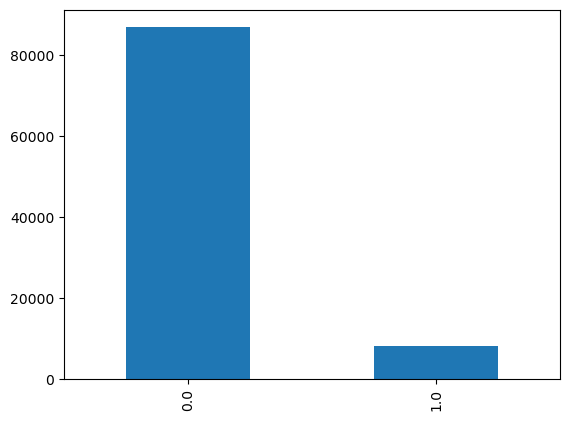

In [8]:
if hacer_analisis_inicial: display(train_df.groupby("patient").diabetes.mean().value_counts().plot(kind='bar'))

**¡Clases desbalanceadas!** y que sucede si analizamos genero y edad?

Necesitamos contruir nuestros conjuntos de datos para realizar los entrenamientos:

In [9]:
def preprocess_df(df, std = False):
    imputer_cols = ["patient", "age", "hypertension", "heart_disease", "bmi" ,"HbA1c_level", "blood_glucose_level"]#, "diabetes"]
    imputer = SimpleImputer(strategy="median")
    df[imputer_cols] = imputer.fit_transform(df[imputer_cols])
    y = df.diabetes
    X = df.drop('diabetes',axis=1)
    Id = X['patient']
    Id = np.int32(Id)
    X.drop('patient',axis=1,inplace=True)
    label_cols = ["gender", "smoking_history"]

    for col in label_cols:
        X[col] = X[col].astype(str)
        X[col] = LabelEncoder().fit_transform(X[col])
    
    # Using IPython.display to show X.describe() without indentation
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        display(X.describe())
    if std:
        x_names = X.columns
        X = StandardScaler().fit_transform(X)
        X = pd.DataFrame(X, columns=x_names)

    return X,y, Id

In [10]:
X, y, train_Id = preprocess_df(train_df)

gender           age  hypertension  heart_disease  \
count  95000.000000  95000.000000  95000.000000   95000.000000   
mean       0.415295     41.935269      0.075074       0.039463   
std        0.493117     22.514788      0.263512       0.194695   
min        0.000000      0.080000      0.000000       0.000000   
25%        0.000000     24.000000      0.000000       0.000000   
50%        0.000000     43.000000      0.000000       0.000000   
75%        1.000000     60.000000      0.000000       0.000000   
max        2.000000     80.000000      1.000000       1.000000   

       smoking_history           bmi   HbA1c_level  blood_glucose_level  
count     95000.000000  95000.000000  95000.000000         95000.000000  
mean          2.182516     27.320879      5.527659           138.070537  
std           1.889361      6.626335      1.070261            40.739962  
min           0.000000     10.010000      3.500000            80.000000  
25%           0.000000     23.650000      4.800000           100.000000  
50%           3.000000     27.320000      5.800000           140.000000  
75%           4.000000     29.580000      6.200000           159.000000  
max           5.000000     95.690000      9.000000           300.000000

# Aplico lo mismo al test para comparar medias y distribuciones

In [11]:
X_test,Y_test, test_id = preprocess_df(test_df)
test_id

gender          age  hypertension  heart_disease  smoking_history  \
count  5000.000000  5000.000000   5000.000000    5000.000000      5000.000000   
mean      0.402600    40.947016      0.070600       0.038600         2.125200   
std       0.491286    22.537466      0.256181       0.192659         1.894688   
min       0.000000     0.160000      0.000000       0.000000         0.000000   
25%       0.000000    23.000000      0.000000       0.000000         0.000000   
50%       0.000000    41.000000      0.000000       0.000000         2.000000   
75%       1.000000    59.000000      0.000000       0.000000         4.000000   
max       2.000000    80.000000      1.000000       1.000000         5.000000   

               bmi  HbA1c_level  blood_glucose_level  
count  5000.000000  5000.000000          5000.000000  
mean     27.318644     5.524620           137.821000  
std       6.832943     1.078559            40.101933  
min      10.620000     3.500000            80.000000  
25%      23.410000     4.800000           100.000000  
50%      27.320000     5.800000           140.000000  
75%      29.632500     6.200000           159.000000  
max      88.760000     9.000000           300.000000

array([49267, 82280, 33216, ..., 47271, 97941, 47305])

Notamos que la media y std entre training y test son similares pero veremos mejor graficamente las distribuciones:

<Figure size 800x400 with 0 Axes>

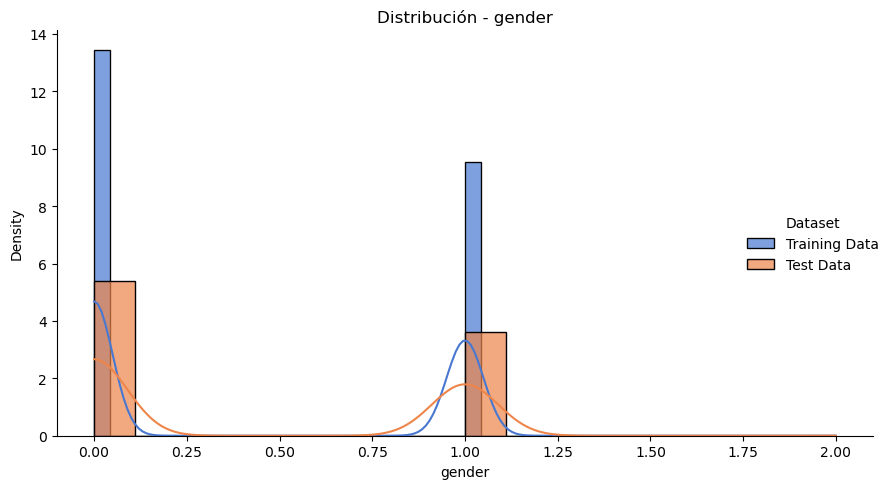

<Figure size 800x400 with 0 Axes>

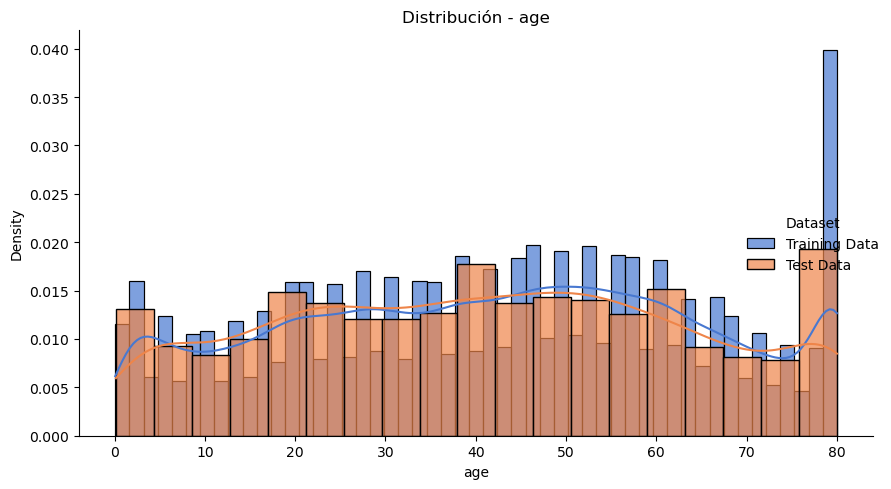

<Figure size 800x400 with 0 Axes>

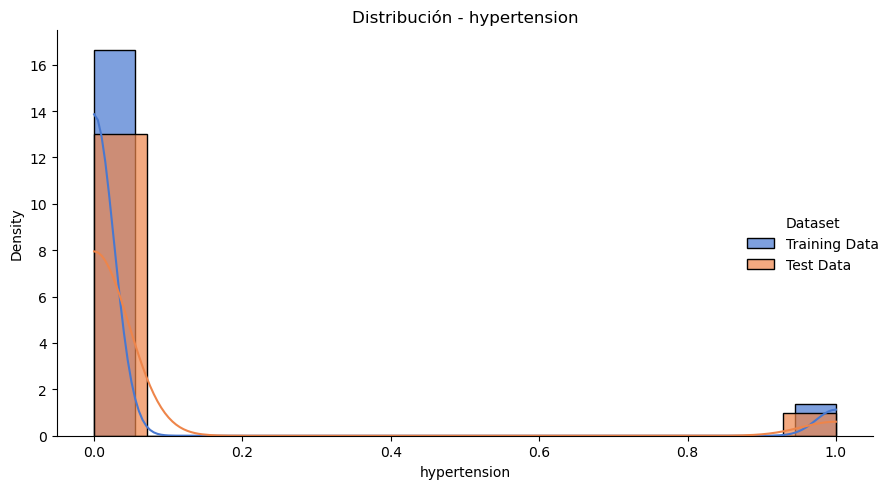

<Figure size 800x400 with 0 Axes>

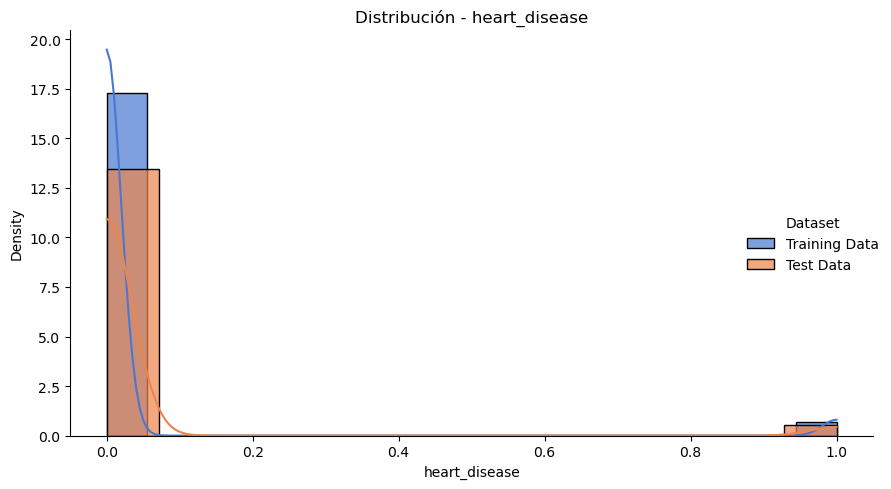

<Figure size 800x400 with 0 Axes>

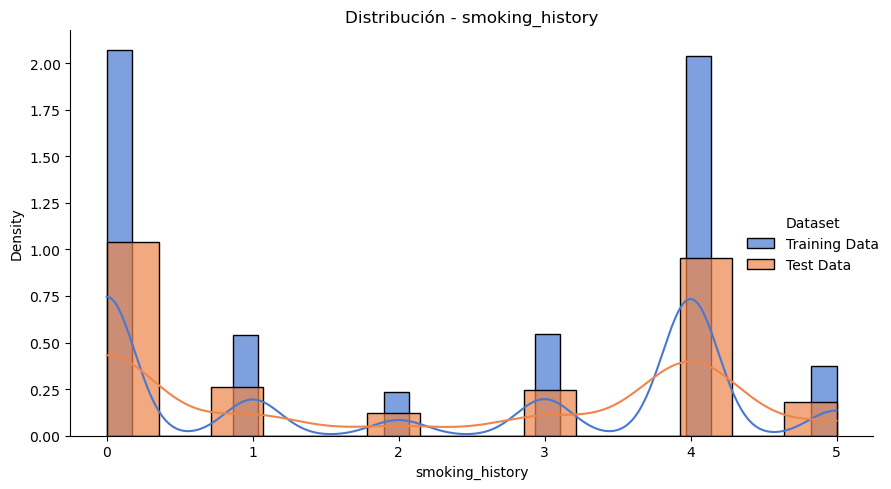

<Figure size 800x400 with 0 Axes>

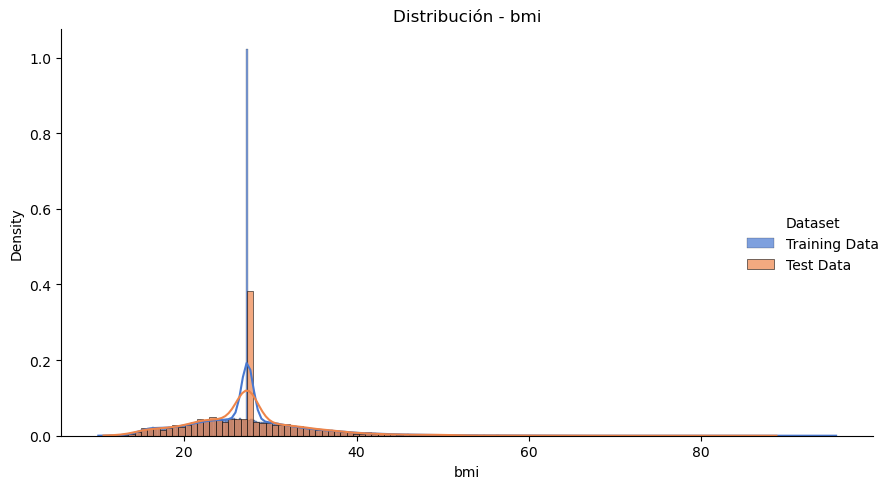

<Figure size 800x400 with 0 Axes>

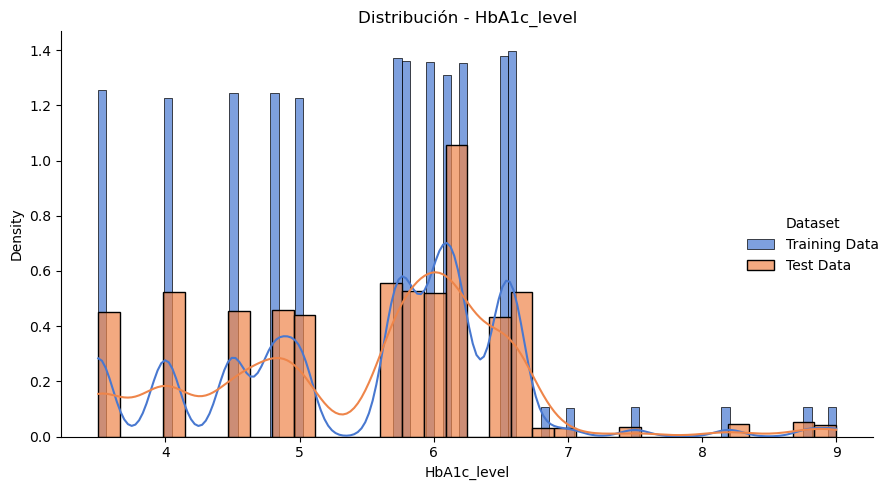

<Figure size 800x400 with 0 Axes>

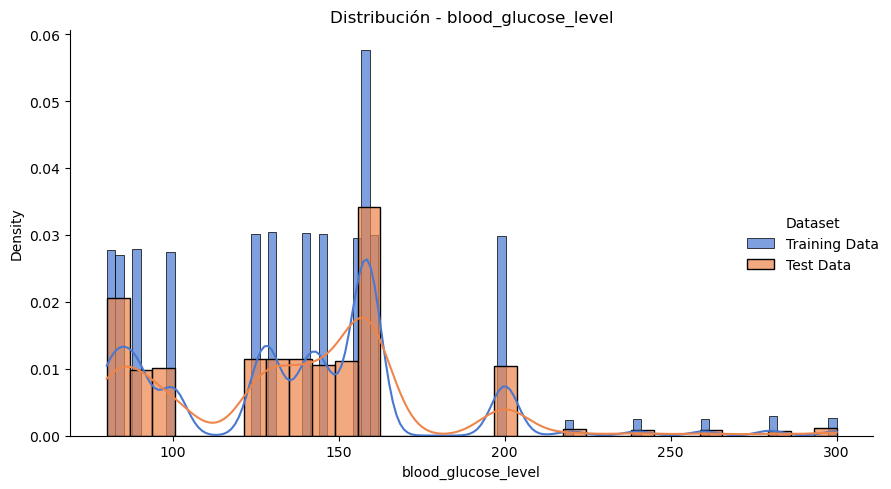

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes cargados tus datos en los DataFrames X y X_test

# Combinar ambos DataFrames para tener todas las observaciones en un solo DataFrame
X['Data'] = 'Training Data'
X_test['Data'] = 'Test Data'
combined_df = pd.concat([X, X_test])

# Función para plotear histogramas y gráficos de densidad para cada variable
def plot_distributions(data, variable):
    plt.figure(figsize=(8, 4))
    g = sns.FacetGrid(data, hue='Data', palette='muted', height=5, aspect=1.5)
    g.map(sns.histplot, variable, kde=True, alpha=0.7, stat="density")
    g.add_legend(title='Dataset')
    plt.title(f'Distribución - {variable}')
    plt.tight_layout()
    plt.show()

# Comparar distribuciones para cada variable en ambos conjuntos de datos
X.drop(columns=['Data'], inplace=True)
X_test.drop(columns=['Data'], inplace=True)

if hacer_analisis_inicial:
    for column in X.columns:
        plot_distributions(combined_df, column)


Confirmamos que son distribuciones similares para todas las variables

A partir de los datos en las variables `X` e `y` separamos en train y en test, siempre dentro del universo de training

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 8)

### Planteo de modelos
Tienen que elegir los 2 mejores modelos así que prueben con varios.

In [14]:
clfs = [DecisionTreeClassifier()]
names = ['Árbol de decisión']

trained_models = []
accuracy_models = []
for clf,name in zip(clfs,names):
    print(name)
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    train_predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, train_predictions)
    print(f"Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    # plot_confusion_matrix(clf,x_test,y_test)
    trained_models.append(clf)
    accuracy_models.append(accuracy*100)

Árbol de decisión
Accuracy train Árbol de decisión: 99.92%
Accuracy test Árbol de decisión: 95.14%


### Algún tipo de ajuste de hiperparámetros de los modelos elegidos

In [15]:
grid = GridSearchCV(DecisionTreeClassifier(),
 {'criterion':('gini','entropy'),
 'splitter':("best","random"),
  'min_samples_leaf':(1, 2, 5),
  'min_samples_split':(2, 3, 5, 10, 50, 100),
 'max_depth':(5,10,20)})
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

Accuracy train Arbol de decisión: 97.14%
Accuracy test Arbol de decisión: 97.36%


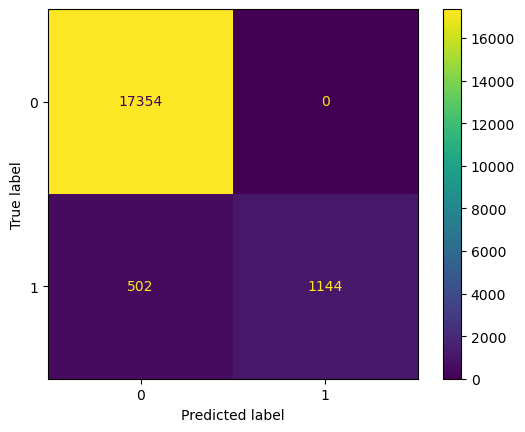

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       1.00      0.70      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.99      0.85      0.90     19000
weighted avg       0.97      0.97      0.97     19000



In [16]:
clf = DecisionTreeClassifier(**grid.best_params_).fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train Arbol de decisión: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test Arbol de decisión: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))

In [17]:
FOLDS=5
cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=10)

x_train2 = np.array(x_train)
y_train2 = np.array(y_train)


for clfi, name in zip([DecisionTreeClassifier(**grid.best_params_)],names):
    print(clfi)
    avg_accuracy = 0
    for fold, (train_idx, val_idx) in enumerate(cv.split(x_train2, y_train2)):
        xi, yi = x_train2[train_idx], y_train2[train_idx]
        x_valid, y_valid = x_train2[val_idx], y_train2[val_idx]
        clfi = clfi.fit(xi, yi)

        test_predictions = clfi.predict(x_valid)
        accuracy = accuracy_score(y_valid, test_predictions)
        avg_accuracy +=accuracy
        print(f"Precisión test fold {fold}: {accuracy * 100.0 :.2f}" % ())

    avg_accuracy /= FOLDS
    print(f'Avg. accuracy = {avg_accuracy * 100}')

DecisionTreeClassifier(max_depth=5)
Precisión test fold 0: 97.22
Precisión test fold 1: 97.13
Precisión test fold 2: 97.16
Precisión test fold 3: 97.04
Precisión test fold 4: 97.14
Avg. accuracy = 97.13947368421053


Baja la accuracy haciendo el grid search, queremos ver qué parametros tiene por defecto, porque alguno de ellos es mejor que los elegidos

In [18]:
DecisionTreeClassifier?

Suponemos que puede ser porque el max_depth es None por defecto, pero en el grid search es maximo 20, eso genera sobreajuste pero hace que aumente el training accuracy y baje el test accuracy en el arbol normal

## Generar la salida para entregar

Para poder evaluar nuestra predicción los datos de prueba deben tener exactamente el mismo tratamiento que los datos de entrenamiento, la cual ya la generamos arriba con X_test e Y_test

Generamos la salida con el test

In [19]:
test_pred = np.int64(clf.predict(X_test))

Con el resultado predicho tenemos que generar el archivo `.csv` para subir a la competencia de kaggle:

In [20]:
submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["patient", "diabetes"])
submission.to_csv("sample_submission.csv", header=True, index=False)

**Suerte!! :D**

Modelo 1) Catboost:

In [21]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


Primero catboost por defecto:

Learning rate set to 0.06547
0:	learn: 0.5433588	total: 157ms	remaining: 2m 36s
1:	learn: 0.4606485	total: 168ms	remaining: 1m 24s
2:	learn: 0.3908886	total: 182ms	remaining: 1m
3:	learn: 0.3122253	total: 196ms	remaining: 48.7s
4:	learn: 0.2671385	total: 209ms	remaining: 41.7s
5:	learn: 0.2291372	total: 225ms	remaining: 37.3s
6:	learn: 0.2061716	total: 239ms	remaining: 33.9s
7:	learn: 0.1869986	total: 252ms	remaining: 31.2s
8:	learn: 0.1720111	total: 264ms	remaining: 29.1s
9:	learn: 0.1498474	total: 277ms	remaining: 27.4s
10:	learn: 0.1383397	total: 291ms	remaining: 26.2s
11:	learn: 0.1268258	total: 305ms	remaining: 25.1s
12:	learn: 0.1208058	total: 318ms	remaining: 24.1s
13:	learn: 0.1132993	total: 332ms	remaining: 23.4s
14:	learn: 0.1080679	total: 346ms	remaining: 22.8s
15:	learn: 0.1041428	total: 363ms	remaining: 22.3s
16:	learn: 0.1012650	total: 377ms	remaining: 21.8s
17:	learn: 0.0992208	total: 390ms	remaining: 21.3s
18:	learn: 0.0970334	total: 404ms	remaining: 20.9s
19:	learn: 0.

165:	learn: 0.0758623	total: 3.41s	remaining: 17.1s
166:	learn: 0.0758321	total: 3.43s	remaining: 17.1s
167:	learn: 0.0758099	total: 3.45s	remaining: 17.1s
168:	learn: 0.0757852	total: 3.47s	remaining: 17.1s
169:	learn: 0.0757464	total: 3.49s	remaining: 17s
170:	learn: 0.0757340	total: 3.5s	remaining: 17s
171:	learn: 0.0757044	total: 3.52s	remaining: 17s
172:	learn: 0.0756703	total: 3.54s	remaining: 16.9s
173:	learn: 0.0756466	total: 3.56s	remaining: 16.9s
174:	learn: 0.0756144	total: 3.58s	remaining: 16.9s
175:	learn: 0.0755993	total: 3.6s	remaining: 16.8s
176:	learn: 0.0755710	total: 3.61s	remaining: 16.8s
177:	learn: 0.0755442	total: 3.63s	remaining: 16.8s
178:	learn: 0.0755095	total: 3.65s	remaining: 16.7s
179:	learn: 0.0754699	total: 3.67s	remaining: 16.7s
180:	learn: 0.0754547	total: 3.69s	remaining: 16.7s
181:	learn: 0.0754310	total: 3.71s	remaining: 16.7s
182:	learn: 0.0753948	total: 3.73s	remaining: 16.6s
183:	learn: 0.0753800	total: 3.74s	remaining: 16.6s
184:	learn: 0.075353

326:	learn: 0.0718434	total: 6.65s	remaining: 13.7s
327:	learn: 0.0718230	total: 6.67s	remaining: 13.7s
328:	learn: 0.0717812	total: 6.69s	remaining: 13.6s
329:	learn: 0.0717540	total: 6.71s	remaining: 13.6s
330:	learn: 0.0717371	total: 6.74s	remaining: 13.6s
331:	learn: 0.0717163	total: 6.76s	remaining: 13.6s
332:	learn: 0.0716866	total: 6.78s	remaining: 13.6s
333:	learn: 0.0716664	total: 6.81s	remaining: 13.6s
334:	learn: 0.0716634	total: 6.84s	remaining: 13.6s
335:	learn: 0.0716484	total: 6.87s	remaining: 13.6s
336:	learn: 0.0716322	total: 6.9s	remaining: 13.6s
337:	learn: 0.0716074	total: 6.93s	remaining: 13.6s
338:	learn: 0.0715864	total: 6.97s	remaining: 13.6s
339:	learn: 0.0715583	total: 7s	remaining: 13.6s
340:	learn: 0.0715300	total: 7.03s	remaining: 13.6s
341:	learn: 0.0714945	total: 7.06s	remaining: 13.6s
342:	learn: 0.0714744	total: 7.09s	remaining: 13.6s
343:	learn: 0.0714424	total: 7.12s	remaining: 13.6s
344:	learn: 0.0714285	total: 7.14s	remaining: 13.6s
345:	learn: 0.07

497:	learn: 0.0683069	total: 9.64s	remaining: 9.72s
498:	learn: 0.0682779	total: 9.66s	remaining: 9.7s
499:	learn: 0.0682572	total: 9.68s	remaining: 9.68s
500:	learn: 0.0682439	total: 9.7s	remaining: 9.66s
501:	learn: 0.0682336	total: 9.71s	remaining: 9.64s
502:	learn: 0.0682045	total: 9.73s	remaining: 9.62s
503:	learn: 0.0681810	total: 9.76s	remaining: 9.6s
504:	learn: 0.0681724	total: 9.77s	remaining: 9.58s
505:	learn: 0.0681639	total: 9.8s	remaining: 9.57s
506:	learn: 0.0681383	total: 9.82s	remaining: 9.55s
507:	learn: 0.0681135	total: 9.84s	remaining: 9.53s
508:	learn: 0.0680933	total: 9.87s	remaining: 9.52s
509:	learn: 0.0680773	total: 9.89s	remaining: 9.5s
510:	learn: 0.0680594	total: 9.91s	remaining: 9.48s
511:	learn: 0.0680434	total: 9.93s	remaining: 9.47s
512:	learn: 0.0680259	total: 9.95s	remaining: 9.45s
513:	learn: 0.0680029	total: 9.98s	remaining: 9.43s
514:	learn: 0.0679767	total: 10s	remaining: 9.42s
515:	learn: 0.0679595	total: 10s	remaining: 9.4s
516:	learn: 0.0679477	

666:	learn: 0.0653576	total: 12.6s	remaining: 6.31s
667:	learn: 0.0653449	total: 12.7s	remaining: 6.29s
668:	learn: 0.0653234	total: 12.7s	remaining: 6.27s
669:	learn: 0.0653113	total: 12.7s	remaining: 6.25s
670:	learn: 0.0653030	total: 12.7s	remaining: 6.22s
671:	learn: 0.0652869	total: 12.7s	remaining: 6.2s
672:	learn: 0.0652716	total: 12.7s	remaining: 6.18s
673:	learn: 0.0652628	total: 12.7s	remaining: 6.16s
674:	learn: 0.0652459	total: 12.8s	remaining: 6.14s
675:	learn: 0.0652370	total: 12.8s	remaining: 6.12s
676:	learn: 0.0652216	total: 12.8s	remaining: 6.1s
677:	learn: 0.0651995	total: 12.8s	remaining: 6.08s
678:	learn: 0.0651866	total: 12.8s	remaining: 6.06s
679:	learn: 0.0651702	total: 12.8s	remaining: 6.04s
680:	learn: 0.0651522	total: 12.9s	remaining: 6.02s
681:	learn: 0.0651385	total: 12.9s	remaining: 6s
682:	learn: 0.0651098	total: 12.9s	remaining: 5.98s
683:	learn: 0.0650951	total: 12.9s	remaining: 5.96s
684:	learn: 0.0650835	total: 12.9s	remaining: 5.94s
685:	learn: 0.065

832:	learn: 0.0629325	total: 15.2s	remaining: 3.05s
833:	learn: 0.0629250	total: 15.2s	remaining: 3.03s
834:	learn: 0.0629117	total: 15.2s	remaining: 3.01s
835:	learn: 0.0628995	total: 15.3s	remaining: 2.99s
836:	learn: 0.0628881	total: 15.3s	remaining: 2.98s
837:	learn: 0.0628805	total: 15.3s	remaining: 2.96s
838:	learn: 0.0628673	total: 15.3s	remaining: 2.94s
839:	learn: 0.0628451	total: 15.3s	remaining: 2.92s
840:	learn: 0.0628337	total: 15.3s	remaining: 2.9s
841:	learn: 0.0628174	total: 15.4s	remaining: 2.88s
842:	learn: 0.0628022	total: 15.4s	remaining: 2.86s
843:	learn: 0.0627953	total: 15.4s	remaining: 2.84s
844:	learn: 0.0627680	total: 15.4s	remaining: 2.83s
845:	learn: 0.0627574	total: 15.4s	remaining: 2.81s
846:	learn: 0.0627486	total: 15.4s	remaining: 2.79s
847:	learn: 0.0627364	total: 15.5s	remaining: 2.77s
848:	learn: 0.0627285	total: 15.5s	remaining: 2.75s
849:	learn: 0.0627094	total: 15.5s	remaining: 2.73s
850:	learn: 0.0627039	total: 15.5s	remaining: 2.71s
851:	learn: 0

997:	learn: 0.0607321	total: 18.3s	remaining: 36.6ms
998:	learn: 0.0607170	total: 18.3s	remaining: 18.3ms
999:	learn: 0.0607070	total: 18.3s	remaining: 0us
Accuracy train CatBoost: 97.87%
Accuracy test CatBoost: 97.20%


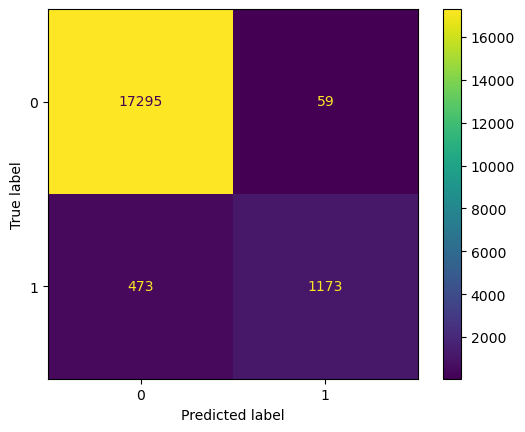

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17354
           1       0.95      0.71      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.96      0.85      0.90     19000
weighted avg       0.97      0.97      0.97     19000



In [22]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Supongamos que ya tienes tus datos de entrenamiento y prueba: x_train, x_test, y_train, y_test

# Crea el modelo CatBoostClassifier
catboost_model = CatBoostClassifier()

# Ajusta el modelo final en el conjunto de entrenamiento completo
catboost_model.fit(x_train, y_train)

# Evalúa el modelo en los datos de entrenamiento
train_predictions = catboost_model.predict(x_train)
accuracy_train = accuracy_score(y_train, train_predictions)
print("Accuracy train CatBoost: %.2f%%" % (accuracy_train * 100.0))

# Evalúa el modelo en los datos de prueba
test_predictions = catboost_model.predict(x_test)
accuracy_test = accuracy_score(y_test, test_predictions)
print("Accuracy test CatBoost: %.2f%%" % (accuracy_test * 100.0))

# Muestra la matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

# Imprime el reporte de clasificación
print(classification_report(y_test, test_predictions))

En el test da 97.2%, un poco peor que el profe que obtubo 97.36%

Aplicamos grid search:

In [23]:
?CatBoostClassifier

0:	learn: 0.6751798	test: 0.6751367	best: 0.6751367 (0)	total: 13.3ms	remaining: 1.32s
1:	learn: 0.6487628	test: 0.6486492	best: 0.6486492 (1)	total: 26ms	remaining: 1.27s
2:	learn: 0.6320559	test: 0.6319119	best: 0.6319119 (2)	total: 37.1ms	remaining: 1.2s
3:	learn: 0.6137973	test: 0.6135661	best: 0.6135661 (3)	total: 47.8ms	remaining: 1.15s
4:	learn: 0.5984597	test: 0.5981410	best: 0.5981410 (4)	total: 60.6ms	remaining: 1.15s
5:	learn: 0.5837303	test: 0.5833392	best: 0.5833392 (5)	total: 72.4ms	remaining: 1.13s
6:	learn: 0.5684962	test: 0.5680361	best: 0.5680361 (6)	total: 89ms	remaining: 1.18s
7:	learn: 0.5535730	test: 0.5530226	best: 0.5530226 (7)	total: 102ms	remaining: 1.18s
8:	learn: 0.5318612	test: 0.5312062	best: 0.5312062 (8)	total: 114ms	remaining: 1.16s
9:	learn: 0.5186609	test: 0.5179752	best: 0.5179752 (9)	total: 129ms	remaining: 1.16s
10:	learn: 0.5057844	test: 0.5050554	best: 0.5050554 (10)	total: 142ms	remaining: 1.15s
11:	learn: 0.4938720	test: 0.4930726	best: 0.49307

98:	learn: 0.1060952	test: 0.1044650	best: 0.1044650 (98)	total: 1.49s	remaining: 15.1ms
99:	learn: 0.1053712	test: 0.1037431	best: 0.1037431 (99)	total: 1.51s	remaining: 0us

bestTest = 0.1037430701
bestIteration = 99

0:	loss: 0.1037431	best: 0.1037431 (0)	total: 1.59s	remaining: 2m 7s
0:	learn: 0.5321992	test: 0.5315864	best: 0.5315864 (0)	total: 33.8ms	remaining: 3.34s
1:	learn: 0.3737594	test: 0.3726083	best: 0.3726083 (1)	total: 49.5ms	remaining: 2.42s
2:	learn: 0.2850116	test: 0.2836554	best: 0.2836554 (2)	total: 62.7ms	remaining: 2.03s
3:	learn: 0.2257724	test: 0.2242879	best: 0.2242879 (3)	total: 76.1ms	remaining: 1.83s
4:	learn: 0.1720653	test: 0.1705126	best: 0.1705126 (4)	total: 88.8ms	remaining: 1.69s
5:	learn: 0.1541824	test: 0.1524535	best: 0.1524535 (5)	total: 108ms	remaining: 1.69s
6:	learn: 0.1281352	test: 0.1265664	best: 0.1265664 (6)	total: 124ms	remaining: 1.65s
7:	learn: 0.1174664	test: 0.1158205	best: 0.1158205 (7)	total: 144ms	remaining: 1.65s
8:	learn: 0.110097

98:	learn: 0.0780214	test: 0.0787439	best: 0.0787166 (95)	total: 1.7s	remaining: 17.2ms
99:	learn: 0.0779994	test: 0.0787295	best: 0.0787166 (95)	total: 1.71s	remaining: 0us

bestTest = 0.07871657905
bestIteration = 95

1:	loss: 0.0787166	best: 0.0787166 (1)	total: 3.33s	remaining: 2m 11s
0:	learn: 0.4092819	test: 0.4081319	best: 0.4081319 (0)	total: 14.2ms	remaining: 1.4s
1:	learn: 0.2314505	test: 0.2297780	best: 0.2297780 (1)	total: 26.2ms	remaining: 1.28s
2:	learn: 0.1438581	test: 0.1421685	best: 0.1421685 (2)	total: 40.8ms	remaining: 1.32s
3:	learn: 0.1169833	test: 0.1151304	best: 0.1151304 (3)	total: 55.6ms	remaining: 1.33s
4:	learn: 0.1039039	test: 0.1020631	best: 0.1020631 (4)	total: 69.4ms	remaining: 1.32s
5:	learn: 0.0968635	test: 0.0950378	best: 0.0950378 (5)	total: 82.5ms	remaining: 1.29s
6:	learn: 0.0943865	test: 0.0926496	best: 0.0926496 (6)	total: 94.7ms	remaining: 1.26s
7:	learn: 0.0922656	test: 0.0905734	best: 0.0905734 (7)	total: 109ms	remaining: 1.25s
8:	learn: 0.0906

96:	learn: 0.0755108	test: 0.0786605	best: 0.0784401 (80)	total: 1.53s	remaining: 47.3ms
97:	learn: 0.0754920	test: 0.0786765	best: 0.0784401 (80)	total: 1.55s	remaining: 31.7ms
98:	learn: 0.0754619	test: 0.0786872	best: 0.0784401 (80)	total: 1.58s	remaining: 15.9ms
99:	learn: 0.0754376	test: 0.0786909	best: 0.0784401 (80)	total: 1.59s	remaining: 0us

bestTest = 0.07844012613
bestIteration = 80

2:	loss: 0.0784401	best: 0.0784401 (2)	total: 4.95s	remaining: 2m 8s
0:	learn: 0.6756236	test: 0.6755978	best: 0.6755978 (0)	total: 30.4ms	remaining: 3.01s
1:	learn: 0.6507423	test: 0.6506672	best: 0.6506672 (1)	total: 59.6ms	remaining: 2.92s
2:	learn: 0.6343675	test: 0.6342636	best: 0.6342636 (2)	total: 88.3ms	remaining: 2.85s
3:	learn: 0.6163851	test: 0.6162170	best: 0.6162170 (3)	total: 121ms	remaining: 2.91s
4:	learn: 0.6012820	test: 0.6010333	best: 0.6010333 (4)	total: 144ms	remaining: 2.73s
5:	learn: 0.5867539	test: 0.5864482	best: 0.5864482 (5)	total: 160ms	remaining: 2.5s
6:	learn: 0.57

96:	learn: 0.1161157	test: 0.1142883	best: 0.1142883 (96)	total: 1.64s	remaining: 50.6ms
97:	learn: 0.1150443	test: 0.1132193	best: 0.1132193 (97)	total: 1.65s	remaining: 33.8ms
98:	learn: 0.1140181	test: 0.1121921	best: 0.1121921 (98)	total: 1.67s	remaining: 16.9ms
99:	learn: 0.1134373	test: 0.1116179	best: 0.1116179 (99)	total: 1.7s	remaining: 0us

bestTest = 0.1116178782
bestIteration = 99

3:	loss: 0.1116179	best: 0.0784401 (2)	total: 6.67s	remaining: 2m 8s
0:	learn: 0.5349391	test: 0.5344323	best: 0.5344323 (0)	total: 28.6ms	remaining: 2.83s
1:	learn: 0.3817560	test: 0.3807410	best: 0.3807410 (1)	total: 51.2ms	remaining: 2.51s
2:	learn: 0.2918026	test: 0.2902880	best: 0.2902880 (2)	total: 72.8ms	remaining: 2.35s
3:	learn: 0.2308478	test: 0.2291820	best: 0.2291820 (3)	total: 88.7ms	remaining: 2.13s
4:	learn: 0.1720747	test: 0.1706503	best: 0.1706503 (4)	total: 113ms	remaining: 2.14s
5:	learn: 0.1533436	test: 0.1517049	best: 0.1517049 (5)	total: 134ms	remaining: 2.1s
6:	learn: 0.139

89:	learn: 0.0785402	test: 0.0787955	best: 0.0787915 (88)	total: 1.43s	remaining: 159ms
90:	learn: 0.0785288	test: 0.0787926	best: 0.0787915 (88)	total: 1.44s	remaining: 143ms
91:	learn: 0.0785012	test: 0.0787919	best: 0.0787915 (88)	total: 1.46s	remaining: 127ms
92:	learn: 0.0784577	test: 0.0787700	best: 0.0787700 (92)	total: 1.47s	remaining: 111ms
93:	learn: 0.0784289	test: 0.0787625	best: 0.0787625 (93)	total: 1.49s	remaining: 94.8ms
94:	learn: 0.0784104	test: 0.0787588	best: 0.0787588 (94)	total: 1.5s	remaining: 79ms
95:	learn: 0.0783762	test: 0.0787455	best: 0.0787455 (95)	total: 1.52s	remaining: 63.2ms
96:	learn: 0.0783587	test: 0.0787560	best: 0.0787455 (95)	total: 1.53s	remaining: 47.3ms
97:	learn: 0.0782993	test: 0.0786880	best: 0.0786880 (97)	total: 1.54s	remaining: 31.5ms
98:	learn: 0.0782826	test: 0.0786806	best: 0.0786806 (98)	total: 1.56s	remaining: 15.8ms
99:	learn: 0.0782567	test: 0.0786884	best: 0.0786806 (98)	total: 1.58s	remaining: 0us

bestTest = 0.07868060266
bestI

89:	learn: 0.0764508	test: 0.0791101	best: 0.0787655 (69)	total: 1.34s	remaining: 150ms
90:	learn: 0.0763921	test: 0.0791299	best: 0.0787655 (69)	total: 1.36s	remaining: 134ms
91:	learn: 0.0763650	test: 0.0791498	best: 0.0787655 (69)	total: 1.37s	remaining: 119ms
92:	learn: 0.0763236	test: 0.0791496	best: 0.0787655 (69)	total: 1.39s	remaining: 104ms
93:	learn: 0.0762870	test: 0.0791708	best: 0.0787655 (69)	total: 1.4s	remaining: 89.3ms
94:	learn: 0.0761007	test: 0.0790116	best: 0.0787655 (69)	total: 1.41s	remaining: 74.4ms
95:	learn: 0.0760387	test: 0.0790619	best: 0.0787655 (69)	total: 1.43s	remaining: 59.4ms
96:	learn: 0.0759812	test: 0.0790585	best: 0.0787655 (69)	total: 1.44s	remaining: 44.5ms
97:	learn: 0.0759685	test: 0.0790465	best: 0.0787655 (69)	total: 1.45s	remaining: 29.6ms
98:	learn: 0.0759236	test: 0.0790833	best: 0.0787655 (69)	total: 1.46s	remaining: 14.8ms
99:	learn: 0.0758514	test: 0.0791153	best: 0.0787655 (69)	total: 1.48s	remaining: 0us

bestTest = 0.07876549602
bes

89:	learn: 0.1330841	test: 0.1312786	best: 0.1312786 (89)	total: 1.39s	remaining: 155ms
90:	learn: 0.1316928	test: 0.1298926	best: 0.1298926 (90)	total: 1.41s	remaining: 139ms
91:	learn: 0.1299743	test: 0.1281726	best: 0.1281726 (91)	total: 1.42s	remaining: 124ms
92:	learn: 0.1292862	test: 0.1274759	best: 0.1274759 (92)	total: 1.44s	remaining: 108ms
93:	learn: 0.1286101	test: 0.1267920	best: 0.1267920 (93)	total: 1.45s	remaining: 92.5ms
94:	learn: 0.1273927	test: 0.1255788	best: 0.1255788 (94)	total: 1.46s	remaining: 77ms
95:	learn: 0.1263929	test: 0.1245669	best: 0.1245669 (95)	total: 1.48s	remaining: 61.6ms
96:	learn: 0.1248746	test: 0.1230520	best: 0.1230520 (96)	total: 1.5s	remaining: 46.2ms
97:	learn: 0.1237707	test: 0.1219482	best: 0.1219482 (97)	total: 1.51s	remaining: 30.8ms
98:	learn: 0.1227415	test: 0.1209191	best: 0.1209191 (98)	total: 1.52s	remaining: 15.4ms
99:	learn: 0.1217653	test: 0.1199515	best: 0.1199515 (99)	total: 1.54s	remaining: 0us

bestTest = 0.1199515171
bestIt

94:	learn: 0.0791742	test: 0.0793104	best: 0.0793103 (93)	total: 1.35s	remaining: 71.1ms
95:	learn: 0.0791578	test: 0.0793225	best: 0.0793103 (93)	total: 1.36s	remaining: 56.8ms
96:	learn: 0.0791318	test: 0.0793208	best: 0.0793103 (93)	total: 1.38s	remaining: 42.5ms
97:	learn: 0.0790999	test: 0.0792882	best: 0.0792882 (97)	total: 1.39s	remaining: 28.3ms
98:	learn: 0.0790733	test: 0.0792788	best: 0.0792788 (98)	total: 1.4s	remaining: 14.1ms
99:	learn: 0.0790361	test: 0.0792502	best: 0.0792502 (99)	total: 1.41s	remaining: 0us

bestTest = 0.07925019339
bestIteration = 99

7:	loss: 0.0792502	best: 0.0784401 (2)	total: 12.8s	remaining: 1m 56s
0:	learn: 0.4162914	test: 0.4154494	best: 0.4154494 (0)	total: 11.2ms	remaining: 1.1s
1:	learn: 0.2470894	test: 0.2456797	best: 0.2456797 (1)	total: 22.1ms	remaining: 1.08s
2:	learn: 0.1784855	test: 0.1768162	best: 0.1768162 (2)	total: 34.7ms	remaining: 1.12s
3:	learn: 0.1281418	test: 0.1265111	best: 0.1265111 (3)	total: 46.7ms	remaining: 1.12s
4:	lear

96:	learn: 0.0767620	test: 0.0790750	best: 0.0790598 (95)	total: 1.23s	remaining: 37.9ms
97:	learn: 0.0767290	test: 0.0791139	best: 0.0790598 (95)	total: 1.24s	remaining: 25.4ms
98:	learn: 0.0766982	test: 0.0791534	best: 0.0790598 (95)	total: 1.26s	remaining: 12.7ms
99:	learn: 0.0766746	test: 0.0791741	best: 0.0790598 (95)	total: 1.28s	remaining: 0us

bestTest = 0.07905980781
bestIteration = 95

8:	loss: 0.0790598	best: 0.0784401 (2)	total: 14.1s	remaining: 1m 52s
0:	learn: 0.6751798	test: 0.6751367	best: 0.6751367 (0)	total: 21.9ms	remaining: 4.35s
1:	learn: 0.6487628	test: 0.6486492	best: 0.6486492 (1)	total: 38.6ms	remaining: 3.82s
2:	learn: 0.6320559	test: 0.6319119	best: 0.6319119 (2)	total: 58.2ms	remaining: 3.82s
3:	learn: 0.6137973	test: 0.6135661	best: 0.6135661 (3)	total: 71.1ms	remaining: 3.48s
4:	learn: 0.5984597	test: 0.5981410	best: 0.5981410 (4)	total: 86.3ms	remaining: 3.37s
5:	learn: 0.5837303	test: 0.5833392	best: 0.5833392 (5)	total: 104ms	remaining: 3.37s
6:	learn: 

96:	learn: 0.1072336	test: 0.1056054	best: 0.1056054 (96)	total: 1.44s	remaining: 1.53s
97:	learn: 0.1065605	test: 0.1049221	best: 0.1049221 (97)	total: 1.45s	remaining: 1.51s
98:	learn: 0.1060952	test: 0.1044650	best: 0.1044650 (98)	total: 1.47s	remaining: 1.5s
99:	learn: 0.1053712	test: 0.1037431	best: 0.1037431 (99)	total: 1.48s	remaining: 1.48s
100:	learn: 0.1047063	test: 0.1030760	best: 0.1030760 (100)	total: 1.5s	remaining: 1.47s
101:	learn: 0.1041280	test: 0.1025027	best: 0.1025027 (101)	total: 1.51s	remaining: 1.45s
102:	learn: 0.1037549	test: 0.1021272	best: 0.1021272 (102)	total: 1.52s	remaining: 1.43s
103:	learn: 0.1031471	test: 0.1015243	best: 0.1015243 (103)	total: 1.54s	remaining: 1.42s
104:	learn: 0.1025951	test: 0.1009790	best: 0.1009790 (104)	total: 1.55s	remaining: 1.41s
105:	learn: 0.1023734	test: 0.1007575	best: 0.1007575 (105)	total: 1.57s	remaining: 1.39s
106:	learn: 0.1018539	test: 0.1002369	best: 0.1002369 (106)	total: 1.58s	remaining: 1.38s
107:	learn: 0.101479

198:	learn: 0.0881057	test: 0.0867178	best: 0.0867178 (198)	total: 2.94s	remaining: 14.8ms
199:	learn: 0.0880692	test: 0.0866853	best: 0.0866853 (199)	total: 2.96s	remaining: 0us

bestTest = 0.08668526023
bestIteration = 199

9:	loss: 0.0866853	best: 0.0784401 (2)	total: 17.1s	remaining: 2m 1s
0:	learn: 0.5321992	test: 0.5315864	best: 0.5315864 (0)	total: 12.2ms	remaining: 2.43s
1:	learn: 0.3737594	test: 0.3726083	best: 0.3726083 (1)	total: 23.7ms	remaining: 2.35s
2:	learn: 0.2850116	test: 0.2836554	best: 0.2836554 (2)	total: 36.7ms	remaining: 2.41s
3:	learn: 0.2257724	test: 0.2242879	best: 0.2242879 (3)	total: 54.1ms	remaining: 2.65s
4:	learn: 0.1720653	test: 0.1705126	best: 0.1705126 (4)	total: 67.6ms	remaining: 2.63s
5:	learn: 0.1541824	test: 0.1524535	best: 0.1524535 (5)	total: 78.8ms	remaining: 2.55s
6:	learn: 0.1281352	test: 0.1265664	best: 0.1265664 (6)	total: 98.1ms	remaining: 2.71s
7:	learn: 0.1174664	test: 0.1158205	best: 0.1158205 (7)	total: 121ms	remaining: 2.91s
8:	learn: 

95:	learn: 0.0780815	test: 0.0787166	best: 0.0787166 (95)	total: 1.5s	remaining: 1.62s
96:	learn: 0.0780633	test: 0.0787463	best: 0.0787166 (95)	total: 1.51s	remaining: 1.6s
97:	learn: 0.0780436	test: 0.0787376	best: 0.0787166 (95)	total: 1.53s	remaining: 1.59s
98:	learn: 0.0780214	test: 0.0787439	best: 0.0787166 (95)	total: 1.54s	remaining: 1.57s
99:	learn: 0.0779994	test: 0.0787295	best: 0.0787166 (95)	total: 1.55s	remaining: 1.55s
100:	learn: 0.0779387	test: 0.0786724	best: 0.0786724 (100)	total: 1.57s	remaining: 1.54s
101:	learn: 0.0779131	test: 0.0786579	best: 0.0786579 (101)	total: 1.58s	remaining: 1.52s
102:	learn: 0.0778607	test: 0.0786032	best: 0.0786032 (102)	total: 1.59s	remaining: 1.5s
103:	learn: 0.0778437	test: 0.0785965	best: 0.0785965 (103)	total: 1.61s	remaining: 1.48s
104:	learn: 0.0778209	test: 0.0785923	best: 0.0785923 (104)	total: 1.62s	remaining: 1.47s
105:	learn: 0.0777939	test: 0.0785938	best: 0.0785923 (104)	total: 1.63s	remaining: 1.45s
106:	learn: 0.0777719	t

10:	loss: 0.0785373	best: 0.0784401 (2)	total: 20.1s	remaining: 2m 7s
0:	learn: 0.4092819	test: 0.4081319	best: 0.4081319 (0)	total: 13.6ms	remaining: 2.71s
1:	learn: 0.2314505	test: 0.2297780	best: 0.2297780 (1)	total: 25.4ms	remaining: 2.52s
2:	learn: 0.1438581	test: 0.1421685	best: 0.1421685 (2)	total: 38.8ms	remaining: 2.55s
3:	learn: 0.1169833	test: 0.1151304	best: 0.1151304 (3)	total: 52.2ms	remaining: 2.56s
4:	learn: 0.1039039	test: 0.1020631	best: 0.1020631 (4)	total: 65.3ms	remaining: 2.55s
5:	learn: 0.0968635	test: 0.0950378	best: 0.0950378 (5)	total: 82.4ms	remaining: 2.66s
6:	learn: 0.0943865	test: 0.0926496	best: 0.0926496 (6)	total: 98.9ms	remaining: 2.73s
7:	learn: 0.0922656	test: 0.0905734	best: 0.0905734 (7)	total: 113ms	remaining: 2.71s
8:	learn: 0.0906076	test: 0.0890674	best: 0.0890674 (8)	total: 126ms	remaining: 2.67s
9:	learn: 0.0889729	test: 0.0873875	best: 0.0873875 (9)	total: 139ms	remaining: 2.65s
10:	learn: 0.0878365	test: 0.0862308	best: 0.0862308 (10)	total

99:	learn: 0.0754376	test: 0.0786909	best: 0.0784401 (80)	total: 1.3s	remaining: 1.3s
100:	learn: 0.0753887	test: 0.0787295	best: 0.0784401 (80)	total: 1.31s	remaining: 1.28s
101:	learn: 0.0753586	test: 0.0787311	best: 0.0784401 (80)	total: 1.32s	remaining: 1.27s
102:	learn: 0.0752983	test: 0.0787607	best: 0.0784401 (80)	total: 1.33s	remaining: 1.25s
103:	learn: 0.0752736	test: 0.0787541	best: 0.0784401 (80)	total: 1.35s	remaining: 1.24s
104:	learn: 0.0752273	test: 0.0788287	best: 0.0784401 (80)	total: 1.36s	remaining: 1.23s
105:	learn: 0.0751673	test: 0.0789204	best: 0.0784401 (80)	total: 1.37s	remaining: 1.22s
106:	learn: 0.0751238	test: 0.0789207	best: 0.0784401 (80)	total: 1.38s	remaining: 1.2s
107:	learn: 0.0750706	test: 0.0789561	best: 0.0784401 (80)	total: 1.39s	remaining: 1.19s
108:	learn: 0.0750418	test: 0.0789646	best: 0.0784401 (80)	total: 1.41s	remaining: 1.18s
109:	learn: 0.0749896	test: 0.0790165	best: 0.0784401 (80)	total: 1.42s	remaining: 1.16s
110:	learn: 0.0749538	tes

194:	learn: 0.0720262	test: 0.0803795	best: 0.0784401 (80)	total: 2.6s	remaining: 66.5ms
195:	learn: 0.0720130	test: 0.0803877	best: 0.0784401 (80)	total: 2.61s	remaining: 53.2ms
196:	learn: 0.0719948	test: 0.0804130	best: 0.0784401 (80)	total: 2.63s	remaining: 40ms
197:	learn: 0.0719737	test: 0.0804076	best: 0.0784401 (80)	total: 2.64s	remaining: 26.6ms
198:	learn: 0.0719310	test: 0.0804265	best: 0.0784401 (80)	total: 2.65s	remaining: 13.3ms
199:	learn: 0.0719008	test: 0.0803635	best: 0.0784401 (80)	total: 2.66s	remaining: 0us

bestTest = 0.07844012613
bestIteration = 80

11:	loss: 0.0784401	best: 0.0784401 (2)	total: 22.8s	remaining: 2m 11s
0:	learn: 0.6756236	test: 0.6755978	best: 0.6755978 (0)	total: 17.5ms	remaining: 3.49s
1:	learn: 0.6507423	test: 0.6506672	best: 0.6506672 (1)	total: 36.2ms	remaining: 3.58s
2:	learn: 0.6343675	test: 0.6342636	best: 0.6342636 (2)	total: 49.7ms	remaining: 3.27s
3:	learn: 0.6163851	test: 0.6162170	best: 0.6162170 (3)	total: 62ms	remaining: 3.04s
4:	

96:	learn: 0.1161157	test: 0.1142883	best: 0.1142883 (96)	total: 1.42s	remaining: 1.51s
97:	learn: 0.1150443	test: 0.1132193	best: 0.1132193 (97)	total: 1.44s	remaining: 1.49s
98:	learn: 0.1140181	test: 0.1121921	best: 0.1121921 (98)	total: 1.45s	remaining: 1.48s
99:	learn: 0.1134373	test: 0.1116179	best: 0.1116179 (99)	total: 1.46s	remaining: 1.46s
100:	learn: 0.1123392	test: 0.1105259	best: 0.1105259 (100)	total: 1.48s	remaining: 1.45s
101:	learn: 0.1115815	test: 0.1097792	best: 0.1097792 (101)	total: 1.49s	remaining: 1.43s
102:	learn: 0.1111369	test: 0.1093387	best: 0.1093387 (102)	total: 1.5s	remaining: 1.42s
103:	learn: 0.1106040	test: 0.1088094	best: 0.1088094 (103)	total: 1.52s	remaining: 1.4s
104:	learn: 0.1100397	test: 0.1082457	best: 0.1082457 (104)	total: 1.53s	remaining: 1.38s
105:	learn: 0.1095749	test: 0.1077769	best: 0.1077769 (105)	total: 1.54s	remaining: 1.37s
106:	learn: 0.1089288	test: 0.1071409	best: 0.1071409 (106)	total: 1.56s	remaining: 1.35s
107:	learn: 0.108568

1:	learn: 0.3817560	test: 0.3807410	best: 0.3807410 (1)	total: 26.7ms	remaining: 2.64s
2:	learn: 0.2918026	test: 0.2902880	best: 0.2902880 (2)	total: 39.3ms	remaining: 2.58s
3:	learn: 0.2308478	test: 0.2291820	best: 0.2291820 (3)	total: 54.8ms	remaining: 2.69s
4:	learn: 0.1720747	test: 0.1706503	best: 0.1706503 (4)	total: 68.8ms	remaining: 2.68s
5:	learn: 0.1533436	test: 0.1517049	best: 0.1517049 (5)	total: 83.7ms	remaining: 2.71s
6:	learn: 0.1393136	test: 0.1377048	best: 0.1377048 (6)	total: 98.4ms	remaining: 2.71s
7:	learn: 0.1302365	test: 0.1285421	best: 0.1285421 (7)	total: 114ms	remaining: 2.74s
8:	learn: 0.1151550	test: 0.1135186	best: 0.1135186 (8)	total: 127ms	remaining: 2.7s
9:	learn: 0.1066850	test: 0.1050001	best: 0.1050001 (9)	total: 143ms	remaining: 2.71s
10:	learn: 0.1018262	test: 0.1002059	best: 0.1002059 (10)	total: 165ms	remaining: 2.83s
11:	learn: 0.0982397	test: 0.0966752	best: 0.0966752 (11)	total: 183ms	remaining: 2.87s
12:	learn: 0.0961664	test: 0.0946119	best: 0.

100:	learn: 0.0782330	test: 0.0786830	best: 0.0786806 (98)	total: 1.31s	remaining: 1.29s
101:	learn: 0.0782092	test: 0.0786800	best: 0.0786800 (101)	total: 1.32s	remaining: 1.27s
102:	learn: 0.0781806	test: 0.0786576	best: 0.0786576 (102)	total: 1.34s	remaining: 1.26s
103:	learn: 0.0781583	test: 0.0786433	best: 0.0786433 (103)	total: 1.35s	remaining: 1.25s
104:	learn: 0.0781400	test: 0.0786423	best: 0.0786423 (104)	total: 1.37s	remaining: 1.24s
105:	learn: 0.0781145	test: 0.0786189	best: 0.0786189 (105)	total: 1.38s	remaining: 1.22s
106:	learn: 0.0780862	test: 0.0786183	best: 0.0786183 (106)	total: 1.39s	remaining: 1.21s
107:	learn: 0.0780645	test: 0.0785963	best: 0.0785963 (107)	total: 1.4s	remaining: 1.19s
108:	learn: 0.0780444	test: 0.0786042	best: 0.0785963 (107)	total: 1.41s	remaining: 1.18s
109:	learn: 0.0780230	test: 0.0785972	best: 0.0785963 (107)	total: 1.42s	remaining: 1.16s
110:	learn: 0.0779827	test: 0.0785554	best: 0.0785554 (110)	total: 1.44s	remaining: 1.15s
111:	learn: 

194:	learn: 0.0758914	test: 0.0785748	best: 0.0784056 (163)	total: 2.39s	remaining: 61.3ms
195:	learn: 0.0758728	test: 0.0785761	best: 0.0784056 (163)	total: 2.4s	remaining: 49ms
196:	learn: 0.0758579	test: 0.0785699	best: 0.0784056 (163)	total: 2.41s	remaining: 36.7ms
197:	learn: 0.0758272	test: 0.0785946	best: 0.0784056 (163)	total: 2.42s	remaining: 24.5ms
198:	learn: 0.0758106	test: 0.0786218	best: 0.0784056 (163)	total: 2.43s	remaining: 12.2ms
199:	learn: 0.0757993	test: 0.0786168	best: 0.0784056 (163)	total: 2.44s	remaining: 0us

bestTest = 0.07840558747
bestIteration = 163

13:	loss: 0.0784056	best: 0.0784056 (13)	total: 28.2s	remaining: 2m 14s
0:	learn: 0.4120474	test: 0.4110204	best: 0.4110204 (0)	total: 11.5ms	remaining: 2.29s
1:	learn: 0.2366282	test: 0.2350414	best: 0.2350414 (1)	total: 21.5ms	remaining: 2.13s
2:	learn: 0.1498343	test: 0.1482297	best: 0.1482297 (2)	total: 32.2ms	remaining: 2.11s
3:	learn: 0.1219022	test: 0.1204779	best: 0.1204779 (3)	total: 43.5ms	remaining:

91:	learn: 0.0763650	test: 0.0791498	best: 0.0787655 (69)	total: 1s	remaining: 1.18s
92:	learn: 0.0763236	test: 0.0791496	best: 0.0787655 (69)	total: 1.01s	remaining: 1.17s
93:	learn: 0.0762870	test: 0.0791708	best: 0.0787655 (69)	total: 1.02s	remaining: 1.16s
94:	learn: 0.0761007	test: 0.0790116	best: 0.0787655 (69)	total: 1.04s	remaining: 1.15s
95:	learn: 0.0760387	test: 0.0790619	best: 0.0787655 (69)	total: 1.05s	remaining: 1.14s
96:	learn: 0.0759812	test: 0.0790585	best: 0.0787655 (69)	total: 1.06s	remaining: 1.12s
97:	learn: 0.0759685	test: 0.0790465	best: 0.0787655 (69)	total: 1.07s	remaining: 1.11s
98:	learn: 0.0759236	test: 0.0790833	best: 0.0787655 (69)	total: 1.08s	remaining: 1.1s
99:	learn: 0.0758514	test: 0.0791153	best: 0.0787655 (69)	total: 1.09s	remaining: 1.09s
100:	learn: 0.0757943	test: 0.0791287	best: 0.0787655 (69)	total: 1.1s	remaining: 1.08s
101:	learn: 0.0757557	test: 0.0791185	best: 0.0787655 (69)	total: 1.11s	remaining: 1.06s
102:	learn: 0.0757095	test: 0.07909

194:	learn: 0.0725022	test: 0.0797940	best: 0.0787655 (69)	total: 2.3s	remaining: 59ms
195:	learn: 0.0724634	test: 0.0798170	best: 0.0787655 (69)	total: 2.31s	remaining: 47.2ms
196:	learn: 0.0724181	test: 0.0797997	best: 0.0787655 (69)	total: 2.33s	remaining: 35.4ms
197:	learn: 0.0723914	test: 0.0797949	best: 0.0787655 (69)	total: 2.34s	remaining: 23.7ms
198:	learn: 0.0723469	test: 0.0798204	best: 0.0787655 (69)	total: 2.36s	remaining: 11.8ms
199:	learn: 0.0723222	test: 0.0798265	best: 0.0787655 (69)	total: 2.37s	remaining: 0us

bestTest = 0.07876549602
bestIteration = 69

14:	loss: 0.0787655	best: 0.0784056 (13)	total: 30.6s	remaining: 2m 14s
0:	learn: 0.6761359	test: 0.6761292	best: 0.6761292 (0)	total: 15.3ms	remaining: 3.04s
1:	learn: 0.6537480	test: 0.6537107	best: 0.6537107 (1)	total: 26.3ms	remaining: 2.61s
2:	learn: 0.6377295	test: 0.6376814	best: 0.6376814 (2)	total: 37.5ms	remaining: 2.46s
3:	learn: 0.6200831	test: 0.6199874	best: 0.6199874 (3)	total: 49.2ms	remaining: 2.41s


90:	learn: 0.1316928	test: 0.1298926	best: 0.1298926 (90)	total: 1.19s	remaining: 1.43s
91:	learn: 0.1299743	test: 0.1281726	best: 0.1281726 (91)	total: 1.21s	remaining: 1.42s
92:	learn: 0.1292862	test: 0.1274759	best: 0.1274759 (92)	total: 1.22s	remaining: 1.41s
93:	learn: 0.1286101	test: 0.1267920	best: 0.1267920 (93)	total: 1.23s	remaining: 1.39s
94:	learn: 0.1273927	test: 0.1255788	best: 0.1255788 (94)	total: 1.24s	remaining: 1.38s
95:	learn: 0.1263929	test: 0.1245669	best: 0.1245669 (95)	total: 1.26s	remaining: 1.36s
96:	learn: 0.1248746	test: 0.1230520	best: 0.1230520 (96)	total: 1.28s	remaining: 1.36s
97:	learn: 0.1237707	test: 0.1219482	best: 0.1219482 (97)	total: 1.29s	remaining: 1.35s
98:	learn: 0.1227415	test: 0.1209191	best: 0.1209191 (98)	total: 1.31s	remaining: 1.33s
99:	learn: 0.1217653	test: 0.1199515	best: 0.1199515 (99)	total: 1.32s	remaining: 1.32s
100:	learn: 0.1208078	test: 0.1189980	best: 0.1189980 (100)	total: 1.33s	remaining: 1.3s
101:	learn: 0.1198517	test: 0.1

187:	learn: 0.0912442	test: 0.0897245	best: 0.0897245 (187)	total: 2.5s	remaining: 160ms
188:	learn: 0.0911769	test: 0.0896583	best: 0.0896583 (188)	total: 2.52s	remaining: 146ms
189:	learn: 0.0910942	test: 0.0895755	best: 0.0895755 (189)	total: 2.53s	remaining: 133ms
190:	learn: 0.0909945	test: 0.0894808	best: 0.0894808 (190)	total: 2.55s	remaining: 120ms
191:	learn: 0.0909109	test: 0.0893957	best: 0.0893957 (191)	total: 2.57s	remaining: 107ms
192:	learn: 0.0908310	test: 0.0893217	best: 0.0893217 (192)	total: 2.6s	remaining: 94.3ms
193:	learn: 0.0907642	test: 0.0892564	best: 0.0892564 (193)	total: 2.62s	remaining: 80.9ms
194:	learn: 0.0907062	test: 0.0891982	best: 0.0891982 (194)	total: 2.63s	remaining: 67.5ms
195:	learn: 0.0906452	test: 0.0891375	best: 0.0891375 (195)	total: 2.65s	remaining: 54.1ms
196:	learn: 0.0905610	test: 0.0890612	best: 0.0890612 (196)	total: 2.66s	remaining: 40.6ms
197:	learn: 0.0904997	test: 0.0890037	best: 0.0890037 (197)	total: 2.68s	remaining: 27.1ms
198:	l

93:	learn: 0.0792037	test: 0.0793103	best: 0.0793103 (93)	total: 1.31s	remaining: 1.47s
94:	learn: 0.0791742	test: 0.0793104	best: 0.0793103 (93)	total: 1.32s	remaining: 1.46s
95:	learn: 0.0791578	test: 0.0793225	best: 0.0793103 (93)	total: 1.33s	remaining: 1.44s
96:	learn: 0.0791318	test: 0.0793208	best: 0.0793103 (93)	total: 1.34s	remaining: 1.43s
97:	learn: 0.0790999	test: 0.0792882	best: 0.0792882 (97)	total: 1.36s	remaining: 1.42s
98:	learn: 0.0790733	test: 0.0792788	best: 0.0792788 (98)	total: 1.37s	remaining: 1.4s
99:	learn: 0.0790361	test: 0.0792502	best: 0.0792502 (99)	total: 1.39s	remaining: 1.39s
100:	learn: 0.0790187	test: 0.0792514	best: 0.0792502 (99)	total: 1.4s	remaining: 1.37s
101:	learn: 0.0789991	test: 0.0792445	best: 0.0792445 (101)	total: 1.41s	remaining: 1.36s
102:	learn: 0.0788672	test: 0.0791311	best: 0.0791311 (102)	total: 1.43s	remaining: 1.34s
103:	learn: 0.0788507	test: 0.0791230	best: 0.0791230 (103)	total: 1.44s	remaining: 1.33s
104:	learn: 0.0788359	test:

193:	learn: 0.0768083	test: 0.0788934	best: 0.0788224 (176)	total: 2.61s	remaining: 80.7ms
194:	learn: 0.0767944	test: 0.0789086	best: 0.0788224 (176)	total: 2.62s	remaining: 67.2ms
195:	learn: 0.0767875	test: 0.0789151	best: 0.0788224 (176)	total: 2.63s	remaining: 53.7ms
196:	learn: 0.0767585	test: 0.0788989	best: 0.0788224 (176)	total: 2.64s	remaining: 40.3ms
197:	learn: 0.0767414	test: 0.0788948	best: 0.0788224 (176)	total: 2.66s	remaining: 26.8ms
198:	learn: 0.0767297	test: 0.0788964	best: 0.0788224 (176)	total: 2.67s	remaining: 13.4ms
199:	learn: 0.0767028	test: 0.0789085	best: 0.0788224 (176)	total: 2.68s	remaining: 0us

bestTest = 0.07882239896
bestIteration = 176

16:	loss: 0.0788224	best: 0.0784056 (13)	total: 36s	remaining: 2m 15s
0:	learn: 0.4162914	test: 0.4154494	best: 0.4154494 (0)	total: 17.8ms	remaining: 3.54s
1:	learn: 0.2470894	test: 0.2456797	best: 0.2456797 (1)	total: 30.2ms	remaining: 2.98s
2:	learn: 0.1784855	test: 0.1768162	best: 0.1768162 (2)	total: 43.5ms	remai

98:	learn: 0.0766982	test: 0.0791534	best: 0.0790598 (95)	total: 1.4s	remaining: 1.43s
99:	learn: 0.0766746	test: 0.0791741	best: 0.0790598 (95)	total: 1.42s	remaining: 1.42s
100:	learn: 0.0766233	test: 0.0791916	best: 0.0790598 (95)	total: 1.43s	remaining: 1.4s
101:	learn: 0.0765808	test: 0.0791606	best: 0.0790598 (95)	total: 1.45s	remaining: 1.39s
102:	learn: 0.0765522	test: 0.0791495	best: 0.0790598 (95)	total: 1.46s	remaining: 1.37s
103:	learn: 0.0765174	test: 0.0791382	best: 0.0790598 (95)	total: 1.48s	remaining: 1.36s
104:	learn: 0.0764678	test: 0.0791202	best: 0.0790598 (95)	total: 1.49s	remaining: 1.35s
105:	learn: 0.0764179	test: 0.0791586	best: 0.0790598 (95)	total: 1.5s	remaining: 1.33s
106:	learn: 0.0763804	test: 0.0791533	best: 0.0790598 (95)	total: 1.51s	remaining: 1.31s
107:	learn: 0.0763395	test: 0.0791613	best: 0.0790598 (95)	total: 1.53s	remaining: 1.3s
108:	learn: 0.0762833	test: 0.0791670	best: 0.0790598 (95)	total: 1.54s	remaining: 1.29s
109:	learn: 0.0762326	test:

191:	learn: 0.0736188	test: 0.0796639	best: 0.0790598 (95)	total: 2.71s	remaining: 113ms
192:	learn: 0.0735883	test: 0.0796621	best: 0.0790598 (95)	total: 2.73s	remaining: 99ms
193:	learn: 0.0735505	test: 0.0796900	best: 0.0790598 (95)	total: 2.74s	remaining: 84.8ms
194:	learn: 0.0735164	test: 0.0796877	best: 0.0790598 (95)	total: 2.76s	remaining: 70.7ms
195:	learn: 0.0734948	test: 0.0797038	best: 0.0790598 (95)	total: 2.77s	remaining: 56.5ms
196:	learn: 0.0734586	test: 0.0797159	best: 0.0790598 (95)	total: 2.78s	remaining: 42.4ms
197:	learn: 0.0734405	test: 0.0797210	best: 0.0790598 (95)	total: 2.8s	remaining: 28.3ms
198:	learn: 0.0734067	test: 0.0797534	best: 0.0790598 (95)	total: 2.81s	remaining: 14.1ms
199:	learn: 0.0733843	test: 0.0797570	best: 0.0790598 (95)	total: 2.83s	remaining: 0us

bestTest = 0.07905980781
bestIteration = 95

17:	loss: 0.0790598	best: 0.0784056 (13)	total: 38.9s	remaining: 2m 16s
0:	learn: 0.6751798	test: 0.6751367	best: 0.6751367 (0)	total: 14.8ms	remaining

97:	learn: 0.1065605	test: 0.1049221	best: 0.1049221 (97)	total: 1.37s	remaining: 5.62s
98:	learn: 0.1060952	test: 0.1044650	best: 0.1044650 (98)	total: 1.38s	remaining: 5.6s
99:	learn: 0.1053712	test: 0.1037431	best: 0.1037431 (99)	total: 1.39s	remaining: 5.58s
100:	learn: 0.1047063	test: 0.1030760	best: 0.1030760 (100)	total: 1.41s	remaining: 5.55s
101:	learn: 0.1041280	test: 0.1025027	best: 0.1025027 (101)	total: 1.42s	remaining: 5.54s
102:	learn: 0.1037549	test: 0.1021272	best: 0.1021272 (102)	total: 1.43s	remaining: 5.52s
103:	learn: 0.1031471	test: 0.1015243	best: 0.1015243 (103)	total: 1.44s	remaining: 5.5s
104:	learn: 0.1025951	test: 0.1009790	best: 0.1009790 (104)	total: 1.46s	remaining: 5.48s
105:	learn: 0.1023734	test: 0.1007575	best: 0.1007575 (105)	total: 1.47s	remaining: 5.46s
106:	learn: 0.1018539	test: 0.1002369	best: 0.1002369 (106)	total: 1.48s	remaining: 5.43s
107:	learn: 0.1014799	test: 0.0998647	best: 0.0998647 (107)	total: 1.49s	remaining: 5.41s
108:	learn: 0.1010

194:	learn: 0.0883717	test: 0.0869576	best: 0.0869576 (194)	total: 2.67s	remaining: 4.18s
195:	learn: 0.0883260	test: 0.0869179	best: 0.0869179 (195)	total: 2.68s	remaining: 4.16s
196:	learn: 0.0882548	test: 0.0868540	best: 0.0868540 (196)	total: 2.69s	remaining: 4.14s
197:	learn: 0.0881736	test: 0.0867790	best: 0.0867790 (197)	total: 2.71s	remaining: 4.13s
198:	learn: 0.0881057	test: 0.0867178	best: 0.0867178 (198)	total: 2.72s	remaining: 4.12s
199:	learn: 0.0880692	test: 0.0866853	best: 0.0866853 (199)	total: 2.73s	remaining: 4.1s
200:	learn: 0.0880003	test: 0.0866185	best: 0.0866185 (200)	total: 2.74s	remaining: 4.08s
201:	learn: 0.0879598	test: 0.0865844	best: 0.0865844 (201)	total: 2.76s	remaining: 4.07s
202:	learn: 0.0878897	test: 0.0865170	best: 0.0865170 (202)	total: 2.77s	remaining: 4.05s
203:	learn: 0.0878435	test: 0.0864718	best: 0.0864718 (203)	total: 2.78s	remaining: 4.04s
204:	learn: 0.0878088	test: 0.0864372	best: 0.0864372 (204)	total: 2.79s	remaining: 4.02s
205:	learn:

286:	learn: 0.0841986	test: 0.0830908	best: 0.0830908 (286)	total: 3.72s	remaining: 2.76s
287:	learn: 0.0841799	test: 0.0830766	best: 0.0830766 (287)	total: 3.73s	remaining: 2.74s
288:	learn: 0.0841533	test: 0.0830559	best: 0.0830559 (288)	total: 3.74s	remaining: 2.73s
289:	learn: 0.0841316	test: 0.0830390	best: 0.0830390 (289)	total: 3.75s	remaining: 2.72s
290:	learn: 0.0841068	test: 0.0830190	best: 0.0830190 (290)	total: 3.76s	remaining: 2.7s
291:	learn: 0.0840877	test: 0.0830049	best: 0.0830049 (291)	total: 3.77s	remaining: 2.69s
292:	learn: 0.0840452	test: 0.0829604	best: 0.0829604 (292)	total: 3.78s	remaining: 2.67s
293:	learn: 0.0840265	test: 0.0829421	best: 0.0829421 (293)	total: 3.79s	remaining: 2.66s
294:	learn: 0.0840067	test: 0.0829282	best: 0.0829282 (294)	total: 3.8s	remaining: 2.64s
295:	learn: 0.0839929	test: 0.0829189	best: 0.0829189 (295)	total: 3.81s	remaining: 2.63s
296:	learn: 0.0838205	test: 0.0827546	best: 0.0827546 (296)	total: 3.83s	remaining: 2.62s
297:	learn: 

383:	learn: 0.0819535	test: 0.0811224	best: 0.0811224 (383)	total: 4.77s	remaining: 1.44s
384:	learn: 0.0819444	test: 0.0811138	best: 0.0811138 (384)	total: 4.79s	remaining: 1.43s
385:	learn: 0.0819355	test: 0.0811076	best: 0.0811076 (385)	total: 4.8s	remaining: 1.42s
386:	learn: 0.0819293	test: 0.0811050	best: 0.0811050 (386)	total: 4.81s	remaining: 1.4s
387:	learn: 0.0819159	test: 0.0810942	best: 0.0810942 (387)	total: 4.82s	remaining: 1.39s
388:	learn: 0.0819057	test: 0.0810927	best: 0.0810927 (388)	total: 4.83s	remaining: 1.38s
389:	learn: 0.0818977	test: 0.0810856	best: 0.0810856 (389)	total: 4.84s	remaining: 1.37s
390:	learn: 0.0818875	test: 0.0810779	best: 0.0810779 (390)	total: 4.86s	remaining: 1.35s
391:	learn: 0.0818805	test: 0.0810701	best: 0.0810701 (391)	total: 4.87s	remaining: 1.34s
392:	learn: 0.0818700	test: 0.0810666	best: 0.0810666 (392)	total: 4.88s	remaining: 1.33s
393:	learn: 0.0818610	test: 0.0810596	best: 0.0810596 (393)	total: 4.89s	remaining: 1.31s
394:	learn: 

477:	learn: 0.0806575	test: 0.0800545	best: 0.0800545 (477)	total: 6.25s	remaining: 288ms
478:	learn: 0.0806539	test: 0.0800506	best: 0.0800506 (478)	total: 6.26s	remaining: 275ms
479:	learn: 0.0806487	test: 0.0800466	best: 0.0800466 (479)	total: 6.27s	remaining: 261ms
480:	learn: 0.0806442	test: 0.0800430	best: 0.0800430 (480)	total: 6.28s	remaining: 248ms
481:	learn: 0.0806400	test: 0.0800417	best: 0.0800417 (481)	total: 6.29s	remaining: 235ms
482:	learn: 0.0806359	test: 0.0800375	best: 0.0800375 (482)	total: 6.3s	remaining: 222ms
483:	learn: 0.0806319	test: 0.0800372	best: 0.0800372 (483)	total: 6.32s	remaining: 209ms
484:	learn: 0.0806234	test: 0.0800287	best: 0.0800287 (484)	total: 6.33s	remaining: 196ms
485:	learn: 0.0806172	test: 0.0800248	best: 0.0800248 (485)	total: 6.34s	remaining: 183ms
486:	learn: 0.0806129	test: 0.0800227	best: 0.0800227 (486)	total: 6.36s	remaining: 170ms
487:	learn: 0.0805371	test: 0.0799531	best: 0.0799531 (487)	total: 6.37s	remaining: 157ms
488:	learn:

76:	learn: 0.0786360	test: 0.0788284	best: 0.0788284 (76)	total: 1.04s	remaining: 5.71s
77:	learn: 0.0785989	test: 0.0788065	best: 0.0788065 (77)	total: 1.05s	remaining: 5.68s
78:	learn: 0.0785734	test: 0.0788108	best: 0.0788065 (77)	total: 1.06s	remaining: 5.65s
79:	learn: 0.0785368	test: 0.0788124	best: 0.0788065 (77)	total: 1.07s	remaining: 5.64s
80:	learn: 0.0785308	test: 0.0788080	best: 0.0788065 (77)	total: 1.09s	remaining: 5.63s
81:	learn: 0.0785010	test: 0.0788185	best: 0.0788065 (77)	total: 1.11s	remaining: 5.64s
82:	learn: 0.0784738	test: 0.0788113	best: 0.0788065 (77)	total: 1.12s	remaining: 5.64s
83:	learn: 0.0784370	test: 0.0788062	best: 0.0788062 (83)	total: 1.14s	remaining: 5.65s
84:	learn: 0.0784108	test: 0.0788092	best: 0.0788062 (83)	total: 1.16s	remaining: 5.64s
85:	learn: 0.0783824	test: 0.0788282	best: 0.0788062 (83)	total: 1.17s	remaining: 5.62s
86:	learn: 0.0783505	test: 0.0788188	best: 0.0788062 (83)	total: 1.18s	remaining: 5.59s
87:	learn: 0.0783036	test: 0.078

178:	learn: 0.0758917	test: 0.0786973	best: 0.0785373 (147)	total: 2.5s	remaining: 4.48s
179:	learn: 0.0758761	test: 0.0788054	best: 0.0785373 (147)	total: 2.51s	remaining: 4.46s
180:	learn: 0.0758593	test: 0.0788235	best: 0.0785373 (147)	total: 2.52s	remaining: 4.45s
181:	learn: 0.0758487	test: 0.0788290	best: 0.0785373 (147)	total: 2.54s	remaining: 4.43s
182:	learn: 0.0758242	test: 0.0788203	best: 0.0785373 (147)	total: 2.55s	remaining: 4.42s
183:	learn: 0.0758005	test: 0.0788179	best: 0.0785373 (147)	total: 2.56s	remaining: 4.4s
184:	learn: 0.0757791	test: 0.0788374	best: 0.0785373 (147)	total: 2.57s	remaining: 4.38s
185:	learn: 0.0757660	test: 0.0788566	best: 0.0785373 (147)	total: 2.58s	remaining: 4.36s
186:	learn: 0.0757292	test: 0.0788699	best: 0.0785373 (147)	total: 2.6s	remaining: 4.35s
187:	learn: 0.0757057	test: 0.0788695	best: 0.0785373 (147)	total: 2.61s	remaining: 4.33s
188:	learn: 0.0756894	test: 0.0788723	best: 0.0785373 (147)	total: 2.63s	remaining: 4.32s
189:	learn: 0

277:	learn: 0.0739874	test: 0.0795432	best: 0.0785373 (147)	total: 3.74s	remaining: 2.98s
278:	learn: 0.0739580	test: 0.0795666	best: 0.0785373 (147)	total: 3.75s	remaining: 2.97s
279:	learn: 0.0739434	test: 0.0795565	best: 0.0785373 (147)	total: 3.76s	remaining: 2.95s
280:	learn: 0.0739242	test: 0.0795753	best: 0.0785373 (147)	total: 3.77s	remaining: 2.94s
281:	learn: 0.0739022	test: 0.0795834	best: 0.0785373 (147)	total: 3.78s	remaining: 2.92s
282:	learn: 0.0738872	test: 0.0796178	best: 0.0785373 (147)	total: 3.79s	remaining: 2.91s
283:	learn: 0.0738787	test: 0.0796176	best: 0.0785373 (147)	total: 3.81s	remaining: 2.9s
284:	learn: 0.0738652	test: 0.0796171	best: 0.0785373 (147)	total: 3.83s	remaining: 2.89s
285:	learn: 0.0738485	test: 0.0796131	best: 0.0785373 (147)	total: 3.84s	remaining: 2.87s
286:	learn: 0.0738333	test: 0.0796165	best: 0.0785373 (147)	total: 3.85s	remaining: 2.86s
287:	learn: 0.0738267	test: 0.0796207	best: 0.0785373 (147)	total: 3.86s	remaining: 2.84s
288:	learn:

376:	learn: 0.0722435	test: 0.0799182	best: 0.0785373 (147)	total: 5.04s	remaining: 1.64s
377:	learn: 0.0722343	test: 0.0799385	best: 0.0785373 (147)	total: 5.05s	remaining: 1.63s
378:	learn: 0.0721941	test: 0.0799371	best: 0.0785373 (147)	total: 5.07s	remaining: 1.62s
379:	learn: 0.0721854	test: 0.0799415	best: 0.0785373 (147)	total: 5.1s	remaining: 1.61s
380:	learn: 0.0721637	test: 0.0799701	best: 0.0785373 (147)	total: 5.12s	remaining: 1.6s
381:	learn: 0.0721492	test: 0.0799637	best: 0.0785373 (147)	total: 5.13s	remaining: 1.59s
382:	learn: 0.0721239	test: 0.0799583	best: 0.0785373 (147)	total: 5.17s	remaining: 1.58s
383:	learn: 0.0721097	test: 0.0799424	best: 0.0785373 (147)	total: 5.18s	remaining: 1.56s
384:	learn: 0.0720951	test: 0.0799455	best: 0.0785373 (147)	total: 5.2s	remaining: 1.55s
385:	learn: 0.0720722	test: 0.0799429	best: 0.0785373 (147)	total: 5.21s	remaining: 1.54s
386:	learn: 0.0720525	test: 0.0799523	best: 0.0785373 (147)	total: 5.22s	remaining: 1.52s
387:	learn: 0

474:	learn: 0.0706904	test: 0.0801567	best: 0.0785373 (147)	total: 6.34s	remaining: 334ms
475:	learn: 0.0706680	test: 0.0801513	best: 0.0785373 (147)	total: 6.36s	remaining: 320ms
476:	learn: 0.0706523	test: 0.0801803	best: 0.0785373 (147)	total: 6.37s	remaining: 307ms
477:	learn: 0.0706397	test: 0.0801839	best: 0.0785373 (147)	total: 6.38s	remaining: 294ms
478:	learn: 0.0706255	test: 0.0801952	best: 0.0785373 (147)	total: 6.4s	remaining: 280ms
479:	learn: 0.0706138	test: 0.0801987	best: 0.0785373 (147)	total: 6.41s	remaining: 267ms
480:	learn: 0.0705854	test: 0.0801945	best: 0.0785373 (147)	total: 6.42s	remaining: 254ms
481:	learn: 0.0705751	test: 0.0802084	best: 0.0785373 (147)	total: 6.44s	remaining: 240ms
482:	learn: 0.0705623	test: 0.0802319	best: 0.0785373 (147)	total: 6.45s	remaining: 227ms
483:	learn: 0.0705460	test: 0.0802447	best: 0.0785373 (147)	total: 6.46s	remaining: 214ms
484:	learn: 0.0705327	test: 0.0802613	best: 0.0785373 (147)	total: 6.47s	remaining: 200ms
485:	learn:

82:	learn: 0.0761093	test: 0.0784681	best: 0.0784401 (80)	total: 1.14s	remaining: 5.71s
83:	learn: 0.0760546	test: 0.0785371	best: 0.0784401 (80)	total: 1.15s	remaining: 5.67s
84:	learn: 0.0760129	test: 0.0785883	best: 0.0784401 (80)	total: 1.16s	remaining: 5.64s
85:	learn: 0.0759553	test: 0.0785306	best: 0.0784401 (80)	total: 1.17s	remaining: 5.62s
86:	learn: 0.0758970	test: 0.0785317	best: 0.0784401 (80)	total: 1.18s	remaining: 5.6s
87:	learn: 0.0758500	test: 0.0785337	best: 0.0784401 (80)	total: 1.19s	remaining: 5.58s
88:	learn: 0.0758115	test: 0.0785187	best: 0.0784401 (80)	total: 1.21s	remaining: 5.57s
89:	learn: 0.0757760	test: 0.0785281	best: 0.0784401 (80)	total: 1.22s	remaining: 5.56s
90:	learn: 0.0757201	test: 0.0785295	best: 0.0784401 (80)	total: 1.23s	remaining: 5.53s
91:	learn: 0.0756801	test: 0.0785578	best: 0.0784401 (80)	total: 1.24s	remaining: 5.51s
92:	learn: 0.0756420	test: 0.0785845	best: 0.0784401 (80)	total: 1.25s	remaining: 5.48s
93:	learn: 0.0756001	test: 0.0785

185:	learn: 0.0723494	test: 0.0802794	best: 0.0784401 (80)	total: 2.64s	remaining: 4.46s
186:	learn: 0.0723104	test: 0.0802629	best: 0.0784401 (80)	total: 2.65s	remaining: 4.44s
187:	learn: 0.0722746	test: 0.0802805	best: 0.0784401 (80)	total: 2.66s	remaining: 4.42s
188:	learn: 0.0722323	test: 0.0802932	best: 0.0784401 (80)	total: 2.67s	remaining: 4.4s
189:	learn: 0.0722125	test: 0.0802926	best: 0.0784401 (80)	total: 2.69s	remaining: 4.38s
190:	learn: 0.0721804	test: 0.0803273	best: 0.0784401 (80)	total: 2.7s	remaining: 4.37s
191:	learn: 0.0721322	test: 0.0803278	best: 0.0784401 (80)	total: 2.72s	remaining: 4.36s
192:	learn: 0.0720823	test: 0.0803433	best: 0.0784401 (80)	total: 2.73s	remaining: 4.34s
193:	learn: 0.0720631	test: 0.0803404	best: 0.0784401 (80)	total: 2.74s	remaining: 4.33s
194:	learn: 0.0720262	test: 0.0803795	best: 0.0784401 (80)	total: 2.76s	remaining: 4.32s
195:	learn: 0.0720130	test: 0.0803877	best: 0.0784401 (80)	total: 2.77s	remaining: 4.3s
196:	learn: 0.0719948	te

282:	learn: 0.0691672	test: 0.0810504	best: 0.0784401 (80)	total: 3.92s	remaining: 3.01s
283:	learn: 0.0691328	test: 0.0810662	best: 0.0784401 (80)	total: 3.93s	remaining: 2.99s
284:	learn: 0.0691022	test: 0.0811331	best: 0.0784401 (80)	total: 3.94s	remaining: 2.98s
285:	learn: 0.0690780	test: 0.0811400	best: 0.0784401 (80)	total: 3.96s	remaining: 2.96s
286:	learn: 0.0690435	test: 0.0811552	best: 0.0784401 (80)	total: 3.97s	remaining: 2.95s
287:	learn: 0.0690269	test: 0.0811290	best: 0.0784401 (80)	total: 3.99s	remaining: 2.94s
288:	learn: 0.0690051	test: 0.0811202	best: 0.0784401 (80)	total: 4s	remaining: 2.92s
289:	learn: 0.0689826	test: 0.0811302	best: 0.0784401 (80)	total: 4.02s	remaining: 2.91s
290:	learn: 0.0689504	test: 0.0811383	best: 0.0784401 (80)	total: 4.03s	remaining: 2.89s
291:	learn: 0.0689164	test: 0.0811154	best: 0.0784401 (80)	total: 4.04s	remaining: 2.88s
292:	learn: 0.0688923	test: 0.0811147	best: 0.0784401 (80)	total: 4.05s	remaining: 2.86s
293:	learn: 0.0688574	te

380:	learn: 0.0664948	test: 0.0820127	best: 0.0784401 (80)	total: 5.43s	remaining: 1.7s
381:	learn: 0.0664769	test: 0.0820185	best: 0.0784401 (80)	total: 5.45s	remaining: 1.68s
382:	learn: 0.0664571	test: 0.0820285	best: 0.0784401 (80)	total: 5.46s	remaining: 1.67s
383:	learn: 0.0664266	test: 0.0820915	best: 0.0784401 (80)	total: 5.49s	remaining: 1.66s
384:	learn: 0.0664042	test: 0.0820847	best: 0.0784401 (80)	total: 5.5s	remaining: 1.64s
385:	learn: 0.0663819	test: 0.0820489	best: 0.0784401 (80)	total: 5.53s	remaining: 1.63s
386:	learn: 0.0663685	test: 0.0820597	best: 0.0784401 (80)	total: 5.54s	remaining: 1.62s
387:	learn: 0.0663396	test: 0.0820693	best: 0.0784401 (80)	total: 5.56s	remaining: 1.6s
388:	learn: 0.0663159	test: 0.0820483	best: 0.0784401 (80)	total: 5.57s	remaining: 1.59s
389:	learn: 0.0662686	test: 0.0820721	best: 0.0784401 (80)	total: 5.59s	remaining: 1.58s
390:	learn: 0.0662588	test: 0.0820604	best: 0.0784401 (80)	total: 5.6s	remaining: 1.56s
391:	learn: 0.0662360	tes

483:	learn: 0.0638812	test: 0.0831992	best: 0.0784401 (80)	total: 6.75s	remaining: 223ms
484:	learn: 0.0638566	test: 0.0832069	best: 0.0784401 (80)	total: 6.75s	remaining: 209ms
485:	learn: 0.0638404	test: 0.0832364	best: 0.0784401 (80)	total: 6.76s	remaining: 195ms
486:	learn: 0.0638054	test: 0.0832823	best: 0.0784401 (80)	total: 6.78s	remaining: 181ms
487:	learn: 0.0637550	test: 0.0833111	best: 0.0784401 (80)	total: 6.79s	remaining: 167ms
488:	learn: 0.0637313	test: 0.0833459	best: 0.0784401 (80)	total: 6.8s	remaining: 153ms
489:	learn: 0.0637185	test: 0.0833370	best: 0.0784401 (80)	total: 6.81s	remaining: 139ms
490:	learn: 0.0637075	test: 0.0833332	best: 0.0784401 (80)	total: 6.82s	remaining: 125ms
491:	learn: 0.0636923	test: 0.0833371	best: 0.0784401 (80)	total: 6.83s	remaining: 111ms
492:	learn: 0.0636763	test: 0.0833362	best: 0.0784401 (80)	total: 6.84s	remaining: 97.1ms
493:	learn: 0.0636518	test: 0.0833067	best: 0.0784401 (80)	total: 6.85s	remaining: 83.2ms
494:	learn: 0.063622

78:	learn: 0.1427750	test: 0.1409273	best: 0.1409273 (78)	total: 897ms	remaining: 4.78s
79:	learn: 0.1409339	test: 0.1390777	best: 0.1390777 (79)	total: 911ms	remaining: 4.78s
80:	learn: 0.1383862	test: 0.1365237	best: 0.1365237 (80)	total: 925ms	remaining: 4.78s
81:	learn: 0.1358482	test: 0.1339925	best: 0.1339925 (81)	total: 936ms	remaining: 4.77s
82:	learn: 0.1343477	test: 0.1324900	best: 0.1324900 (82)	total: 948ms	remaining: 4.76s
83:	learn: 0.1325366	test: 0.1306727	best: 0.1306727 (83)	total: 960ms	remaining: 4.75s
84:	learn: 0.1309937	test: 0.1291340	best: 0.1291340 (84)	total: 972ms	remaining: 4.74s
85:	learn: 0.1293168	test: 0.1274522	best: 0.1274522 (85)	total: 983ms	remaining: 4.73s
86:	learn: 0.1273303	test: 0.1254677	best: 0.1254677 (86)	total: 996ms	remaining: 4.73s
87:	learn: 0.1260027	test: 0.1241470	best: 0.1241470 (87)	total: 1.01s	remaining: 4.72s
88:	learn: 0.1249947	test: 0.1231299	best: 0.1231299 (88)	total: 1.02s	remaining: 4.71s
89:	learn: 0.1232398	test: 0.121

189:	learn: 0.0893206	test: 0.0877992	best: 0.0877992 (189)	total: 2.17s	remaining: 3.54s
190:	learn: 0.0892431	test: 0.0877301	best: 0.0877301 (190)	total: 2.18s	remaining: 3.53s
191:	learn: 0.0891620	test: 0.0876466	best: 0.0876466 (191)	total: 2.19s	remaining: 3.52s
192:	learn: 0.0890586	test: 0.0875463	best: 0.0875463 (192)	total: 2.2s	remaining: 3.5s
193:	learn: 0.0890093	test: 0.0875066	best: 0.0875066 (193)	total: 2.21s	remaining: 3.49s
194:	learn: 0.0889667	test: 0.0874761	best: 0.0874761 (194)	total: 2.23s	remaining: 3.48s
195:	learn: 0.0888933	test: 0.0874051	best: 0.0874051 (195)	total: 2.23s	remaining: 3.47s
196:	learn: 0.0887936	test: 0.0873149	best: 0.0873149 (196)	total: 2.25s	remaining: 3.45s
197:	learn: 0.0887524	test: 0.0872744	best: 0.0872744 (197)	total: 2.26s	remaining: 3.45s
198:	learn: 0.0886869	test: 0.0872154	best: 0.0872154 (198)	total: 2.28s	remaining: 3.45s
199:	learn: 0.0886192	test: 0.0871509	best: 0.0871509 (199)	total: 2.3s	remaining: 3.46s
200:	learn: 0

290:	learn: 0.0845149	test: 0.0833475	best: 0.0833475 (290)	total: 3.69s	remaining: 2.65s
291:	learn: 0.0844756	test: 0.0833129	best: 0.0833129 (291)	total: 3.7s	remaining: 2.63s
292:	learn: 0.0843548	test: 0.0832024	best: 0.0832024 (292)	total: 3.71s	remaining: 2.62s
293:	learn: 0.0843354	test: 0.0831827	best: 0.0831827 (293)	total: 3.73s	remaining: 2.61s
294:	learn: 0.0843135	test: 0.0831670	best: 0.0831670 (294)	total: 3.74s	remaining: 2.6s
295:	learn: 0.0842838	test: 0.0831394	best: 0.0831394 (295)	total: 3.75s	remaining: 2.59s
296:	learn: 0.0842714	test: 0.0831270	best: 0.0831270 (296)	total: 3.77s	remaining: 2.58s
297:	learn: 0.0842442	test: 0.0831038	best: 0.0831038 (297)	total: 3.78s	remaining: 2.56s
298:	learn: 0.0842259	test: 0.0830917	best: 0.0830917 (298)	total: 3.8s	remaining: 2.55s
299:	learn: 0.0842074	test: 0.0830793	best: 0.0830793 (299)	total: 3.81s	remaining: 2.54s
300:	learn: 0.0841498	test: 0.0830212	best: 0.0830212 (300)	total: 3.82s	remaining: 2.53s
301:	learn: 0

388:	learn: 0.0821429	test: 0.0812794	best: 0.0812794 (388)	total: 5.18s	remaining: 1.48s
389:	learn: 0.0821347	test: 0.0812737	best: 0.0812737 (389)	total: 5.2s	remaining: 1.47s
390:	learn: 0.0821203	test: 0.0812602	best: 0.0812602 (390)	total: 5.21s	remaining: 1.45s
391:	learn: 0.0821140	test: 0.0812560	best: 0.0812560 (391)	total: 5.24s	remaining: 1.44s
392:	learn: 0.0820411	test: 0.0811871	best: 0.0811871 (392)	total: 5.25s	remaining: 1.43s
393:	learn: 0.0820183	test: 0.0811662	best: 0.0811662 (393)	total: 5.26s	remaining: 1.42s
394:	learn: 0.0820088	test: 0.0811594	best: 0.0811594 (394)	total: 5.29s	remaining: 1.41s
395:	learn: 0.0819955	test: 0.0811504	best: 0.0811504 (395)	total: 5.31s	remaining: 1.39s
396:	learn: 0.0819891	test: 0.0811451	best: 0.0811451 (396)	total: 5.33s	remaining: 1.38s
397:	learn: 0.0819716	test: 0.0811269	best: 0.0811269 (397)	total: 5.35s	remaining: 1.37s
398:	learn: 0.0819661	test: 0.0811240	best: 0.0811240 (398)	total: 5.37s	remaining: 1.36s
399:	learn:

483:	learn: 0.0808274	test: 0.0801782	best: 0.0801782 (483)	total: 6.71s	remaining: 222ms
484:	learn: 0.0808135	test: 0.0801652	best: 0.0801652 (484)	total: 6.72s	remaining: 208ms
485:	learn: 0.0808077	test: 0.0801619	best: 0.0801619 (485)	total: 6.74s	remaining: 194ms
486:	learn: 0.0807957	test: 0.0801487	best: 0.0801487 (486)	total: 6.75s	remaining: 180ms
487:	learn: 0.0807911	test: 0.0801473	best: 0.0801473 (487)	total: 6.77s	remaining: 166ms
488:	learn: 0.0807854	test: 0.0801424	best: 0.0801424 (488)	total: 6.78s	remaining: 153ms
489:	learn: 0.0807692	test: 0.0801279	best: 0.0801279 (489)	total: 6.79s	remaining: 139ms
490:	learn: 0.0807636	test: 0.0801249	best: 0.0801249 (490)	total: 6.81s	remaining: 125ms
491:	learn: 0.0807588	test: 0.0801256	best: 0.0801249 (490)	total: 6.82s	remaining: 111ms
492:	learn: 0.0807549	test: 0.0801236	best: 0.0801236 (492)	total: 6.83s	remaining: 97ms
493:	learn: 0.0807364	test: 0.0801067	best: 0.0801067 (493)	total: 6.84s	remaining: 83.1ms
494:	learn

89:	learn: 0.0785402	test: 0.0787955	best: 0.0787915 (88)	total: 1.46s	remaining: 6.64s
90:	learn: 0.0785288	test: 0.0787926	best: 0.0787915 (88)	total: 1.47s	remaining: 6.6s
91:	learn: 0.0785012	test: 0.0787919	best: 0.0787915 (88)	total: 1.48s	remaining: 6.57s
92:	learn: 0.0784577	test: 0.0787700	best: 0.0787700 (92)	total: 1.49s	remaining: 6.54s
93:	learn: 0.0784289	test: 0.0787625	best: 0.0787625 (93)	total: 1.5s	remaining: 6.5s
94:	learn: 0.0784104	test: 0.0787588	best: 0.0787588 (94)	total: 1.52s	remaining: 6.47s
95:	learn: 0.0783762	test: 0.0787455	best: 0.0787455 (95)	total: 1.53s	remaining: 6.44s
96:	learn: 0.0783587	test: 0.0787560	best: 0.0787455 (95)	total: 1.54s	remaining: 6.4s
97:	learn: 0.0782993	test: 0.0786880	best: 0.0786880 (97)	total: 1.55s	remaining: 6.37s
98:	learn: 0.0782826	test: 0.0786806	best: 0.0786806 (98)	total: 1.56s	remaining: 6.34s
99:	learn: 0.0782567	test: 0.0786884	best: 0.0786806 (98)	total: 1.58s	remaining: 6.31s
100:	learn: 0.0782330	test: 0.078683

189:	learn: 0.0759873	test: 0.0785740	best: 0.0784056 (163)	total: 2.72s	remaining: 4.44s
190:	learn: 0.0759770	test: 0.0785696	best: 0.0784056 (163)	total: 2.73s	remaining: 4.42s
191:	learn: 0.0759632	test: 0.0785795	best: 0.0784056 (163)	total: 2.74s	remaining: 4.4s
192:	learn: 0.0759352	test: 0.0785860	best: 0.0784056 (163)	total: 2.75s	remaining: 4.38s
193:	learn: 0.0759101	test: 0.0785660	best: 0.0784056 (163)	total: 2.77s	remaining: 4.36s
194:	learn: 0.0758914	test: 0.0785748	best: 0.0784056 (163)	total: 2.78s	remaining: 4.34s
195:	learn: 0.0758728	test: 0.0785761	best: 0.0784056 (163)	total: 2.79s	remaining: 4.33s
196:	learn: 0.0758579	test: 0.0785699	best: 0.0784056 (163)	total: 2.8s	remaining: 4.31s
197:	learn: 0.0758272	test: 0.0785946	best: 0.0784056 (163)	total: 2.82s	remaining: 4.3s
198:	learn: 0.0758106	test: 0.0786218	best: 0.0784056 (163)	total: 2.83s	remaining: 4.29s
199:	learn: 0.0757993	test: 0.0786168	best: 0.0784056 (163)	total: 2.85s	remaining: 4.27s
200:	learn: 0

286:	learn: 0.0741015	test: 0.0788449	best: 0.0784056 (163)	total: 4s	remaining: 2.97s
287:	learn: 0.0740871	test: 0.0788579	best: 0.0784056 (163)	total: 4.02s	remaining: 2.96s
288:	learn: 0.0740740	test: 0.0788449	best: 0.0784056 (163)	total: 4.03s	remaining: 2.94s
289:	learn: 0.0740541	test: 0.0788512	best: 0.0784056 (163)	total: 4.04s	remaining: 2.92s
290:	learn: 0.0740455	test: 0.0788536	best: 0.0784056 (163)	total: 4.05s	remaining: 2.91s
291:	learn: 0.0740337	test: 0.0788736	best: 0.0784056 (163)	total: 4.07s	remaining: 2.9s
292:	learn: 0.0740065	test: 0.0788653	best: 0.0784056 (163)	total: 4.08s	remaining: 2.88s
293:	learn: 0.0739923	test: 0.0788601	best: 0.0784056 (163)	total: 4.09s	remaining: 2.87s
294:	learn: 0.0739734	test: 0.0788713	best: 0.0784056 (163)	total: 4.11s	remaining: 2.85s
295:	learn: 0.0739633	test: 0.0788685	best: 0.0784056 (163)	total: 4.12s	remaining: 2.84s
296:	learn: 0.0739499	test: 0.0789081	best: 0.0784056 (163)	total: 4.13s	remaining: 2.83s
297:	learn: 0.

384:	learn: 0.0726005	test: 0.0793784	best: 0.0784056 (163)	total: 5.52s	remaining: 1.65s
385:	learn: 0.0725861	test: 0.0793810	best: 0.0784056 (163)	total: 5.53s	remaining: 1.63s
386:	learn: 0.0725684	test: 0.0793677	best: 0.0784056 (163)	total: 5.55s	remaining: 1.62s
387:	learn: 0.0725432	test: 0.0793689	best: 0.0784056 (163)	total: 5.57s	remaining: 1.61s
388:	learn: 0.0725308	test: 0.0793746	best: 0.0784056 (163)	total: 5.6s	remaining: 1.6s
389:	learn: 0.0725082	test: 0.0793674	best: 0.0784056 (163)	total: 5.62s	remaining: 1.59s
390:	learn: 0.0725000	test: 0.0793722	best: 0.0784056 (163)	total: 5.64s	remaining: 1.57s
391:	learn: 0.0724850	test: 0.0793837	best: 0.0784056 (163)	total: 5.65s	remaining: 1.56s
392:	learn: 0.0724753	test: 0.0793865	best: 0.0784056 (163)	total: 5.67s	remaining: 1.54s
393:	learn: 0.0724670	test: 0.0793919	best: 0.0784056 (163)	total: 5.68s	remaining: 1.53s
394:	learn: 0.0724571	test: 0.0794094	best: 0.0784056 (163)	total: 5.69s	remaining: 1.51s
395:	learn: 

478:	learn: 0.0712010	test: 0.0796303	best: 0.0784056 (163)	total: 6.8s	remaining: 298ms
479:	learn: 0.0711935	test: 0.0796243	best: 0.0784056 (163)	total: 6.81s	remaining: 284ms
480:	learn: 0.0711823	test: 0.0796219	best: 0.0784056 (163)	total: 6.82s	remaining: 269ms
481:	learn: 0.0711680	test: 0.0796090	best: 0.0784056 (163)	total: 6.83s	remaining: 255ms
482:	learn: 0.0711545	test: 0.0796062	best: 0.0784056 (163)	total: 6.85s	remaining: 241ms
483:	learn: 0.0711467	test: 0.0796112	best: 0.0784056 (163)	total: 6.86s	remaining: 227ms
484:	learn: 0.0711257	test: 0.0796201	best: 0.0784056 (163)	total: 6.88s	remaining: 213ms
485:	learn: 0.0711081	test: 0.0796230	best: 0.0784056 (163)	total: 6.9s	remaining: 199ms
486:	learn: 0.0710911	test: 0.0796110	best: 0.0784056 (163)	total: 6.91s	remaining: 184ms
487:	learn: 0.0710776	test: 0.0796143	best: 0.0784056 (163)	total: 6.92s	remaining: 170ms
488:	learn: 0.0710631	test: 0.0796118	best: 0.0784056 (163)	total: 6.94s	remaining: 156ms
489:	learn: 

74:	learn: 0.0770842	test: 0.0789260	best: 0.0787655 (69)	total: 1.2s	remaining: 6.81s
75:	learn: 0.0770526	test: 0.0789382	best: 0.0787655 (69)	total: 1.22s	remaining: 6.81s
76:	learn: 0.0770126	test: 0.0789198	best: 0.0787655 (69)	total: 1.23s	remaining: 6.77s
77:	learn: 0.0769854	test: 0.0789073	best: 0.0787655 (69)	total: 1.24s	remaining: 6.73s
78:	learn: 0.0769555	test: 0.0789153	best: 0.0787655 (69)	total: 1.26s	remaining: 6.71s
79:	learn: 0.0769046	test: 0.0789252	best: 0.0787655 (69)	total: 1.27s	remaining: 6.67s
80:	learn: 0.0768467	test: 0.0789032	best: 0.0787655 (69)	total: 1.28s	remaining: 6.65s
81:	learn: 0.0767709	test: 0.0789930	best: 0.0787655 (69)	total: 1.3s	remaining: 6.65s
82:	learn: 0.0767200	test: 0.0789878	best: 0.0787655 (69)	total: 1.32s	remaining: 6.62s
83:	learn: 0.0766735	test: 0.0790101	best: 0.0787655 (69)	total: 1.33s	remaining: 6.59s
84:	learn: 0.0766472	test: 0.0790726	best: 0.0787655 (69)	total: 1.34s	remaining: 6.55s
85:	learn: 0.0766022	test: 0.07904

182:	learn: 0.0728968	test: 0.0798383	best: 0.0787655 (69)	total: 2.49s	remaining: 4.31s
183:	learn: 0.0728693	test: 0.0798642	best: 0.0787655 (69)	total: 2.5s	remaining: 4.29s
184:	learn: 0.0728092	test: 0.0798630	best: 0.0787655 (69)	total: 2.51s	remaining: 4.28s
185:	learn: 0.0727711	test: 0.0798626	best: 0.0787655 (69)	total: 2.52s	remaining: 4.26s
186:	learn: 0.0727602	test: 0.0798740	best: 0.0787655 (69)	total: 2.53s	remaining: 4.24s
187:	learn: 0.0727259	test: 0.0798621	best: 0.0787655 (69)	total: 2.54s	remaining: 4.22s
188:	learn: 0.0726949	test: 0.0798672	best: 0.0787655 (69)	total: 2.56s	remaining: 4.2s
189:	learn: 0.0726791	test: 0.0798594	best: 0.0787655 (69)	total: 2.57s	remaining: 4.19s
190:	learn: 0.0726534	test: 0.0798481	best: 0.0787655 (69)	total: 2.58s	remaining: 4.17s
191:	learn: 0.0726227	test: 0.0798396	best: 0.0787655 (69)	total: 2.59s	remaining: 4.15s
192:	learn: 0.0725981	test: 0.0798394	best: 0.0787655 (69)	total: 2.6s	remaining: 4.13s
193:	learn: 0.0725240	te

288:	learn: 0.0698432	test: 0.0804731	best: 0.0787655 (69)	total: 3.75s	remaining: 2.74s
289:	learn: 0.0698307	test: 0.0804876	best: 0.0787655 (69)	total: 3.76s	remaining: 2.72s
290:	learn: 0.0698136	test: 0.0804880	best: 0.0787655 (69)	total: 3.77s	remaining: 2.71s
291:	learn: 0.0697973	test: 0.0804787	best: 0.0787655 (69)	total: 3.78s	remaining: 2.69s
292:	learn: 0.0697831	test: 0.0804989	best: 0.0787655 (69)	total: 3.79s	remaining: 2.68s
293:	learn: 0.0697461	test: 0.0805120	best: 0.0787655 (69)	total: 3.81s	remaining: 2.67s
294:	learn: 0.0697213	test: 0.0805538	best: 0.0787655 (69)	total: 3.82s	remaining: 2.65s
295:	learn: 0.0696925	test: 0.0805577	best: 0.0787655 (69)	total: 3.83s	remaining: 2.64s
296:	learn: 0.0696720	test: 0.0805965	best: 0.0787655 (69)	total: 3.84s	remaining: 2.62s
297:	learn: 0.0696402	test: 0.0806152	best: 0.0787655 (69)	total: 3.85s	remaining: 2.61s
298:	learn: 0.0696124	test: 0.0806730	best: 0.0787655 (69)	total: 3.86s	remaining: 2.59s
299:	learn: 0.0695877

391:	learn: 0.0673593	test: 0.0813577	best: 0.0787655 (69)	total: 5.04s	remaining: 1.39s
392:	learn: 0.0673278	test: 0.0813670	best: 0.0787655 (69)	total: 5.05s	remaining: 1.38s
393:	learn: 0.0673204	test: 0.0813771	best: 0.0787655 (69)	total: 5.06s	remaining: 1.36s
394:	learn: 0.0672900	test: 0.0813645	best: 0.0787655 (69)	total: 5.08s	remaining: 1.35s
395:	learn: 0.0672780	test: 0.0813854	best: 0.0787655 (69)	total: 5.09s	remaining: 1.34s
396:	learn: 0.0672525	test: 0.0813803	best: 0.0787655 (69)	total: 5.11s	remaining: 1.32s
397:	learn: 0.0672447	test: 0.0814044	best: 0.0787655 (69)	total: 5.12s	remaining: 1.31s
398:	learn: 0.0672304	test: 0.0814075	best: 0.0787655 (69)	total: 5.13s	remaining: 1.3s
399:	learn: 0.0671978	test: 0.0814468	best: 0.0787655 (69)	total: 5.15s	remaining: 1.29s
400:	learn: 0.0671794	test: 0.0814541	best: 0.0787655 (69)	total: 5.16s	remaining: 1.27s
401:	learn: 0.0671628	test: 0.0814416	best: 0.0787655 (69)	total: 5.17s	remaining: 1.26s
402:	learn: 0.0671336	

488:	learn: 0.0652374	test: 0.0821097	best: 0.0787655 (69)	total: 6.32s	remaining: 142ms
489:	learn: 0.0652166	test: 0.0821081	best: 0.0787655 (69)	total: 6.33s	remaining: 129ms
490:	learn: 0.0652034	test: 0.0820891	best: 0.0787655 (69)	total: 6.35s	remaining: 116ms
491:	learn: 0.0651718	test: 0.0820921	best: 0.0787655 (69)	total: 6.37s	remaining: 104ms
492:	learn: 0.0651562	test: 0.0820985	best: 0.0787655 (69)	total: 6.38s	remaining: 90.6ms
493:	learn: 0.0651352	test: 0.0820868	best: 0.0787655 (69)	total: 6.4s	remaining: 77.8ms
494:	learn: 0.0651252	test: 0.0821201	best: 0.0787655 (69)	total: 6.42s	remaining: 64.9ms
495:	learn: 0.0651160	test: 0.0821427	best: 0.0787655 (69)	total: 6.45s	remaining: 52.1ms
496:	learn: 0.0650943	test: 0.0821260	best: 0.0787655 (69)	total: 6.48s	remaining: 39.1ms
497:	learn: 0.0650787	test: 0.0821580	best: 0.0787655 (69)	total: 6.49s	remaining: 26.1ms
498:	learn: 0.0650633	test: 0.0821770	best: 0.0787655 (69)	total: 6.5s	remaining: 13ms
499:	learn: 0.0650

81:	learn: 0.1455523	test: 0.1437331	best: 0.1437331 (81)	total: 1.09s	remaining: 5.54s
82:	learn: 0.1435612	test: 0.1417569	best: 0.1417569 (82)	total: 1.1s	remaining: 5.52s
83:	learn: 0.1425838	test: 0.1407762	best: 0.1407762 (83)	total: 1.11s	remaining: 5.5s
84:	learn: 0.1405371	test: 0.1387288	best: 0.1387288 (84)	total: 1.12s	remaining: 5.48s
85:	learn: 0.1391049	test: 0.1373012	best: 0.1373012 (85)	total: 1.14s	remaining: 5.47s
86:	learn: 0.1374570	test: 0.1356363	best: 0.1356363 (86)	total: 1.15s	remaining: 5.45s
87:	learn: 0.1358867	test: 0.1340706	best: 0.1340706 (87)	total: 1.16s	remaining: 5.43s
88:	learn: 0.1346851	test: 0.1328660	best: 0.1328660 (88)	total: 1.18s	remaining: 5.43s
89:	learn: 0.1330841	test: 0.1312786	best: 0.1312786 (89)	total: 1.19s	remaining: 5.41s
90:	learn: 0.1316928	test: 0.1298926	best: 0.1298926 (90)	total: 1.2s	remaining: 5.4s
91:	learn: 0.1299743	test: 0.1281726	best: 0.1281726 (91)	total: 1.22s	remaining: 5.41s
92:	learn: 0.1292862	test: 0.1274759

176:	learn: 0.0924311	test: 0.0908750	best: 0.0908750 (176)	total: 2.36s	remaining: 4.3s
177:	learn: 0.0922810	test: 0.0907283	best: 0.0907283 (177)	total: 2.37s	remaining: 4.29s
178:	learn: 0.0921981	test: 0.0906502	best: 0.0906502 (178)	total: 2.38s	remaining: 4.28s
179:	learn: 0.0920630	test: 0.0905170	best: 0.0905170 (179)	total: 2.4s	remaining: 4.27s
180:	learn: 0.0919506	test: 0.0904073	best: 0.0904073 (180)	total: 2.42s	remaining: 4.27s
181:	learn: 0.0918582	test: 0.0903185	best: 0.0903185 (181)	total: 2.44s	remaining: 4.26s
182:	learn: 0.0917364	test: 0.0902023	best: 0.0902023 (182)	total: 2.46s	remaining: 4.26s
183:	learn: 0.0916054	test: 0.0900691	best: 0.0900691 (183)	total: 2.47s	remaining: 4.25s
184:	learn: 0.0915376	test: 0.0900026	best: 0.0900026 (184)	total: 2.48s	remaining: 4.23s
185:	learn: 0.0914452	test: 0.0899152	best: 0.0899152 (185)	total: 2.5s	remaining: 4.22s
186:	learn: 0.0913347	test: 0.0898082	best: 0.0898082 (186)	total: 2.52s	remaining: 4.21s
187:	learn: 0

275:	learn: 0.0864684	test: 0.0852188	best: 0.0852188 (275)	total: 3.85s	remaining: 3.12s
276:	learn: 0.0864516	test: 0.0852026	best: 0.0852026 (276)	total: 3.86s	remaining: 3.1s
277:	learn: 0.0864215	test: 0.0851722	best: 0.0851722 (277)	total: 3.87s	remaining: 3.09s
278:	learn: 0.0863797	test: 0.0851282	best: 0.0851282 (278)	total: 3.88s	remaining: 3.08s
279:	learn: 0.0863551	test: 0.0851010	best: 0.0851010 (279)	total: 3.89s	remaining: 3.06s
280:	learn: 0.0863309	test: 0.0850807	best: 0.0850807 (280)	total: 3.9s	remaining: 3.04s
281:	learn: 0.0863047	test: 0.0850539	best: 0.0850539 (281)	total: 3.92s	remaining: 3.03s
282:	learn: 0.0862746	test: 0.0850287	best: 0.0850287 (282)	total: 3.93s	remaining: 3.01s
283:	learn: 0.0862540	test: 0.0850133	best: 0.0850133 (283)	total: 3.94s	remaining: 3s
284:	learn: 0.0862356	test: 0.0849998	best: 0.0849998 (284)	total: 3.96s	remaining: 2.98s
285:	learn: 0.0861951	test: 0.0849642	best: 0.0849642 (285)	total: 3.97s	remaining: 2.97s
286:	learn: 0.0

381:	learn: 0.0834427	test: 0.0824877	best: 0.0824877 (381)	total: 5.36s	remaining: 1.66s
382:	learn: 0.0834329	test: 0.0824803	best: 0.0824803 (382)	total: 5.37s	remaining: 1.64s
383:	learn: 0.0834137	test: 0.0824594	best: 0.0824594 (383)	total: 5.39s	remaining: 1.63s
384:	learn: 0.0834045	test: 0.0824549	best: 0.0824549 (384)	total: 5.4s	remaining: 1.61s
385:	learn: 0.0833812	test: 0.0824335	best: 0.0824335 (385)	total: 5.41s	remaining: 1.6s
386:	learn: 0.0833739	test: 0.0824300	best: 0.0824300 (386)	total: 5.42s	remaining: 1.58s
387:	learn: 0.0833076	test: 0.0823697	best: 0.0823697 (387)	total: 5.44s	remaining: 1.57s
388:	learn: 0.0832952	test: 0.0823627	best: 0.0823627 (388)	total: 5.45s	remaining: 1.56s
389:	learn: 0.0832843	test: 0.0823570	best: 0.0823570 (389)	total: 5.47s	remaining: 1.54s
390:	learn: 0.0832220	test: 0.0823005	best: 0.0823005 (390)	total: 5.49s	remaining: 1.53s
391:	learn: 0.0832087	test: 0.0822922	best: 0.0822922 (391)	total: 5.5s	remaining: 1.51s
392:	learn: 0

475:	learn: 0.0819357	test: 0.0811491	best: 0.0811491 (475)	total: 6.66s	remaining: 336ms
476:	learn: 0.0819304	test: 0.0811419	best: 0.0811419 (476)	total: 6.67s	remaining: 322ms
477:	learn: 0.0819183	test: 0.0811320	best: 0.0811320 (477)	total: 6.68s	remaining: 308ms
478:	learn: 0.0819116	test: 0.0811252	best: 0.0811252 (478)	total: 6.7s	remaining: 294ms
479:	learn: 0.0819034	test: 0.0811174	best: 0.0811174 (479)	total: 6.71s	remaining: 280ms
480:	learn: 0.0818856	test: 0.0811003	best: 0.0811003 (480)	total: 6.72s	remaining: 266ms
481:	learn: 0.0818761	test: 0.0810893	best: 0.0810893 (481)	total: 6.73s	remaining: 251ms
482:	learn: 0.0818350	test: 0.0810519	best: 0.0810519 (482)	total: 6.75s	remaining: 237ms
483:	learn: 0.0818202	test: 0.0810368	best: 0.0810368 (483)	total: 6.76s	remaining: 223ms
484:	learn: 0.0818019	test: 0.0810210	best: 0.0810210 (484)	total: 6.77s	remaining: 209ms
485:	learn: 0.0817862	test: 0.0810072	best: 0.0810072 (485)	total: 6.78s	remaining: 195ms
486:	learn:

70:	learn: 0.0800109	test: 0.0797900	best: 0.0797894 (69)	total: 969ms	remaining: 5.85s
71:	learn: 0.0799500	test: 0.0797206	best: 0.0797206 (71)	total: 980ms	remaining: 5.83s
72:	learn: 0.0799249	test: 0.0797147	best: 0.0797147 (72)	total: 992ms	remaining: 5.8s
73:	learn: 0.0798880	test: 0.0796871	best: 0.0796871 (73)	total: 1s	remaining: 5.78s
74:	learn: 0.0798440	test: 0.0796458	best: 0.0796458 (74)	total: 1.02s	remaining: 5.76s
75:	learn: 0.0798180	test: 0.0796564	best: 0.0796458 (74)	total: 1.03s	remaining: 5.74s
76:	learn: 0.0797675	test: 0.0796241	best: 0.0796241 (76)	total: 1.04s	remaining: 5.72s
77:	learn: 0.0796009	test: 0.0794754	best: 0.0794754 (77)	total: 1.05s	remaining: 5.69s
78:	learn: 0.0795798	test: 0.0794428	best: 0.0794428 (78)	total: 1.06s	remaining: 5.67s
79:	learn: 0.0795549	test: 0.0794422	best: 0.0794422 (79)	total: 1.07s	remaining: 5.65s
80:	learn: 0.0795330	test: 0.0794481	best: 0.0794422 (79)	total: 1.09s	remaining: 5.63s
81:	learn: 0.0795161	test: 0.0794356

168:	learn: 0.0773559	test: 0.0789463	best: 0.0789185 (138)	total: 2.26s	remaining: 4.42s
169:	learn: 0.0773488	test: 0.0789424	best: 0.0789185 (138)	total: 2.27s	remaining: 4.41s
170:	learn: 0.0773352	test: 0.0789457	best: 0.0789185 (138)	total: 2.29s	remaining: 4.4s
171:	learn: 0.0772862	test: 0.0788842	best: 0.0788842 (171)	total: 2.3s	remaining: 4.38s
172:	learn: 0.0772619	test: 0.0788784	best: 0.0788784 (172)	total: 2.31s	remaining: 4.37s
173:	learn: 0.0772348	test: 0.0788938	best: 0.0788784 (172)	total: 2.33s	remaining: 4.36s
174:	learn: 0.0772231	test: 0.0788974	best: 0.0788784 (172)	total: 2.34s	remaining: 4.35s
175:	learn: 0.0772025	test: 0.0788866	best: 0.0788784 (172)	total: 2.36s	remaining: 4.34s
176:	learn: 0.0771231	test: 0.0788224	best: 0.0788224 (176)	total: 2.37s	remaining: 4.33s
177:	learn: 0.0770941	test: 0.0788332	best: 0.0788224 (176)	total: 2.39s	remaining: 4.32s
178:	learn: 0.0770853	test: 0.0788400	best: 0.0788224 (176)	total: 2.4s	remaining: 4.31s
179:	learn: 0

269:	learn: 0.0755688	test: 0.0790057	best: 0.0788224 (176)	total: 3.54s	remaining: 3.01s
270:	learn: 0.0755620	test: 0.0789997	best: 0.0788224 (176)	total: 3.55s	remaining: 3s
271:	learn: 0.0755404	test: 0.0789819	best: 0.0788224 (176)	total: 3.56s	remaining: 2.99s
272:	learn: 0.0755144	test: 0.0790038	best: 0.0788224 (176)	total: 3.57s	remaining: 2.97s
273:	learn: 0.0754976	test: 0.0790412	best: 0.0788224 (176)	total: 3.58s	remaining: 2.96s
274:	learn: 0.0754785	test: 0.0790565	best: 0.0788224 (176)	total: 3.6s	remaining: 2.94s
275:	learn: 0.0754619	test: 0.0790405	best: 0.0788224 (176)	total: 3.61s	remaining: 2.93s
276:	learn: 0.0754421	test: 0.0790366	best: 0.0788224 (176)	total: 3.62s	remaining: 2.91s
277:	learn: 0.0754324	test: 0.0790587	best: 0.0788224 (176)	total: 3.63s	remaining: 2.9s
278:	learn: 0.0754123	test: 0.0790670	best: 0.0788224 (176)	total: 3.64s	remaining: 2.88s
279:	learn: 0.0753957	test: 0.0790568	best: 0.0788224 (176)	total: 3.65s	remaining: 2.87s
280:	learn: 0.0

364:	learn: 0.0742619	test: 0.0792560	best: 0.0788224 (176)	total: 4.61s	remaining: 1.7s
365:	learn: 0.0742451	test: 0.0792562	best: 0.0788224 (176)	total: 4.62s	remaining: 1.69s
366:	learn: 0.0742298	test: 0.0792539	best: 0.0788224 (176)	total: 4.63s	remaining: 1.68s
367:	learn: 0.0742190	test: 0.0792577	best: 0.0788224 (176)	total: 4.64s	remaining: 1.66s
368:	learn: 0.0741967	test: 0.0792650	best: 0.0788224 (176)	total: 4.65s	remaining: 1.65s
369:	learn: 0.0741804	test: 0.0792863	best: 0.0788224 (176)	total: 4.66s	remaining: 1.64s
370:	learn: 0.0741696	test: 0.0792927	best: 0.0788224 (176)	total: 4.67s	remaining: 1.62s
371:	learn: 0.0741460	test: 0.0793087	best: 0.0788224 (176)	total: 4.68s	remaining: 1.61s
372:	learn: 0.0741402	test: 0.0793135	best: 0.0788224 (176)	total: 4.69s	remaining: 1.6s
373:	learn: 0.0741267	test: 0.0793063	best: 0.0788224 (176)	total: 4.7s	remaining: 1.58s
374:	learn: 0.0741126	test: 0.0792986	best: 0.0788224 (176)	total: 4.71s	remaining: 1.57s
375:	learn: 0

458:	learn: 0.0731452	test: 0.0794516	best: 0.0788224 (176)	total: 5.64s	remaining: 504ms
459:	learn: 0.0731324	test: 0.0794554	best: 0.0788224 (176)	total: 5.66s	remaining: 492ms
460:	learn: 0.0731127	test: 0.0794500	best: 0.0788224 (176)	total: 5.67s	remaining: 479ms
461:	learn: 0.0730988	test: 0.0794623	best: 0.0788224 (176)	total: 5.68s	remaining: 467ms
462:	learn: 0.0730837	test: 0.0794440	best: 0.0788224 (176)	total: 5.69s	remaining: 455ms
463:	learn: 0.0730735	test: 0.0794411	best: 0.0788224 (176)	total: 5.7s	remaining: 442ms
464:	learn: 0.0730625	test: 0.0794438	best: 0.0788224 (176)	total: 5.71s	remaining: 430ms
465:	learn: 0.0730441	test: 0.0794412	best: 0.0788224 (176)	total: 5.72s	remaining: 418ms
466:	learn: 0.0730222	test: 0.0794268	best: 0.0788224 (176)	total: 5.73s	remaining: 405ms
467:	learn: 0.0730059	test: 0.0794221	best: 0.0788224 (176)	total: 5.74s	remaining: 393ms
468:	learn: 0.0729843	test: 0.0794392	best: 0.0788224 (176)	total: 5.75s	remaining: 380ms
469:	learn:

63:	learn: 0.0781926	test: 0.0793030	best: 0.0793030 (63)	total: 817ms	remaining: 5.56s
64:	learn: 0.0781351	test: 0.0792739	best: 0.0792739 (64)	total: 829ms	remaining: 5.54s
65:	learn: 0.0780901	test: 0.0792348	best: 0.0792348 (65)	total: 841ms	remaining: 5.53s
66:	learn: 0.0780532	test: 0.0792463	best: 0.0792348 (65)	total: 853ms	remaining: 5.51s
67:	learn: 0.0779999	test: 0.0792286	best: 0.0792286 (67)	total: 866ms	remaining: 5.5s
68:	learn: 0.0779489	test: 0.0792389	best: 0.0792286 (67)	total: 880ms	remaining: 5.5s
69:	learn: 0.0779219	test: 0.0792197	best: 0.0792197 (69)	total: 893ms	remaining: 5.49s
70:	learn: 0.0778763	test: 0.0792140	best: 0.0792140 (70)	total: 906ms	remaining: 5.47s
71:	learn: 0.0778444	test: 0.0792404	best: 0.0792140 (70)	total: 921ms	remaining: 5.47s
72:	learn: 0.0777995	test: 0.0792275	best: 0.0792140 (70)	total: 935ms	remaining: 5.47s
73:	learn: 0.0777515	test: 0.0792105	best: 0.0792105 (73)	total: 947ms	remaining: 5.45s
74:	learn: 0.0777315	test: 0.07920

158:	learn: 0.0746391	test: 0.0796206	best: 0.0790598 (95)	total: 2.12s	remaining: 4.54s
159:	learn: 0.0746235	test: 0.0796340	best: 0.0790598 (95)	total: 2.13s	remaining: 4.52s
160:	learn: 0.0745746	test: 0.0796618	best: 0.0790598 (95)	total: 2.14s	remaining: 4.51s
161:	learn: 0.0745611	test: 0.0796698	best: 0.0790598 (95)	total: 2.16s	remaining: 4.5s
162:	learn: 0.0745437	test: 0.0796565	best: 0.0790598 (95)	total: 2.17s	remaining: 4.49s
163:	learn: 0.0745156	test: 0.0796366	best: 0.0790598 (95)	total: 2.18s	remaining: 4.47s
164:	learn: 0.0744713	test: 0.0795963	best: 0.0790598 (95)	total: 2.2s	remaining: 4.46s
165:	learn: 0.0744399	test: 0.0795967	best: 0.0790598 (95)	total: 2.21s	remaining: 4.44s
166:	learn: 0.0744114	test: 0.0796089	best: 0.0790598 (95)	total: 2.22s	remaining: 4.43s
167:	learn: 0.0743816	test: 0.0795956	best: 0.0790598 (95)	total: 2.24s	remaining: 4.42s
168:	learn: 0.0742841	test: 0.0795405	best: 0.0790598 (95)	total: 2.25s	remaining: 4.41s
169:	learn: 0.0742476	t

255:	learn: 0.0722406	test: 0.0801228	best: 0.0790598 (95)	total: 3.4s	remaining: 3.24s
256:	learn: 0.0722229	test: 0.0801322	best: 0.0790598 (95)	total: 3.41s	remaining: 3.23s
257:	learn: 0.0722073	test: 0.0801154	best: 0.0790598 (95)	total: 3.43s	remaining: 3.21s
258:	learn: 0.0721667	test: 0.0801700	best: 0.0790598 (95)	total: 3.44s	remaining: 3.2s
259:	learn: 0.0721403	test: 0.0801810	best: 0.0790598 (95)	total: 3.45s	remaining: 3.19s
260:	learn: 0.0721319	test: 0.0801837	best: 0.0790598 (95)	total: 3.46s	remaining: 3.17s
261:	learn: 0.0721235	test: 0.0801654	best: 0.0790598 (95)	total: 3.48s	remaining: 3.16s
262:	learn: 0.0720971	test: 0.0801730	best: 0.0790598 (95)	total: 3.49s	remaining: 3.15s
263:	learn: 0.0720859	test: 0.0801797	best: 0.0790598 (95)	total: 3.51s	remaining: 3.13s
264:	learn: 0.0720368	test: 0.0802045	best: 0.0790598 (95)	total: 3.52s	remaining: 3.12s
265:	learn: 0.0720025	test: 0.0801723	best: 0.0790598 (95)	total: 3.54s	remaining: 3.11s
266:	learn: 0.0719745	t

354:	learn: 0.0701529	test: 0.0806404	best: 0.0790598 (95)	total: 4.9s	remaining: 2s
355:	learn: 0.0701319	test: 0.0806146	best: 0.0790598 (95)	total: 4.91s	remaining: 1.99s
356:	learn: 0.0701270	test: 0.0806179	best: 0.0790598 (95)	total: 4.92s	remaining: 1.97s
357:	learn: 0.0700905	test: 0.0806144	best: 0.0790598 (95)	total: 4.94s	remaining: 1.96s
358:	learn: 0.0700553	test: 0.0806624	best: 0.0790598 (95)	total: 4.95s	remaining: 1.94s
359:	learn: 0.0700417	test: 0.0806660	best: 0.0790598 (95)	total: 4.96s	remaining: 1.93s
360:	learn: 0.0700200	test: 0.0807091	best: 0.0790598 (95)	total: 4.98s	remaining: 1.92s
361:	learn: 0.0699932	test: 0.0807181	best: 0.0790598 (95)	total: 4.99s	remaining: 1.9s
362:	learn: 0.0699784	test: 0.0807325	best: 0.0790598 (95)	total: 5s	remaining: 1.89s
363:	learn: 0.0699584	test: 0.0807427	best: 0.0790598 (95)	total: 5.02s	remaining: 1.87s
364:	learn: 0.0699329	test: 0.0807634	best: 0.0790598 (95)	total: 5.03s	remaining: 1.86s
365:	learn: 0.0699168	test: 0

461:	learn: 0.0682604	test: 0.0813471	best: 0.0790598 (95)	total: 6.38s	remaining: 525ms
462:	learn: 0.0682500	test: 0.0813631	best: 0.0790598 (95)	total: 6.39s	remaining: 511ms
463:	learn: 0.0682477	test: 0.0813658	best: 0.0790598 (95)	total: 6.4s	remaining: 497ms
464:	learn: 0.0682275	test: 0.0813864	best: 0.0790598 (95)	total: 6.42s	remaining: 483ms
465:	learn: 0.0681975	test: 0.0813900	best: 0.0790598 (95)	total: 6.43s	remaining: 469ms
466:	learn: 0.0681795	test: 0.0813922	best: 0.0790598 (95)	total: 6.44s	remaining: 455ms
467:	learn: 0.0681733	test: 0.0813939	best: 0.0790598 (95)	total: 6.45s	remaining: 441ms
468:	learn: 0.0681391	test: 0.0814392	best: 0.0790598 (95)	total: 6.47s	remaining: 428ms
469:	learn: 0.0680977	test: 0.0814010	best: 0.0790598 (95)	total: 6.48s	remaining: 414ms
470:	learn: 0.0680923	test: 0.0814003	best: 0.0790598 (95)	total: 6.5s	remaining: 400ms
471:	learn: 0.0680785	test: 0.0814069	best: 0.0790598 (95)	total: 6.51s	remaining: 386ms
472:	learn: 0.0680594	t

57:	learn: 0.1760637	test: 0.1744383	best: 0.1744383 (57)	total: 1.01s	remaining: 732ms
58:	learn: 0.1730571	test: 0.1714164	best: 0.1714164 (58)	total: 1.03s	remaining: 715ms
59:	learn: 0.1700500	test: 0.1684114	best: 0.1684114 (59)	total: 1.04s	remaining: 697ms
60:	learn: 0.1667195	test: 0.1650619	best: 0.1650619 (60)	total: 1.06s	remaining: 679ms
61:	learn: 0.1617095	test: 0.1600704	best: 0.1600704 (61)	total: 1.08s	remaining: 662ms
62:	learn: 0.1583298	test: 0.1567134	best: 0.1567134 (62)	total: 1.1s	remaining: 645ms
63:	learn: 0.1544771	test: 0.1528510	best: 0.1528510 (63)	total: 1.11s	remaining: 627ms
64:	learn: 0.1523938	test: 0.1507788	best: 0.1507788 (64)	total: 1.13s	remaining: 610ms
65:	learn: 0.1484947	test: 0.1468950	best: 0.1468950 (65)	total: 1.15s	remaining: 592ms
66:	learn: 0.1450859	test: 0.1435025	best: 0.1435025 (66)	total: 1.17s	remaining: 575ms
67:	learn: 0.1434396	test: 0.1418506	best: 0.1418506 (67)	total: 1.18s	remaining: 557ms
68:	learn: 0.1414565	test: 0.1398

58:	learn: 0.0748536	test: 0.0792041	best: 0.0789426 (45)	total: 1.15s	remaining: 798ms
59:	learn: 0.0747701	test: 0.0792100	best: 0.0789426 (45)	total: 1.17s	remaining: 778ms
60:	learn: 0.0746750	test: 0.0792397	best: 0.0789426 (45)	total: 1.18s	remaining: 758ms
61:	learn: 0.0744934	test: 0.0792723	best: 0.0789426 (45)	total: 1.2s	remaining: 738ms
62:	learn: 0.0743431	test: 0.0792550	best: 0.0789426 (45)	total: 1.22s	remaining: 719ms
63:	learn: 0.0741895	test: 0.0792655	best: 0.0789426 (45)	total: 1.24s	remaining: 699ms
64:	learn: 0.0741157	test: 0.0792638	best: 0.0789426 (45)	total: 1.26s	remaining: 679ms
65:	learn: 0.0740724	test: 0.0792789	best: 0.0789426 (45)	total: 1.28s	remaining: 659ms
66:	learn: 0.0739673	test: 0.0792711	best: 0.0789426 (45)	total: 1.3s	remaining: 639ms
67:	learn: 0.0737625	test: 0.0791103	best: 0.0789426 (45)	total: 1.31s	remaining: 619ms
68:	learn: 0.0736314	test: 0.0791047	best: 0.0789426 (45)	total: 1.33s	remaining: 600ms
69:	learn: 0.0735782	test: 0.07910

59:	learn: 0.0692554	test: 0.0810185	best: 0.0790730 (18)	total: 1.17s	remaining: 780ms
60:	learn: 0.0691486	test: 0.0810446	best: 0.0790730 (18)	total: 1.18s	remaining: 757ms
61:	learn: 0.0689106	test: 0.0811915	best: 0.0790730 (18)	total: 1.2s	remaining: 737ms
62:	learn: 0.0687769	test: 0.0812350	best: 0.0790730 (18)	total: 1.22s	remaining: 717ms
63:	learn: 0.0686152	test: 0.0812134	best: 0.0790730 (18)	total: 1.24s	remaining: 695ms
64:	learn: 0.0683921	test: 0.0813034	best: 0.0790730 (18)	total: 1.25s	remaining: 674ms
65:	learn: 0.0682481	test: 0.0813643	best: 0.0790730 (18)	total: 1.27s	remaining: 657ms
66:	learn: 0.0680632	test: 0.0813556	best: 0.0790730 (18)	total: 1.29s	remaining: 637ms
67:	learn: 0.0679508	test: 0.0813728	best: 0.0790730 (18)	total: 1.31s	remaining: 616ms
68:	learn: 0.0677944	test: 0.0814755	best: 0.0790730 (18)	total: 1.33s	remaining: 597ms
69:	learn: 0.0676254	test: 0.0816125	best: 0.0790730 (18)	total: 1.35s	remaining: 579ms
70:	learn: 0.0675093	test: 0.0816

52:	learn: 0.1827859	test: 0.1814387	best: 0.1814387 (52)	total: 809ms	remaining: 718ms
53:	learn: 0.1779035	test: 0.1765562	best: 0.1765562 (53)	total: 825ms	remaining: 703ms
54:	learn: 0.1753331	test: 0.1739838	best: 0.1739838 (54)	total: 840ms	remaining: 688ms
55:	learn: 0.1721659	test: 0.1708179	best: 0.1708179 (55)	total: 856ms	remaining: 673ms
56:	learn: 0.1687929	test: 0.1674314	best: 0.1674314 (56)	total: 872ms	remaining: 658ms
57:	learn: 0.1655985	test: 0.1642385	best: 0.1642385 (57)	total: 885ms	remaining: 641ms
58:	learn: 0.1624733	test: 0.1611084	best: 0.1611084 (58)	total: 897ms	remaining: 623ms
59:	learn: 0.1605739	test: 0.1592058	best: 0.1592058 (59)	total: 912ms	remaining: 608ms
60:	learn: 0.1578440	test: 0.1564752	best: 0.1564752 (60)	total: 927ms	remaining: 593ms
61:	learn: 0.1558303	test: 0.1544399	best: 0.1544399 (61)	total: 942ms	remaining: 578ms
62:	learn: 0.1538335	test: 0.1524491	best: 0.1524491 (62)	total: 958ms	remaining: 563ms
63:	learn: 0.1513217	test: 0.149

45:	learn: 0.0775383	test: 0.0796276	best: 0.0796276 (45)	total: 720ms	remaining: 845ms
46:	learn: 0.0774590	test: 0.0796858	best: 0.0796276 (45)	total: 736ms	remaining: 830ms
47:	learn: 0.0773816	test: 0.0796503	best: 0.0796276 (45)	total: 754ms	remaining: 817ms
48:	learn: 0.0772014	test: 0.0797219	best: 0.0796276 (45)	total: 784ms	remaining: 816ms
49:	learn: 0.0770811	test: 0.0797469	best: 0.0796276 (45)	total: 803ms	remaining: 803ms
50:	learn: 0.0769391	test: 0.0797400	best: 0.0796276 (45)	total: 826ms	remaining: 793ms
51:	learn: 0.0768862	test: 0.0797312	best: 0.0796276 (45)	total: 843ms	remaining: 779ms
52:	learn: 0.0767405	test: 0.0797648	best: 0.0796276 (45)	total: 858ms	remaining: 761ms
53:	learn: 0.0766809	test: 0.0797757	best: 0.0796276 (45)	total: 876ms	remaining: 746ms
54:	learn: 0.0766517	test: 0.0797485	best: 0.0796276 (45)	total: 889ms	remaining: 728ms
55:	learn: 0.0766162	test: 0.0797319	best: 0.0796276 (45)	total: 904ms	remaining: 711ms
56:	learn: 0.0764004	test: 0.079

44:	learn: 0.0738786	test: 0.0792022	best: 0.0789629 (35)	total: 823ms	remaining: 1s
45:	learn: 0.0737602	test: 0.0791984	best: 0.0789629 (35)	total: 841ms	remaining: 987ms
46:	learn: 0.0736256	test: 0.0792646	best: 0.0789629 (35)	total: 860ms	remaining: 969ms
47:	learn: 0.0734618	test: 0.0793144	best: 0.0789629 (35)	total: 877ms	remaining: 951ms
48:	learn: 0.0733659	test: 0.0792896	best: 0.0789629 (35)	total: 896ms	remaining: 933ms
49:	learn: 0.0732025	test: 0.0793413	best: 0.0789629 (35)	total: 915ms	remaining: 915ms
50:	learn: 0.0730679	test: 0.0793901	best: 0.0789629 (35)	total: 936ms	remaining: 900ms
51:	learn: 0.0729187	test: 0.0794613	best: 0.0789629 (35)	total: 956ms	remaining: 883ms
52:	learn: 0.0727570	test: 0.0794275	best: 0.0789629 (35)	total: 974ms	remaining: 864ms
53:	learn: 0.0726873	test: 0.0794241	best: 0.0789629 (35)	total: 995ms	remaining: 848ms
54:	learn: 0.0725209	test: 0.0794895	best: 0.0789629 (35)	total: 1.02s	remaining: 837ms
55:	learn: 0.0723942	test: 0.079533

46:	learn: 0.2233338	test: 0.2220447	best: 0.2220447 (46)	total: 890ms	remaining: 1s
47:	learn: 0.2179325	test: 0.2166431	best: 0.2166431 (47)	total: 906ms	remaining: 982ms
48:	learn: 0.2144428	test: 0.2131575	best: 0.2131575 (48)	total: 923ms	remaining: 961ms
49:	learn: 0.2114616	test: 0.2101584	best: 0.2101584 (49)	total: 942ms	remaining: 942ms
50:	learn: 0.2072324	test: 0.2059325	best: 0.2059325 (50)	total: 957ms	remaining: 920ms
51:	learn: 0.2030903	test: 0.2017801	best: 0.2017801 (51)	total: 974ms	remaining: 899ms
52:	learn: 0.1995706	test: 0.1982527	best: 0.1982527 (52)	total: 999ms	remaining: 886ms
53:	learn: 0.1972932	test: 0.1959559	best: 0.1959559 (53)	total: 1.01s	remaining: 861ms
54:	learn: 0.1931628	test: 0.1918432	best: 0.1918432 (54)	total: 1.03s	remaining: 841ms
55:	learn: 0.1888675	test: 0.1875553	best: 0.1875553 (55)	total: 1.05s	remaining: 822ms
56:	learn: 0.1848406	test: 0.1835231	best: 0.1835231 (56)	total: 1.06s	remaining: 803ms
57:	learn: 0.1817520	test: 0.180438

42:	learn: 0.0798957	test: 0.0800376	best: 0.0800376 (42)	total: 911ms	remaining: 1.21s
43:	learn: 0.0797718	test: 0.0799999	best: 0.0799999 (43)	total: 928ms	remaining: 1.18s
44:	learn: 0.0796776	test: 0.0799305	best: 0.0799305 (44)	total: 948ms	remaining: 1.16s
45:	learn: 0.0795699	test: 0.0798663	best: 0.0798663 (45)	total: 970ms	remaining: 1.14s
46:	learn: 0.0794999	test: 0.0798575	best: 0.0798575 (46)	total: 988ms	remaining: 1.11s
47:	learn: 0.0793333	test: 0.0797288	best: 0.0797288 (47)	total: 1s	remaining: 1.09s
48:	learn: 0.0791920	test: 0.0797046	best: 0.0797046 (48)	total: 1.02s	remaining: 1.06s
49:	learn: 0.0791516	test: 0.0797175	best: 0.0797046 (48)	total: 1.04s	remaining: 1.04s
50:	learn: 0.0790463	test: 0.0797147	best: 0.0797046 (48)	total: 1.06s	remaining: 1.02s
51:	learn: 0.0789480	test: 0.0797278	best: 0.0797046 (48)	total: 1.07s	remaining: 993ms
52:	learn: 0.0787534	test: 0.0796237	best: 0.0796237 (52)	total: 1.09s	remaining: 969ms
53:	learn: 0.0786826	test: 0.079587

43:	learn: 0.0758708	test: 0.0792341	best: 0.0790413 (33)	total: 877ms	remaining: 1.11s
44:	learn: 0.0757292	test: 0.0792088	best: 0.0790413 (33)	total: 896ms	remaining: 1.09s
45:	learn: 0.0756500	test: 0.0792419	best: 0.0790413 (33)	total: 916ms	remaining: 1.07s
46:	learn: 0.0756045	test: 0.0792704	best: 0.0790413 (33)	total: 941ms	remaining: 1.06s
47:	learn: 0.0755144	test: 0.0793239	best: 0.0790413 (33)	total: 963ms	remaining: 1.04s
48:	learn: 0.0753966	test: 0.0793080	best: 0.0790413 (33)	total: 982ms	remaining: 1.02s
49:	learn: 0.0752114	test: 0.0793928	best: 0.0790413 (33)	total: 1s	remaining: 1s
50:	learn: 0.0750671	test: 0.0793366	best: 0.0790413 (33)	total: 1.02s	remaining: 986ms
51:	learn: 0.0748710	test: 0.0793225	best: 0.0790413 (33)	total: 1.05s	remaining: 966ms
52:	learn: 0.0746325	test: 0.0794256	best: 0.0790413 (33)	total: 1.07s	remaining: 949ms
53:	learn: 0.0745910	test: 0.0794530	best: 0.0790413 (33)	total: 1.09s	remaining: 929ms
54:	learn: 0.0745288	test: 0.0794496	b

41:	learn: 0.2334392	test: 0.2319190	best: 0.2319190 (41)	total: 1.13s	remaining: 4.25s
42:	learn: 0.2291798	test: 0.2276672	best: 0.2276672 (42)	total: 1.15s	remaining: 4.2s
43:	learn: 0.2257525	test: 0.2242246	best: 0.2242246 (43)	total: 1.17s	remaining: 4.16s
44:	learn: 0.2208589	test: 0.2192745	best: 0.2192745 (44)	total: 1.19s	remaining: 4.12s
45:	learn: 0.2165415	test: 0.2149606	best: 0.2149606 (45)	total: 1.22s	remaining: 4.09s
46:	learn: 0.2129549	test: 0.2113843	best: 0.2113843 (46)	total: 1.25s	remaining: 4.07s
47:	learn: 0.2075611	test: 0.2059790	best: 0.2059790 (47)	total: 1.28s	remaining: 4.06s
48:	learn: 0.2047770	test: 0.2031861	best: 0.2031861 (48)	total: 1.31s	remaining: 4.04s
49:	learn: 0.2021680	test: 0.2005611	best: 0.2005611 (49)	total: 1.33s	remaining: 3.99s
50:	learn: 0.1979427	test: 0.1963259	best: 0.1963259 (50)	total: 1.35s	remaining: 3.96s
51:	learn: 0.1938061	test: 0.1921912	best: 0.1921912 (51)	total: 1.38s	remaining: 3.91s
52:	learn: 0.1883163	test: 0.1867

134:	learn: 0.0907276	test: 0.0893783	best: 0.0893783 (134)	total: 3.56s	remaining: 1.71s
135:	learn: 0.0905536	test: 0.0892070	best: 0.0892070 (135)	total: 3.58s	remaining: 1.68s
136:	learn: 0.0903936	test: 0.0890584	best: 0.0890584 (136)	total: 3.6s	remaining: 1.65s
137:	learn: 0.0902187	test: 0.0888869	best: 0.0888869 (137)	total: 3.61s	remaining: 1.62s
138:	learn: 0.0900981	test: 0.0887743	best: 0.0887743 (138)	total: 3.64s	remaining: 1.6s
139:	learn: 0.0899192	test: 0.0886053	best: 0.0886053 (139)	total: 3.69s	remaining: 1.58s
140:	learn: 0.0898020	test: 0.0884970	best: 0.0884970 (140)	total: 3.71s	remaining: 1.55s
141:	learn: 0.0894655	test: 0.0881762	best: 0.0881762 (141)	total: 3.74s	remaining: 1.53s
142:	learn: 0.0893186	test: 0.0880336	best: 0.0880336 (142)	total: 3.76s	remaining: 1.5s
143:	learn: 0.0890927	test: 0.0878117	best: 0.0878117 (143)	total: 3.78s	remaining: 1.47s
144:	learn: 0.0889433	test: 0.0876710	best: 0.0876710 (144)	total: 3.79s	remaining: 1.44s
145:	learn: 0

34:	learn: 0.0778572	test: 0.0794570	best: 0.0793878 (31)	total: 660ms	remaining: 3.11s
35:	learn: 0.0777694	test: 0.0794504	best: 0.0793878 (31)	total: 683ms	remaining: 3.11s
36:	learn: 0.0776238	test: 0.0793647	best: 0.0793647 (36)	total: 708ms	remaining: 3.12s
37:	learn: 0.0774377	test: 0.0792790	best: 0.0792790 (37)	total: 749ms	remaining: 3.19s
38:	learn: 0.0772681	test: 0.0792397	best: 0.0792397 (38)	total: 799ms	remaining: 3.3s
39:	learn: 0.0771240	test: 0.0792320	best: 0.0792320 (39)	total: 828ms	remaining: 3.31s
40:	learn: 0.0769688	test: 0.0792115	best: 0.0792115 (40)	total: 855ms	remaining: 3.32s
41:	learn: 0.0768719	test: 0.0791874	best: 0.0791874 (41)	total: 898ms	remaining: 3.38s
42:	learn: 0.0767160	test: 0.0792431	best: 0.0791874 (41)	total: 931ms	remaining: 3.4s
43:	learn: 0.0763177	test: 0.0789820	best: 0.0789820 (43)	total: 964ms	remaining: 3.42s
44:	learn: 0.0762345	test: 0.0789967	best: 0.0789820 (43)	total: 1s	remaining: 3.45s
45:	learn: 0.0761347	test: 0.0789426	

136:	learn: 0.0683842	test: 0.0802613	best: 0.0789426 (45)	total: 2.89s	remaining: 1.33s
137:	learn: 0.0683403	test: 0.0802986	best: 0.0789426 (45)	total: 2.91s	remaining: 1.31s
138:	learn: 0.0682694	test: 0.0803263	best: 0.0789426 (45)	total: 2.92s	remaining: 1.28s
139:	learn: 0.0681976	test: 0.0802694	best: 0.0789426 (45)	total: 2.94s	remaining: 1.26s
140:	learn: 0.0681069	test: 0.0802753	best: 0.0789426 (45)	total: 2.95s	remaining: 1.24s
141:	learn: 0.0680758	test: 0.0803039	best: 0.0789426 (45)	total: 2.97s	remaining: 1.21s
142:	learn: 0.0680291	test: 0.0803337	best: 0.0789426 (45)	total: 2.98s	remaining: 1.19s
143:	learn: 0.0679642	test: 0.0803498	best: 0.0789426 (45)	total: 3s	remaining: 1.17s
144:	learn: 0.0678202	test: 0.0802603	best: 0.0789426 (45)	total: 3.02s	remaining: 1.15s
145:	learn: 0.0677337	test: 0.0803067	best: 0.0789426 (45)	total: 3.04s	remaining: 1.12s
146:	learn: 0.0676475	test: 0.0803075	best: 0.0789426 (45)	total: 3.05s	remaining: 1.1s
147:	learn: 0.0675545	tes

34:	learn: 0.0737936	test: 0.0798233	best: 0.0790730 (18)	total: 764ms	remaining: 3.6s
35:	learn: 0.0736293	test: 0.0797950	best: 0.0790730 (18)	total: 781ms	remaining: 3.56s
36:	learn: 0.0734327	test: 0.0797624	best: 0.0790730 (18)	total: 798ms	remaining: 3.52s
37:	learn: 0.0732249	test: 0.0798108	best: 0.0790730 (18)	total: 818ms	remaining: 3.49s
38:	learn: 0.0730166	test: 0.0799301	best: 0.0790730 (18)	total: 845ms	remaining: 3.49s
39:	learn: 0.0728200	test: 0.0800832	best: 0.0790730 (18)	total: 866ms	remaining: 3.46s
40:	learn: 0.0725933	test: 0.0800890	best: 0.0790730 (18)	total: 884ms	remaining: 3.43s
41:	learn: 0.0723978	test: 0.0801565	best: 0.0790730 (18)	total: 901ms	remaining: 3.39s
42:	learn: 0.0721580	test: 0.0802539	best: 0.0790730 (18)	total: 927ms	remaining: 3.38s
43:	learn: 0.0720300	test: 0.0802187	best: 0.0790730 (18)	total: 948ms	remaining: 3.36s
44:	learn: 0.0717816	test: 0.0802526	best: 0.0790730 (18)	total: 968ms	remaining: 3.33s
45:	learn: 0.0715742	test: 0.0803

129:	learn: 0.0594012	test: 0.0842272	best: 0.0790730 (18)	total: 3.21s	remaining: 1.73s
130:	learn: 0.0592495	test: 0.0843452	best: 0.0790730 (18)	total: 3.23s	remaining: 1.7s
131:	learn: 0.0591531	test: 0.0843498	best: 0.0790730 (18)	total: 3.25s	remaining: 1.67s
132:	learn: 0.0590692	test: 0.0843553	best: 0.0790730 (18)	total: 3.27s	remaining: 1.65s
133:	learn: 0.0589602	test: 0.0843712	best: 0.0790730 (18)	total: 3.29s	remaining: 1.62s
134:	learn: 0.0588411	test: 0.0845948	best: 0.0790730 (18)	total: 3.31s	remaining: 1.59s
135:	learn: 0.0587831	test: 0.0846641	best: 0.0790730 (18)	total: 3.35s	remaining: 1.57s
136:	learn: 0.0586501	test: 0.0846182	best: 0.0790730 (18)	total: 3.37s	remaining: 1.55s
137:	learn: 0.0584846	test: 0.0846512	best: 0.0790730 (18)	total: 3.4s	remaining: 1.53s
138:	learn: 0.0583744	test: 0.0847386	best: 0.0790730 (18)	total: 3.42s	remaining: 1.5s
139:	learn: 0.0582406	test: 0.0847514	best: 0.0790730 (18)	total: 3.45s	remaining: 1.48s
140:	learn: 0.0580581	te

23:	learn: 0.3544704	test: 0.3535572	best: 0.3535572 (23)	total: 484ms	remaining: 3.55s
24:	learn: 0.3456138	test: 0.3446704	best: 0.3446704 (24)	total: 502ms	remaining: 3.52s
25:	learn: 0.3388887	test: 0.3379083	best: 0.3379083 (25)	total: 517ms	remaining: 3.46s
26:	learn: 0.3307048	test: 0.3297197	best: 0.3297197 (26)	total: 537ms	remaining: 3.44s
27:	learn: 0.3241159	test: 0.3231202	best: 0.3231202 (27)	total: 552ms	remaining: 3.39s
28:	learn: 0.3165365	test: 0.3154965	best: 0.3154965 (28)	total: 577ms	remaining: 3.4s
29:	learn: 0.3103022	test: 0.3092578	best: 0.3092578 (29)	total: 596ms	remaining: 3.38s
30:	learn: 0.3037414	test: 0.3027042	best: 0.3027042 (30)	total: 615ms	remaining: 3.35s
31:	learn: 0.2922550	test: 0.2912220	best: 0.2912220 (31)	total: 632ms	remaining: 3.32s
32:	learn: 0.2837153	test: 0.2826653	best: 0.2826653 (32)	total: 649ms	remaining: 3.29s
33:	learn: 0.2785983	test: 0.2775202	best: 0.2775202 (33)	total: 663ms	remaining: 3.24s
34:	learn: 0.2700315	test: 0.2689

120:	learn: 0.0963355	test: 0.0949552	best: 0.0949552 (120)	total: 2.96s	remaining: 1.93s
121:	learn: 0.0959729	test: 0.0945993	best: 0.0945993 (121)	total: 2.98s	remaining: 1.91s
122:	learn: 0.0956594	test: 0.0942812	best: 0.0942812 (122)	total: 3s	remaining: 1.88s
123:	learn: 0.0954231	test: 0.0940595	best: 0.0940595 (123)	total: 3.02s	remaining: 1.85s
124:	learn: 0.0948975	test: 0.0935412	best: 0.0935412 (124)	total: 3.05s	remaining: 1.83s
125:	learn: 0.0945985	test: 0.0932468	best: 0.0932468 (125)	total: 3.07s	remaining: 1.8s
126:	learn: 0.0943456	test: 0.0930015	best: 0.0930015 (126)	total: 3.09s	remaining: 1.78s
127:	learn: 0.0940610	test: 0.0927241	best: 0.0927241 (127)	total: 3.11s	remaining: 1.75s
128:	learn: 0.0938231	test: 0.0924855	best: 0.0924855 (128)	total: 3.13s	remaining: 1.72s
129:	learn: 0.0935975	test: 0.0922761	best: 0.0922761 (129)	total: 3.15s	remaining: 1.7s
130:	learn: 0.0932176	test: 0.0919138	best: 0.0919138 (130)	total: 3.18s	remaining: 1.67s
131:	learn: 0.0

18:	learn: 0.0839986	test: 0.0834654	best: 0.0834654 (18)	total: 427ms	remaining: 4.06s
19:	learn: 0.0836239	test: 0.0831537	best: 0.0831537 (19)	total: 450ms	remaining: 4.04s
20:	learn: 0.0831426	test: 0.0826762	best: 0.0826762 (20)	total: 475ms	remaining: 4.05s
21:	learn: 0.0826370	test: 0.0822289	best: 0.0822289 (21)	total: 510ms	remaining: 4.12s
22:	learn: 0.0823343	test: 0.0819632	best: 0.0819632 (22)	total: 539ms	remaining: 4.15s
23:	learn: 0.0819368	test: 0.0816924	best: 0.0816924 (23)	total: 567ms	remaining: 4.16s
24:	learn: 0.0815910	test: 0.0814608	best: 0.0814608 (24)	total: 588ms	remaining: 4.12s
25:	learn: 0.0812794	test: 0.0812980	best: 0.0812980 (25)	total: 608ms	remaining: 4.07s
26:	learn: 0.0806684	test: 0.0808024	best: 0.0808024 (26)	total: 628ms	remaining: 4.02s
27:	learn: 0.0805150	test: 0.0807283	best: 0.0807283 (27)	total: 649ms	remaining: 3.98s
28:	learn: 0.0802687	test: 0.0806524	best: 0.0806524 (28)	total: 673ms	remaining: 3.97s
29:	learn: 0.0800333	test: 0.080

122:	learn: 0.0710618	test: 0.0795898	best: 0.0792747 (61)	total: 2.6s	remaining: 1.63s
123:	learn: 0.0710098	test: 0.0795910	best: 0.0792747 (61)	total: 2.62s	remaining: 1.6s
124:	learn: 0.0708852	test: 0.0796008	best: 0.0792747 (61)	total: 2.64s	remaining: 1.58s
125:	learn: 0.0708271	test: 0.0795836	best: 0.0792747 (61)	total: 2.66s	remaining: 1.56s
126:	learn: 0.0707507	test: 0.0796044	best: 0.0792747 (61)	total: 2.68s	remaining: 1.54s
127:	learn: 0.0706932	test: 0.0795923	best: 0.0792747 (61)	total: 2.72s	remaining: 1.53s
128:	learn: 0.0706124	test: 0.0796365	best: 0.0792747 (61)	total: 2.75s	remaining: 1.51s
129:	learn: 0.0705501	test: 0.0795930	best: 0.0792747 (61)	total: 2.78s	remaining: 1.5s
130:	learn: 0.0705129	test: 0.0795874	best: 0.0792747 (61)	total: 2.82s	remaining: 1.49s
131:	learn: 0.0704284	test: 0.0796040	best: 0.0792747 (61)	total: 2.85s	remaining: 1.47s
132:	learn: 0.0703485	test: 0.0796157	best: 0.0792747 (61)	total: 2.89s	remaining: 1.46s
133:	learn: 0.0702986	te

14:	learn: 0.0797508	test: 0.0798892	best: 0.0798892 (14)	total: 564ms	remaining: 6.96s
15:	learn: 0.0796939	test: 0.0798547	best: 0.0798547 (15)	total: 586ms	remaining: 6.74s
16:	learn: 0.0793676	test: 0.0796032	best: 0.0796032 (16)	total: 616ms	remaining: 6.63s
17:	learn: 0.0791265	test: 0.0796271	best: 0.0796032 (16)	total: 654ms	remaining: 6.62s
18:	learn: 0.0788018	test: 0.0795775	best: 0.0795775 (18)	total: 692ms	remaining: 6.59s
19:	learn: 0.0783724	test: 0.0794832	best: 0.0794832 (19)	total: 727ms	remaining: 6.55s
20:	learn: 0.0779479	test: 0.0793633	best: 0.0793633 (20)	total: 764ms	remaining: 6.51s
21:	learn: 0.0776208	test: 0.0794127	best: 0.0793633 (20)	total: 787ms	remaining: 6.37s
22:	learn: 0.0775167	test: 0.0793806	best: 0.0793633 (20)	total: 827ms	remaining: 6.36s
23:	learn: 0.0772343	test: 0.0793909	best: 0.0793633 (20)	total: 861ms	remaining: 6.32s
24:	learn: 0.0769530	test: 0.0793367	best: 0.0793367 (24)	total: 892ms	remaining: 6.24s
25:	learn: 0.0766784	test: 0.079

111:	learn: 0.0646931	test: 0.0809867	best: 0.0789629 (35)	total: 3.25s	remaining: 2.55s
112:	learn: 0.0645096	test: 0.0810177	best: 0.0789629 (35)	total: 3.27s	remaining: 2.52s
113:	learn: 0.0643604	test: 0.0809915	best: 0.0789629 (35)	total: 3.29s	remaining: 2.48s
114:	learn: 0.0642230	test: 0.0810557	best: 0.0789629 (35)	total: 3.31s	remaining: 2.45s
115:	learn: 0.0640859	test: 0.0810829	best: 0.0789629 (35)	total: 3.33s	remaining: 2.41s
116:	learn: 0.0640001	test: 0.0811555	best: 0.0789629 (35)	total: 3.35s	remaining: 2.38s
117:	learn: 0.0638750	test: 0.0812063	best: 0.0789629 (35)	total: 3.37s	remaining: 2.34s
118:	learn: 0.0637470	test: 0.0812052	best: 0.0789629 (35)	total: 3.39s	remaining: 2.31s
119:	learn: 0.0636020	test: 0.0813249	best: 0.0789629 (35)	total: 3.41s	remaining: 2.27s
120:	learn: 0.0634767	test: 0.0812568	best: 0.0789629 (35)	total: 3.43s	remaining: 2.24s
121:	learn: 0.0633653	test: 0.0812970	best: 0.0789629 (35)	total: 3.46s	remaining: 2.21s
122:	learn: 0.0632814

3:	learn: 0.6209568	test: 0.6209298	best: 0.6209298 (3)	total: 76.3ms	remaining: 3.74s
4:	learn: 0.6055241	test: 0.6054680	best: 0.6054680 (4)	total: 90.1ms	remaining: 3.51s
5:	learn: 0.5884987	test: 0.5883745	best: 0.5883745 (5)	total: 111ms	remaining: 3.58s
6:	learn: 0.5713481	test: 0.5711847	best: 0.5711847 (6)	total: 133ms	remaining: 3.67s
7:	learn: 0.5543418	test: 0.5541101	best: 0.5541101 (7)	total: 154ms	remaining: 3.69s
8:	learn: 0.5395637	test: 0.5392807	best: 0.5392807 (8)	total: 169ms	remaining: 3.58s
9:	learn: 0.5254197	test: 0.5250588	best: 0.5250588 (9)	total: 189ms	remaining: 3.59s
10:	learn: 0.5134502	test: 0.5130577	best: 0.5130577 (10)	total: 207ms	remaining: 3.56s
11:	learn: 0.4965660	test: 0.4960921	best: 0.4960921 (11)	total: 228ms	remaining: 3.57s
12:	learn: 0.4849615	test: 0.4844567	best: 0.4844567 (12)	total: 248ms	remaining: 3.56s
13:	learn: 0.4729222	test: 0.4724126	best: 0.4724126 (13)	total: 263ms	remaining: 3.5s
14:	learn: 0.4612797	test: 0.4607264	best: 0.

100:	learn: 0.1131677	test: 0.1116964	best: 0.1116964 (100)	total: 1.83s	remaining: 1.8s
101:	learn: 0.1125373	test: 0.1110711	best: 0.1110711 (101)	total: 1.85s	remaining: 1.78s
102:	learn: 0.1119635	test: 0.1104952	best: 0.1104952 (102)	total: 1.87s	remaining: 1.76s
103:	learn: 0.1114414	test: 0.1099599	best: 0.1099599 (103)	total: 1.88s	remaining: 1.74s
104:	learn: 0.1107602	test: 0.1092677	best: 0.1092677 (104)	total: 1.9s	remaining: 1.72s
105:	learn: 0.1100570	test: 0.1085615	best: 0.1085615 (105)	total: 1.92s	remaining: 1.71s
106:	learn: 0.1094245	test: 0.1079354	best: 0.1079354 (106)	total: 1.94s	remaining: 1.69s
107:	learn: 0.1087209	test: 0.1072334	best: 0.1072334 (107)	total: 1.96s	remaining: 1.67s
108:	learn: 0.1080774	test: 0.1065858	best: 0.1065858 (108)	total: 1.98s	remaining: 1.65s
109:	learn: 0.1075971	test: 0.1061125	best: 0.1061125 (109)	total: 2s	remaining: 1.63s
110:	learn: 0.1071354	test: 0.1056602	best: 0.1056602 (110)	total: 2.01s	remaining: 1.61s
111:	learn: 0.1

1:	learn: 0.3851223	test: 0.3848502	best: 0.3848502 (1)	total: 36.9ms	remaining: 3.66s
2:	learn: 0.3152496	test: 0.3144200	best: 0.3144200 (2)	total: 49.5ms	remaining: 3.25s
3:	learn: 0.2543812	test: 0.2534072	best: 0.2534072 (3)	total: 68ms	remaining: 3.33s
4:	learn: 0.2052873	test: 0.2042761	best: 0.2042761 (4)	total: 88ms	remaining: 3.43s
5:	learn: 0.1681794	test: 0.1671599	best: 0.1671599 (5)	total: 107ms	remaining: 3.46s
6:	learn: 0.1453857	test: 0.1443937	best: 0.1443937 (6)	total: 126ms	remaining: 3.48s
7:	learn: 0.1257640	test: 0.1246210	best: 0.1246210 (7)	total: 143ms	remaining: 3.42s
8:	learn: 0.1168687	test: 0.1157082	best: 0.1157082 (8)	total: 160ms	remaining: 3.4s
9:	learn: 0.1084470	test: 0.1073707	best: 0.1073707 (9)	total: 187ms	remaining: 3.55s
10:	learn: 0.1031534	test: 0.1020344	best: 0.1020344 (10)	total: 206ms	remaining: 3.54s
11:	learn: 0.0990145	test: 0.0978521	best: 0.0978521 (11)	total: 232ms	remaining: 3.64s
12:	learn: 0.0956300	test: 0.0944500	best: 0.094450

102:	learn: 0.0752296	test: 0.0789133	best: 0.0788946 (92)	total: 1.97s	remaining: 1.85s
103:	learn: 0.0752032	test: 0.0789139	best: 0.0788946 (92)	total: 1.99s	remaining: 1.83s
104:	learn: 0.0750972	test: 0.0789143	best: 0.0788946 (92)	total: 2.01s	remaining: 1.81s
105:	learn: 0.0750854	test: 0.0789137	best: 0.0788946 (92)	total: 2.02s	remaining: 1.79s
106:	learn: 0.0749957	test: 0.0788942	best: 0.0788942 (106)	total: 2.04s	remaining: 1.77s
107:	learn: 0.0749155	test: 0.0788593	best: 0.0788593 (107)	total: 2.06s	remaining: 1.75s
108:	learn: 0.0748927	test: 0.0788647	best: 0.0788593 (107)	total: 2.08s	remaining: 1.73s
109:	learn: 0.0748548	test: 0.0788523	best: 0.0788523 (109)	total: 2.1s	remaining: 1.71s
110:	learn: 0.0747780	test: 0.0788706	best: 0.0788523 (109)	total: 2.12s	remaining: 1.7s
111:	learn: 0.0747074	test: 0.0788510	best: 0.0788510 (111)	total: 2.13s	remaining: 1.68s
112:	learn: 0.0746122	test: 0.0788379	best: 0.0788379 (112)	total: 2.15s	remaining: 1.66s
113:	learn: 0.07

0:	learn: 0.4104778	test: 0.4100635	best: 0.4100635 (0)	total: 14.9ms	remaining: 2.96s
1:	learn: 0.2327727	test: 0.2319555	best: 0.2319555 (1)	total: 29.8ms	remaining: 2.95s
2:	learn: 0.1521507	test: 0.1510372	best: 0.1510372 (2)	total: 44.9ms	remaining: 2.95s
3:	learn: 0.1183233	test: 0.1173800	best: 0.1173800 (3)	total: 59.8ms	remaining: 2.93s
4:	learn: 0.1042657	test: 0.1032887	best: 0.1032887 (4)	total: 74.9ms	remaining: 2.92s
5:	learn: 0.0970176	test: 0.0958462	best: 0.0958462 (5)	total: 90ms	remaining: 2.91s
6:	learn: 0.0920252	test: 0.0909092	best: 0.0909092 (6)	total: 105ms	remaining: 2.91s
7:	learn: 0.0895116	test: 0.0883364	best: 0.0883364 (7)	total: 121ms	remaining: 2.9s
8:	learn: 0.0872434	test: 0.0861821	best: 0.0861821 (8)	total: 135ms	remaining: 2.87s
9:	learn: 0.0860602	test: 0.0850002	best: 0.0850002 (9)	total: 154ms	remaining: 2.92s
10:	learn: 0.0840862	test: 0.0832312	best: 0.0832312 (10)	total: 176ms	remaining: 3.02s
11:	learn: 0.0834224	test: 0.0826185	best: 0.0826

104:	learn: 0.0698420	test: 0.0802425	best: 0.0790413 (33)	total: 1.75s	remaining: 1.58s
105:	learn: 0.0698322	test: 0.0802340	best: 0.0790413 (33)	total: 1.76s	remaining: 1.56s
106:	learn: 0.0698130	test: 0.0802179	best: 0.0790413 (33)	total: 1.78s	remaining: 1.54s
107:	learn: 0.0697313	test: 0.0802391	best: 0.0790413 (33)	total: 1.79s	remaining: 1.53s
108:	learn: 0.0696338	test: 0.0802657	best: 0.0790413 (33)	total: 1.81s	remaining: 1.51s
109:	learn: 0.0695207	test: 0.0803246	best: 0.0790413 (33)	total: 1.82s	remaining: 1.49s
110:	learn: 0.0693846	test: 0.0803419	best: 0.0790413 (33)	total: 1.84s	remaining: 1.47s
111:	learn: 0.0692734	test: 0.0803923	best: 0.0790413 (33)	total: 1.85s	remaining: 1.46s
112:	learn: 0.0691960	test: 0.0803831	best: 0.0790413 (33)	total: 1.87s	remaining: 1.44s
113:	learn: 0.0690555	test: 0.0803854	best: 0.0790413 (33)	total: 1.88s	remaining: 1.42s
114:	learn: 0.0689439	test: 0.0804415	best: 0.0790413 (33)	total: 1.9s	remaining: 1.4s
115:	learn: 0.0688740	t

199:	learn: 0.0626972	test: 0.0821085	best: 0.0790413 (33)	total: 3.25s	remaining: 0us

bestTest = 0.07904129854
bestIteration = 33

44:	loss: 0.0790413	best: 0.0784056 (13)	total: 2m 37s	remaining: 2m 6s
0:	learn: 0.6743439	test: 0.6743429	best: 0.6743429 (0)	total: 27.2ms	remaining: 13.6s
1:	learn: 0.6569804	test: 0.6569063	best: 0.6569063 (1)	total: 49.1ms	remaining: 12.2s
2:	learn: 0.6401280	test: 0.6400089	best: 0.6400089 (2)	total: 73.6ms	remaining: 12.2s
3:	learn: 0.6117107	test: 0.6116316	best: 0.6116316 (3)	total: 94.6ms	remaining: 11.7s
4:	learn: 0.5960542	test: 0.5959033	best: 0.5959033 (4)	total: 112ms	remaining: 11s
5:	learn: 0.5786060	test: 0.5784045	best: 0.5784045 (5)	total: 132ms	remaining: 10.8s
6:	learn: 0.5534657	test: 0.5532737	best: 0.5532737 (6)	total: 145ms	remaining: 10.2s
7:	learn: 0.5373875	test: 0.5370858	best: 0.5370858 (7)	total: 163ms	remaining: 10s
8:	learn: 0.5238539	test: 0.5234877	best: 0.5234877 (8)	total: 177ms	remaining: 9.65s
9:	learn: 0.5088474	t

94:	learn: 0.1059735	test: 0.1044634	best: 0.1044634 (94)	total: 1.73s	remaining: 7.36s
95:	learn: 0.1053112	test: 0.1038014	best: 0.1038014 (95)	total: 1.75s	remaining: 7.35s
96:	learn: 0.1044490	test: 0.1029403	best: 0.1029403 (96)	total: 1.77s	remaining: 7.34s
97:	learn: 0.1038347	test: 0.1023252	best: 0.1023252 (97)	total: 1.79s	remaining: 7.36s
98:	learn: 0.1032538	test: 0.1017503	best: 0.1017503 (98)	total: 1.81s	remaining: 7.34s
99:	learn: 0.1025953	test: 0.1010894	best: 0.1010894 (99)	total: 1.83s	remaining: 7.33s
100:	learn: 0.1018473	test: 0.1003500	best: 0.1003500 (100)	total: 1.85s	remaining: 7.3s
101:	learn: 0.1011218	test: 0.0996267	best: 0.0996267 (101)	total: 1.88s	remaining: 7.33s
102:	learn: 0.1004622	test: 0.0989683	best: 0.0989683 (102)	total: 1.9s	remaining: 7.31s
103:	learn: 0.0999698	test: 0.0984755	best: 0.0984755 (103)	total: 1.92s	remaining: 7.29s
104:	learn: 0.0994223	test: 0.0979306	best: 0.0979306 (104)	total: 1.94s	remaining: 7.3s
105:	learn: 0.0989410	tes

191:	learn: 0.0835630	test: 0.0827559	best: 0.0827559 (191)	total: 3.64s	remaining: 5.84s
192:	learn: 0.0834168	test: 0.0826200	best: 0.0826200 (192)	total: 3.66s	remaining: 5.82s
193:	learn: 0.0833708	test: 0.0825814	best: 0.0825814 (193)	total: 3.68s	remaining: 5.8s
194:	learn: 0.0833250	test: 0.0825410	best: 0.0825410 (194)	total: 3.7s	remaining: 5.78s
195:	learn: 0.0832785	test: 0.0824992	best: 0.0824992 (195)	total: 3.71s	remaining: 5.76s
196:	learn: 0.0832227	test: 0.0824510	best: 0.0824510 (196)	total: 3.73s	remaining: 5.74s
197:	learn: 0.0830741	test: 0.0823066	best: 0.0823066 (197)	total: 3.75s	remaining: 5.72s
198:	learn: 0.0830343	test: 0.0822750	best: 0.0822750 (198)	total: 3.77s	remaining: 5.7s
199:	learn: 0.0829907	test: 0.0822335	best: 0.0822335 (199)	total: 3.79s	remaining: 5.68s
200:	learn: 0.0829374	test: 0.0821913	best: 0.0821913 (200)	total: 3.81s	remaining: 5.66s
201:	learn: 0.0828925	test: 0.0821636	best: 0.0821636 (201)	total: 3.82s	remaining: 5.64s
202:	learn: 0

286:	learn: 0.0798344	test: 0.0801416	best: 0.0801416 (286)	total: 5.88s	remaining: 4.36s
287:	learn: 0.0798151	test: 0.0801297	best: 0.0801297 (287)	total: 5.93s	remaining: 4.37s
288:	learn: 0.0797934	test: 0.0801183	best: 0.0801183 (288)	total: 5.99s	remaining: 4.38s
289:	learn: 0.0797720	test: 0.0801087	best: 0.0801087 (289)	total: 6.03s	remaining: 4.37s
290:	learn: 0.0797475	test: 0.0801119	best: 0.0801087 (289)	total: 6.08s	remaining: 4.37s
291:	learn: 0.0796785	test: 0.0800464	best: 0.0800464 (291)	total: 6.11s	remaining: 4.35s
292:	learn: 0.0796581	test: 0.0800384	best: 0.0800384 (292)	total: 6.13s	remaining: 4.33s
293:	learn: 0.0796421	test: 0.0800365	best: 0.0800365 (293)	total: 6.15s	remaining: 4.31s
294:	learn: 0.0796132	test: 0.0800346	best: 0.0800346 (294)	total: 6.19s	remaining: 4.3s
295:	learn: 0.0795913	test: 0.0800167	best: 0.0800167 (295)	total: 6.22s	remaining: 4.29s
296:	learn: 0.0795686	test: 0.0800110	best: 0.0800110 (296)	total: 6.25s	remaining: 4.27s
297:	learn:

384:	learn: 0.0778896	test: 0.0794536	best: 0.0794536 (384)	total: 10.1s	remaining: 3.01s
385:	learn: 0.0778761	test: 0.0794513	best: 0.0794513 (385)	total: 10.1s	remaining: 2.98s
386:	learn: 0.0778629	test: 0.0794480	best: 0.0794480 (386)	total: 10.1s	remaining: 2.96s
387:	learn: 0.0778488	test: 0.0794474	best: 0.0794474 (387)	total: 10.2s	remaining: 2.93s
388:	learn: 0.0778367	test: 0.0794474	best: 0.0794474 (388)	total: 10.2s	remaining: 2.91s
389:	learn: 0.0778235	test: 0.0794503	best: 0.0794474 (388)	total: 10.2s	remaining: 2.89s
390:	learn: 0.0778168	test: 0.0794466	best: 0.0794466 (390)	total: 10.3s	remaining: 2.86s
391:	learn: 0.0778015	test: 0.0794497	best: 0.0794466 (390)	total: 10.3s	remaining: 2.84s
392:	learn: 0.0777854	test: 0.0794548	best: 0.0794466 (390)	total: 10.3s	remaining: 2.81s
393:	learn: 0.0777792	test: 0.0794542	best: 0.0794466 (390)	total: 10.4s	remaining: 2.79s
394:	learn: 0.0777648	test: 0.0794500	best: 0.0794466 (390)	total: 10.4s	remaining: 2.77s
395:	learn

477:	learn: 0.0766030	test: 0.0791367	best: 0.0791345 (476)	total: 13.7s	remaining: 632ms
478:	learn: 0.0765929	test: 0.0791386	best: 0.0791345 (476)	total: 13.8s	remaining: 604ms
479:	learn: 0.0765795	test: 0.0791430	best: 0.0791345 (476)	total: 13.8s	remaining: 575ms
480:	learn: 0.0765685	test: 0.0791389	best: 0.0791345 (476)	total: 13.8s	remaining: 546ms
481:	learn: 0.0765586	test: 0.0791426	best: 0.0791345 (476)	total: 13.9s	remaining: 518ms
482:	learn: 0.0765455	test: 0.0791414	best: 0.0791345 (476)	total: 13.9s	remaining: 490ms
483:	learn: 0.0765356	test: 0.0791343	best: 0.0791343 (483)	total: 14s	remaining: 462ms
484:	learn: 0.0765248	test: 0.0791331	best: 0.0791331 (484)	total: 14s	remaining: 433ms
485:	learn: 0.0765131	test: 0.0791268	best: 0.0791268 (485)	total: 14s	remaining: 404ms
486:	learn: 0.0765026	test: 0.0791153	best: 0.0791153 (486)	total: 14.1s	remaining: 375ms
487:	learn: 0.0764931	test: 0.0791122	best: 0.0791122 (487)	total: 14.1s	remaining: 347ms
488:	learn: 0.07

71:	learn: 0.0734472	test: 0.0790909	best: 0.0789426 (45)	total: 4.13s	remaining: 24.6s
72:	learn: 0.0734108	test: 0.0791264	best: 0.0789426 (45)	total: 4.18s	remaining: 24.5s
73:	learn: 0.0733371	test: 0.0791268	best: 0.0789426 (45)	total: 4.22s	remaining: 24.3s
74:	learn: 0.0732912	test: 0.0791183	best: 0.0789426 (45)	total: 4.28s	remaining: 24.3s
75:	learn: 0.0732357	test: 0.0791321	best: 0.0789426 (45)	total: 4.34s	remaining: 24.2s
76:	learn: 0.0732321	test: 0.0791284	best: 0.0789426 (45)	total: 4.4s	remaining: 24.2s
77:	learn: 0.0731114	test: 0.0791655	best: 0.0789426 (45)	total: 4.42s	remaining: 23.9s
78:	learn: 0.0730256	test: 0.0791996	best: 0.0789426 (45)	total: 4.46s	remaining: 23.8s
79:	learn: 0.0729271	test: 0.0792362	best: 0.0789426 (45)	total: 4.51s	remaining: 23.7s
80:	learn: 0.0728524	test: 0.0792008	best: 0.0789426 (45)	total: 4.56s	remaining: 23.6s
81:	learn: 0.0727790	test: 0.0792141	best: 0.0789426 (45)	total: 4.62s	remaining: 23.6s
82:	learn: 0.0726645	test: 0.0791

165:	learn: 0.0662977	test: 0.0807608	best: 0.0789426 (45)	total: 8.64s	remaining: 17.4s
166:	learn: 0.0662439	test: 0.0807914	best: 0.0789426 (45)	total: 8.66s	remaining: 17.3s
167:	learn: 0.0661933	test: 0.0807973	best: 0.0789426 (45)	total: 8.7s	remaining: 17.2s
168:	learn: 0.0661254	test: 0.0808277	best: 0.0789426 (45)	total: 8.75s	remaining: 17.1s
169:	learn: 0.0660948	test: 0.0808160	best: 0.0789426 (45)	total: 8.79s	remaining: 17.1s
170:	learn: 0.0660231	test: 0.0809376	best: 0.0789426 (45)	total: 8.82s	remaining: 17s
171:	learn: 0.0659312	test: 0.0809554	best: 0.0789426 (45)	total: 8.85s	remaining: 16.9s
172:	learn: 0.0658407	test: 0.0809960	best: 0.0789426 (45)	total: 8.89s	remaining: 16.8s
173:	learn: 0.0657342	test: 0.0810285	best: 0.0789426 (45)	total: 8.93s	remaining: 16.7s
174:	learn: 0.0656304	test: 0.0810683	best: 0.0789426 (45)	total: 8.97s	remaining: 16.7s
175:	learn: 0.0655337	test: 0.0811117	best: 0.0789426 (45)	total: 9s	remaining: 16.6s
176:	learn: 0.0654332	test:

261:	learn: 0.0597478	test: 0.0827259	best: 0.0789426 (45)	total: 11.7s	remaining: 10.6s
262:	learn: 0.0597080	test: 0.0826929	best: 0.0789426 (45)	total: 11.7s	remaining: 10.6s
263:	learn: 0.0596099	test: 0.0827216	best: 0.0789426 (45)	total: 11.7s	remaining: 10.5s
264:	learn: 0.0595576	test: 0.0827199	best: 0.0789426 (45)	total: 11.8s	remaining: 10.4s
265:	learn: 0.0595158	test: 0.0826979	best: 0.0789426 (45)	total: 11.8s	remaining: 10.4s
266:	learn: 0.0594495	test: 0.0826542	best: 0.0789426 (45)	total: 11.8s	remaining: 10.3s
267:	learn: 0.0594114	test: 0.0826390	best: 0.0789426 (45)	total: 11.9s	remaining: 10.3s
268:	learn: 0.0593423	test: 0.0826816	best: 0.0789426 (45)	total: 11.9s	remaining: 10.2s
269:	learn: 0.0592793	test: 0.0827007	best: 0.0789426 (45)	total: 11.9s	remaining: 10.1s
270:	learn: 0.0592210	test: 0.0827267	best: 0.0789426 (45)	total: 11.9s	remaining: 10.1s
271:	learn: 0.0591359	test: 0.0827674	best: 0.0789426 (45)	total: 11.9s	remaining: 10s
272:	learn: 0.0590897	t

355:	learn: 0.0542840	test: 0.0841723	best: 0.0789426 (45)	total: 14.1s	remaining: 5.7s
356:	learn: 0.0542525	test: 0.0841736	best: 0.0789426 (45)	total: 14.1s	remaining: 5.65s
357:	learn: 0.0542260	test: 0.0842224	best: 0.0789426 (45)	total: 14.1s	remaining: 5.61s
358:	learn: 0.0541432	test: 0.0842597	best: 0.0789426 (45)	total: 14.2s	remaining: 5.56s
359:	learn: 0.0540896	test: 0.0842347	best: 0.0789426 (45)	total: 14.2s	remaining: 5.52s
360:	learn: 0.0540361	test: 0.0842583	best: 0.0789426 (45)	total: 14.2s	remaining: 5.47s
361:	learn: 0.0539987	test: 0.0842502	best: 0.0789426 (45)	total: 14.2s	remaining: 5.43s
362:	learn: 0.0539709	test: 0.0842554	best: 0.0789426 (45)	total: 14.3s	remaining: 5.38s
363:	learn: 0.0538925	test: 0.0842450	best: 0.0789426 (45)	total: 14.3s	remaining: 5.34s
364:	learn: 0.0538482	test: 0.0842771	best: 0.0789426 (45)	total: 14.3s	remaining: 5.29s
365:	learn: 0.0537870	test: 0.0842901	best: 0.0789426 (45)	total: 14.3s	remaining: 5.25s
366:	learn: 0.0537327	

448:	learn: 0.0496229	test: 0.0858541	best: 0.0789426 (45)	total: 16.3s	remaining: 1.86s
449:	learn: 0.0495779	test: 0.0858878	best: 0.0789426 (45)	total: 16.4s	remaining: 1.82s
450:	learn: 0.0495381	test: 0.0859102	best: 0.0789426 (45)	total: 16.4s	remaining: 1.78s
451:	learn: 0.0494962	test: 0.0859331	best: 0.0789426 (45)	total: 16.4s	remaining: 1.74s
452:	learn: 0.0494184	test: 0.0859812	best: 0.0789426 (45)	total: 16.5s	remaining: 1.71s
453:	learn: 0.0493690	test: 0.0859677	best: 0.0789426 (45)	total: 16.5s	remaining: 1.67s
454:	learn: 0.0493067	test: 0.0859841	best: 0.0789426 (45)	total: 16.5s	remaining: 1.64s
455:	learn: 0.0492831	test: 0.0859890	best: 0.0789426 (45)	total: 16.6s	remaining: 1.6s
456:	learn: 0.0492484	test: 0.0860068	best: 0.0789426 (45)	total: 16.6s	remaining: 1.56s
457:	learn: 0.0492180	test: 0.0860234	best: 0.0789426 (45)	total: 16.6s	remaining: 1.52s
458:	learn: 0.0491687	test: 0.0860508	best: 0.0789426 (45)	total: 16.7s	remaining: 1.49s
459:	learn: 0.0491101	

41:	learn: 0.0723978	test: 0.0801565	best: 0.0790730 (18)	total: 1.89s	remaining: 20.6s
42:	learn: 0.0721580	test: 0.0802539	best: 0.0790730 (18)	total: 1.97s	remaining: 21s
43:	learn: 0.0720300	test: 0.0802187	best: 0.0790730 (18)	total: 2.03s	remaining: 21.1s
44:	learn: 0.0717816	test: 0.0802526	best: 0.0790730 (18)	total: 2.11s	remaining: 21.3s
45:	learn: 0.0715742	test: 0.0803876	best: 0.0790730 (18)	total: 2.17s	remaining: 21.4s
46:	learn: 0.0714513	test: 0.0803891	best: 0.0790730 (18)	total: 2.24s	remaining: 21.6s
47:	learn: 0.0712048	test: 0.0804315	best: 0.0790730 (18)	total: 2.31s	remaining: 21.8s
48:	learn: 0.0709916	test: 0.0804002	best: 0.0790730 (18)	total: 2.35s	remaining: 21.7s
49:	learn: 0.0709266	test: 0.0803701	best: 0.0790730 (18)	total: 2.44s	remaining: 21.9s
50:	learn: 0.0707604	test: 0.0805063	best: 0.0790730 (18)	total: 2.5s	remaining: 22.1s
51:	learn: 0.0705473	test: 0.0806467	best: 0.0790730 (18)	total: 2.61s	remaining: 22.5s
52:	learn: 0.0703547	test: 0.080699

139:	learn: 0.0582406	test: 0.0847514	best: 0.0790730 (18)	total: 7.44s	remaining: 19.1s
140:	learn: 0.0580581	test: 0.0850775	best: 0.0790730 (18)	total: 7.51s	remaining: 19.1s
141:	learn: 0.0579282	test: 0.0850414	best: 0.0790730 (18)	total: 7.55s	remaining: 19s
142:	learn: 0.0577811	test: 0.0851380	best: 0.0790730 (18)	total: 7.59s	remaining: 19s
143:	learn: 0.0576601	test: 0.0851106	best: 0.0790730 (18)	total: 7.64s	remaining: 18.9s
144:	learn: 0.0574970	test: 0.0852188	best: 0.0790730 (18)	total: 7.69s	remaining: 18.8s
145:	learn: 0.0574138	test: 0.0852481	best: 0.0790730 (18)	total: 7.71s	remaining: 18.7s
146:	learn: 0.0572930	test: 0.0852808	best: 0.0790730 (18)	total: 7.76s	remaining: 18.6s
147:	learn: 0.0571953	test: 0.0853662	best: 0.0790730 (18)	total: 7.8s	remaining: 18.5s
148:	learn: 0.0569848	test: 0.0854391	best: 0.0790730 (18)	total: 7.85s	remaining: 18.5s
149:	learn: 0.0568933	test: 0.0853996	best: 0.0790730 (18)	total: 7.92s	remaining: 18.5s
150:	learn: 0.0567383	test

235:	learn: 0.0477732	test: 0.0888696	best: 0.0790730 (18)	total: 10.9s	remaining: 12.2s
236:	learn: 0.0476840	test: 0.0889639	best: 0.0790730 (18)	total: 10.9s	remaining: 12.1s
237:	learn: 0.0476050	test: 0.0890273	best: 0.0790730 (18)	total: 10.9s	remaining: 12.1s
238:	learn: 0.0474883	test: 0.0890679	best: 0.0790730 (18)	total: 11s	remaining: 12s
239:	learn: 0.0473785	test: 0.0891477	best: 0.0790730 (18)	total: 11s	remaining: 12s
240:	learn: 0.0473004	test: 0.0891329	best: 0.0790730 (18)	total: 11.1s	remaining: 11.9s
241:	learn: 0.0472152	test: 0.0892193	best: 0.0790730 (18)	total: 11.1s	remaining: 11.8s
242:	learn: 0.0471606	test: 0.0891710	best: 0.0790730 (18)	total: 11.1s	remaining: 11.8s
243:	learn: 0.0470851	test: 0.0891510	best: 0.0790730 (18)	total: 11.1s	remaining: 11.7s
244:	learn: 0.0470342	test: 0.0891952	best: 0.0790730 (18)	total: 11.2s	remaining: 11.6s
245:	learn: 0.0469521	test: 0.0891670	best: 0.0790730 (18)	total: 11.2s	remaining: 11.6s
246:	learn: 0.0468307	test: 0

328:	learn: 0.0404429	test: 0.0915404	best: 0.0790730 (18)	total: 13.7s	remaining: 7.14s
329:	learn: 0.0403424	test: 0.0916686	best: 0.0790730 (18)	total: 13.8s	remaining: 7.09s
330:	learn: 0.0403141	test: 0.0917430	best: 0.0790730 (18)	total: 13.8s	remaining: 7.04s
331:	learn: 0.0402716	test: 0.0918106	best: 0.0790730 (18)	total: 13.8s	remaining: 6.99s
332:	learn: 0.0401731	test: 0.0918872	best: 0.0790730 (18)	total: 13.9s	remaining: 6.95s
333:	learn: 0.0401325	test: 0.0919260	best: 0.0790730 (18)	total: 13.9s	remaining: 6.91s
334:	learn: 0.0400640	test: 0.0919021	best: 0.0790730 (18)	total: 13.9s	remaining: 6.87s
335:	learn: 0.0400236	test: 0.0919706	best: 0.0790730 (18)	total: 14s	remaining: 6.82s
336:	learn: 0.0399222	test: 0.0920399	best: 0.0790730 (18)	total: 14s	remaining: 6.77s
337:	learn: 0.0398257	test: 0.0920551	best: 0.0790730 (18)	total: 14s	remaining: 6.72s
338:	learn: 0.0397455	test: 0.0921648	best: 0.0790730 (18)	total: 14.1s	remaining: 6.69s
339:	learn: 0.0396455	test:

421:	learn: 0.0344476	test: 0.0953450	best: 0.0790730 (18)	total: 18.5s	remaining: 3.42s
422:	learn: 0.0344064	test: 0.0953598	best: 0.0790730 (18)	total: 18.6s	remaining: 3.39s
423:	learn: 0.0343433	test: 0.0954210	best: 0.0790730 (18)	total: 18.7s	remaining: 3.35s
424:	learn: 0.0342994	test: 0.0954242	best: 0.0790730 (18)	total: 18.7s	remaining: 3.31s
425:	learn: 0.0342130	test: 0.0954199	best: 0.0790730 (18)	total: 18.9s	remaining: 3.28s
426:	learn: 0.0341511	test: 0.0954867	best: 0.0790730 (18)	total: 18.9s	remaining: 3.24s
427:	learn: 0.0340936	test: 0.0955622	best: 0.0790730 (18)	total: 19s	remaining: 3.2s
428:	learn: 0.0340083	test: 0.0955709	best: 0.0790730 (18)	total: 19.1s	remaining: 3.15s
429:	learn: 0.0339445	test: 0.0956156	best: 0.0790730 (18)	total: 19.1s	remaining: 3.11s
430:	learn: 0.0339045	test: 0.0956610	best: 0.0790730 (18)	total: 19.2s	remaining: 3.07s
431:	learn: 0.0338500	test: 0.0957520	best: 0.0790730 (18)	total: 19.3s	remaining: 3.03s
432:	learn: 0.0338030	te

13:	learn: 0.4604764	test: 0.4598844	best: 0.4598844 (13)	total: 875ms	remaining: 30.4s
14:	learn: 0.4477702	test: 0.4471318	best: 0.4471318 (14)	total: 976ms	remaining: 31.5s
15:	learn: 0.4325847	test: 0.4318916	best: 0.4318916 (15)	total: 1.03s	remaining: 31.2s
16:	learn: 0.4226051	test: 0.4218775	best: 0.4218775 (16)	total: 1.07s	remaining: 30.5s
17:	learn: 0.4132111	test: 0.4124316	best: 0.4124316 (17)	total: 1.15s	remaining: 30.8s
18:	learn: 0.4022976	test: 0.4014422	best: 0.4014422 (18)	total: 1.17s	remaining: 29.6s
19:	learn: 0.3870730	test: 0.3862618	best: 0.3862618 (19)	total: 1.21s	remaining: 29.1s
20:	learn: 0.3787303	test: 0.3779026	best: 0.3779026 (20)	total: 1.27s	remaining: 28.9s
21:	learn: 0.3713172	test: 0.3704425	best: 0.3704425 (21)	total: 1.3s	remaining: 28.2s
22:	learn: 0.3624624	test: 0.3615686	best: 0.3615686 (22)	total: 1.38s	remaining: 28.5s
23:	learn: 0.3544704	test: 0.3535572	best: 0.3535572 (23)	total: 1.4s	remaining: 27.8s
24:	learn: 0.3456138	test: 0.34467

108:	learn: 0.1007878	test: 0.0993426	best: 0.0993426 (108)	total: 6.78s	remaining: 24.3s
109:	learn: 0.1003020	test: 0.0988592	best: 0.0988592 (109)	total: 6.82s	remaining: 24.2s
110:	learn: 0.0999649	test: 0.0985184	best: 0.0985184 (110)	total: 6.86s	remaining: 24s
111:	learn: 0.0995855	test: 0.0981486	best: 0.0981486 (111)	total: 6.91s	remaining: 23.9s
112:	learn: 0.0992457	test: 0.0978154	best: 0.0978154 (112)	total: 6.96s	remaining: 23.8s
113:	learn: 0.0987684	test: 0.0973410	best: 0.0973410 (113)	total: 7.06s	remaining: 23.9s
114:	learn: 0.0984370	test: 0.0970194	best: 0.0970194 (114)	total: 7.09s	remaining: 23.7s
115:	learn: 0.0980076	test: 0.0966005	best: 0.0966005 (115)	total: 7.13s	remaining: 23.6s
116:	learn: 0.0976478	test: 0.0962479	best: 0.0962479 (116)	total: 7.2s	remaining: 23.6s
117:	learn: 0.0973222	test: 0.0959243	best: 0.0959243 (117)	total: 7.27s	remaining: 23.5s
118:	learn: 0.0969165	test: 0.0955232	best: 0.0955232 (118)	total: 7.35s	remaining: 23.5s
119:	learn: 0

201:	learn: 0.0841251	test: 0.0834376	best: 0.0834376 (201)	total: 11.3s	remaining: 16.7s
202:	learn: 0.0840005	test: 0.0833202	best: 0.0833202 (202)	total: 11.3s	remaining: 16.6s
203:	learn: 0.0839503	test: 0.0832738	best: 0.0832738 (203)	total: 11.4s	remaining: 16.5s
204:	learn: 0.0838928	test: 0.0832289	best: 0.0832289 (204)	total: 11.4s	remaining: 16.4s
205:	learn: 0.0838417	test: 0.0831842	best: 0.0831842 (205)	total: 11.5s	remaining: 16.4s
206:	learn: 0.0837842	test: 0.0831394	best: 0.0831394 (206)	total: 11.5s	remaining: 16.3s
207:	learn: 0.0837372	test: 0.0830998	best: 0.0830998 (207)	total: 11.5s	remaining: 16.2s
208:	learn: 0.0836812	test: 0.0830491	best: 0.0830491 (208)	total: 11.6s	remaining: 16.1s
209:	learn: 0.0836370	test: 0.0830131	best: 0.0830131 (209)	total: 11.6s	remaining: 16s
210:	learn: 0.0835886	test: 0.0829852	best: 0.0829852 (210)	total: 11.6s	remaining: 16s
211:	learn: 0.0835403	test: 0.0829512	best: 0.0829512 (211)	total: 11.7s	remaining: 15.9s
212:	learn: 0.

295:	learn: 0.0804843	test: 0.0807512	best: 0.0807512 (295)	total: 14.4s	remaining: 9.96s
296:	learn: 0.0804677	test: 0.0807362	best: 0.0807362 (296)	total: 14.5s	remaining: 9.89s
297:	learn: 0.0804430	test: 0.0807129	best: 0.0807129 (297)	total: 14.5s	remaining: 9.83s
298:	learn: 0.0804285	test: 0.0807026	best: 0.0807026 (298)	total: 14.5s	remaining: 9.76s
299:	learn: 0.0804099	test: 0.0806893	best: 0.0806893 (299)	total: 14.6s	remaining: 9.7s
300:	learn: 0.0803941	test: 0.0806825	best: 0.0806825 (300)	total: 14.6s	remaining: 9.64s
301:	learn: 0.0803696	test: 0.0806768	best: 0.0806768 (301)	total: 14.6s	remaining: 9.58s
302:	learn: 0.0803435	test: 0.0806705	best: 0.0806705 (302)	total: 14.6s	remaining: 9.52s
303:	learn: 0.0803212	test: 0.0806563	best: 0.0806563 (303)	total: 14.7s	remaining: 9.46s
304:	learn: 0.0802990	test: 0.0806443	best: 0.0806443 (304)	total: 14.7s	remaining: 9.39s
305:	learn: 0.0802734	test: 0.0806375	best: 0.0806375 (305)	total: 14.7s	remaining: 9.33s
306:	learn:

390:	learn: 0.0787250	test: 0.0799128	best: 0.0799128 (390)	total: 17.1s	remaining: 4.76s
391:	learn: 0.0787021	test: 0.0799016	best: 0.0799016 (391)	total: 17.1s	remaining: 4.71s
392:	learn: 0.0786876	test: 0.0798873	best: 0.0798873 (392)	total: 17.1s	remaining: 4.67s
393:	learn: 0.0786738	test: 0.0798773	best: 0.0798773 (393)	total: 17.2s	remaining: 4.62s
394:	learn: 0.0786623	test: 0.0798726	best: 0.0798726 (394)	total: 17.2s	remaining: 4.58s
395:	learn: 0.0786544	test: 0.0798714	best: 0.0798714 (395)	total: 17.2s	remaining: 4.53s
396:	learn: 0.0786384	test: 0.0798722	best: 0.0798714 (395)	total: 17.3s	remaining: 4.48s
397:	learn: 0.0786214	test: 0.0798628	best: 0.0798628 (397)	total: 17.3s	remaining: 4.43s
398:	learn: 0.0786125	test: 0.0798595	best: 0.0798595 (398)	total: 17.3s	remaining: 4.38s
399:	learn: 0.0785922	test: 0.0798641	best: 0.0798595 (398)	total: 17.4s	remaining: 4.34s
400:	learn: 0.0785766	test: 0.0798580	best: 0.0798580 (400)	total: 17.4s	remaining: 4.3s
401:	learn:

486:	learn: 0.0773378	test: 0.0793568	best: 0.0793568 (486)	total: 20.4s	remaining: 546ms
487:	learn: 0.0773215	test: 0.0793621	best: 0.0793568 (486)	total: 20.5s	remaining: 504ms
488:	learn: 0.0773110	test: 0.0793637	best: 0.0793568 (486)	total: 20.5s	remaining: 462ms
489:	learn: 0.0772972	test: 0.0793626	best: 0.0793568 (486)	total: 20.6s	remaining: 420ms
490:	learn: 0.0772818	test: 0.0793665	best: 0.0793568 (486)	total: 20.6s	remaining: 378ms
491:	learn: 0.0772667	test: 0.0793669	best: 0.0793568 (486)	total: 20.6s	remaining: 335ms
492:	learn: 0.0772568	test: 0.0793641	best: 0.0793568 (486)	total: 20.7s	remaining: 293ms
493:	learn: 0.0772463	test: 0.0793681	best: 0.0793568 (486)	total: 20.7s	remaining: 251ms
494:	learn: 0.0772338	test: 0.0793667	best: 0.0793568 (486)	total: 20.7s	remaining: 209ms
495:	learn: 0.0772269	test: 0.0793661	best: 0.0793568 (486)	total: 20.8s	remaining: 167ms
496:	learn: 0.0772176	test: 0.0793665	best: 0.0793568 (486)	total: 20.8s	remaining: 126ms
497:	learn

80:	learn: 0.0741261	test: 0.0795814	best: 0.0792747 (61)	total: 3.09s	remaining: 16s
81:	learn: 0.0740517	test: 0.0795796	best: 0.0792747 (61)	total: 3.13s	remaining: 15.9s
82:	learn: 0.0739926	test: 0.0795445	best: 0.0792747 (61)	total: 3.17s	remaining: 15.9s
83:	learn: 0.0739141	test: 0.0795468	best: 0.0792747 (61)	total: 3.23s	remaining: 16s
84:	learn: 0.0738723	test: 0.0795825	best: 0.0792747 (61)	total: 3.3s	remaining: 16.1s
85:	learn: 0.0737790	test: 0.0796262	best: 0.0792747 (61)	total: 3.36s	remaining: 16.2s
86:	learn: 0.0737237	test: 0.0796317	best: 0.0792747 (61)	total: 3.4s	remaining: 16.1s
87:	learn: 0.0736644	test: 0.0796210	best: 0.0792747 (61)	total: 3.45s	remaining: 16.1s
88:	learn: 0.0736226	test: 0.0796138	best: 0.0792747 (61)	total: 3.48s	remaining: 16.1s
89:	learn: 0.0735228	test: 0.0795920	best: 0.0792747 (61)	total: 3.55s	remaining: 16.2s
90:	learn: 0.0733775	test: 0.0796537	best: 0.0792747 (61)	total: 3.61s	remaining: 16.2s
91:	learn: 0.0733103	test: 0.0796532	b

180:	learn: 0.0671941	test: 0.0800884	best: 0.0792747 (61)	total: 7.19s	remaining: 12.7s
181:	learn: 0.0671149	test: 0.0801045	best: 0.0792747 (61)	total: 7.22s	remaining: 12.6s
182:	learn: 0.0670334	test: 0.0800679	best: 0.0792747 (61)	total: 7.24s	remaining: 12.5s
183:	learn: 0.0669586	test: 0.0800882	best: 0.0792747 (61)	total: 7.26s	remaining: 12.5s
184:	learn: 0.0668710	test: 0.0801072	best: 0.0792747 (61)	total: 7.29s	remaining: 12.4s
185:	learn: 0.0667850	test: 0.0801224	best: 0.0792747 (61)	total: 7.32s	remaining: 12.4s
186:	learn: 0.0667310	test: 0.0801556	best: 0.0792747 (61)	total: 7.36s	remaining: 12.3s
187:	learn: 0.0666525	test: 0.0801814	best: 0.0792747 (61)	total: 7.4s	remaining: 12.3s
188:	learn: 0.0665645	test: 0.0802359	best: 0.0792747 (61)	total: 7.43s	remaining: 12.2s
189:	learn: 0.0665092	test: 0.0802430	best: 0.0792747 (61)	total: 7.48s	remaining: 12.2s
190:	learn: 0.0664269	test: 0.0802579	best: 0.0792747 (61)	total: 7.52s	remaining: 12.2s
191:	learn: 0.0663865	

279:	learn: 0.0614063	test: 0.0811697	best: 0.0792747 (61)	total: 10.2s	remaining: 8.05s
280:	learn: 0.0613587	test: 0.0811838	best: 0.0792747 (61)	total: 10.3s	remaining: 8.01s
281:	learn: 0.0613087	test: 0.0811909	best: 0.0792747 (61)	total: 10.3s	remaining: 7.98s
282:	learn: 0.0612416	test: 0.0812164	best: 0.0792747 (61)	total: 10.3s	remaining: 7.94s
283:	learn: 0.0612064	test: 0.0812124	best: 0.0792747 (61)	total: 10.4s	remaining: 7.9s
284:	learn: 0.0611157	test: 0.0812695	best: 0.0792747 (61)	total: 10.4s	remaining: 7.86s
285:	learn: 0.0610467	test: 0.0813218	best: 0.0792747 (61)	total: 10.5s	remaining: 7.82s
286:	learn: 0.0609997	test: 0.0813316	best: 0.0792747 (61)	total: 10.5s	remaining: 7.78s
287:	learn: 0.0609341	test: 0.0813803	best: 0.0792747 (61)	total: 10.5s	remaining: 7.73s
288:	learn: 0.0608371	test: 0.0813503	best: 0.0792747 (61)	total: 10.5s	remaining: 7.69s
289:	learn: 0.0607365	test: 0.0813708	best: 0.0792747 (61)	total: 10.6s	remaining: 7.65s
290:	learn: 0.0606932	

377:	learn: 0.0566111	test: 0.0824144	best: 0.0792747 (61)	total: 13.1s	remaining: 4.24s
378:	learn: 0.0565682	test: 0.0824077	best: 0.0792747 (61)	total: 13.2s	remaining: 4.2s
379:	learn: 0.0565299	test: 0.0824494	best: 0.0792747 (61)	total: 13.2s	remaining: 4.16s
380:	learn: 0.0565021	test: 0.0824364	best: 0.0792747 (61)	total: 13.2s	remaining: 4.13s
381:	learn: 0.0564861	test: 0.0824346	best: 0.0792747 (61)	total: 13.2s	remaining: 4.09s
382:	learn: 0.0564603	test: 0.0824199	best: 0.0792747 (61)	total: 13.3s	remaining: 4.05s
383:	learn: 0.0564171	test: 0.0824321	best: 0.0792747 (61)	total: 13.3s	remaining: 4.01s
384:	learn: 0.0563811	test: 0.0824305	best: 0.0792747 (61)	total: 13.3s	remaining: 3.98s
385:	learn: 0.0563389	test: 0.0824632	best: 0.0792747 (61)	total: 13.3s	remaining: 3.94s
386:	learn: 0.0562767	test: 0.0824547	best: 0.0792747 (61)	total: 13.4s	remaining: 3.9s
387:	learn: 0.0562316	test: 0.0824761	best: 0.0792747 (61)	total: 13.4s	remaining: 3.86s
388:	learn: 0.0561836	t

475:	learn: 0.0523333	test: 0.0837078	best: 0.0792747 (61)	total: 15.6s	remaining: 787ms
476:	learn: 0.0522711	test: 0.0836834	best: 0.0792747 (61)	total: 15.6s	remaining: 754ms
477:	learn: 0.0522310	test: 0.0837063	best: 0.0792747 (61)	total: 15.7s	remaining: 721ms
478:	learn: 0.0521981	test: 0.0837129	best: 0.0792747 (61)	total: 15.7s	remaining: 687ms
479:	learn: 0.0521337	test: 0.0837302	best: 0.0792747 (61)	total: 15.7s	remaining: 654ms
480:	learn: 0.0521133	test: 0.0837362	best: 0.0792747 (61)	total: 15.7s	remaining: 621ms
481:	learn: 0.0520871	test: 0.0837594	best: 0.0792747 (61)	total: 15.8s	remaining: 589ms
482:	learn: 0.0520527	test: 0.0837874	best: 0.0792747 (61)	total: 15.8s	remaining: 556ms
483:	learn: 0.0520262	test: 0.0837547	best: 0.0792747 (61)	total: 15.8s	remaining: 523ms
484:	learn: 0.0519748	test: 0.0837788	best: 0.0792747 (61)	total: 15.8s	remaining: 490ms
485:	learn: 0.0519163	test: 0.0837919	best: 0.0792747 (61)	total: 15.9s	remaining: 457ms
486:	learn: 0.0518868

68:	learn: 0.0702074	test: 0.0798563	best: 0.0789629 (35)	total: 1.82s	remaining: 11.3s
69:	learn: 0.0701309	test: 0.0798535	best: 0.0789629 (35)	total: 1.84s	remaining: 11.3s
70:	learn: 0.0700403	test: 0.0798845	best: 0.0789629 (35)	total: 1.87s	remaining: 11.3s
71:	learn: 0.0698214	test: 0.0799705	best: 0.0789629 (35)	total: 1.9s	remaining: 11.3s
72:	learn: 0.0697230	test: 0.0800086	best: 0.0789629 (35)	total: 1.92s	remaining: 11.2s
73:	learn: 0.0696235	test: 0.0800018	best: 0.0789629 (35)	total: 1.95s	remaining: 11.2s
74:	learn: 0.0694888	test: 0.0800993	best: 0.0789629 (35)	total: 1.98s	remaining: 11.2s
75:	learn: 0.0694111	test: 0.0801378	best: 0.0789629 (35)	total: 2.02s	remaining: 11.3s
76:	learn: 0.0693530	test: 0.0801204	best: 0.0789629 (35)	total: 2.04s	remaining: 11.2s
77:	learn: 0.0692669	test: 0.0801419	best: 0.0789629 (35)	total: 2.06s	remaining: 11.2s
78:	learn: 0.0691719	test: 0.0801468	best: 0.0789629 (35)	total: 2.09s	remaining: 11.1s
79:	learn: 0.0689639	test: 0.0801

165:	learn: 0.0588732	test: 0.0828385	best: 0.0789629 (35)	total: 4.91s	remaining: 9.88s
166:	learn: 0.0587912	test: 0.0828578	best: 0.0789629 (35)	total: 4.93s	remaining: 9.84s
167:	learn: 0.0587117	test: 0.0828405	best: 0.0789629 (35)	total: 4.96s	remaining: 9.81s
168:	learn: 0.0585476	test: 0.0828900	best: 0.0789629 (35)	total: 5s	remaining: 9.79s
169:	learn: 0.0584449	test: 0.0829338	best: 0.0789629 (35)	total: 5.03s	remaining: 9.77s
170:	learn: 0.0583420	test: 0.0829463	best: 0.0789629 (35)	total: 5.07s	remaining: 9.74s
171:	learn: 0.0582610	test: 0.0829667	best: 0.0789629 (35)	total: 5.09s	remaining: 9.7s
172:	learn: 0.0582111	test: 0.0830083	best: 0.0789629 (35)	total: 5.12s	remaining: 9.68s
173:	learn: 0.0580756	test: 0.0831685	best: 0.0789629 (35)	total: 5.14s	remaining: 9.63s
174:	learn: 0.0579859	test: 0.0832087	best: 0.0789629 (35)	total: 5.17s	remaining: 9.61s
175:	learn: 0.0579179	test: 0.0832277	best: 0.0789629 (35)	total: 5.2s	remaining: 9.57s
176:	learn: 0.0578228	test

259:	learn: 0.0507423	test: 0.0860161	best: 0.0789629 (35)	total: 8.02s	remaining: 7.4s
260:	learn: 0.0506817	test: 0.0860782	best: 0.0789629 (35)	total: 8.04s	remaining: 7.36s
261:	learn: 0.0506035	test: 0.0860956	best: 0.0789629 (35)	total: 8.06s	remaining: 7.32s
262:	learn: 0.0505627	test: 0.0860793	best: 0.0789629 (35)	total: 8.09s	remaining: 7.29s
263:	learn: 0.0505306	test: 0.0860739	best: 0.0789629 (35)	total: 8.12s	remaining: 7.26s
264:	learn: 0.0504581	test: 0.0860927	best: 0.0789629 (35)	total: 8.14s	remaining: 7.22s
265:	learn: 0.0503874	test: 0.0860611	best: 0.0789629 (35)	total: 8.18s	remaining: 7.19s
266:	learn: 0.0503271	test: 0.0860468	best: 0.0789629 (35)	total: 8.2s	remaining: 7.15s
267:	learn: 0.0502716	test: 0.0860365	best: 0.0789629 (35)	total: 8.23s	remaining: 7.12s
268:	learn: 0.0502058	test: 0.0860653	best: 0.0789629 (35)	total: 8.25s	remaining: 7.08s
269:	learn: 0.0501689	test: 0.0860724	best: 0.0789629 (35)	total: 8.27s	remaining: 7.04s
270:	learn: 0.0501241	t

354:	learn: 0.0448179	test: 0.0886690	best: 0.0789629 (35)	total: 10.7s	remaining: 4.38s
355:	learn: 0.0447335	test: 0.0886980	best: 0.0789629 (35)	total: 10.8s	remaining: 4.35s
356:	learn: 0.0446689	test: 0.0887893	best: 0.0789629 (35)	total: 10.8s	remaining: 4.32s
357:	learn: 0.0446065	test: 0.0888176	best: 0.0789629 (35)	total: 10.8s	remaining: 4.29s
358:	learn: 0.0445398	test: 0.0888623	best: 0.0789629 (35)	total: 10.9s	remaining: 4.27s
359:	learn: 0.0445055	test: 0.0888444	best: 0.0789629 (35)	total: 10.9s	remaining: 4.25s
360:	learn: 0.0444178	test: 0.0888942	best: 0.0789629 (35)	total: 11s	remaining: 4.23s
361:	learn: 0.0443352	test: 0.0889035	best: 0.0789629 (35)	total: 11s	remaining: 4.2s
362:	learn: 0.0442696	test: 0.0889950	best: 0.0789629 (35)	total: 11.1s	remaining: 4.18s
363:	learn: 0.0442087	test: 0.0890518	best: 0.0789629 (35)	total: 11.2s	remaining: 4.17s
364:	learn: 0.0441402	test: 0.0891784	best: 0.0789629 (35)	total: 11.2s	remaining: 4.15s
365:	learn: 0.0440736	test

448:	learn: 0.0393248	test: 0.0918408	best: 0.0789629 (35)	total: 14s	remaining: 1.58s
449:	learn: 0.0392759	test: 0.0918619	best: 0.0789629 (35)	total: 14s	remaining: 1.55s
450:	learn: 0.0392550	test: 0.0918587	best: 0.0789629 (35)	total: 14s	remaining: 1.52s
451:	learn: 0.0392187	test: 0.0918231	best: 0.0789629 (35)	total: 14s	remaining: 1.49s
452:	learn: 0.0391769	test: 0.0918517	best: 0.0789629 (35)	total: 14.1s	remaining: 1.46s
453:	learn: 0.0390799	test: 0.0919069	best: 0.0789629 (35)	total: 14.1s	remaining: 1.43s
454:	learn: 0.0390427	test: 0.0919316	best: 0.0789629 (35)	total: 14.1s	remaining: 1.39s
455:	learn: 0.0389595	test: 0.0919341	best: 0.0789629 (35)	total: 14.1s	remaining: 1.36s
456:	learn: 0.0389196	test: 0.0919398	best: 0.0789629 (35)	total: 14.2s	remaining: 1.33s
457:	learn: 0.0388734	test: 0.0920275	best: 0.0789629 (35)	total: 14.2s	remaining: 1.3s
458:	learn: 0.0388329	test: 0.0920605	best: 0.0789629 (35)	total: 14.2s	remaining: 1.27s
459:	learn: 0.0387769	test: 0.

43:	learn: 0.2376502	test: 0.2363976	best: 0.2363976 (43)	total: 966ms	remaining: 10s
44:	learn: 0.2321796	test: 0.2309356	best: 0.2309356 (44)	total: 984ms	remaining: 9.95s
45:	learn: 0.2271659	test: 0.2259081	best: 0.2259081 (45)	total: 1s	remaining: 9.9s
46:	learn: 0.2233338	test: 0.2220447	best: 0.2220447 (46)	total: 1.02s	remaining: 9.86s
47:	learn: 0.2179325	test: 0.2166431	best: 0.2166431 (47)	total: 1.04s	remaining: 9.82s
48:	learn: 0.2144428	test: 0.2131575	best: 0.2131575 (48)	total: 1.06s	remaining: 9.79s
49:	learn: 0.2114616	test: 0.2101584	best: 0.2101584 (49)	total: 1.08s	remaining: 9.75s
50:	learn: 0.2072324	test: 0.2059325	best: 0.2059325 (50)	total: 1.1s	remaining: 9.7s
51:	learn: 0.2030903	test: 0.2017801	best: 0.2017801 (51)	total: 1.12s	remaining: 9.65s
52:	learn: 0.1995706	test: 0.1982527	best: 0.1982527 (52)	total: 1.14s	remaining: 9.6s
53:	learn: 0.1972932	test: 0.1959559	best: 0.1959559 (53)	total: 1.15s	remaining: 9.53s
54:	learn: 0.1931628	test: 0.1918432	best

137:	learn: 0.0964706	test: 0.0951129	best: 0.0951129 (137)	total: 3.81s	remaining: 9.99s
138:	learn: 0.0963270	test: 0.0949708	best: 0.0949708 (138)	total: 3.83s	remaining: 9.94s
139:	learn: 0.0960058	test: 0.0946572	best: 0.0946572 (139)	total: 3.85s	remaining: 9.9s
140:	learn: 0.0957208	test: 0.0943701	best: 0.0943701 (140)	total: 3.88s	remaining: 9.87s
141:	learn: 0.0954190	test: 0.0940751	best: 0.0940751 (141)	total: 3.9s	remaining: 9.84s
142:	learn: 0.0952023	test: 0.0938543	best: 0.0938543 (142)	total: 3.93s	remaining: 9.81s
143:	learn: 0.0949777	test: 0.0936268	best: 0.0936268 (143)	total: 3.95s	remaining: 9.78s
144:	learn: 0.0947518	test: 0.0934176	best: 0.0934176 (144)	total: 3.98s	remaining: 9.75s
145:	learn: 0.0945143	test: 0.0931853	best: 0.0931853 (145)	total: 4.01s	remaining: 9.73s
146:	learn: 0.0942576	test: 0.0929332	best: 0.0929332 (146)	total: 4.04s	remaining: 9.69s
147:	learn: 0.0940173	test: 0.0927008	best: 0.0927008 (147)	total: 4.05s	remaining: 9.65s
148:	learn: 

234:	learn: 0.0847264	test: 0.0837937	best: 0.0837937 (234)	total: 6.03s	remaining: 6.8s
235:	learn: 0.0846873	test: 0.0837613	best: 0.0837613 (235)	total: 6.05s	remaining: 6.76s
236:	learn: 0.0846433	test: 0.0837283	best: 0.0837283 (236)	total: 6.07s	remaining: 6.73s
237:	learn: 0.0845983	test: 0.0836910	best: 0.0836910 (237)	total: 6.09s	remaining: 6.71s
238:	learn: 0.0845605	test: 0.0836585	best: 0.0836585 (238)	total: 6.11s	remaining: 6.67s
239:	learn: 0.0845235	test: 0.0836281	best: 0.0836281 (239)	total: 6.14s	remaining: 6.66s
240:	learn: 0.0844880	test: 0.0836058	best: 0.0836058 (240)	total: 6.17s	remaining: 6.63s
241:	learn: 0.0844472	test: 0.0835693	best: 0.0835693 (241)	total: 6.19s	remaining: 6.59s
242:	learn: 0.0843799	test: 0.0835050	best: 0.0835050 (242)	total: 6.21s	remaining: 6.57s
243:	learn: 0.0843088	test: 0.0834322	best: 0.0834322 (243)	total: 6.23s	remaining: 6.54s
244:	learn: 0.0842145	test: 0.0833492	best: 0.0833492 (244)	total: 6.26s	remaining: 6.51s
245:	learn:

327:	learn: 0.0815715	test: 0.0811831	best: 0.0811831 (327)	total: 8.25s	remaining: 4.33s
328:	learn: 0.0815268	test: 0.0811406	best: 0.0811406 (328)	total: 8.27s	remaining: 4.3s
329:	learn: 0.0814932	test: 0.0811115	best: 0.0811115 (329)	total: 8.31s	remaining: 4.28s
330:	learn: 0.0814715	test: 0.0810955	best: 0.0810955 (330)	total: 8.36s	remaining: 4.27s
331:	learn: 0.0814505	test: 0.0810840	best: 0.0810840 (331)	total: 8.4s	remaining: 4.25s
332:	learn: 0.0814368	test: 0.0810757	best: 0.0810757 (332)	total: 8.45s	remaining: 4.24s
333:	learn: 0.0814216	test: 0.0810651	best: 0.0810651 (333)	total: 8.48s	remaining: 4.21s
334:	learn: 0.0814012	test: 0.0810457	best: 0.0810457 (334)	total: 8.51s	remaining: 4.19s
335:	learn: 0.0813843	test: 0.0810393	best: 0.0810393 (335)	total: 8.55s	remaining: 4.17s
336:	learn: 0.0813577	test: 0.0810167	best: 0.0810167 (336)	total: 8.59s	remaining: 4.15s
337:	learn: 0.0813354	test: 0.0810054	best: 0.0810054 (337)	total: 8.62s	remaining: 4.13s
338:	learn: 

425:	learn: 0.0798575	test: 0.0802066	best: 0.0802066 (425)	total: 11.4s	remaining: 1.98s
426:	learn: 0.0798482	test: 0.0801997	best: 0.0801997 (426)	total: 11.4s	remaining: 1.95s
427:	learn: 0.0798391	test: 0.0801966	best: 0.0801966 (427)	total: 11.4s	remaining: 1.92s
428:	learn: 0.0798293	test: 0.0801920	best: 0.0801920 (428)	total: 11.5s	remaining: 1.9s
429:	learn: 0.0798043	test: 0.0801720	best: 0.0801720 (429)	total: 11.5s	remaining: 1.87s
430:	learn: 0.0797924	test: 0.0801662	best: 0.0801662 (430)	total: 11.5s	remaining: 1.84s
431:	learn: 0.0797626	test: 0.0801438	best: 0.0801438 (431)	total: 11.5s	remaining: 1.82s
432:	learn: 0.0797521	test: 0.0801345	best: 0.0801345 (432)	total: 11.6s	remaining: 1.79s
433:	learn: 0.0797413	test: 0.0801256	best: 0.0801256 (433)	total: 11.6s	remaining: 1.76s
434:	learn: 0.0797337	test: 0.0801222	best: 0.0801222 (434)	total: 11.6s	remaining: 1.74s
435:	learn: 0.0797205	test: 0.0801169	best: 0.0801169 (435)	total: 11.7s	remaining: 1.71s
436:	learn:

17:	learn: 0.0887537	test: 0.0876850	best: 0.0876850 (17)	total: 667ms	remaining: 17.9s
18:	learn: 0.0873569	test: 0.0863498	best: 0.0863498 (18)	total: 684ms	remaining: 17.3s
19:	learn: 0.0861352	test: 0.0852220	best: 0.0852220 (19)	total: 712ms	remaining: 17.1s
20:	learn: 0.0854610	test: 0.0845973	best: 0.0845973 (20)	total: 741ms	remaining: 16.9s
21:	learn: 0.0848994	test: 0.0840495	best: 0.0840495 (21)	total: 767ms	remaining: 16.7s
22:	learn: 0.0844001	test: 0.0836017	best: 0.0836017 (22)	total: 801ms	remaining: 16.6s
23:	learn: 0.0838149	test: 0.0830725	best: 0.0830725 (23)	total: 840ms	remaining: 16.7s
24:	learn: 0.0834674	test: 0.0827195	best: 0.0827195 (24)	total: 863ms	remaining: 16.4s
25:	learn: 0.0831817	test: 0.0824970	best: 0.0824970 (25)	total: 895ms	remaining: 16.3s
26:	learn: 0.0829276	test: 0.0822929	best: 0.0822929 (26)	total: 927ms	remaining: 16.2s
27:	learn: 0.0827304	test: 0.0821661	best: 0.0821661 (27)	total: 968ms	remaining: 16.3s
28:	learn: 0.0825328	test: 0.081

119:	learn: 0.0741720	test: 0.0788647	best: 0.0787997 (115)	total: 3.85s	remaining: 12.2s
120:	learn: 0.0741143	test: 0.0788475	best: 0.0787997 (115)	total: 3.89s	remaining: 12.2s
121:	learn: 0.0740535	test: 0.0788775	best: 0.0787997 (115)	total: 3.94s	remaining: 12.2s
122:	learn: 0.0740084	test: 0.0788866	best: 0.0787997 (115)	total: 3.98s	remaining: 12.2s
123:	learn: 0.0739251	test: 0.0789100	best: 0.0787997 (115)	total: 4.02s	remaining: 12.2s
124:	learn: 0.0739026	test: 0.0789271	best: 0.0787997 (115)	total: 4.05s	remaining: 12.1s
125:	learn: 0.0738765	test: 0.0789215	best: 0.0787997 (115)	total: 4.07s	remaining: 12.1s
126:	learn: 0.0738057	test: 0.0789150	best: 0.0787997 (115)	total: 4.09s	remaining: 12s
127:	learn: 0.0737317	test: 0.0789307	best: 0.0787997 (115)	total: 4.12s	remaining: 12s
128:	learn: 0.0736775	test: 0.0789492	best: 0.0787997 (115)	total: 4.14s	remaining: 11.9s
129:	learn: 0.0736195	test: 0.0789396	best: 0.0787997 (115)	total: 4.16s	remaining: 11.8s
130:	learn: 0.

216:	learn: 0.0697039	test: 0.0792750	best: 0.0787997 (115)	total: 6.69s	remaining: 8.72s
217:	learn: 0.0696288	test: 0.0793192	best: 0.0787997 (115)	total: 6.71s	remaining: 8.68s
218:	learn: 0.0696018	test: 0.0793102	best: 0.0787997 (115)	total: 6.73s	remaining: 8.64s
219:	learn: 0.0695458	test: 0.0793328	best: 0.0787997 (115)	total: 6.76s	remaining: 8.61s
220:	learn: 0.0694757	test: 0.0793550	best: 0.0787997 (115)	total: 6.8s	remaining: 8.58s
221:	learn: 0.0694354	test: 0.0793853	best: 0.0787997 (115)	total: 6.83s	remaining: 8.55s
222:	learn: 0.0694250	test: 0.0793832	best: 0.0787997 (115)	total: 6.85s	remaining: 8.51s
223:	learn: 0.0693635	test: 0.0794097	best: 0.0787997 (115)	total: 6.87s	remaining: 8.46s
224:	learn: 0.0693266	test: 0.0794176	best: 0.0787997 (115)	total: 6.89s	remaining: 8.42s
225:	learn: 0.0692901	test: 0.0794330	best: 0.0787997 (115)	total: 6.91s	remaining: 8.38s
226:	learn: 0.0692507	test: 0.0794004	best: 0.0787997 (115)	total: 6.93s	remaining: 8.33s
227:	learn:

312:	learn: 0.0660987	test: 0.0800327	best: 0.0787997 (115)	total: 9.34s	remaining: 5.58s
313:	learn: 0.0660930	test: 0.0800365	best: 0.0787997 (115)	total: 9.38s	remaining: 5.55s
314:	learn: 0.0660448	test: 0.0800452	best: 0.0787997 (115)	total: 9.44s	remaining: 5.54s
315:	learn: 0.0659983	test: 0.0800517	best: 0.0787997 (115)	total: 9.53s	remaining: 5.55s
316:	learn: 0.0659169	test: 0.0800502	best: 0.0787997 (115)	total: 9.59s	remaining: 5.54s
317:	learn: 0.0658761	test: 0.0800553	best: 0.0787997 (115)	total: 9.66s	remaining: 5.53s
318:	learn: 0.0658748	test: 0.0800501	best: 0.0787997 (115)	total: 9.7s	remaining: 5.5s
319:	learn: 0.0658332	test: 0.0800560	best: 0.0787997 (115)	total: 9.76s	remaining: 5.49s
320:	learn: 0.0658140	test: 0.0800363	best: 0.0787997 (115)	total: 9.81s	remaining: 5.47s
321:	learn: 0.0657798	test: 0.0800416	best: 0.0787997 (115)	total: 9.85s	remaining: 5.44s
322:	learn: 0.0657558	test: 0.0800466	best: 0.0787997 (115)	total: 9.89s	remaining: 5.42s
323:	learn: 

409:	learn: 0.0629758	test: 0.0806752	best: 0.0787997 (115)	total: 13.2s	remaining: 2.89s
410:	learn: 0.0629434	test: 0.0806767	best: 0.0787997 (115)	total: 13.2s	remaining: 2.85s
411:	learn: 0.0629023	test: 0.0807051	best: 0.0787997 (115)	total: 13.2s	remaining: 2.82s
412:	learn: 0.0628711	test: 0.0807083	best: 0.0787997 (115)	total: 13.2s	remaining: 2.78s
413:	learn: 0.0628573	test: 0.0807129	best: 0.0787997 (115)	total: 13.2s	remaining: 2.75s
414:	learn: 0.0628273	test: 0.0807292	best: 0.0787997 (115)	total: 13.3s	remaining: 2.72s
415:	learn: 0.0627938	test: 0.0807367	best: 0.0787997 (115)	total: 13.3s	remaining: 2.69s
416:	learn: 0.0627723	test: 0.0807392	best: 0.0787997 (115)	total: 13.3s	remaining: 2.65s
417:	learn: 0.0627430	test: 0.0807345	best: 0.0787997 (115)	total: 13.4s	remaining: 2.62s
418:	learn: 0.0627249	test: 0.0807460	best: 0.0787997 (115)	total: 13.4s	remaining: 2.59s
419:	learn: 0.0626996	test: 0.0807566	best: 0.0787997 (115)	total: 13.4s	remaining: 2.55s
420:	learn

7:	learn: 0.0895116	test: 0.0883364	best: 0.0883364 (7)	total: 207ms	remaining: 12.7s
8:	learn: 0.0872434	test: 0.0861821	best: 0.0861821 (8)	total: 225ms	remaining: 12.3s
9:	learn: 0.0860602	test: 0.0850002	best: 0.0850002 (9)	total: 248ms	remaining: 12.1s
10:	learn: 0.0840862	test: 0.0832312	best: 0.0832312 (10)	total: 274ms	remaining: 12.2s
11:	learn: 0.0834224	test: 0.0826185	best: 0.0826185 (11)	total: 292ms	remaining: 11.9s
12:	learn: 0.0829248	test: 0.0823872	best: 0.0823872 (12)	total: 317ms	remaining: 11.9s
13:	learn: 0.0826935	test: 0.0821794	best: 0.0821794 (13)	total: 345ms	remaining: 12s
14:	learn: 0.0818782	test: 0.0814921	best: 0.0814921 (14)	total: 378ms	remaining: 12.2s
15:	learn: 0.0815484	test: 0.0812054	best: 0.0812054 (15)	total: 408ms	remaining: 12.4s
16:	learn: 0.0812118	test: 0.0810250	best: 0.0810250 (16)	total: 434ms	remaining: 12.3s
17:	learn: 0.0808535	test: 0.0807045	best: 0.0807045 (17)	total: 461ms	remaining: 12.3s
18:	learn: 0.0802262	test: 0.0800692	bes

101:	learn: 0.0700486	test: 0.0802457	best: 0.0790413 (33)	total: 3.08s	remaining: 12s
102:	learn: 0.0699431	test: 0.0802153	best: 0.0790413 (33)	total: 3.11s	remaining: 12s
103:	learn: 0.0698679	test: 0.0802319	best: 0.0790413 (33)	total: 3.15s	remaining: 12s
104:	learn: 0.0698420	test: 0.0802425	best: 0.0790413 (33)	total: 3.2s	remaining: 12s
105:	learn: 0.0698322	test: 0.0802340	best: 0.0790413 (33)	total: 3.25s	remaining: 12.1s
106:	learn: 0.0698130	test: 0.0802179	best: 0.0790413 (33)	total: 3.29s	remaining: 12.1s
107:	learn: 0.0697313	test: 0.0802391	best: 0.0790413 (33)	total: 3.32s	remaining: 12.1s
108:	learn: 0.0696338	test: 0.0802657	best: 0.0790413 (33)	total: 3.37s	remaining: 12.1s
109:	learn: 0.0695207	test: 0.0803246	best: 0.0790413 (33)	total: 3.42s	remaining: 12.1s
110:	learn: 0.0693846	test: 0.0803419	best: 0.0790413 (33)	total: 3.47s	remaining: 12.2s
111:	learn: 0.0692734	test: 0.0803923	best: 0.0790413 (33)	total: 3.52s	remaining: 12.2s
112:	learn: 0.0691960	test: 0.

197:	learn: 0.0628585	test: 0.0820425	best: 0.0790413 (33)	total: 5.93s	remaining: 9.05s
198:	learn: 0.0627511	test: 0.0821001	best: 0.0790413 (33)	total: 5.96s	remaining: 9.01s
199:	learn: 0.0626972	test: 0.0821085	best: 0.0790413 (33)	total: 5.98s	remaining: 8.97s
200:	learn: 0.0625830	test: 0.0821428	best: 0.0790413 (33)	total: 6.01s	remaining: 8.94s
201:	learn: 0.0625242	test: 0.0821358	best: 0.0790413 (33)	total: 6.04s	remaining: 8.91s
202:	learn: 0.0624611	test: 0.0821400	best: 0.0790413 (33)	total: 6.08s	remaining: 8.9s
203:	learn: 0.0623690	test: 0.0821544	best: 0.0790413 (33)	total: 6.12s	remaining: 8.87s
204:	learn: 0.0623593	test: 0.0821683	best: 0.0790413 (33)	total: 6.15s	remaining: 8.85s
205:	learn: 0.0622493	test: 0.0821978	best: 0.0790413 (33)	total: 6.17s	remaining: 8.81s
206:	learn: 0.0620925	test: 0.0822555	best: 0.0790413 (33)	total: 6.21s	remaining: 8.79s
207:	learn: 0.0620588	test: 0.0822858	best: 0.0790413 (33)	total: 6.25s	remaining: 8.77s
208:	learn: 0.0620364	

293:	learn: 0.0571933	test: 0.0834512	best: 0.0790413 (33)	total: 8.59s	remaining: 6.02s
294:	learn: 0.0571531	test: 0.0834865	best: 0.0790413 (33)	total: 8.61s	remaining: 5.98s
295:	learn: 0.0571393	test: 0.0834848	best: 0.0790413 (33)	total: 8.64s	remaining: 5.95s
296:	learn: 0.0571099	test: 0.0834928	best: 0.0790413 (33)	total: 8.68s	remaining: 5.93s
297:	learn: 0.0570701	test: 0.0834702	best: 0.0790413 (33)	total: 8.71s	remaining: 5.91s
298:	learn: 0.0569979	test: 0.0835082	best: 0.0790413 (33)	total: 8.74s	remaining: 5.88s
299:	learn: 0.0569789	test: 0.0835055	best: 0.0790413 (33)	total: 8.77s	remaining: 5.84s
300:	learn: 0.0569075	test: 0.0835208	best: 0.0790413 (33)	total: 8.79s	remaining: 5.81s
301:	learn: 0.0568811	test: 0.0835532	best: 0.0790413 (33)	total: 8.81s	remaining: 5.78s
302:	learn: 0.0568593	test: 0.0835541	best: 0.0790413 (33)	total: 8.85s	remaining: 5.75s
303:	learn: 0.0568191	test: 0.0835688	best: 0.0790413 (33)	total: 8.89s	remaining: 5.73s
304:	learn: 0.0567873

389:	learn: 0.0526713	test: 0.0851874	best: 0.0790413 (33)	total: 11.3s	remaining: 3.19s
390:	learn: 0.0526294	test: 0.0852083	best: 0.0790413 (33)	total: 11.3s	remaining: 3.16s
391:	learn: 0.0525980	test: 0.0852554	best: 0.0790413 (33)	total: 11.4s	remaining: 3.13s
392:	learn: 0.0525751	test: 0.0852536	best: 0.0790413 (33)	total: 11.4s	remaining: 3.1s
393:	learn: 0.0525490	test: 0.0852473	best: 0.0790413 (33)	total: 11.4s	remaining: 3.06s
394:	learn: 0.0524859	test: 0.0852563	best: 0.0790413 (33)	total: 11.4s	remaining: 3.03s
395:	learn: 0.0524695	test: 0.0852394	best: 0.0790413 (33)	total: 11.4s	remaining: 3s
396:	learn: 0.0524418	test: 0.0852734	best: 0.0790413 (33)	total: 11.4s	remaining: 2.97s
397:	learn: 0.0524062	test: 0.0852341	best: 0.0790413 (33)	total: 11.5s	remaining: 2.94s
398:	learn: 0.0523689	test: 0.0852802	best: 0.0790413 (33)	total: 11.5s	remaining: 2.91s
399:	learn: 0.0523015	test: 0.0853430	best: 0.0790413 (33)	total: 11.5s	remaining: 2.88s
400:	learn: 0.0522814	tes

487:	learn: 0.0490157	test: 0.0871124	best: 0.0790413 (33)	total: 13.5s	remaining: 333ms
488:	learn: 0.0489136	test: 0.0870529	best: 0.0790413 (33)	total: 13.6s	remaining: 305ms
489:	learn: 0.0489042	test: 0.0870740	best: 0.0790413 (33)	total: 13.6s	remaining: 277ms
490:	learn: 0.0488642	test: 0.0870822	best: 0.0790413 (33)	total: 13.6s	remaining: 249ms
491:	learn: 0.0488552	test: 0.0870745	best: 0.0790413 (33)	total: 13.6s	remaining: 221ms
492:	learn: 0.0488083	test: 0.0870758	best: 0.0790413 (33)	total: 13.6s	remaining: 194ms
493:	learn: 0.0488042	test: 0.0870730	best: 0.0790413 (33)	total: 13.7s	remaining: 166ms
494:	learn: 0.0487699	test: 0.0870994	best: 0.0790413 (33)	total: 13.7s	remaining: 138ms
495:	learn: 0.0487582	test: 0.0871018	best: 0.0790413 (33)	total: 13.7s	remaining: 110ms
496:	learn: 0.0487289	test: 0.0871408	best: 0.0790413 (33)	total: 13.7s	remaining: 82.9ms
497:	learn: 0.0487261	test: 0.0871390	best: 0.0790413 (33)	total: 13.8s	remaining: 55.2ms
498:	learn: 0.04869

83:	learn: 0.1077641	test: 0.1065968	best: 0.1065968 (83)	total: 4.43s	remaining: 843ms
84:	learn: 0.1071155	test: 0.1059645	best: 0.1059645 (84)	total: 4.47s	remaining: 789ms
85:	learn: 0.1063777	test: 0.1052497	best: 0.1052497 (85)	total: 4.52s	remaining: 736ms
86:	learn: 0.1056804	test: 0.1045557	best: 0.1045557 (86)	total: 4.57s	remaining: 683ms
87:	learn: 0.1050078	test: 0.1038932	best: 0.1038932 (87)	total: 4.62s	remaining: 630ms
88:	learn: 0.1044051	test: 0.1032974	best: 0.1032974 (88)	total: 4.67s	remaining: 578ms
89:	learn: 0.1037772	test: 0.1026759	best: 0.1026759 (89)	total: 4.75s	remaining: 527ms
90:	learn: 0.1031675	test: 0.1020667	best: 0.1020667 (90)	total: 4.84s	remaining: 479ms
91:	learn: 0.1025810	test: 0.1014895	best: 0.1014895 (91)	total: 4.91s	remaining: 427ms
92:	learn: 0.1021426	test: 0.1010425	best: 0.1010425 (92)	total: 4.93s	remaining: 371ms
93:	learn: 0.1016216	test: 0.1005351	best: 0.1005351 (93)	total: 4.98s	remaining: 318ms
94:	learn: 0.1011192	test: 0.100

76:	learn: 0.0606087	test: 0.0822064	best: 0.0795260 (30)	total: 3.74s	remaining: 1.12s
77:	learn: 0.0604228	test: 0.0822784	best: 0.0795260 (30)	total: 3.79s	remaining: 1.07s
78:	learn: 0.0601720	test: 0.0821727	best: 0.0795260 (30)	total: 3.85s	remaining: 1.02s
79:	learn: 0.0599544	test: 0.0821319	best: 0.0795260 (30)	total: 3.9s	remaining: 974ms
80:	learn: 0.0599516	test: 0.0821288	best: 0.0795260 (30)	total: 3.91s	remaining: 918ms
81:	learn: 0.0596023	test: 0.0821401	best: 0.0795260 (30)	total: 3.97s	remaining: 871ms
82:	learn: 0.0593734	test: 0.0821602	best: 0.0795260 (30)	total: 4.02s	remaining: 823ms
83:	learn: 0.0591035	test: 0.0822544	best: 0.0795260 (30)	total: 4.08s	remaining: 777ms
84:	learn: 0.0589225	test: 0.0822550	best: 0.0795260 (30)	total: 4.13s	remaining: 728ms
85:	learn: 0.0589098	test: 0.0822472	best: 0.0795260 (30)	total: 4.14s	remaining: 675ms
86:	learn: 0.0587736	test: 0.0822714	best: 0.0795260 (30)	total: 4.2s	remaining: 627ms
87:	learn: 0.0585764	test: 0.08228

73:	learn: 0.0488525	test: 0.0890182	best: 0.0798194 (19)	total: 4.11s	remaining: 1.44s
74:	learn: 0.0485741	test: 0.0890380	best: 0.0798194 (19)	total: 4.16s	remaining: 1.39s
75:	learn: 0.0482480	test: 0.0891799	best: 0.0798194 (19)	total: 4.22s	remaining: 1.33s
76:	learn: 0.0478096	test: 0.0893031	best: 0.0798194 (19)	total: 4.27s	remaining: 1.27s
77:	learn: 0.0472596	test: 0.0895611	best: 0.0798194 (19)	total: 4.32s	remaining: 1.22s
78:	learn: 0.0468644	test: 0.0896559	best: 0.0798194 (19)	total: 4.38s	remaining: 1.16s
79:	learn: 0.0464953	test: 0.0898346	best: 0.0798194 (19)	total: 4.43s	remaining: 1.11s
80:	learn: 0.0461843	test: 0.0900892	best: 0.0798194 (19)	total: 4.49s	remaining: 1.05s
81:	learn: 0.0459398	test: 0.0902902	best: 0.0798194 (19)	total: 4.54s	remaining: 996ms
82:	learn: 0.0455225	test: 0.0906525	best: 0.0798194 (19)	total: 4.58s	remaining: 938ms
83:	learn: 0.0450537	test: 0.0908516	best: 0.0798194 (19)	total: 4.64s	remaining: 884ms
84:	learn: 0.0448140	test: 0.090

70:	learn: 0.1309352	test: 0.1297403	best: 0.1297403 (70)	total: 2.64s	remaining: 1.08s
71:	learn: 0.1290854	test: 0.1278919	best: 0.1278919 (71)	total: 2.68s	remaining: 1.04s
72:	learn: 0.1275792	test: 0.1263924	best: 0.1263924 (72)	total: 2.73s	remaining: 1.01s
73:	learn: 0.1262049	test: 0.1250241	best: 0.1250241 (73)	total: 2.77s	remaining: 973ms
74:	learn: 0.1250493	test: 0.1238514	best: 0.1238514 (74)	total: 2.79s	remaining: 928ms
75:	learn: 0.1237082	test: 0.1225166	best: 0.1225166 (75)	total: 2.83s	remaining: 893ms
76:	learn: 0.1226852	test: 0.1214823	best: 0.1214823 (76)	total: 2.87s	remaining: 856ms
77:	learn: 0.1216382	test: 0.1204329	best: 0.1204329 (77)	total: 2.89s	remaining: 816ms
78:	learn: 0.1205776	test: 0.1193717	best: 0.1193717 (78)	total: 2.94s	remaining: 781ms
79:	learn: 0.1193017	test: 0.1180908	best: 0.1180908 (79)	total: 2.99s	remaining: 747ms
80:	learn: 0.1182204	test: 0.1170205	best: 0.1170205 (80)	total: 3.03s	remaining: 711ms
81:	learn: 0.1173924	test: 0.116

65:	learn: 0.0670514	test: 0.0804912	best: 0.0798058 (34)	total: 2.95s	remaining: 1.52s
66:	learn: 0.0667105	test: 0.0805466	best: 0.0798058 (34)	total: 2.99s	remaining: 1.47s
67:	learn: 0.0664377	test: 0.0806885	best: 0.0798058 (34)	total: 3.03s	remaining: 1.43s
68:	learn: 0.0662512	test: 0.0807356	best: 0.0798058 (34)	total: 3.08s	remaining: 1.38s
69:	learn: 0.0661491	test: 0.0807755	best: 0.0798058 (34)	total: 3.12s	remaining: 1.34s
70:	learn: 0.0657628	test: 0.0809627	best: 0.0798058 (34)	total: 3.18s	remaining: 1.3s
71:	learn: 0.0655779	test: 0.0810190	best: 0.0798058 (34)	total: 3.23s	remaining: 1.26s
72:	learn: 0.0653730	test: 0.0810743	best: 0.0798058 (34)	total: 3.29s	remaining: 1.22s
73:	learn: 0.0649615	test: 0.0812075	best: 0.0798058 (34)	total: 3.35s	remaining: 1.18s
74:	learn: 0.0649327	test: 0.0811661	best: 0.0798058 (34)	total: 3.38s	remaining: 1.13s
75:	learn: 0.0647455	test: 0.0811756	best: 0.0798058 (34)	total: 3.43s	remaining: 1.08s
76:	learn: 0.0645370	test: 0.0811

62:	learn: 0.0589157	test: 0.0825659	best: 0.0799767 (28)	total: 3.31s	remaining: 1.95s
63:	learn: 0.0584905	test: 0.0828123	best: 0.0799767 (28)	total: 3.36s	remaining: 1.89s
64:	learn: 0.0583183	test: 0.0828721	best: 0.0799767 (28)	total: 3.41s	remaining: 1.83s
65:	learn: 0.0581737	test: 0.0829105	best: 0.0799767 (28)	total: 3.46s	remaining: 1.78s
66:	learn: 0.0579409	test: 0.0829560	best: 0.0799767 (28)	total: 3.51s	remaining: 1.73s
67:	learn: 0.0576648	test: 0.0830813	best: 0.0799767 (28)	total: 3.57s	remaining: 1.68s
68:	learn: 0.0572518	test: 0.0830905	best: 0.0799767 (28)	total: 3.62s	remaining: 1.63s
69:	learn: 0.0570567	test: 0.0832348	best: 0.0799767 (28)	total: 3.66s	remaining: 1.57s
70:	learn: 0.0566816	test: 0.0835235	best: 0.0799767 (28)	total: 3.72s	remaining: 1.52s
71:	learn: 0.0563637	test: 0.0835621	best: 0.0799767 (28)	total: 3.77s	remaining: 1.46s
72:	learn: 0.0559191	test: 0.0839081	best: 0.0799767 (28)	total: 3.82s	remaining: 1.41s
73:	learn: 0.0555150	test: 0.083

56:	learn: 0.1870572	test: 0.1860895	best: 0.1860895 (56)	total: 3.02s	remaining: 2.28s
57:	learn: 0.1835090	test: 0.1825437	best: 0.1825437 (57)	total: 3.08s	remaining: 2.23s
58:	learn: 0.1798655	test: 0.1788934	best: 0.1788934 (58)	total: 3.15s	remaining: 2.19s
59:	learn: 0.1769709	test: 0.1759710	best: 0.1759710 (59)	total: 3.21s	remaining: 2.14s
60:	learn: 0.1739692	test: 0.1729492	best: 0.1729492 (60)	total: 3.24s	remaining: 2.07s
61:	learn: 0.1713558	test: 0.1703112	best: 0.1703112 (61)	total: 3.27s	remaining: 2s
62:	learn: 0.1688403	test: 0.1677848	best: 0.1677848 (62)	total: 3.34s	remaining: 1.96s
63:	learn: 0.1670947	test: 0.1660227	best: 0.1660227 (63)	total: 3.42s	remaining: 1.92s
64:	learn: 0.1641323	test: 0.1630761	best: 0.1630761 (64)	total: 3.47s	remaining: 1.87s
65:	learn: 0.1612000	test: 0.1601509	best: 0.1601509 (65)	total: 3.52s	remaining: 1.81s
66:	learn: 0.1585059	test: 0.1574507	best: 0.1574507 (66)	total: 3.56s	remaining: 1.75s
67:	learn: 0.1564771	test: 0.155406

50:	learn: 0.0749541	test: 0.0799340	best: 0.0798763 (45)	total: 2.63s	remaining: 2.53s
51:	learn: 0.0748918	test: 0.0799175	best: 0.0798763 (45)	total: 2.68s	remaining: 2.47s
52:	learn: 0.0745524	test: 0.0799576	best: 0.0798763 (45)	total: 2.72s	remaining: 2.41s
53:	learn: 0.0743223	test: 0.0800328	best: 0.0798763 (45)	total: 2.76s	remaining: 2.35s
54:	learn: 0.0742243	test: 0.0800248	best: 0.0798763 (45)	total: 2.8s	remaining: 2.29s
55:	learn: 0.0739951	test: 0.0800518	best: 0.0798763 (45)	total: 2.85s	remaining: 2.24s
56:	learn: 0.0738052	test: 0.0799840	best: 0.0798763 (45)	total: 2.89s	remaining: 2.18s
57:	learn: 0.0736767	test: 0.0800136	best: 0.0798763 (45)	total: 2.93s	remaining: 2.12s
58:	learn: 0.0735082	test: 0.0800018	best: 0.0798763 (45)	total: 2.98s	remaining: 2.07s
59:	learn: 0.0734445	test: 0.0799404	best: 0.0798763 (45)	total: 3s	remaining: 2s
60:	learn: 0.0733509	test: 0.0799165	best: 0.0798763 (45)	total: 3.05s	remaining: 1.95s
61:	learn: 0.0732416	test: 0.0798872	be

44:	learn: 0.0697938	test: 0.0803699	best: 0.0799119 (30)	total: 2.86s	remaining: 3.5s
45:	learn: 0.0694832	test: 0.0803731	best: 0.0799119 (30)	total: 2.92s	remaining: 3.43s
46:	learn: 0.0692884	test: 0.0804743	best: 0.0799119 (30)	total: 2.99s	remaining: 3.37s
47:	learn: 0.0689888	test: 0.0805203	best: 0.0799119 (30)	total: 3.06s	remaining: 3.32s
48:	learn: 0.0686767	test: 0.0806249	best: 0.0799119 (30)	total: 3.14s	remaining: 3.27s
49:	learn: 0.0684074	test: 0.0806514	best: 0.0799119 (30)	total: 3.19s	remaining: 3.19s
50:	learn: 0.0680737	test: 0.0806940	best: 0.0799119 (30)	total: 3.26s	remaining: 3.13s
51:	learn: 0.0677738	test: 0.0808410	best: 0.0799119 (30)	total: 3.31s	remaining: 3.06s
52:	learn: 0.0675298	test: 0.0809053	best: 0.0799119 (30)	total: 3.36s	remaining: 2.98s
53:	learn: 0.0673578	test: 0.0809728	best: 0.0799119 (30)	total: 3.43s	remaining: 2.92s
54:	learn: 0.0671866	test: 0.0811268	best: 0.0799119 (30)	total: 3.5s	remaining: 2.86s
55:	learn: 0.0670383	test: 0.08109

42:	learn: 0.1913161	test: 0.1902423	best: 0.1902423 (42)	total: 1.63s	remaining: 5.93s
43:	learn: 0.1859600	test: 0.1848733	best: 0.1848733 (43)	total: 1.67s	remaining: 5.91s
44:	learn: 0.1816368	test: 0.1805391	best: 0.1805391 (44)	total: 1.71s	remaining: 5.89s
45:	learn: 0.1775650	test: 0.1764668	best: 0.1764668 (45)	total: 1.75s	remaining: 5.87s
46:	learn: 0.1744615	test: 0.1733548	best: 0.1733548 (46)	total: 1.79s	remaining: 5.84s
47:	learn: 0.1704398	test: 0.1693162	best: 0.1693162 (47)	total: 1.83s	remaining: 5.8s
48:	learn: 0.1673349	test: 0.1661904	best: 0.1661904 (48)	total: 1.87s	remaining: 5.77s
49:	learn: 0.1645792	test: 0.1634304	best: 0.1634304 (49)	total: 1.89s	remaining: 5.68s
50:	learn: 0.1614267	test: 0.1602706	best: 0.1602706 (50)	total: 1.94s	remaining: 5.66s
51:	learn: 0.1580955	test: 0.1569408	best: 0.1569408 (51)	total: 1.98s	remaining: 5.63s
52:	learn: 0.1551798	test: 0.1540124	best: 0.1540124 (52)	total: 2.02s	remaining: 5.6s
53:	learn: 0.1524914	test: 0.15131

136:	learn: 0.0876744	test: 0.0871907	best: 0.0871907 (136)	total: 5.51s	remaining: 2.54s
137:	learn: 0.0875235	test: 0.0870668	best: 0.0870668 (137)	total: 5.55s	remaining: 2.5s
138:	learn: 0.0873066	test: 0.0868787	best: 0.0868787 (138)	total: 5.62s	remaining: 2.47s
139:	learn: 0.0870988	test: 0.0866837	best: 0.0866837 (139)	total: 5.69s	remaining: 2.44s
140:	learn: 0.0869607	test: 0.0865606	best: 0.0865606 (140)	total: 5.75s	remaining: 2.41s
141:	learn: 0.0866913	test: 0.0863055	best: 0.0863055 (141)	total: 5.83s	remaining: 2.38s
142:	learn: 0.0865031	test: 0.0861177	best: 0.0861177 (142)	total: 5.9s	remaining: 2.35s
143:	learn: 0.0863723	test: 0.0859947	best: 0.0859947 (143)	total: 5.95s	remaining: 2.31s
144:	learn: 0.0861901	test: 0.0858425	best: 0.0858425 (144)	total: 6.01s	remaining: 2.28s
145:	learn: 0.0859934	test: 0.0856988	best: 0.0856988 (145)	total: 6.07s	remaining: 2.24s
146:	learn: 0.0858717	test: 0.0855731	best: 0.0855731 (146)	total: 6.08s	remaining: 2.19s
147:	learn: 

30:	learn: 0.0736989	test: 0.0795260	best: 0.0795260 (30)	total: 1.97s	remaining: 10.8s
31:	learn: 0.0732177	test: 0.0795775	best: 0.0795260 (30)	total: 2.03s	remaining: 10.6s
32:	learn: 0.0725327	test: 0.0796262	best: 0.0795260 (30)	total: 2.09s	remaining: 10.6s
33:	learn: 0.0721396	test: 0.0796313	best: 0.0795260 (30)	total: 2.15s	remaining: 10.5s
34:	learn: 0.0718587	test: 0.0797381	best: 0.0795260 (30)	total: 2.21s	remaining: 10.4s
35:	learn: 0.0712687	test: 0.0797645	best: 0.0795260 (30)	total: 2.27s	remaining: 10.3s
36:	learn: 0.0710453	test: 0.0797150	best: 0.0795260 (30)	total: 2.34s	remaining: 10.3s
37:	learn: 0.0706973	test: 0.0797340	best: 0.0795260 (30)	total: 2.44s	remaining: 10.4s
38:	learn: 0.0704267	test: 0.0798351	best: 0.0795260 (30)	total: 2.53s	remaining: 10.5s
39:	learn: 0.0701577	test: 0.0799241	best: 0.0795260 (30)	total: 2.63s	remaining: 10.5s
40:	learn: 0.0695749	test: 0.0800935	best: 0.0795260 (30)	total: 2.7s	remaining: 10.5s
41:	learn: 0.0693000	test: 0.0801

126:	learn: 0.0519033	test: 0.0837396	best: 0.0795260 (30)	total: 8.48s	remaining: 4.87s
127:	learn: 0.0517682	test: 0.0838212	best: 0.0795260 (30)	total: 8.56s	remaining: 4.81s
128:	learn: 0.0514615	test: 0.0839614	best: 0.0795260 (30)	total: 8.66s	remaining: 4.77s
129:	learn: 0.0512857	test: 0.0840144	best: 0.0795260 (30)	total: 8.73s	remaining: 4.7s
130:	learn: 0.0511679	test: 0.0840109	best: 0.0795260 (30)	total: 8.8s	remaining: 4.64s
131:	learn: 0.0509215	test: 0.0841267	best: 0.0795260 (30)	total: 8.89s	remaining: 4.58s
132:	learn: 0.0506979	test: 0.0842367	best: 0.0795260 (30)	total: 8.97s	remaining: 4.52s
133:	learn: 0.0505660	test: 0.0842896	best: 0.0795260 (30)	total: 9.02s	remaining: 4.44s
134:	learn: 0.0504772	test: 0.0842930	best: 0.0795260 (30)	total: 9.07s	remaining: 4.37s
135:	learn: 0.0503585	test: 0.0842987	best: 0.0795260 (30)	total: 9.13s	remaining: 4.29s
136:	learn: 0.0501299	test: 0.0842834	best: 0.0795260 (30)	total: 9.19s	remaining: 4.22s
137:	learn: 0.0499696	t

20:	learn: 0.0702823	test: 0.0799579	best: 0.0798194 (19)	total: 1.02s	remaining: 8.66s
21:	learn: 0.0694132	test: 0.0802398	best: 0.0798194 (19)	total: 1.08s	remaining: 8.73s
22:	learn: 0.0686220	test: 0.0807690	best: 0.0798194 (19)	total: 1.14s	remaining: 8.75s
23:	learn: 0.0683848	test: 0.0806761	best: 0.0798194 (19)	total: 1.19s	remaining: 8.7s
24:	learn: 0.0678627	test: 0.0807582	best: 0.0798194 (19)	total: 1.24s	remaining: 8.69s
25:	learn: 0.0674282	test: 0.0808486	best: 0.0798194 (19)	total: 1.29s	remaining: 8.64s
26:	learn: 0.0666624	test: 0.0810068	best: 0.0798194 (19)	total: 1.34s	remaining: 8.62s
27:	learn: 0.0659935	test: 0.0813102	best: 0.0798194 (19)	total: 1.4s	remaining: 8.59s
28:	learn: 0.0656116	test: 0.0814911	best: 0.0798194 (19)	total: 1.45s	remaining: 8.52s
29:	learn: 0.0652532	test: 0.0815584	best: 0.0798194 (19)	total: 1.49s	remaining: 8.45s
30:	learn: 0.0649433	test: 0.0817664	best: 0.0798194 (19)	total: 1.54s	remaining: 8.38s
31:	learn: 0.0642935	test: 0.08212

115:	learn: 0.0372201	test: 0.0953209	best: 0.0798194 (19)	total: 5.68s	remaining: 4.12s
116:	learn: 0.0369990	test: 0.0954963	best: 0.0798194 (19)	total: 5.74s	remaining: 4.07s
117:	learn: 0.0368561	test: 0.0956160	best: 0.0798194 (19)	total: 5.79s	remaining: 4.02s
118:	learn: 0.0365664	test: 0.0957373	best: 0.0798194 (19)	total: 5.83s	remaining: 3.97s
119:	learn: 0.0362556	test: 0.0960736	best: 0.0798194 (19)	total: 5.89s	remaining: 3.92s
120:	learn: 0.0359741	test: 0.0962405	best: 0.0798194 (19)	total: 5.94s	remaining: 3.88s
121:	learn: 0.0356719	test: 0.0965149	best: 0.0798194 (19)	total: 5.99s	remaining: 3.83s
122:	learn: 0.0354588	test: 0.0964910	best: 0.0798194 (19)	total: 6.04s	remaining: 3.78s
123:	learn: 0.0352803	test: 0.0966791	best: 0.0798194 (19)	total: 6.08s	remaining: 3.73s
124:	learn: 0.0351538	test: 0.0967846	best: 0.0798194 (19)	total: 6.13s	remaining: 3.68s
125:	learn: 0.0350027	test: 0.0966567	best: 0.0798194 (19)	total: 6.18s	remaining: 3.63s
126:	learn: 0.0346781

7:	learn: 0.5312616	test: 0.5311902	best: 0.5311902 (7)	total: 400ms	remaining: 9.59s
8:	learn: 0.5186537	test: 0.5184948	best: 0.5184948 (8)	total: 413ms	remaining: 8.77s
9:	learn: 0.5057196	test: 0.5055406	best: 0.5055406 (9)	total: 447ms	remaining: 8.48s
10:	learn: 0.4912912	test: 0.4910152	best: 0.4910152 (10)	total: 498ms	remaining: 8.56s
11:	learn: 0.4759050	test: 0.4755511	best: 0.4755511 (11)	total: 535ms	remaining: 8.39s
12:	learn: 0.4627729	test: 0.4624264	best: 0.4624264 (12)	total: 583ms	remaining: 8.39s
13:	learn: 0.4517014	test: 0.4513316	best: 0.4513316 (13)	total: 606ms	remaining: 8.05s
14:	learn: 0.4380303	test: 0.4375733	best: 0.4375733 (14)	total: 629ms	remaining: 7.76s
15:	learn: 0.4281205	test: 0.4276223	best: 0.4276223 (15)	total: 648ms	remaining: 7.45s
16:	learn: 0.4169578	test: 0.4164151	best: 0.4164151 (16)	total: 701ms	remaining: 7.54s
17:	learn: 0.4074086	test: 0.4068288	best: 0.4068288 (17)	total: 756ms	remaining: 7.64s
18:	learn: 0.3943612	test: 0.3937605	b

104:	learn: 0.1017468	test: 0.1005642	best: 0.1005642 (104)	total: 4.54s	remaining: 4.11s
105:	learn: 0.1012353	test: 0.1000654	best: 0.1000654 (105)	total: 4.6s	remaining: 4.08s
106:	learn: 0.1006706	test: 0.0995143	best: 0.0995143 (106)	total: 4.66s	remaining: 4.05s
107:	learn: 0.1001680	test: 0.0990253	best: 0.0990253 (107)	total: 4.72s	remaining: 4.02s
108:	learn: 0.0997561	test: 0.0986158	best: 0.0986158 (108)	total: 4.77s	remaining: 3.99s
109:	learn: 0.0992475	test: 0.0981168	best: 0.0981168 (109)	total: 4.82s	remaining: 3.94s
110:	learn: 0.0988453	test: 0.0977220	best: 0.0977220 (110)	total: 4.86s	remaining: 3.9s
111:	learn: 0.0985257	test: 0.0974001	best: 0.0974001 (111)	total: 4.9s	remaining: 3.85s
112:	learn: 0.0981204	test: 0.0969953	best: 0.0969953 (112)	total: 4.96s	remaining: 3.81s
113:	learn: 0.0977853	test: 0.0966622	best: 0.0966622 (113)	total: 5.01s	remaining: 3.78s
114:	learn: 0.0973923	test: 0.0962736	best: 0.0962736 (114)	total: 5.07s	remaining: 3.75s
115:	learn: 0

197:	learn: 0.0828111	test: 0.0832782	best: 0.0832782 (197)	total: 8.93s	remaining: 90.3ms
198:	learn: 0.0827323	test: 0.0832321	best: 0.0832321 (198)	total: 8.97s	remaining: 45.1ms
199:	learn: 0.0825966	test: 0.0831162	best: 0.0831162 (199)	total: 9.02s	remaining: 0us

bestTest = 0.08311622944
bestIteration = 199

66:	loss: 0.0831162	best: 0.0784056 (13)	total: 6m 37s	remaining: 1m 23s
0:	learn: 0.4831094	test: 0.4829892	best: 0.4829892 (0)	total: 42.2ms	remaining: 8.4s
1:	learn: 0.3678575	test: 0.3673599	best: 0.3673599 (1)	total: 86.4ms	remaining: 8.55s
2:	learn: 0.2535648	test: 0.2530394	best: 0.2530394 (2)	total: 128ms	remaining: 8.41s
3:	learn: 0.2050739	test: 0.2042265	best: 0.2042265 (3)	total: 146ms	remaining: 7.14s
4:	learn: 0.1642247	test: 0.1634181	best: 0.1634181 (4)	total: 200ms	remaining: 7.8s
5:	learn: 0.1359660	test: 0.1352876	best: 0.1352876 (5)	total: 260ms	remaining: 8.4s
6:	learn: 0.1220809	test: 0.1212731	best: 0.1212731 (6)	total: 309ms	remaining: 8.52s
7:	learn:

93:	learn: 0.0620476	test: 0.0814854	best: 0.0798058 (34)	total: 4.92s	remaining: 5.54s
94:	learn: 0.0617691	test: 0.0815607	best: 0.0798058 (34)	total: 4.97s	remaining: 5.49s
95:	learn: 0.0615205	test: 0.0816302	best: 0.0798058 (34)	total: 5.02s	remaining: 5.44s
96:	learn: 0.0613560	test: 0.0815615	best: 0.0798058 (34)	total: 5.07s	remaining: 5.38s
97:	learn: 0.0610408	test: 0.0816715	best: 0.0798058 (34)	total: 5.12s	remaining: 5.33s
98:	learn: 0.0607730	test: 0.0816870	best: 0.0798058 (34)	total: 5.18s	remaining: 5.28s
99:	learn: 0.0606407	test: 0.0816977	best: 0.0798058 (34)	total: 5.24s	remaining: 5.24s
100:	learn: 0.0605696	test: 0.0816793	best: 0.0798058 (34)	total: 5.29s	remaining: 5.19s
101:	learn: 0.0603969	test: 0.0817173	best: 0.0798058 (34)	total: 5.35s	remaining: 5.14s
102:	learn: 0.0603004	test: 0.0817424	best: 0.0798058 (34)	total: 5.41s	remaining: 5.09s
103:	learn: 0.0600591	test: 0.0817713	best: 0.0798058 (34)	total: 5.47s	remaining: 5.05s
104:	learn: 0.0600105	test: 

188:	learn: 0.0484139	test: 0.0848444	best: 0.0798058 (34)	total: 10.1s	remaining: 586ms
189:	learn: 0.0482722	test: 0.0848655	best: 0.0798058 (34)	total: 10.1s	remaining: 533ms
190:	learn: 0.0481995	test: 0.0849020	best: 0.0798058 (34)	total: 10.2s	remaining: 479ms
191:	learn: 0.0481105	test: 0.0849373	best: 0.0798058 (34)	total: 10.2s	remaining: 425ms
192:	learn: 0.0479962	test: 0.0850318	best: 0.0798058 (34)	total: 10.2s	remaining: 372ms
193:	learn: 0.0478710	test: 0.0850428	best: 0.0798058 (34)	total: 10.3s	remaining: 318ms
194:	learn: 0.0478208	test: 0.0850257	best: 0.0798058 (34)	total: 10.3s	remaining: 265ms
195:	learn: 0.0477251	test: 0.0850899	best: 0.0798058 (34)	total: 10.4s	remaining: 212ms
196:	learn: 0.0476324	test: 0.0851240	best: 0.0798058 (34)	total: 10.4s	remaining: 158ms
197:	learn: 0.0474506	test: 0.0851883	best: 0.0798058 (34)	total: 10.4s	remaining: 106ms
198:	learn: 0.0472761	test: 0.0853286	best: 0.0798058 (34)	total: 10.5s	remaining: 52.7ms
199:	learn: 0.047150

84:	learn: 0.0521486	test: 0.0845562	best: 0.0799767 (28)	total: 3.97s	remaining: 5.37s
85:	learn: 0.0518674	test: 0.0846919	best: 0.0799767 (28)	total: 4.01s	remaining: 5.32s
86:	learn: 0.0514127	test: 0.0846846	best: 0.0799767 (28)	total: 4.05s	remaining: 5.27s
87:	learn: 0.0510938	test: 0.0849661	best: 0.0799767 (28)	total: 4.1s	remaining: 5.21s
88:	learn: 0.0505264	test: 0.0850931	best: 0.0799767 (28)	total: 4.14s	remaining: 5.16s
89:	learn: 0.0504470	test: 0.0851010	best: 0.0799767 (28)	total: 4.18s	remaining: 5.12s
90:	learn: 0.0502185	test: 0.0852662	best: 0.0799767 (28)	total: 4.22s	remaining: 5.06s
91:	learn: 0.0497770	test: 0.0856249	best: 0.0799767 (28)	total: 4.27s	remaining: 5.01s
92:	learn: 0.0493832	test: 0.0857742	best: 0.0799767 (28)	total: 4.31s	remaining: 4.96s
93:	learn: 0.0492862	test: 0.0858063	best: 0.0799767 (28)	total: 4.35s	remaining: 4.9s
94:	learn: 0.0491999	test: 0.0857895	best: 0.0799767 (28)	total: 4.39s	remaining: 4.85s
95:	learn: 0.0488620	test: 0.08597

179:	learn: 0.0333997	test: 0.0914203	best: 0.0799767 (28)	total: 8.78s	remaining: 976ms
180:	learn: 0.0333127	test: 0.0913792	best: 0.0799767 (28)	total: 8.83s	remaining: 927ms
181:	learn: 0.0332387	test: 0.0914339	best: 0.0799767 (28)	total: 8.89s	remaining: 879ms
182:	learn: 0.0331253	test: 0.0915424	best: 0.0799767 (28)	total: 8.93s	remaining: 830ms
183:	learn: 0.0330435	test: 0.0916105	best: 0.0799767 (28)	total: 8.98s	remaining: 781ms
184:	learn: 0.0329429	test: 0.0916456	best: 0.0799767 (28)	total: 9.03s	remaining: 732ms
185:	learn: 0.0328428	test: 0.0918379	best: 0.0799767 (28)	total: 9.09s	remaining: 684ms
186:	learn: 0.0326444	test: 0.0919083	best: 0.0799767 (28)	total: 9.14s	remaining: 636ms
187:	learn: 0.0325479	test: 0.0919610	best: 0.0799767 (28)	total: 9.19s	remaining: 587ms
188:	learn: 0.0324695	test: 0.0920290	best: 0.0799767 (28)	total: 9.23s	remaining: 538ms
189:	learn: 0.0323483	test: 0.0921796	best: 0.0799767 (28)	total: 9.28s	remaining: 489ms
190:	learn: 0.0321950

72:	learn: 0.1460431	test: 0.1449829	best: 0.1449829 (72)	total: 3.09s	remaining: 5.37s
73:	learn: 0.1441652	test: 0.1430922	best: 0.1430922 (73)	total: 3.11s	remaining: 5.29s
74:	learn: 0.1424310	test: 0.1413585	best: 0.1413585 (74)	total: 3.16s	remaining: 5.26s
75:	learn: 0.1409523	test: 0.1398704	best: 0.1398704 (75)	total: 3.18s	remaining: 5.19s
76:	learn: 0.1391982	test: 0.1381124	best: 0.1381124 (76)	total: 3.23s	remaining: 5.16s
77:	learn: 0.1376409	test: 0.1365562	best: 0.1365562 (77)	total: 3.27s	remaining: 5.11s
78:	learn: 0.1363666	test: 0.1352740	best: 0.1352740 (78)	total: 3.31s	remaining: 5.07s
79:	learn: 0.1349714	test: 0.1338974	best: 0.1338974 (79)	total: 3.35s	remaining: 5.03s
80:	learn: 0.1335391	test: 0.1324689	best: 0.1324689 (80)	total: 3.4s	remaining: 4.99s
81:	learn: 0.1320318	test: 0.1309780	best: 0.1309780 (81)	total: 3.44s	remaining: 4.94s
82:	learn: 0.1307559	test: 0.1297116	best: 0.1297116 (82)	total: 3.48s	remaining: 4.9s
83:	learn: 0.1294818	test: 0.12843

168:	learn: 0.0892951	test: 0.0886797	best: 0.0886797 (168)	total: 6.93s	remaining: 1.27s
169:	learn: 0.0891138	test: 0.0885000	best: 0.0885000 (169)	total: 6.96s	remaining: 1.23s
170:	learn: 0.0889789	test: 0.0883800	best: 0.0883800 (170)	total: 7s	remaining: 1.19s
171:	learn: 0.0888478	test: 0.0882526	best: 0.0882526 (171)	total: 7.04s	remaining: 1.15s
172:	learn: 0.0887275	test: 0.0881402	best: 0.0881402 (172)	total: 7.08s	remaining: 1.1s
173:	learn: 0.0885581	test: 0.0879782	best: 0.0879782 (173)	total: 7.12s	remaining: 1.06s
174:	learn: 0.0885105	test: 0.0879283	best: 0.0879283 (174)	total: 7.13s	remaining: 1.02s
175:	learn: 0.0883982	test: 0.0878199	best: 0.0878199 (175)	total: 7.17s	remaining: 978ms
176:	learn: 0.0883166	test: 0.0877562	best: 0.0877562 (176)	total: 7.21s	remaining: 938ms
177:	learn: 0.0882038	test: 0.0876422	best: 0.0876422 (177)	total: 7.26s	remaining: 897ms
178:	learn: 0.0880813	test: 0.0875281	best: 0.0875281 (178)	total: 7.28s	remaining: 854ms
179:	learn: 0.

60:	learn: 0.0733509	test: 0.0799165	best: 0.0798763 (45)	total: 2.57s	remaining: 5.87s
61:	learn: 0.0732416	test: 0.0798872	best: 0.0798763 (45)	total: 2.62s	remaining: 5.82s
62:	learn: 0.0730696	test: 0.0798971	best: 0.0798763 (45)	total: 2.67s	remaining: 5.81s
63:	learn: 0.0730568	test: 0.0798855	best: 0.0798763 (45)	total: 2.7s	remaining: 5.73s
64:	learn: 0.0729258	test: 0.0799029	best: 0.0798763 (45)	total: 2.76s	remaining: 5.74s
65:	learn: 0.0728431	test: 0.0798776	best: 0.0798763 (45)	total: 2.81s	remaining: 5.71s
66:	learn: 0.0727579	test: 0.0798978	best: 0.0798763 (45)	total: 2.88s	remaining: 5.71s
67:	learn: 0.0725724	test: 0.0799070	best: 0.0798763 (45)	total: 2.94s	remaining: 5.71s
68:	learn: 0.0725645	test: 0.0799161	best: 0.0798763 (45)	total: 2.95s	remaining: 5.61s
69:	learn: 0.0724418	test: 0.0799391	best: 0.0798763 (45)	total: 3s	remaining: 5.57s
70:	learn: 0.0723412	test: 0.0799512	best: 0.0798763 (45)	total: 3.04s	remaining: 5.52s
71:	learn: 0.0722095	test: 0.0799416

156:	learn: 0.0638717	test: 0.0807624	best: 0.0798288 (74)	total: 7.46s	remaining: 2.04s
157:	learn: 0.0638112	test: 0.0807745	best: 0.0798288 (74)	total: 7.51s	remaining: 2s
158:	learn: 0.0637345	test: 0.0807622	best: 0.0798288 (74)	total: 7.57s	remaining: 1.95s
159:	learn: 0.0637015	test: 0.0807477	best: 0.0798288 (74)	total: 7.63s	remaining: 1.91s
160:	learn: 0.0636165	test: 0.0807540	best: 0.0798288 (74)	total: 7.69s	remaining: 1.86s
161:	learn: 0.0635782	test: 0.0807912	best: 0.0798288 (74)	total: 7.75s	remaining: 1.82s
162:	learn: 0.0635346	test: 0.0807810	best: 0.0798288 (74)	total: 7.82s	remaining: 1.77s
163:	learn: 0.0634639	test: 0.0807692	best: 0.0798288 (74)	total: 7.88s	remaining: 1.73s
164:	learn: 0.0634189	test: 0.0808149	best: 0.0798288 (74)	total: 7.96s	remaining: 1.69s
165:	learn: 0.0633470	test: 0.0808054	best: 0.0798288 (74)	total: 8.01s	remaining: 1.64s
166:	learn: 0.0632965	test: 0.0808158	best: 0.0798288 (74)	total: 8.06s	remaining: 1.59s
167:	learn: 0.0632059	te

49:	learn: 0.0684074	test: 0.0806514	best: 0.0799119 (30)	total: 2.55s	remaining: 7.65s
50:	learn: 0.0680737	test: 0.0806940	best: 0.0799119 (30)	total: 2.6s	remaining: 7.58s
51:	learn: 0.0677738	test: 0.0808410	best: 0.0799119 (30)	total: 2.64s	remaining: 7.52s
52:	learn: 0.0675298	test: 0.0809053	best: 0.0799119 (30)	total: 2.68s	remaining: 7.45s
53:	learn: 0.0673578	test: 0.0809728	best: 0.0799119 (30)	total: 2.73s	remaining: 7.38s
54:	learn: 0.0671866	test: 0.0811268	best: 0.0799119 (30)	total: 2.77s	remaining: 7.31s
55:	learn: 0.0670383	test: 0.0810953	best: 0.0799119 (30)	total: 2.82s	remaining: 7.24s
56:	learn: 0.0667719	test: 0.0811352	best: 0.0799119 (30)	total: 2.86s	remaining: 7.17s
57:	learn: 0.0665671	test: 0.0810726	best: 0.0799119 (30)	total: 2.9s	remaining: 7.11s
58:	learn: 0.0664091	test: 0.0810271	best: 0.0799119 (30)	total: 2.95s	remaining: 7.05s
59:	learn: 0.0662289	test: 0.0810350	best: 0.0799119 (30)	total: 2.99s	remaining: 6.98s
60:	learn: 0.0659985	test: 0.08117

145:	learn: 0.0539169	test: 0.0835106	best: 0.0799119 (30)	total: 6.66s	remaining: 2.46s
146:	learn: 0.0537435	test: 0.0834831	best: 0.0799119 (30)	total: 6.7s	remaining: 2.41s
147:	learn: 0.0536284	test: 0.0834401	best: 0.0799119 (30)	total: 6.74s	remaining: 2.37s
148:	learn: 0.0535953	test: 0.0834406	best: 0.0799119 (30)	total: 6.78s	remaining: 2.32s
149:	learn: 0.0534987	test: 0.0834370	best: 0.0799119 (30)	total: 6.82s	remaining: 2.27s
150:	learn: 0.0534331	test: 0.0834347	best: 0.0799119 (30)	total: 6.86s	remaining: 2.23s
151:	learn: 0.0533433	test: 0.0833974	best: 0.0799119 (30)	total: 6.91s	remaining: 2.18s
152:	learn: 0.0532509	test: 0.0834476	best: 0.0799119 (30)	total: 6.95s	remaining: 2.13s
153:	learn: 0.0531238	test: 0.0834785	best: 0.0799119 (30)	total: 6.99s	remaining: 2.09s
154:	learn: 0.0530466	test: 0.0835348	best: 0.0799119 (30)	total: 7.03s	remaining: 2.04s
155:	learn: 0.0529492	test: 0.0835533	best: 0.0799119 (30)	total: 7.08s	remaining: 2s
156:	learn: 0.0528958	tes

41:	learn: 0.1968104	test: 0.1957303	best: 0.1957303 (41)	total: 1.68s	remaining: 18.4s
42:	learn: 0.1913161	test: 0.1902423	best: 0.1902423 (42)	total: 1.73s	remaining: 18.4s
43:	learn: 0.1859600	test: 0.1848733	best: 0.1848733 (43)	total: 1.78s	remaining: 18.4s
44:	learn: 0.1816368	test: 0.1805391	best: 0.1805391 (44)	total: 1.83s	remaining: 18.5s
45:	learn: 0.1775650	test: 0.1764668	best: 0.1764668 (45)	total: 1.88s	remaining: 18.6s
46:	learn: 0.1744615	test: 0.1733548	best: 0.1733548 (46)	total: 1.93s	remaining: 18.6s
47:	learn: 0.1704398	test: 0.1693162	best: 0.1693162 (47)	total: 1.97s	remaining: 18.6s
48:	learn: 0.1673349	test: 0.1661904	best: 0.1661904 (48)	total: 2.02s	remaining: 18.6s
49:	learn: 0.1645792	test: 0.1634304	best: 0.1634304 (49)	total: 2.05s	remaining: 18.4s
50:	learn: 0.1614267	test: 0.1602706	best: 0.1602706 (50)	total: 2.1s	remaining: 18.5s
51:	learn: 0.1580955	test: 0.1569408	best: 0.1569408 (51)	total: 2.15s	remaining: 18.6s
52:	learn: 0.1551798	test: 0.1540

138:	learn: 0.0873066	test: 0.0868787	best: 0.0868787 (138)	total: 6.61s	remaining: 17.2s
139:	learn: 0.0870988	test: 0.0866837	best: 0.0866837 (139)	total: 6.66s	remaining: 17.1s
140:	learn: 0.0869607	test: 0.0865606	best: 0.0865606 (140)	total: 6.72s	remaining: 17.1s
141:	learn: 0.0866913	test: 0.0863055	best: 0.0863055 (141)	total: 6.78s	remaining: 17.1s
142:	learn: 0.0865031	test: 0.0861177	best: 0.0861177 (142)	total: 6.85s	remaining: 17.1s
143:	learn: 0.0863723	test: 0.0859947	best: 0.0859947 (143)	total: 6.92s	remaining: 17.1s
144:	learn: 0.0861901	test: 0.0858425	best: 0.0858425 (144)	total: 6.99s	remaining: 17.1s
145:	learn: 0.0859934	test: 0.0856988	best: 0.0856988 (145)	total: 7.06s	remaining: 17.1s
146:	learn: 0.0858717	test: 0.0855731	best: 0.0855731 (146)	total: 7.07s	remaining: 17s
147:	learn: 0.0857686	test: 0.0854834	best: 0.0854834 (147)	total: 7.12s	remaining: 16.9s
148:	learn: 0.0855369	test: 0.0852736	best: 0.0852736 (148)	total: 7.17s	remaining: 16.9s
149:	learn: 

233:	learn: 0.0773951	test: 0.0801634	best: 0.0801634 (233)	total: 11.2s	remaining: 12.7s
234:	learn: 0.0773535	test: 0.0801593	best: 0.0801593 (234)	total: 11.3s	remaining: 12.7s
235:	learn: 0.0772951	test: 0.0801510	best: 0.0801510 (235)	total: 11.3s	remaining: 12.7s
236:	learn: 0.0772828	test: 0.0801424	best: 0.0801424 (236)	total: 11.3s	remaining: 12.6s
237:	learn: 0.0772334	test: 0.0801175	best: 0.0801175 (237)	total: 11.4s	remaining: 12.5s
238:	learn: 0.0771691	test: 0.0801182	best: 0.0801175 (237)	total: 11.4s	remaining: 12.5s
239:	learn: 0.0770839	test: 0.0800573	best: 0.0800573 (239)	total: 11.5s	remaining: 12.4s
240:	learn: 0.0770407	test: 0.0800469	best: 0.0800469 (240)	total: 11.5s	remaining: 12.4s
241:	learn: 0.0769640	test: 0.0800319	best: 0.0800319 (241)	total: 11.5s	remaining: 12.3s
242:	learn: 0.0768834	test: 0.0800417	best: 0.0800319 (241)	total: 11.6s	remaining: 12.2s
243:	learn: 0.0767947	test: 0.0799996	best: 0.0799996 (243)	total: 11.6s	remaining: 12.2s
244:	learn

326:	learn: 0.0728442	test: 0.0793340	best: 0.0793340 (326)	total: 16s	remaining: 8.48s
327:	learn: 0.0728166	test: 0.0793337	best: 0.0793337 (327)	total: 16.1s	remaining: 8.43s
328:	learn: 0.0727587	test: 0.0793398	best: 0.0793337 (327)	total: 16.1s	remaining: 8.38s
329:	learn: 0.0727142	test: 0.0793396	best: 0.0793337 (327)	total: 16.2s	remaining: 8.33s
330:	learn: 0.0726540	test: 0.0793502	best: 0.0793337 (327)	total: 16.2s	remaining: 8.29s
331:	learn: 0.0725964	test: 0.0793401	best: 0.0793337 (327)	total: 16.3s	remaining: 8.25s
332:	learn: 0.0725504	test: 0.0793348	best: 0.0793337 (327)	total: 16.4s	remaining: 8.2s
333:	learn: 0.0724896	test: 0.0793269	best: 0.0793269 (333)	total: 16.4s	remaining: 8.15s
334:	learn: 0.0724883	test: 0.0793254	best: 0.0793254 (334)	total: 16.4s	remaining: 8.09s
335:	learn: 0.0724437	test: 0.0793291	best: 0.0793254 (334)	total: 16.5s	remaining: 8.05s
336:	learn: 0.0723969	test: 0.0793139	best: 0.0793139 (336)	total: 16.6s	remaining: 8.01s
337:	learn: 0

418:	learn: 0.0694666	test: 0.0793835	best: 0.0792621 (361)	total: 22s	remaining: 4.25s
419:	learn: 0.0694329	test: 0.0793910	best: 0.0792621 (361)	total: 22.1s	remaining: 4.2s
420:	learn: 0.0693815	test: 0.0793775	best: 0.0792621 (361)	total: 22.2s	remaining: 4.16s
421:	learn: 0.0693445	test: 0.0793843	best: 0.0792621 (361)	total: 22.2s	remaining: 4.11s
422:	learn: 0.0693440	test: 0.0793844	best: 0.0792621 (361)	total: 22.3s	remaining: 4.05s
423:	learn: 0.0693244	test: 0.0793825	best: 0.0792621 (361)	total: 22.3s	remaining: 4s
424:	learn: 0.0693029	test: 0.0793755	best: 0.0792621 (361)	total: 22.4s	remaining: 3.96s
425:	learn: 0.0692618	test: 0.0793750	best: 0.0792621 (361)	total: 22.5s	remaining: 3.9s
426:	learn: 0.0692239	test: 0.0793676	best: 0.0792621 (361)	total: 22.5s	remaining: 3.85s
427:	learn: 0.0691928	test: 0.0793662	best: 0.0792621 (361)	total: 22.6s	remaining: 3.8s
428:	learn: 0.0691480	test: 0.0793647	best: 0.0792621 (361)	total: 22.6s	remaining: 3.75s
429:	learn: 0.0691

11:	learn: 0.0891571	test: 0.0887618	best: 0.0887618 (11)	total: 1.29s	remaining: 52.5s
12:	learn: 0.0877302	test: 0.0873250	best: 0.0873250 (12)	total: 1.38s	remaining: 51.5s
13:	learn: 0.0865014	test: 0.0862313	best: 0.0862313 (13)	total: 1.47s	remaining: 51.2s
14:	learn: 0.0853761	test: 0.0853445	best: 0.0853445 (14)	total: 1.55s	remaining: 50.1s
15:	learn: 0.0841088	test: 0.0842610	best: 0.0842610 (15)	total: 1.63s	remaining: 49.4s
16:	learn: 0.0832979	test: 0.0834981	best: 0.0834981 (16)	total: 1.73s	remaining: 49.1s
17:	learn: 0.0824787	test: 0.0828076	best: 0.0828076 (17)	total: 1.82s	remaining: 48.8s
18:	learn: 0.0819655	test: 0.0823635	best: 0.0823635 (18)	total: 1.96s	remaining: 49.7s
19:	learn: 0.0812232	test: 0.0820472	best: 0.0820472 (19)	total: 2.09s	remaining: 50.1s
20:	learn: 0.0798836	test: 0.0808930	best: 0.0808930 (20)	total: 2.24s	remaining: 51.2s
21:	learn: 0.0792521	test: 0.0805257	best: 0.0805257 (21)	total: 2.35s	remaining: 51s
22:	learn: 0.0784625	test: 0.08002

106:	learn: 0.0552060	test: 0.0830019	best: 0.0795260 (30)	total: 11.4s	remaining: 42s
107:	learn: 0.0550259	test: 0.0830156	best: 0.0795260 (30)	total: 11.5s	remaining: 41.8s
108:	learn: 0.0548869	test: 0.0831130	best: 0.0795260 (30)	total: 11.6s	remaining: 41.8s
109:	learn: 0.0547688	test: 0.0831784	best: 0.0795260 (30)	total: 11.8s	remaining: 41.8s
110:	learn: 0.0545652	test: 0.0832079	best: 0.0795260 (30)	total: 11.9s	remaining: 41.7s
111:	learn: 0.0543789	test: 0.0832905	best: 0.0795260 (30)	total: 12s	remaining: 41.5s
112:	learn: 0.0541825	test: 0.0834169	best: 0.0795260 (30)	total: 12.1s	remaining: 41.4s
113:	learn: 0.0540353	test: 0.0834723	best: 0.0795260 (30)	total: 12.2s	remaining: 41.2s
114:	learn: 0.0539079	test: 0.0834269	best: 0.0795260 (30)	total: 12.3s	remaining: 41.1s
115:	learn: 0.0536946	test: 0.0834841	best: 0.0795260 (30)	total: 12.4s	remaining: 41s
116:	learn: 0.0533739	test: 0.0835269	best: 0.0795260 (30)	total: 12.4s	remaining: 40.8s
117:	learn: 0.0532250	test:

199:	learn: 0.0403912	test: 0.0882530	best: 0.0795260 (30)	total: 17.4s	remaining: 26.1s
200:	learn: 0.0401565	test: 0.0883225	best: 0.0795260 (30)	total: 17.5s	remaining: 26s
201:	learn: 0.0400106	test: 0.0884390	best: 0.0795260 (30)	total: 17.5s	remaining: 25.8s
202:	learn: 0.0398613	test: 0.0885449	best: 0.0795260 (30)	total: 17.6s	remaining: 25.7s
203:	learn: 0.0396643	test: 0.0885899	best: 0.0795260 (30)	total: 17.6s	remaining: 25.6s
204:	learn: 0.0395499	test: 0.0886954	best: 0.0795260 (30)	total: 17.7s	remaining: 25.4s
205:	learn: 0.0394546	test: 0.0887450	best: 0.0795260 (30)	total: 17.7s	remaining: 25.3s
206:	learn: 0.0393341	test: 0.0888458	best: 0.0795260 (30)	total: 17.8s	remaining: 25.1s
207:	learn: 0.0392150	test: 0.0889042	best: 0.0795260 (30)	total: 17.8s	remaining: 25s
208:	learn: 0.0391213	test: 0.0889724	best: 0.0795260 (30)	total: 17.8s	remaining: 24.8s
209:	learn: 0.0389057	test: 0.0890783	best: 0.0795260 (30)	total: 17.9s	remaining: 24.7s
210:	learn: 0.0388043	tes

295:	learn: 0.0300208	test: 0.0934183	best: 0.0795260 (30)	total: 22.5s	remaining: 15.5s
296:	learn: 0.0299760	test: 0.0934332	best: 0.0795260 (30)	total: 22.6s	remaining: 15.4s
297:	learn: 0.0299117	test: 0.0933998	best: 0.0795260 (30)	total: 22.6s	remaining: 15.3s
298:	learn: 0.0298230	test: 0.0935140	best: 0.0795260 (30)	total: 22.7s	remaining: 15.2s
299:	learn: 0.0297717	test: 0.0934827	best: 0.0795260 (30)	total: 22.7s	remaining: 15.1s
300:	learn: 0.0296496	test: 0.0935325	best: 0.0795260 (30)	total: 22.8s	remaining: 15.1s
301:	learn: 0.0295860	test: 0.0936122	best: 0.0795260 (30)	total: 22.8s	remaining: 15s
302:	learn: 0.0295324	test: 0.0935982	best: 0.0795260 (30)	total: 22.9s	remaining: 14.9s
303:	learn: 0.0294121	test: 0.0936135	best: 0.0795260 (30)	total: 22.9s	remaining: 14.8s
304:	learn: 0.0293444	test: 0.0936136	best: 0.0795260 (30)	total: 23s	remaining: 14.7s
305:	learn: 0.0292730	test: 0.0937177	best: 0.0795260 (30)	total: 23s	remaining: 14.6s
306:	learn: 0.0292409	test:

390:	learn: 0.0231498	test: 0.0978997	best: 0.0795260 (30)	total: 28.8s	remaining: 8.04s
391:	learn: 0.0231173	test: 0.0978933	best: 0.0795260 (30)	total: 28.9s	remaining: 7.96s
392:	learn: 0.0230765	test: 0.0979051	best: 0.0795260 (30)	total: 29s	remaining: 7.89s
393:	learn: 0.0230449	test: 0.0979330	best: 0.0795260 (30)	total: 29s	remaining: 7.81s
394:	learn: 0.0229991	test: 0.0979432	best: 0.0795260 (30)	total: 29.1s	remaining: 7.74s
395:	learn: 0.0229388	test: 0.0980038	best: 0.0795260 (30)	total: 29.2s	remaining: 7.66s
396:	learn: 0.0228839	test: 0.0980870	best: 0.0795260 (30)	total: 29.2s	remaining: 7.58s
397:	learn: 0.0228417	test: 0.0981150	best: 0.0795260 (30)	total: 29.3s	remaining: 7.5s
398:	learn: 0.0227725	test: 0.0981469	best: 0.0795260 (30)	total: 29.3s	remaining: 7.43s
399:	learn: 0.0226701	test: 0.0981205	best: 0.0795260 (30)	total: 29.4s	remaining: 7.35s
400:	learn: 0.0225680	test: 0.0981799	best: 0.0795260 (30)	total: 29.4s	remaining: 7.27s
401:	learn: 0.0225019	test

485:	learn: 0.0178387	test: 0.1019384	best: 0.0795260 (30)	total: 34s	remaining: 980ms
486:	learn: 0.0177969	test: 0.1019011	best: 0.0795260 (30)	total: 34.1s	remaining: 909ms
487:	learn: 0.0177512	test: 0.1020231	best: 0.0795260 (30)	total: 34.1s	remaining: 839ms
488:	learn: 0.0177012	test: 0.1021364	best: 0.0795260 (30)	total: 34.2s	remaining: 768ms
489:	learn: 0.0176496	test: 0.1022078	best: 0.0795260 (30)	total: 34.2s	remaining: 698ms
490:	learn: 0.0175545	test: 0.1023130	best: 0.0795260 (30)	total: 34.3s	remaining: 628ms
491:	learn: 0.0175213	test: 0.1022939	best: 0.0795260 (30)	total: 34.3s	remaining: 558ms
492:	learn: 0.0174356	test: 0.1024487	best: 0.0795260 (30)	total: 34.3s	remaining: 488ms
493:	learn: 0.0173925	test: 0.1025052	best: 0.0795260 (30)	total: 34.4s	remaining: 418ms
494:	learn: 0.0173462	test: 0.1025162	best: 0.0795260 (30)	total: 34.4s	remaining: 348ms
495:	learn: 0.0173041	test: 0.1025555	best: 0.0795260 (30)	total: 34.5s	remaining: 278ms
496:	learn: 0.0172674	t

79:	learn: 0.0464953	test: 0.0898346	best: 0.0798194 (19)	total: 6.5s	remaining: 34.1s
80:	learn: 0.0461843	test: 0.0900892	best: 0.0798194 (19)	total: 6.56s	remaining: 34s
81:	learn: 0.0459398	test: 0.0902902	best: 0.0798194 (19)	total: 6.62s	remaining: 33.8s
82:	learn: 0.0455225	test: 0.0906525	best: 0.0798194 (19)	total: 6.68s	remaining: 33.6s
83:	learn: 0.0450537	test: 0.0908516	best: 0.0798194 (19)	total: 6.73s	remaining: 33.4s
84:	learn: 0.0448140	test: 0.0908047	best: 0.0798194 (19)	total: 6.78s	remaining: 33.1s
85:	learn: 0.0445987	test: 0.0909277	best: 0.0798194 (19)	total: 6.84s	remaining: 32.9s
86:	learn: 0.0443311	test: 0.0910913	best: 0.0798194 (19)	total: 6.89s	remaining: 32.7s
87:	learn: 0.0440182	test: 0.0912649	best: 0.0798194 (19)	total: 6.97s	remaining: 32.7s
88:	learn: 0.0436902	test: 0.0914132	best: 0.0798194 (19)	total: 7.05s	remaining: 32.5s
89:	learn: 0.0434862	test: 0.0916219	best: 0.0798194 (19)	total: 7.12s	remaining: 32.5s
90:	learn: 0.0432412	test: 0.091687

173:	learn: 0.0256100	test: 0.1018075	best: 0.0798194 (19)	total: 11.8s	remaining: 22s
174:	learn: 0.0254721	test: 0.1018632	best: 0.0798194 (19)	total: 11.8s	remaining: 21.9s
175:	learn: 0.0253444	test: 0.1018746	best: 0.0798194 (19)	total: 11.9s	remaining: 21.9s
176:	learn: 0.0251749	test: 0.1019578	best: 0.0798194 (19)	total: 11.9s	remaining: 21.7s
177:	learn: 0.0250851	test: 0.1020372	best: 0.0798194 (19)	total: 12s	remaining: 21.7s
178:	learn: 0.0249736	test: 0.1020532	best: 0.0798194 (19)	total: 12s	remaining: 21.6s
179:	learn: 0.0248031	test: 0.1022408	best: 0.0798194 (19)	total: 12.1s	remaining: 21.5s
180:	learn: 0.0247139	test: 0.1023643	best: 0.0798194 (19)	total: 12.2s	remaining: 21.5s
181:	learn: 0.0246160	test: 0.1024038	best: 0.0798194 (19)	total: 12.2s	remaining: 21.4s
182:	learn: 0.0245304	test: 0.1024873	best: 0.0798194 (19)	total: 12.3s	remaining: 21.3s
183:	learn: 0.0243367	test: 0.1025526	best: 0.0798194 (19)	total: 12.4s	remaining: 21.2s
184:	learn: 0.0242478	test:

268:	learn: 0.0154426	test: 0.1126781	best: 0.0798194 (19)	total: 16.3s	remaining: 14s
269:	learn: 0.0153927	test: 0.1128026	best: 0.0798194 (19)	total: 16.4s	remaining: 13.9s
270:	learn: 0.0152718	test: 0.1128984	best: 0.0798194 (19)	total: 16.4s	remaining: 13.9s
271:	learn: 0.0151718	test: 0.1129452	best: 0.0798194 (19)	total: 16.5s	remaining: 13.8s
272:	learn: 0.0150623	test: 0.1132521	best: 0.0798194 (19)	total: 16.5s	remaining: 13.8s
273:	learn: 0.0149925	test: 0.1133784	best: 0.0798194 (19)	total: 16.6s	remaining: 13.7s
274:	learn: 0.0149201	test: 0.1135364	best: 0.0798194 (19)	total: 16.7s	remaining: 13.6s
275:	learn: 0.0148685	test: 0.1136117	best: 0.0798194 (19)	total: 16.7s	remaining: 13.6s
276:	learn: 0.0147900	test: 0.1137301	best: 0.0798194 (19)	total: 16.8s	remaining: 13.5s
277:	learn: 0.0146995	test: 0.1138867	best: 0.0798194 (19)	total: 16.8s	remaining: 13.4s
278:	learn: 0.0146122	test: 0.1140983	best: 0.0798194 (19)	total: 16.9s	remaining: 13.4s
279:	learn: 0.0145100	t

363:	learn: 0.0092733	test: 0.1243098	best: 0.0798194 (19)	total: 21.8s	remaining: 8.13s
364:	learn: 0.0092239	test: 0.1244422	best: 0.0798194 (19)	total: 21.8s	remaining: 8.07s
365:	learn: 0.0091945	test: 0.1244818	best: 0.0798194 (19)	total: 21.9s	remaining: 8.01s
366:	learn: 0.0091488	test: 0.1246676	best: 0.0798194 (19)	total: 21.9s	remaining: 7.95s
367:	learn: 0.0091242	test: 0.1247216	best: 0.0798194 (19)	total: 22s	remaining: 7.89s
368:	learn: 0.0090857	test: 0.1248530	best: 0.0798194 (19)	total: 22s	remaining: 7.82s
369:	learn: 0.0090526	test: 0.1250961	best: 0.0798194 (19)	total: 22.1s	remaining: 7.76s
370:	learn: 0.0090160	test: 0.1252679	best: 0.0798194 (19)	total: 22.1s	remaining: 7.7s
371:	learn: 0.0089920	test: 0.1251878	best: 0.0798194 (19)	total: 22.2s	remaining: 7.64s
372:	learn: 0.0089308	test: 0.1256497	best: 0.0798194 (19)	total: 22.2s	remaining: 7.57s
373:	learn: 0.0088486	test: 0.1257867	best: 0.0798194 (19)	total: 22.3s	remaining: 7.51s
374:	learn: 0.0087578	test

458:	learn: 0.0059825	test: 0.1353070	best: 0.0798194 (19)	total: 26.8s	remaining: 2.4s
459:	learn: 0.0059450	test: 0.1353380	best: 0.0798194 (19)	total: 26.9s	remaining: 2.34s
460:	learn: 0.0059209	test: 0.1354478	best: 0.0798194 (19)	total: 26.9s	remaining: 2.28s
461:	learn: 0.0058948	test: 0.1354782	best: 0.0798194 (19)	total: 27s	remaining: 2.22s
462:	learn: 0.0058723	test: 0.1356569	best: 0.0798194 (19)	total: 27s	remaining: 2.16s
463:	learn: 0.0058591	test: 0.1357692	best: 0.0798194 (19)	total: 27.1s	remaining: 2.1s
464:	learn: 0.0058356	test: 0.1357178	best: 0.0798194 (19)	total: 27.1s	remaining: 2.04s
465:	learn: 0.0058095	test: 0.1357508	best: 0.0798194 (19)	total: 27.1s	remaining: 1.98s
466:	learn: 0.0057927	test: 0.1357681	best: 0.0798194 (19)	total: 27.2s	remaining: 1.92s
467:	learn: 0.0057745	test: 0.1356750	best: 0.0798194 (19)	total: 27.2s	remaining: 1.86s
468:	learn: 0.0057659	test: 0.1356185	best: 0.0798194 (19)	total: 27.3s	remaining: 1.8s
469:	learn: 0.0057467	test: 

52:	learn: 0.1698901	test: 0.1688556	best: 0.1688556 (52)	total: 1.98s	remaining: 16.7s
53:	learn: 0.1671169	test: 0.1660589	best: 0.1660589 (53)	total: 2.04s	remaining: 16.8s
54:	learn: 0.1644937	test: 0.1634360	best: 0.1634360 (54)	total: 2.09s	remaining: 16.9s
55:	learn: 0.1616051	test: 0.1605166	best: 0.1605166 (55)	total: 2.12s	remaining: 16.8s
56:	learn: 0.1591804	test: 0.1580722	best: 0.1580722 (56)	total: 2.18s	remaining: 16.9s
57:	learn: 0.1565320	test: 0.1554157	best: 0.1554157 (57)	total: 2.22s	remaining: 16.9s
58:	learn: 0.1540363	test: 0.1529309	best: 0.1529309 (58)	total: 2.26s	remaining: 16.9s
59:	learn: 0.1514618	test: 0.1503480	best: 0.1503480 (59)	total: 2.29s	remaining: 16.8s
60:	learn: 0.1493589	test: 0.1482244	best: 0.1482244 (60)	total: 2.33s	remaining: 16.8s
61:	learn: 0.1468800	test: 0.1457507	best: 0.1457507 (61)	total: 2.37s	remaining: 16.8s
62:	learn: 0.1454674	test: 0.1443145	best: 0.1443145 (62)	total: 2.39s	remaining: 16.6s
63:	learn: 0.1433711	test: 0.142

145:	learn: 0.0892566	test: 0.0885271	best: 0.0885271 (145)	total: 5.91s	remaining: 14.3s
146:	learn: 0.0891126	test: 0.0883979	best: 0.0883979 (146)	total: 5.97s	remaining: 14.3s
147:	learn: 0.0889252	test: 0.0882187	best: 0.0882187 (147)	total: 6.03s	remaining: 14.4s
148:	learn: 0.0887727	test: 0.0880822	best: 0.0880822 (148)	total: 6.09s	remaining: 14.4s
149:	learn: 0.0886043	test: 0.0879324	best: 0.0879324 (149)	total: 6.15s	remaining: 14.4s
150:	learn: 0.0884798	test: 0.0878195	best: 0.0878195 (150)	total: 6.21s	remaining: 14.3s
151:	learn: 0.0883270	test: 0.0876749	best: 0.0876749 (151)	total: 6.26s	remaining: 14.3s
152:	learn: 0.0881209	test: 0.0874881	best: 0.0874881 (152)	total: 6.33s	remaining: 14.3s
153:	learn: 0.0879786	test: 0.0873793	best: 0.0873793 (153)	total: 6.39s	remaining: 14.4s
154:	learn: 0.0877720	test: 0.0871894	best: 0.0871894 (154)	total: 6.45s	remaining: 14.4s
155:	learn: 0.0875433	test: 0.0869791	best: 0.0869791 (155)	total: 6.51s	remaining: 14.4s
156:	learn

238:	learn: 0.0799557	test: 0.0816392	best: 0.0816392 (238)	total: 11.7s	remaining: 12.8s
239:	learn: 0.0798881	test: 0.0816248	best: 0.0816248 (239)	total: 11.8s	remaining: 12.7s
240:	learn: 0.0798306	test: 0.0816105	best: 0.0816105 (240)	total: 11.8s	remaining: 12.7s
241:	learn: 0.0797718	test: 0.0815834	best: 0.0815834 (241)	total: 11.9s	remaining: 12.7s
242:	learn: 0.0796910	test: 0.0815247	best: 0.0815247 (242)	total: 11.9s	remaining: 12.6s
243:	learn: 0.0796384	test: 0.0815091	best: 0.0815091 (243)	total: 12s	remaining: 12.6s
244:	learn: 0.0795760	test: 0.0814847	best: 0.0814847 (244)	total: 12.1s	remaining: 12.6s
245:	learn: 0.0795285	test: 0.0814432	best: 0.0814432 (245)	total: 12.1s	remaining: 12.5s
246:	learn: 0.0794822	test: 0.0814204	best: 0.0814204 (246)	total: 12.2s	remaining: 12.5s
247:	learn: 0.0794294	test: 0.0813904	best: 0.0813904 (247)	total: 12.3s	remaining: 12.5s
248:	learn: 0.0793813	test: 0.0813572	best: 0.0813572 (248)	total: 12.3s	remaining: 12.4s
249:	learn: 

334:	learn: 0.0755012	test: 0.0801858	best: 0.0801858 (334)	total: 16.9s	remaining: 8.32s
335:	learn: 0.0754631	test: 0.0801803	best: 0.0801803 (335)	total: 16.9s	remaining: 8.27s
336:	learn: 0.0754200	test: 0.0801785	best: 0.0801785 (336)	total: 17s	remaining: 8.22s
337:	learn: 0.0753934	test: 0.0801666	best: 0.0801666 (337)	total: 17s	remaining: 8.16s
338:	learn: 0.0753470	test: 0.0801332	best: 0.0801332 (338)	total: 17.1s	remaining: 8.11s
339:	learn: 0.0753304	test: 0.0801219	best: 0.0801219 (339)	total: 17.1s	remaining: 8.06s
340:	learn: 0.0753026	test: 0.0801153	best: 0.0801153 (340)	total: 17.2s	remaining: 8s
341:	learn: 0.0752682	test: 0.0801113	best: 0.0801113 (341)	total: 17.2s	remaining: 7.95s
342:	learn: 0.0752485	test: 0.0801071	best: 0.0801071 (342)	total: 17.2s	remaining: 7.89s
343:	learn: 0.0752236	test: 0.0801025	best: 0.0801025 (343)	total: 17.3s	remaining: 7.84s
344:	learn: 0.0751867	test: 0.0800904	best: 0.0800904 (344)	total: 17.3s	remaining: 7.79s
345:	learn: 0.075

426:	learn: 0.0725986	test: 0.0798725	best: 0.0798596 (425)	total: 20.7s	remaining: 3.54s
427:	learn: 0.0725765	test: 0.0798703	best: 0.0798596 (425)	total: 20.7s	remaining: 3.49s
428:	learn: 0.0725522	test: 0.0798743	best: 0.0798596 (425)	total: 20.8s	remaining: 3.44s
429:	learn: 0.0725139	test: 0.0798686	best: 0.0798596 (425)	total: 20.8s	remaining: 3.39s
430:	learn: 0.0724711	test: 0.0798744	best: 0.0798596 (425)	total: 20.9s	remaining: 3.34s
431:	learn: 0.0724469	test: 0.0798730	best: 0.0798596 (425)	total: 20.9s	remaining: 3.29s
432:	learn: 0.0724208	test: 0.0798648	best: 0.0798596 (425)	total: 21s	remaining: 3.24s
433:	learn: 0.0723783	test: 0.0798692	best: 0.0798596 (425)	total: 21s	remaining: 3.19s
434:	learn: 0.0723506	test: 0.0798606	best: 0.0798596 (425)	total: 21.1s	remaining: 3.15s
435:	learn: 0.0723128	test: 0.0798490	best: 0.0798490 (435)	total: 21.1s	remaining: 3.1s
436:	learn: 0.0722809	test: 0.0798424	best: 0.0798424 (436)	total: 21.2s	remaining: 3.05s
437:	learn: 0.0

19:	learn: 0.0815697	test: 0.0821352	best: 0.0821352 (19)	total: 1.18s	remaining: 28.2s
20:	learn: 0.0810263	test: 0.0817608	best: 0.0817608 (20)	total: 1.23s	remaining: 28s
21:	learn: 0.0803877	test: 0.0815627	best: 0.0815627 (21)	total: 1.28s	remaining: 27.8s
22:	learn: 0.0803286	test: 0.0815004	best: 0.0815004 (22)	total: 1.29s	remaining: 26.8s
23:	learn: 0.0795858	test: 0.0810435	best: 0.0810435 (23)	total: 1.35s	remaining: 26.8s
24:	learn: 0.0789624	test: 0.0809000	best: 0.0809000 (24)	total: 1.41s	remaining: 26.7s
25:	learn: 0.0785240	test: 0.0807942	best: 0.0807942 (25)	total: 1.46s	remaining: 26.6s
26:	learn: 0.0780336	test: 0.0805980	best: 0.0805980 (26)	total: 1.52s	remaining: 26.6s
27:	learn: 0.0777298	test: 0.0805339	best: 0.0805339 (27)	total: 1.58s	remaining: 26.6s
28:	learn: 0.0774706	test: 0.0804470	best: 0.0804470 (28)	total: 1.64s	remaining: 26.6s
29:	learn: 0.0770896	test: 0.0803061	best: 0.0803061 (29)	total: 1.69s	remaining: 26.5s
30:	learn: 0.0767175	test: 0.08017

116:	learn: 0.0581324	test: 0.0821761	best: 0.0798058 (34)	total: 6.03s	remaining: 19.7s
117:	learn: 0.0580530	test: 0.0822326	best: 0.0798058 (34)	total: 6.08s	remaining: 19.7s
118:	learn: 0.0579571	test: 0.0822192	best: 0.0798058 (34)	total: 6.12s	remaining: 19.6s
119:	learn: 0.0577068	test: 0.0822796	best: 0.0798058 (34)	total: 6.16s	remaining: 19.5s
120:	learn: 0.0575860	test: 0.0822849	best: 0.0798058 (34)	total: 6.2s	remaining: 19.4s
121:	learn: 0.0575385	test: 0.0823157	best: 0.0798058 (34)	total: 6.24s	remaining: 19.3s
122:	learn: 0.0574302	test: 0.0823443	best: 0.0798058 (34)	total: 6.27s	remaining: 19.2s
123:	learn: 0.0572600	test: 0.0824329	best: 0.0798058 (34)	total: 6.31s	remaining: 19.1s
124:	learn: 0.0571790	test: 0.0824073	best: 0.0798058 (34)	total: 6.35s	remaining: 19.1s
125:	learn: 0.0570431	test: 0.0824299	best: 0.0798058 (34)	total: 6.39s	remaining: 19s
126:	learn: 0.0567392	test: 0.0825827	best: 0.0798058 (34)	total: 6.44s	remaining: 18.9s
127:	learn: 0.0566292	te

210:	learn: 0.0458164	test: 0.0858390	best: 0.0798058 (34)	total: 10.1s	remaining: 13.8s
211:	learn: 0.0457430	test: 0.0859342	best: 0.0798058 (34)	total: 10.1s	remaining: 13.8s
212:	learn: 0.0455758	test: 0.0859559	best: 0.0798058 (34)	total: 10.2s	remaining: 13.7s
213:	learn: 0.0454583	test: 0.0860455	best: 0.0798058 (34)	total: 10.2s	remaining: 13.7s
214:	learn: 0.0453927	test: 0.0861193	best: 0.0798058 (34)	total: 10.3s	remaining: 13.6s
215:	learn: 0.0452230	test: 0.0861219	best: 0.0798058 (34)	total: 10.3s	remaining: 13.5s
216:	learn: 0.0451353	test: 0.0861578	best: 0.0798058 (34)	total: 10.3s	remaining: 13.5s
217:	learn: 0.0450472	test: 0.0861589	best: 0.0798058 (34)	total: 10.4s	remaining: 13.4s
218:	learn: 0.0450099	test: 0.0861855	best: 0.0798058 (34)	total: 10.4s	remaining: 13.4s
219:	learn: 0.0449761	test: 0.0862205	best: 0.0798058 (34)	total: 10.5s	remaining: 13.3s
220:	learn: 0.0449189	test: 0.0862118	best: 0.0798058 (34)	total: 10.5s	remaining: 13.3s
221:	learn: 0.0448577

305:	learn: 0.0370708	test: 0.0887725	best: 0.0798058 (34)	total: 14.8s	remaining: 9.38s
306:	learn: 0.0370383	test: 0.0887854	best: 0.0798058 (34)	total: 14.9s	remaining: 9.34s
307:	learn: 0.0369619	test: 0.0888352	best: 0.0798058 (34)	total: 14.9s	remaining: 9.3s
308:	learn: 0.0368750	test: 0.0889302	best: 0.0798058 (34)	total: 15s	remaining: 9.27s
309:	learn: 0.0367488	test: 0.0890005	best: 0.0798058 (34)	total: 15.1s	remaining: 9.22s
310:	learn: 0.0367119	test: 0.0889932	best: 0.0798058 (34)	total: 15.1s	remaining: 9.19s
311:	learn: 0.0366368	test: 0.0889999	best: 0.0798058 (34)	total: 15.2s	remaining: 9.14s
312:	learn: 0.0365580	test: 0.0889931	best: 0.0798058 (34)	total: 15.2s	remaining: 9.1s
313:	learn: 0.0365236	test: 0.0890039	best: 0.0798058 (34)	total: 15.3s	remaining: 9.05s
314:	learn: 0.0364807	test: 0.0890122	best: 0.0798058 (34)	total: 15.3s	remaining: 9s
315:	learn: 0.0363663	test: 0.0890728	best: 0.0798058 (34)	total: 15.4s	remaining: 8.96s
316:	learn: 0.0363153	test: 

400:	learn: 0.0309335	test: 0.0919115	best: 0.0798058 (34)	total: 19.8s	remaining: 4.9s
401:	learn: 0.0308919	test: 0.0919724	best: 0.0798058 (34)	total: 19.9s	remaining: 4.85s
402:	learn: 0.0308469	test: 0.0920132	best: 0.0798058 (34)	total: 19.9s	remaining: 4.8s
403:	learn: 0.0308134	test: 0.0920497	best: 0.0798058 (34)	total: 20s	remaining: 4.75s
404:	learn: 0.0307915	test: 0.0920687	best: 0.0798058 (34)	total: 20s	remaining: 4.7s
405:	learn: 0.0306639	test: 0.0921495	best: 0.0798058 (34)	total: 20.1s	remaining: 4.64s
406:	learn: 0.0305896	test: 0.0921817	best: 0.0798058 (34)	total: 20.1s	remaining: 4.59s
407:	learn: 0.0305468	test: 0.0922228	best: 0.0798058 (34)	total: 20.2s	remaining: 4.54s
408:	learn: 0.0305071	test: 0.0922237	best: 0.0798058 (34)	total: 20.2s	remaining: 4.49s
409:	learn: 0.0304342	test: 0.0922384	best: 0.0798058 (34)	total: 20.2s	remaining: 4.44s
410:	learn: 0.0304036	test: 0.0922575	best: 0.0798058 (34)	total: 20.3s	remaining: 4.39s
411:	learn: 0.0303562	test: 

494:	learn: 0.0262007	test: 0.0948768	best: 0.0798058 (34)	total: 23.9s	remaining: 242ms
495:	learn: 0.0261623	test: 0.0949477	best: 0.0798058 (34)	total: 24s	remaining: 193ms
496:	learn: 0.0261304	test: 0.0949817	best: 0.0798058 (34)	total: 24s	remaining: 145ms
497:	learn: 0.0261011	test: 0.0950224	best: 0.0798058 (34)	total: 24.1s	remaining: 96.6ms
498:	learn: 0.0260888	test: 0.0950418	best: 0.0798058 (34)	total: 24.1s	remaining: 48.3ms
499:	learn: 0.0260557	test: 0.0950342	best: 0.0798058 (34)	total: 24.1s	remaining: 0us

bestTest = 0.07980584275
bestIteration = 34

76:	loss: 0.0798058	best: 0.0784056 (13)	total: 9m 45s	remaining: 30.4s
0:	learn: 0.3447288	test: 0.3443370	best: 0.3443370 (0)	total: 43.9ms	remaining: 21.9s
1:	learn: 0.1942609	test: 0.1934825	best: 0.1934825 (1)	total: 91.1ms	remaining: 22.7s
2:	learn: 0.1313299	test: 0.1304702	best: 0.1304702 (2)	total: 131ms	remaining: 21.7s
3:	learn: 0.1089695	test: 0.1081788	best: 0.1081788 (3)	total: 171ms	remaining: 21.2s
4:	lea

88:	learn: 0.0505264	test: 0.0850931	best: 0.0799767 (28)	total: 3.89s	remaining: 17.9s
89:	learn: 0.0504470	test: 0.0851010	best: 0.0799767 (28)	total: 3.93s	remaining: 17.9s
90:	learn: 0.0502185	test: 0.0852662	best: 0.0799767 (28)	total: 3.98s	remaining: 17.9s
91:	learn: 0.0497770	test: 0.0856249	best: 0.0799767 (28)	total: 4.03s	remaining: 17.9s
92:	learn: 0.0493832	test: 0.0857742	best: 0.0799767 (28)	total: 4.08s	remaining: 17.9s
93:	learn: 0.0492862	test: 0.0858063	best: 0.0799767 (28)	total: 4.14s	remaining: 17.9s
94:	learn: 0.0491999	test: 0.0857895	best: 0.0799767 (28)	total: 4.19s	remaining: 17.9s
95:	learn: 0.0488620	test: 0.0859706	best: 0.0799767 (28)	total: 4.24s	remaining: 17.8s
96:	learn: 0.0487111	test: 0.0859847	best: 0.0799767 (28)	total: 4.3s	remaining: 17.9s
97:	learn: 0.0483703	test: 0.0861729	best: 0.0799767 (28)	total: 4.38s	remaining: 17.9s
98:	learn: 0.0481668	test: 0.0861866	best: 0.0799767 (28)	total: 4.46s	remaining: 18s
99:	learn: 0.0478861	test: 0.086270

184:	learn: 0.0329429	test: 0.0916456	best: 0.0799767 (28)	total: 11.6s	remaining: 19.7s
185:	learn: 0.0328428	test: 0.0918379	best: 0.0799767 (28)	total: 11.7s	remaining: 19.7s
186:	learn: 0.0326444	test: 0.0919083	best: 0.0799767 (28)	total: 11.8s	remaining: 19.7s
187:	learn: 0.0325479	test: 0.0919610	best: 0.0799767 (28)	total: 11.9s	remaining: 19.7s
188:	learn: 0.0324695	test: 0.0920290	best: 0.0799767 (28)	total: 11.9s	remaining: 19.6s
189:	learn: 0.0323483	test: 0.0921796	best: 0.0799767 (28)	total: 12s	remaining: 19.5s
190:	learn: 0.0321950	test: 0.0922643	best: 0.0799767 (28)	total: 12s	remaining: 19.5s
191:	learn: 0.0319984	test: 0.0924602	best: 0.0799767 (28)	total: 12.1s	remaining: 19.4s
192:	learn: 0.0318136	test: 0.0924977	best: 0.0799767 (28)	total: 12.2s	remaining: 19.4s
193:	learn: 0.0316456	test: 0.0926182	best: 0.0799767 (28)	total: 12.3s	remaining: 19.4s
194:	learn: 0.0314738	test: 0.0926948	best: 0.0799767 (28)	total: 12.4s	remaining: 19.4s
195:	learn: 0.0313827	tes

277:	learn: 0.0234673	test: 0.0984437	best: 0.0799767 (28)	total: 17.5s	remaining: 14s
278:	learn: 0.0233503	test: 0.0984668	best: 0.0799767 (28)	total: 17.6s	remaining: 13.9s
279:	learn: 0.0232898	test: 0.0985137	best: 0.0799767 (28)	total: 17.6s	remaining: 13.8s
280:	learn: 0.0232203	test: 0.0985732	best: 0.0799767 (28)	total: 17.7s	remaining: 13.8s
281:	learn: 0.0231962	test: 0.0985976	best: 0.0799767 (28)	total: 17.7s	remaining: 13.7s
282:	learn: 0.0231668	test: 0.0985672	best: 0.0799767 (28)	total: 17.8s	remaining: 13.6s
283:	learn: 0.0231125	test: 0.0985930	best: 0.0799767 (28)	total: 17.8s	remaining: 13.6s
284:	learn: 0.0230213	test: 0.0986275	best: 0.0799767 (28)	total: 17.9s	remaining: 13.5s
285:	learn: 0.0229602	test: 0.0986482	best: 0.0799767 (28)	total: 18s	remaining: 13.4s
286:	learn: 0.0229185	test: 0.0986650	best: 0.0799767 (28)	total: 18s	remaining: 13.4s
287:	learn: 0.0228328	test: 0.0986769	best: 0.0799767 (28)	total: 18.1s	remaining: 13.3s
288:	learn: 0.0227699	test:

370:	learn: 0.0171240	test: 0.1037415	best: 0.0799767 (28)	total: 24.6s	remaining: 8.56s
371:	learn: 0.0170790	test: 0.1038026	best: 0.0799767 (28)	total: 24.7s	remaining: 8.51s
372:	learn: 0.0170428	test: 0.1038671	best: 0.0799767 (28)	total: 24.9s	remaining: 8.47s
373:	learn: 0.0170280	test: 0.1038681	best: 0.0799767 (28)	total: 25s	remaining: 8.41s
374:	learn: 0.0169376	test: 0.1039390	best: 0.0799767 (28)	total: 25.1s	remaining: 8.36s
375:	learn: 0.0169062	test: 0.1039585	best: 0.0799767 (28)	total: 25.2s	remaining: 8.31s
376:	learn: 0.0168778	test: 0.1039563	best: 0.0799767 (28)	total: 25.3s	remaining: 8.25s
377:	learn: 0.0168404	test: 0.1039808	best: 0.0799767 (28)	total: 25.4s	remaining: 8.2s
378:	learn: 0.0167858	test: 0.1040795	best: 0.0799767 (28)	total: 25.5s	remaining: 8.15s
379:	learn: 0.0167409	test: 0.1042754	best: 0.0799767 (28)	total: 25.6s	remaining: 8.09s
380:	learn: 0.0166949	test: 0.1043458	best: 0.0799767 (28)	total: 25.7s	remaining: 8.03s
381:	learn: 0.0166264	te

463:	learn: 0.0131216	test: 0.1092001	best: 0.0799767 (28)	total: 34.2s	remaining: 2.65s
464:	learn: 0.0130800	test: 0.1092350	best: 0.0799767 (28)	total: 34.2s	remaining: 2.58s
465:	learn: 0.0130548	test: 0.1092460	best: 0.0799767 (28)	total: 34.3s	remaining: 2.5s
466:	learn: 0.0130261	test: 0.1092227	best: 0.0799767 (28)	total: 34.4s	remaining: 2.43s
467:	learn: 0.0129777	test: 0.1092644	best: 0.0799767 (28)	total: 34.5s	remaining: 2.35s
468:	learn: 0.0129245	test: 0.1094131	best: 0.0799767 (28)	total: 34.5s	remaining: 2.28s
469:	learn: 0.0128835	test: 0.1093995	best: 0.0799767 (28)	total: 34.6s	remaining: 2.21s
470:	learn: 0.0128539	test: 0.1094820	best: 0.0799767 (28)	total: 34.6s	remaining: 2.13s
471:	learn: 0.0128273	test: 0.1095215	best: 0.0799767 (28)	total: 34.7s	remaining: 2.06s
472:	learn: 0.0128016	test: 0.1095696	best: 0.0799767 (28)	total: 34.7s	remaining: 1.98s
473:	learn: 0.0127934	test: 0.1095532	best: 0.0799767 (28)	total: 34.8s	remaining: 1.91s
474:	learn: 0.0127864	

55:	learn: 0.1902095	test: 0.1892439	best: 0.1892439 (55)	total: 2.48s	remaining: 19.6s
56:	learn: 0.1870572	test: 0.1860895	best: 0.1860895 (56)	total: 2.53s	remaining: 19.7s
57:	learn: 0.1835090	test: 0.1825437	best: 0.1825437 (57)	total: 2.58s	remaining: 19.7s
58:	learn: 0.1798655	test: 0.1788934	best: 0.1788934 (58)	total: 2.62s	remaining: 19.6s
59:	learn: 0.1769709	test: 0.1759710	best: 0.1759710 (59)	total: 2.67s	remaining: 19.6s
60:	learn: 0.1739692	test: 0.1729492	best: 0.1729492 (60)	total: 2.69s	remaining: 19.4s
61:	learn: 0.1713558	test: 0.1703112	best: 0.1703112 (61)	total: 2.71s	remaining: 19.1s
62:	learn: 0.1688403	test: 0.1677848	best: 0.1677848 (62)	total: 2.76s	remaining: 19.2s
63:	learn: 0.1670947	test: 0.1660227	best: 0.1660227 (63)	total: 2.81s	remaining: 19.1s
64:	learn: 0.1641323	test: 0.1630761	best: 0.1630761 (64)	total: 2.86s	remaining: 19.2s
65:	learn: 0.1612000	test: 0.1601509	best: 0.1601509 (65)	total: 2.93s	remaining: 19.2s
66:	learn: 0.1585059	test: 0.157

152:	learn: 0.0919412	test: 0.0911880	best: 0.0911880 (152)	total: 7.32s	remaining: 16.6s
153:	learn: 0.0917210	test: 0.0909709	best: 0.0909709 (153)	total: 7.37s	remaining: 16.5s
154:	learn: 0.0915214	test: 0.0907800	best: 0.0907800 (154)	total: 7.41s	remaining: 16.5s
155:	learn: 0.0912779	test: 0.0905470	best: 0.0905470 (155)	total: 7.46s	remaining: 16.4s
156:	learn: 0.0911165	test: 0.0903993	best: 0.0903993 (156)	total: 7.51s	remaining: 16.4s
157:	learn: 0.0909789	test: 0.0902684	best: 0.0902684 (157)	total: 7.55s	remaining: 16.4s
158:	learn: 0.0908092	test: 0.0901040	best: 0.0901040 (158)	total: 7.6s	remaining: 16.3s
159:	learn: 0.0906446	test: 0.0899527	best: 0.0899527 (159)	total: 7.64s	remaining: 16.2s
160:	learn: 0.0905094	test: 0.0898267	best: 0.0898267 (160)	total: 7.69s	remaining: 16.2s
161:	learn: 0.0903590	test: 0.0896802	best: 0.0896802 (161)	total: 7.74s	remaining: 16.1s
162:	learn: 0.0902099	test: 0.0895388	best: 0.0895388 (162)	total: 7.79s	remaining: 16.1s
163:	learn:

244:	learn: 0.0828230	test: 0.0830834	best: 0.0830834 (244)	total: 11.5s	remaining: 12s
245:	learn: 0.0827742	test: 0.0830458	best: 0.0830458 (245)	total: 11.6s	remaining: 12s
246:	learn: 0.0827307	test: 0.0830155	best: 0.0830155 (246)	total: 11.6s	remaining: 11.9s
247:	learn: 0.0826788	test: 0.0829866	best: 0.0829866 (247)	total: 11.7s	remaining: 11.9s
248:	learn: 0.0826269	test: 0.0829440	best: 0.0829440 (248)	total: 11.7s	remaining: 11.8s
249:	learn: 0.0825923	test: 0.0829187	best: 0.0829187 (249)	total: 11.8s	remaining: 11.8s
250:	learn: 0.0825361	test: 0.0828801	best: 0.0828801 (250)	total: 11.8s	remaining: 11.7s
251:	learn: 0.0824820	test: 0.0828340	best: 0.0828340 (251)	total: 11.8s	remaining: 11.7s
252:	learn: 0.0824383	test: 0.0828191	best: 0.0828191 (252)	total: 11.9s	remaining: 11.6s
253:	learn: 0.0823754	test: 0.0827662	best: 0.0827662 (253)	total: 11.9s	remaining: 11.6s
254:	learn: 0.0823226	test: 0.0827264	best: 0.0827264 (254)	total: 12s	remaining: 11.5s
255:	learn: 0.08

336:	learn: 0.0793977	test: 0.0811662	best: 0.0811662 (336)	total: 15.7s	remaining: 7.59s
337:	learn: 0.0793696	test: 0.0811592	best: 0.0811592 (337)	total: 15.8s	remaining: 7.55s
338:	learn: 0.0793488	test: 0.0811524	best: 0.0811524 (338)	total: 15.8s	remaining: 7.51s
339:	learn: 0.0793225	test: 0.0811455	best: 0.0811455 (339)	total: 15.9s	remaining: 7.47s
340:	learn: 0.0792948	test: 0.0811389	best: 0.0811389 (340)	total: 15.9s	remaining: 7.42s
341:	learn: 0.0792668	test: 0.0811264	best: 0.0811264 (341)	total: 16s	remaining: 7.38s
342:	learn: 0.0792419	test: 0.0811124	best: 0.0811124 (342)	total: 16s	remaining: 7.34s
343:	learn: 0.0792273	test: 0.0811020	best: 0.0811020 (343)	total: 16.1s	remaining: 7.29s
344:	learn: 0.0792079	test: 0.0810878	best: 0.0810878 (344)	total: 16.1s	remaining: 7.25s
345:	learn: 0.0791761	test: 0.0810663	best: 0.0810663 (345)	total: 16.2s	remaining: 7.2s
346:	learn: 0.0791465	test: 0.0810634	best: 0.0810634 (346)	total: 16.2s	remaining: 7.16s
347:	learn: 0.0

428:	learn: 0.0772463	test: 0.0804740	best: 0.0804740 (428)	total: 20.5s	remaining: 3.39s
429:	learn: 0.0772336	test: 0.0804703	best: 0.0804703 (429)	total: 20.6s	remaining: 3.35s
430:	learn: 0.0772195	test: 0.0804665	best: 0.0804665 (430)	total: 20.6s	remaining: 3.3s
431:	learn: 0.0772004	test: 0.0804592	best: 0.0804592 (431)	total: 20.7s	remaining: 3.25s
432:	learn: 0.0771775	test: 0.0804638	best: 0.0804592 (431)	total: 20.7s	remaining: 3.21s
433:	learn: 0.0771631	test: 0.0804533	best: 0.0804533 (433)	total: 20.8s	remaining: 3.16s
434:	learn: 0.0771455	test: 0.0804466	best: 0.0804466 (434)	total: 20.8s	remaining: 3.11s
435:	learn: 0.0771214	test: 0.0804453	best: 0.0804453 (435)	total: 20.9s	remaining: 3.06s
436:	learn: 0.0771014	test: 0.0804386	best: 0.0804386 (436)	total: 20.9s	remaining: 3.02s
437:	learn: 0.0770777	test: 0.0804329	best: 0.0804329 (437)	total: 21s	remaining: 2.97s
438:	learn: 0.0770499	test: 0.0804252	best: 0.0804252 (438)	total: 21.1s	remaining: 2.93s
439:	learn: 0

23:	learn: 0.0822876	test: 0.0824167	best: 0.0824167 (23)	total: 1.26s	remaining: 25.1s
24:	learn: 0.0819122	test: 0.0821254	best: 0.0821254 (24)	total: 1.3s	remaining: 24.8s
25:	learn: 0.0814313	test: 0.0817749	best: 0.0817749 (25)	total: 1.35s	remaining: 24.6s
26:	learn: 0.0810482	test: 0.0815794	best: 0.0815794 (26)	total: 1.39s	remaining: 24.3s
27:	learn: 0.0806619	test: 0.0813414	best: 0.0813414 (27)	total: 1.43s	remaining: 24.1s
28:	learn: 0.0802290	test: 0.0812530	best: 0.0812530 (28)	total: 1.47s	remaining: 23.9s
29:	learn: 0.0799164	test: 0.0810431	best: 0.0810431 (29)	total: 1.51s	remaining: 23.7s
30:	learn: 0.0795449	test: 0.0809569	best: 0.0809569 (30)	total: 1.56s	remaining: 23.5s
31:	learn: 0.0792902	test: 0.0808395	best: 0.0808395 (31)	total: 1.6s	remaining: 23.4s
32:	learn: 0.0790508	test: 0.0807556	best: 0.0807556 (32)	total: 1.64s	remaining: 23.3s
33:	learn: 0.0788765	test: 0.0806262	best: 0.0806262 (33)	total: 1.69s	remaining: 23.2s
34:	learn: 0.0787100	test: 0.08051

118:	learn: 0.0668179	test: 0.0802202	best: 0.0798288 (74)	total: 5.19s	remaining: 16.6s
119:	learn: 0.0667584	test: 0.0802356	best: 0.0798288 (74)	total: 5.24s	remaining: 16.6s
120:	learn: 0.0666461	test: 0.0802175	best: 0.0798288 (74)	total: 5.28s	remaining: 16.5s
121:	learn: 0.0665690	test: 0.0802039	best: 0.0798288 (74)	total: 5.33s	remaining: 16.5s
122:	learn: 0.0664938	test: 0.0801888	best: 0.0798288 (74)	total: 5.37s	remaining: 16.5s
123:	learn: 0.0663814	test: 0.0802399	best: 0.0798288 (74)	total: 5.41s	remaining: 16.4s
124:	learn: 0.0662281	test: 0.0802411	best: 0.0798288 (74)	total: 5.46s	remaining: 16.4s
125:	learn: 0.0661565	test: 0.0802194	best: 0.0798288 (74)	total: 5.5s	remaining: 16.3s
126:	learn: 0.0660921	test: 0.0802504	best: 0.0798288 (74)	total: 5.54s	remaining: 16.3s
127:	learn: 0.0660057	test: 0.0802755	best: 0.0798288 (74)	total: 5.59s	remaining: 16.2s
128:	learn: 0.0659815	test: 0.0802751	best: 0.0798288 (74)	total: 5.63s	remaining: 16.2s
129:	learn: 0.0659182	

212:	learn: 0.0599959	test: 0.0816656	best: 0.0798288 (74)	total: 9.69s	remaining: 13.1s
213:	learn: 0.0598508	test: 0.0816488	best: 0.0798288 (74)	total: 9.75s	remaining: 13s
214:	learn: 0.0597606	test: 0.0816591	best: 0.0798288 (74)	total: 9.8s	remaining: 13s
215:	learn: 0.0597286	test: 0.0816587	best: 0.0798288 (74)	total: 9.85s	remaining: 12.9s
216:	learn: 0.0596868	test: 0.0816686	best: 0.0798288 (74)	total: 9.9s	remaining: 12.9s
217:	learn: 0.0596666	test: 0.0816754	best: 0.0798288 (74)	total: 9.95s	remaining: 12.9s
218:	learn: 0.0596335	test: 0.0817013	best: 0.0798288 (74)	total: 10s	remaining: 12.8s
219:	learn: 0.0596295	test: 0.0817007	best: 0.0798288 (74)	total: 10s	remaining: 12.8s
220:	learn: 0.0595772	test: 0.0817102	best: 0.0798288 (74)	total: 10.1s	remaining: 12.7s
221:	learn: 0.0595280	test: 0.0817281	best: 0.0798288 (74)	total: 10.1s	remaining: 12.7s
222:	learn: 0.0594674	test: 0.0817509	best: 0.0798288 (74)	total: 10.2s	remaining: 12.7s
223:	learn: 0.0594309	test: 0.0

305:	learn: 0.0540431	test: 0.0833107	best: 0.0798288 (74)	total: 15.6s	remaining: 9.88s
306:	learn: 0.0539933	test: 0.0833059	best: 0.0798288 (74)	total: 15.6s	remaining: 9.84s
307:	learn: 0.0539620	test: 0.0833202	best: 0.0798288 (74)	total: 15.7s	remaining: 9.8s
308:	learn: 0.0538373	test: 0.0833167	best: 0.0798288 (74)	total: 15.8s	remaining: 9.77s
309:	learn: 0.0537717	test: 0.0833244	best: 0.0798288 (74)	total: 15.9s	remaining: 9.72s
310:	learn: 0.0537450	test: 0.0833337	best: 0.0798288 (74)	total: 15.9s	remaining: 9.68s
311:	learn: 0.0537364	test: 0.0833502	best: 0.0798288 (74)	total: 16s	remaining: 9.63s
312:	learn: 0.0536922	test: 0.0833506	best: 0.0798288 (74)	total: 16s	remaining: 9.59s
313:	learn: 0.0536506	test: 0.0833776	best: 0.0798288 (74)	total: 16.1s	remaining: 9.54s
314:	learn: 0.0535804	test: 0.0834541	best: 0.0798288 (74)	total: 16.1s	remaining: 9.48s
315:	learn: 0.0535600	test: 0.0834749	best: 0.0798288 (74)	total: 16.2s	remaining: 9.43s
316:	learn: 0.0535388	test

398:	learn: 0.0491542	test: 0.0847612	best: 0.0798288 (74)	total: 20.3s	remaining: 5.13s
399:	learn: 0.0491019	test: 0.0847830	best: 0.0798288 (74)	total: 20.3s	remaining: 5.08s
400:	learn: 0.0490805	test: 0.0848099	best: 0.0798288 (74)	total: 20.4s	remaining: 5.02s
401:	learn: 0.0490659	test: 0.0848164	best: 0.0798288 (74)	total: 20.4s	remaining: 4.97s
402:	learn: 0.0490331	test: 0.0848308	best: 0.0798288 (74)	total: 20.4s	remaining: 4.92s
403:	learn: 0.0489557	test: 0.0848641	best: 0.0798288 (74)	total: 20.5s	remaining: 4.87s
404:	learn: 0.0488883	test: 0.0849142	best: 0.0798288 (74)	total: 20.5s	remaining: 4.82s
405:	learn: 0.0488416	test: 0.0849118	best: 0.0798288 (74)	total: 20.6s	remaining: 4.76s
406:	learn: 0.0488241	test: 0.0849148	best: 0.0798288 (74)	total: 20.6s	remaining: 4.71s
407:	learn: 0.0487840	test: 0.0849371	best: 0.0798288 (74)	total: 20.7s	remaining: 4.66s
408:	learn: 0.0487399	test: 0.0849494	best: 0.0798288 (74)	total: 20.7s	remaining: 4.61s
409:	learn: 0.0486962

494:	learn: 0.0451825	test: 0.0864920	best: 0.0798288 (74)	total: 24.7s	remaining: 250ms
495:	learn: 0.0451210	test: 0.0864873	best: 0.0798288 (74)	total: 24.8s	remaining: 200ms
496:	learn: 0.0450567	test: 0.0865430	best: 0.0798288 (74)	total: 24.8s	remaining: 150ms
497:	learn: 0.0450413	test: 0.0865256	best: 0.0798288 (74)	total: 24.9s	remaining: 100ms
498:	learn: 0.0450401	test: 0.0865255	best: 0.0798288 (74)	total: 24.9s	remaining: 50ms
499:	learn: 0.0449800	test: 0.0865569	best: 0.0798288 (74)	total: 25s	remaining: 0us

bestTest = 0.07982876038
bestIteration = 74

79:	loss: 0.0798288	best: 0.0784056 (13)	total: 11m 11s	remaining: 8.4s
0:	learn: 0.4104778	test: 0.4100635	best: 0.4100635 (0)	total: 19.1ms	remaining: 9.52s
1:	learn: 0.2345850	test: 0.2338465	best: 0.2338465 (1)	total: 53.5ms	remaining: 13.3s
2:	learn: 0.1496811	test: 0.1487033	best: 0.1487033 (2)	total: 85.6ms	remaining: 14.2s
3:	learn: 0.1177795	test: 0.1167260	best: 0.1167260 (3)	total: 135ms	remaining: 16.7s
4:	lea

90:	learn: 0.0613873	test: 0.0817560	best: 0.0799119 (30)	total: 4.49s	remaining: 20.2s
91:	learn: 0.0610676	test: 0.0818138	best: 0.0799119 (30)	total: 4.54s	remaining: 20.1s
92:	learn: 0.0608649	test: 0.0818504	best: 0.0799119 (30)	total: 4.58s	remaining: 20.1s
93:	learn: 0.0607415	test: 0.0818518	best: 0.0799119 (30)	total: 4.63s	remaining: 20s
94:	learn: 0.0605574	test: 0.0819006	best: 0.0799119 (30)	total: 4.67s	remaining: 19.9s
95:	learn: 0.0604670	test: 0.0819653	best: 0.0799119 (30)	total: 4.71s	remaining: 19.8s
96:	learn: 0.0604173	test: 0.0819529	best: 0.0799119 (30)	total: 4.76s	remaining: 19.8s
97:	learn: 0.0602739	test: 0.0819654	best: 0.0799119 (30)	total: 4.8s	remaining: 19.7s
98:	learn: 0.0602089	test: 0.0819899	best: 0.0799119 (30)	total: 4.84s	remaining: 19.6s
99:	learn: 0.0601121	test: 0.0819708	best: 0.0799119 (30)	total: 4.88s	remaining: 19.5s
100:	learn: 0.0600375	test: 0.0819695	best: 0.0799119 (30)	total: 4.93s	remaining: 19.5s
101:	learn: 0.0598662	test: 0.0820

184:	learn: 0.0497939	test: 0.0846122	best: 0.0799119 (30)	total: 8.54s	remaining: 14.5s
185:	learn: 0.0496230	test: 0.0846493	best: 0.0799119 (30)	total: 8.57s	remaining: 14.5s
186:	learn: 0.0495800	test: 0.0846791	best: 0.0799119 (30)	total: 8.62s	remaining: 14.4s
187:	learn: 0.0494920	test: 0.0846416	best: 0.0799119 (30)	total: 8.65s	remaining: 14.4s
188:	learn: 0.0494379	test: 0.0846437	best: 0.0799119 (30)	total: 8.69s	remaining: 14.3s
189:	learn: 0.0493393	test: 0.0847546	best: 0.0799119 (30)	total: 8.73s	remaining: 14.2s
190:	learn: 0.0492326	test: 0.0847462	best: 0.0799119 (30)	total: 8.77s	remaining: 14.2s
191:	learn: 0.0491120	test: 0.0847461	best: 0.0799119 (30)	total: 8.81s	remaining: 14.1s
192:	learn: 0.0489930	test: 0.0847530	best: 0.0799119 (30)	total: 8.86s	remaining: 14.1s
193:	learn: 0.0488368	test: 0.0848419	best: 0.0799119 (30)	total: 8.89s	remaining: 14s
194:	learn: 0.0486629	test: 0.0849422	best: 0.0799119 (30)	total: 8.94s	remaining: 14s
195:	learn: 0.0486240	tes

281:	learn: 0.0418112	test: 0.0875086	best: 0.0799119 (30)	total: 12.6s	remaining: 9.76s
282:	learn: 0.0417673	test: 0.0875066	best: 0.0799119 (30)	total: 12.7s	remaining: 9.71s
283:	learn: 0.0417274	test: 0.0875408	best: 0.0799119 (30)	total: 12.7s	remaining: 9.66s
284:	learn: 0.0416088	test: 0.0875119	best: 0.0799119 (30)	total: 12.8s	remaining: 9.62s
285:	learn: 0.0415576	test: 0.0875477	best: 0.0799119 (30)	total: 12.8s	remaining: 9.58s
286:	learn: 0.0415299	test: 0.0875466	best: 0.0799119 (30)	total: 12.8s	remaining: 9.53s
287:	learn: 0.0415258	test: 0.0875524	best: 0.0799119 (30)	total: 12.9s	remaining: 9.48s
288:	learn: 0.0414996	test: 0.0875668	best: 0.0799119 (30)	total: 12.9s	remaining: 9.44s
289:	learn: 0.0414806	test: 0.0875818	best: 0.0799119 (30)	total: 13s	remaining: 9.39s
290:	learn: 0.0414393	test: 0.0876022	best: 0.0799119 (30)	total: 13s	remaining: 9.35s
291:	learn: 0.0414164	test: 0.0876291	best: 0.0799119 (30)	total: 13.1s	remaining: 9.31s
292:	learn: 0.0413286	tes

375:	learn: 0.0353385	test: 0.0905724	best: 0.0799119 (30)	total: 18.1s	remaining: 5.98s
376:	learn: 0.0351949	test: 0.0906712	best: 0.0799119 (30)	total: 18.2s	remaining: 5.93s
377:	learn: 0.0351275	test: 0.0907224	best: 0.0799119 (30)	total: 18.3s	remaining: 5.89s
378:	learn: 0.0350737	test: 0.0908146	best: 0.0799119 (30)	total: 18.3s	remaining: 5.85s
379:	learn: 0.0350388	test: 0.0908210	best: 0.0799119 (30)	total: 18.4s	remaining: 5.8s
380:	learn: 0.0350065	test: 0.0908202	best: 0.0799119 (30)	total: 18.4s	remaining: 5.76s
381:	learn: 0.0348754	test: 0.0909057	best: 0.0799119 (30)	total: 18.5s	remaining: 5.72s
382:	learn: 0.0347653	test: 0.0909604	best: 0.0799119 (30)	total: 18.6s	remaining: 5.68s
383:	learn: 0.0346462	test: 0.0909968	best: 0.0799119 (30)	total: 18.7s	remaining: 5.64s
384:	learn: 0.0345822	test: 0.0910513	best: 0.0799119 (30)	total: 18.7s	remaining: 5.6s
385:	learn: 0.0345372	test: 0.0910904	best: 0.0799119 (30)	total: 18.8s	remaining: 5.56s
386:	learn: 0.0345019	t

470:	learn: 0.0308290	test: 0.0934120	best: 0.0799119 (30)	total: 24.1s	remaining: 1.48s
471:	learn: 0.0307316	test: 0.0934468	best: 0.0799119 (30)	total: 24.1s	remaining: 1.43s
472:	learn: 0.0306995	test: 0.0934574	best: 0.0799119 (30)	total: 24.2s	remaining: 1.38s
473:	learn: 0.0306373	test: 0.0935015	best: 0.0799119 (30)	total: 24.2s	remaining: 1.33s
474:	learn: 0.0305629	test: 0.0934983	best: 0.0799119 (30)	total: 24.3s	remaining: 1.28s
475:	learn: 0.0304401	test: 0.0936200	best: 0.0799119 (30)	total: 24.3s	remaining: 1.23s
476:	learn: 0.0303780	test: 0.0937061	best: 0.0799119 (30)	total: 24.4s	remaining: 1.17s
477:	learn: 0.0302971	test: 0.0937357	best: 0.0799119 (30)	total: 24.4s	remaining: 1.12s
478:	learn: 0.0302537	test: 0.0938351	best: 0.0799119 (30)	total: 24.4s	remaining: 1.07s
479:	learn: 0.0302163	test: 0.0938329	best: 0.0799119 (30)	total: 24.5s	remaining: 1.02s
480:	learn: 0.0301904	test: 0.0938331	best: 0.0799119 (30)	total: 24.5s	remaining: 969ms
481:	learn: 0.0301621

66:	learn: 0.0783216	test: 0.0818357	best: 0.0818357 (66)	total: 859ms	remaining: 1.7s
67:	learn: 0.0782720	test: 0.0818421	best: 0.0818357 (66)	total: 870ms	remaining: 1.69s
68:	learn: 0.0782480	test: 0.0818186	best: 0.0818186 (68)	total: 882ms	remaining: 1.67s
69:	learn: 0.0782137	test: 0.0818299	best: 0.0818186 (68)	total: 893ms	remaining: 1.66s
70:	learn: 0.0781751	test: 0.0818293	best: 0.0818186 (68)	total: 904ms	remaining: 1.64s
71:	learn: 0.0781309	test: 0.0818489	best: 0.0818186 (68)	total: 920ms	remaining: 1.64s
72:	learn: 0.0781073	test: 0.0818306	best: 0.0818186 (68)	total: 930ms	remaining: 1.62s
73:	learn: 0.0780768	test: 0.0818260	best: 0.0818186 (68)	total: 944ms	remaining: 1.61s
74:	learn: 0.0780548	test: 0.0818216	best: 0.0818186 (68)	total: 954ms	remaining: 1.59s
75:	learn: 0.0780168	test: 0.0817819	best: 0.0817819 (75)	total: 970ms	remaining: 1.58s
76:	learn: 0.0779661	test: 0.0817786	best: 0.0817786 (76)	total: 982ms	remaining: 1.57s
77:	learn: 0.0777375	test: 0.0815

162:	learn: 0.0750779	test: 0.0812584	best: 0.0812178 (154)	total: 2.81s	remaining: 639ms
163:	learn: 0.0750603	test: 0.0812596	best: 0.0812178 (154)	total: 2.83s	remaining: 621ms
164:	learn: 0.0750368	test: 0.0812498	best: 0.0812178 (154)	total: 2.84s	remaining: 602ms
165:	learn: 0.0750190	test: 0.0812546	best: 0.0812178 (154)	total: 2.85s	remaining: 584ms
166:	learn: 0.0749978	test: 0.0812716	best: 0.0812178 (154)	total: 2.88s	remaining: 568ms
167:	learn: 0.0749805	test: 0.0812713	best: 0.0812178 (154)	total: 2.89s	remaining: 551ms
168:	learn: 0.0749619	test: 0.0812675	best: 0.0812178 (154)	total: 2.9s	remaining: 532ms
169:	learn: 0.0749371	test: 0.0812765	best: 0.0812178 (154)	total: 2.92s	remaining: 515ms
170:	learn: 0.0749204	test: 0.0812616	best: 0.0812178 (154)	total: 2.93s	remaining: 498ms
171:	learn: 0.0748914	test: 0.0812674	best: 0.0812178 (154)	total: 2.95s	remaining: 480ms
172:	learn: 0.0748702	test: 0.0812729	best: 0.0812178 (154)	total: 2.96s	remaining: 462ms
173:	learn:

55:	learn: 0.0807181	test: 0.0811090	best: 0.0811090 (55)	total: 940ms	remaining: 2.42s
56:	learn: 0.0806723	test: 0.0810878	best: 0.0810878 (56)	total: 953ms	remaining: 2.39s
57:	learn: 0.0805948	test: 0.0809996	best: 0.0809996 (57)	total: 976ms	remaining: 2.39s
58:	learn: 0.0804972	test: 0.0809101	best: 0.0809101 (58)	total: 1.02s	remaining: 2.43s
59:	learn: 0.0801251	test: 0.0805316	best: 0.0805316 (59)	total: 1.05s	remaining: 2.46s
60:	learn: 0.0800676	test: 0.0805120	best: 0.0805120 (60)	total: 1.08s	remaining: 2.45s
61:	learn: 0.0799086	test: 0.0803632	best: 0.0803632 (61)	total: 1.1s	remaining: 2.44s
62:	learn: 0.0798784	test: 0.0803461	best: 0.0803461 (62)	total: 1.12s	remaining: 2.44s
63:	learn: 0.0798275	test: 0.0803241	best: 0.0803241 (63)	total: 1.14s	remaining: 2.42s
64:	learn: 0.0797724	test: 0.0803137	best: 0.0803137 (64)	total: 1.15s	remaining: 2.39s
65:	learn: 0.0797131	test: 0.0802389	best: 0.0802389 (65)	total: 1.16s	remaining: 2.36s
66:	learn: 0.0796251	test: 0.0801

157:	learn: 0.0764278	test: 0.0792691	best: 0.0791834 (146)	total: 3.35s	remaining: 892ms
158:	learn: 0.0764060	test: 0.0792633	best: 0.0791834 (146)	total: 3.37s	remaining: 868ms
159:	learn: 0.0763800	test: 0.0792754	best: 0.0791834 (146)	total: 3.38s	remaining: 845ms
160:	learn: 0.0763562	test: 0.0792833	best: 0.0791834 (146)	total: 3.4s	remaining: 823ms
161:	learn: 0.0763359	test: 0.0792757	best: 0.0791834 (146)	total: 3.41s	remaining: 801ms
162:	learn: 0.0763098	test: 0.0792839	best: 0.0791834 (146)	total: 3.43s	remaining: 779ms
163:	learn: 0.0762986	test: 0.0792940	best: 0.0791834 (146)	total: 3.45s	remaining: 757ms
164:	learn: 0.0762744	test: 0.0792978	best: 0.0791834 (146)	total: 3.48s	remaining: 738ms
165:	learn: 0.0762518	test: 0.0793163	best: 0.0791834 (146)	total: 3.5s	remaining: 716ms
166:	learn: 0.0762211	test: 0.0792992	best: 0.0791834 (146)	total: 3.51s	remaining: 694ms
167:	learn: 0.0762080	test: 0.0793040	best: 0.0791834 (146)	total: 3.53s	remaining: 673ms
168:	learn: 

60:	learn: 0.0801385	test: 0.0801356	best: 0.0801356 (60)	total: 896ms	remaining: 2.04s
61:	learn: 0.0801072	test: 0.0801375	best: 0.0801356 (60)	total: 914ms	remaining: 2.03s
62:	learn: 0.0800322	test: 0.0800945	best: 0.0800945 (62)	total: 926ms	remaining: 2.01s
63:	learn: 0.0799911	test: 0.0801021	best: 0.0800945 (62)	total: 937ms	remaining: 1.99s
64:	learn: 0.0798940	test: 0.0800164	best: 0.0800164 (64)	total: 956ms	remaining: 1.99s
65:	learn: 0.0798069	test: 0.0799247	best: 0.0799247 (65)	total: 974ms	remaining: 1.98s
66:	learn: 0.0797733	test: 0.0799261	best: 0.0799247 (65)	total: 994ms	remaining: 1.97s
67:	learn: 0.0797443	test: 0.0799356	best: 0.0799247 (65)	total: 1.01s	remaining: 1.96s
68:	learn: 0.0797247	test: 0.0799518	best: 0.0799247 (65)	total: 1.03s	remaining: 1.95s
69:	learn: 0.0796846	test: 0.0799211	best: 0.0799211 (69)	total: 1.04s	remaining: 1.93s
70:	learn: 0.0796305	test: 0.0799056	best: 0.0799056 (70)	total: 1.06s	remaining: 1.92s
71:	learn: 0.0796058	test: 0.079

166:	learn: 0.0764699	test: 0.0794432	best: 0.0793535 (107)	total: 2.44s	remaining: 483ms
167:	learn: 0.0764439	test: 0.0794319	best: 0.0793535 (107)	total: 2.46s	remaining: 468ms
168:	learn: 0.0764285	test: 0.0794404	best: 0.0793535 (107)	total: 2.47s	remaining: 453ms
169:	learn: 0.0764007	test: 0.0794608	best: 0.0793535 (107)	total: 2.48s	remaining: 438ms
170:	learn: 0.0763708	test: 0.0794400	best: 0.0793535 (107)	total: 2.49s	remaining: 423ms
171:	learn: 0.0763523	test: 0.0794442	best: 0.0793535 (107)	total: 2.5s	remaining: 408ms
172:	learn: 0.0763232	test: 0.0794606	best: 0.0793535 (107)	total: 2.52s	remaining: 393ms
173:	learn: 0.0762956	test: 0.0794613	best: 0.0793535 (107)	total: 2.53s	remaining: 378ms
174:	learn: 0.0762726	test: 0.0794559	best: 0.0793535 (107)	total: 2.54s	remaining: 363ms
175:	learn: 0.0762469	test: 0.0794587	best: 0.0793535 (107)	total: 2.56s	remaining: 349ms
176:	learn: 0.0762262	test: 0.0794671	best: 0.0793535 (107)	total: 2.57s	remaining: 334ms
177:	learn:

105:	learn: 0.0782566	total: 1.75s	remaining: 1.55s
106:	learn: 0.0782317	total: 1.76s	remaining: 1.53s
107:	learn: 0.0780395	total: 1.78s	remaining: 1.51s
108:	learn: 0.0780257	total: 1.79s	remaining: 1.5s
109:	learn: 0.0780027	total: 1.81s	remaining: 1.48s
110:	learn: 0.0779795	total: 1.82s	remaining: 1.46s
111:	learn: 0.0779518	total: 1.83s	remaining: 1.44s
112:	learn: 0.0779259	total: 1.85s	remaining: 1.42s
113:	learn: 0.0778055	total: 1.86s	remaining: 1.41s
114:	learn: 0.0777729	total: 1.88s	remaining: 1.39s
115:	learn: 0.0777363	total: 1.89s	remaining: 1.37s
116:	learn: 0.0777133	total: 1.9s	remaining: 1.35s
117:	learn: 0.0776742	total: 1.92s	remaining: 1.33s
118:	learn: 0.0776586	total: 1.93s	remaining: 1.32s
119:	learn: 0.0776357	total: 1.95s	remaining: 1.3s
120:	learn: 0.0776114	total: 1.96s	remaining: 1.28s
121:	learn: 0.0775798	total: 1.98s	remaining: 1.26s
122:	learn: 0.0775480	total: 1.99s	remaining: 1.25s
123:	learn: 0.0775293	total: 2.01s	remaining: 1.23s
124:	learn: 0.0

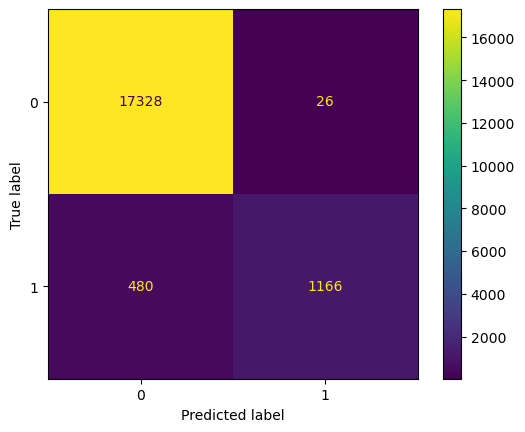

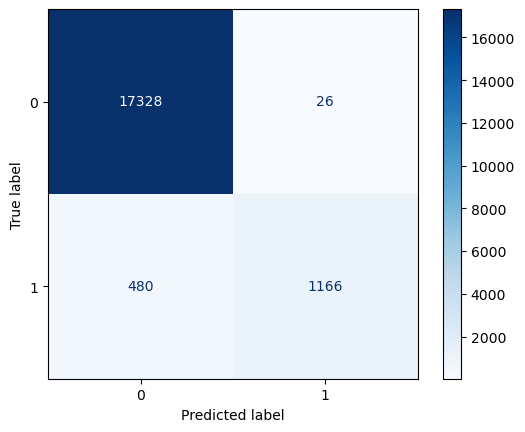

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.98      0.71      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.85      0.90     19000
weighted avg       0.97      0.97      0.97     19000



In [24]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Supongamos que ya tienes tus datos de entrenamiento y prueba: x_train, x_test, y_train, y_test

# Define los hiperparámetros que deseas ajustar en la búsqueda en cuadrícula
grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4,7,10],
    'iterations': [100, 200, 500],
    'reg_lambda': [0.1, 1.0, 10.0]  # Valores de reg_lambda que deseas probar
}

# Crea el modelo CatBoostClassifier
catboost_model = CatBoostClassifier()

# Realiza la búsqueda en cuadrícula utilizando cross-validation
grid_search_result = catboost_model.grid_search(grid, X=x_train, y=y_train, cv=3)

# Obtén los mejores hiperparámetros encontrados por la búsqueda en cuadrícula
best_params = grid_search_result['params']

# Crea el modelo CatBoostClassifier con los mejores hiperparámetros
best_catboost_model = CatBoostClassifier(**best_params)

# Ajusta el modelo final en el conjunto de entrenamiento completo
best_catboost_model.fit(x_train, y_train)

# Evalúa el modelo en los datos de entrenamiento
train_predictions = best_catboost_model.predict(x_train)
accuracy_train = accuracy_score(y_train, train_predictions)
print("Accuracy train CatBoost: %.2f%%" % (accuracy_train * 100.0))

# Evalúa el modelo en los datos de prueba
test_predictions = best_catboost_model.predict(x_test)
accuracy_test = accuracy_score(y_test, test_predictions)
print("Accuracy test CatBoost: %.2f%%" % (accuracy_test * 100.0))

# Muestra la matriz de confusión
disp = ConfusionMatrixDisplay.from_estimator(best_catboost_model, x_test, y_test)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Imprime el reporte de clasificación
print(classification_report(y_test, test_predictions))


In [25]:
print("Best parameters: ", best_params)

Best parameters:  {'depth': 4, 'iterations': 200, 'learning_rate': 0.1, 'l2_leaf_reg': 1.0}


Vemos que tenemos un casi la misma accuracy que el profesor.

Probamos ahora el mejor modelo pero aumentando el n_estimators y cambiando el threshold de predicción

In [26]:
?CatBoostClassifier

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

0:	learn: 0.4695509	total: 39.6ms	remaining: 1m 19s
1:	learn: 0.3404470	total: 93.4ms	remaining: 1m 33s
2:	learn: 0.2434452	total: 145ms	remaining: 1m 36s
3:	learn: 0.2007639	total: 163ms	remaining: 1m 21s
4:	learn: 0.1593800	total: 215ms	remaining: 1m 25s
5:	learn: 0.1360418	total: 276ms	remaining: 1m 31s
6:	learn: 0.1227448	total: 346ms	remaining: 1m 38s
7:	learn: 0.1130697	total: 413ms	remaining: 1m 42s
8:	learn: 0.1025919	total: 471ms	remaining: 1m 44s
9:	learn: 0.0981158	total: 537ms	remaining: 1m 46s
10:	learn: 0.0944228	total: 612ms	remaining: 1m 50s
11:	learn: 0.0911499	total: 693ms	remaining: 1m 54s
12:	learn: 0.0891885	total: 780ms	remaining: 1m 59s
13:	learn: 0.0869809	total: 859ms	remaining: 2m 1s
14:	learn: 0.0855348	total: 944ms	remaining: 2m 4s
15:	learn: 0.0844203	total: 1.02s	remaining: 2m 6s
16:	learn: 0.0835316	total: 1.1s	remaining: 2m 8s
17:	learn: 0.0826851	total: 1.17s	remaining: 2m 8s
18:	learn: 0.0821475	total: 1.25s	remaining: 2m 10s
19:	learn: 0.0815465	total

162:	learn: 0.0551456	total: 9.96s	remaining: 1m 52s
163:	learn: 0.0548860	total: 10s	remaining: 1m 52s
164:	learn: 0.0547439	total: 10.1s	remaining: 1m 51s
165:	learn: 0.0546179	total: 10.1s	remaining: 1m 51s
166:	learn: 0.0544612	total: 10.2s	remaining: 1m 51s
167:	learn: 0.0543265	total: 10.2s	remaining: 1m 51s
168:	learn: 0.0541916	total: 10.3s	remaining: 1m 51s
169:	learn: 0.0540990	total: 10.4s	remaining: 1m 51s
170:	learn: 0.0539983	total: 10.4s	remaining: 1m 51s
171:	learn: 0.0537837	total: 10.5s	remaining: 1m 51s
172:	learn: 0.0536227	total: 10.6s	remaining: 1m 51s
173:	learn: 0.0534240	total: 10.6s	remaining: 1m 51s
174:	learn: 0.0533074	total: 10.7s	remaining: 1m 51s
175:	learn: 0.0532306	total: 10.8s	remaining: 1m 51s
176:	learn: 0.0531533	total: 10.8s	remaining: 1m 51s
177:	learn: 0.0530216	total: 10.9s	remaining: 1m 51s
178:	learn: 0.0529674	total: 11s	remaining: 1m 51s
179:	learn: 0.0529088	total: 11.1s	remaining: 1m 51s
180:	learn: 0.0528220	total: 11.1s	remaining: 1m 5

319:	learn: 0.0404539	total: 24.9s	remaining: 2m 10s
320:	learn: 0.0403413	total: 24.9s	remaining: 2m 10s
321:	learn: 0.0403119	total: 25s	remaining: 2m 10s
322:	learn: 0.0402383	total: 25.1s	remaining: 2m 10s
323:	learn: 0.0401365	total: 25.1s	remaining: 2m 9s
324:	learn: 0.0400926	total: 25.2s	remaining: 2m 9s
325:	learn: 0.0400414	total: 25.2s	remaining: 2m 9s
326:	learn: 0.0399612	total: 25.3s	remaining: 2m 9s
327:	learn: 0.0398697	total: 25.3s	remaining: 2m 9s
328:	learn: 0.0397681	total: 25.4s	remaining: 2m 9s
329:	learn: 0.0396411	total: 25.4s	remaining: 2m 8s
330:	learn: 0.0395969	total: 25.5s	remaining: 2m 8s
331:	learn: 0.0395731	total: 25.5s	remaining: 2m 8s
332:	learn: 0.0395052	total: 25.6s	remaining: 2m 8s
333:	learn: 0.0394558	total: 25.6s	remaining: 2m 7s
334:	learn: 0.0394186	total: 25.7s	remaining: 2m 7s
335:	learn: 0.0393629	total: 25.7s	remaining: 2m 7s
336:	learn: 0.0392940	total: 25.8s	remaining: 2m 7s
337:	learn: 0.0392451	total: 25.8s	remaining: 2m 7s
338:	learn

481:	learn: 0.0307579	total: 31.8s	remaining: 1m 40s
482:	learn: 0.0307371	total: 31.9s	remaining: 1m 40s
483:	learn: 0.0306927	total: 31.9s	remaining: 1m 39s
484:	learn: 0.0306586	total: 32s	remaining: 1m 39s
485:	learn: 0.0305811	total: 32s	remaining: 1m 39s
486:	learn: 0.0305228	total: 32.1s	remaining: 1m 39s
487:	learn: 0.0304456	total: 32.1s	remaining: 1m 39s
488:	learn: 0.0303921	total: 32.1s	remaining: 1m 39s
489:	learn: 0.0303495	total: 32.2s	remaining: 1m 39s
490:	learn: 0.0303002	total: 32.2s	remaining: 1m 39s
491:	learn: 0.0302384	total: 32.3s	remaining: 1m 38s
492:	learn: 0.0301764	total: 32.3s	remaining: 1m 38s
493:	learn: 0.0301466	total: 32.4s	remaining: 1m 38s
494:	learn: 0.0300867	total: 32.4s	remaining: 1m 38s
495:	learn: 0.0300656	total: 32.5s	remaining: 1m 38s
496:	learn: 0.0300456	total: 32.5s	remaining: 1m 38s
497:	learn: 0.0300016	total: 32.6s	remaining: 1m 38s
498:	learn: 0.0299797	total: 32.7s	remaining: 1m 38s
499:	learn: 0.0299147	total: 32.7s	remaining: 1m 3

639:	learn: 0.0243615	total: 39.1s	remaining: 1m 23s
640:	learn: 0.0243366	total: 39.2s	remaining: 1m 23s
641:	learn: 0.0243197	total: 39.2s	remaining: 1m 22s
642:	learn: 0.0242906	total: 39.2s	remaining: 1m 22s
643:	learn: 0.0242468	total: 39.3s	remaining: 1m 22s
644:	learn: 0.0242015	total: 39.3s	remaining: 1m 22s
645:	learn: 0.0241522	total: 39.4s	remaining: 1m 22s
646:	learn: 0.0241154	total: 39.4s	remaining: 1m 22s
647:	learn: 0.0240783	total: 39.4s	remaining: 1m 22s
648:	learn: 0.0240256	total: 39.5s	remaining: 1m 22s
649:	learn: 0.0239952	total: 39.5s	remaining: 1m 22s
650:	learn: 0.0239171	total: 39.6s	remaining: 1m 21s
651:	learn: 0.0238595	total: 39.6s	remaining: 1m 21s
652:	learn: 0.0238023	total: 39.7s	remaining: 1m 21s
653:	learn: 0.0237409	total: 39.7s	remaining: 1m 21s
654:	learn: 0.0236905	total: 39.7s	remaining: 1m 21s
655:	learn: 0.0236315	total: 39.8s	remaining: 1m 21s
656:	learn: 0.0235889	total: 39.8s	remaining: 1m 21s
657:	learn: 0.0235403	total: 39.9s	remaining: 

800:	learn: 0.0192288	total: 45.7s	remaining: 1m 8s
801:	learn: 0.0192166	total: 45.7s	remaining: 1m 8s
802:	learn: 0.0192032	total: 45.8s	remaining: 1m 8s
803:	learn: 0.0191815	total: 45.8s	remaining: 1m 8s
804:	learn: 0.0191717	total: 45.9s	remaining: 1m 8s
805:	learn: 0.0191628	total: 45.9s	remaining: 1m 7s
806:	learn: 0.0191323	total: 45.9s	remaining: 1m 7s
807:	learn: 0.0190902	total: 46s	remaining: 1m 7s
808:	learn: 0.0190840	total: 46s	remaining: 1m 7s
809:	learn: 0.0190534	total: 46.1s	remaining: 1m 7s
810:	learn: 0.0190344	total: 46.1s	remaining: 1m 7s
811:	learn: 0.0190145	total: 46.2s	remaining: 1m 7s
812:	learn: 0.0189954	total: 46.2s	remaining: 1m 7s
813:	learn: 0.0189787	total: 46.2s	remaining: 1m 7s
814:	learn: 0.0189728	total: 46.3s	remaining: 1m 7s
815:	learn: 0.0189531	total: 46.3s	remaining: 1m 7s
816:	learn: 0.0189228	total: 46.4s	remaining: 1m 7s
817:	learn: 0.0188868	total: 46.4s	remaining: 1m 7s
818:	learn: 0.0188505	total: 46.5s	remaining: 1m 6s
819:	learn: 0.01

961:	learn: 0.0157892	total: 53.1s	remaining: 57.3s
962:	learn: 0.0157570	total: 53.2s	remaining: 57.3s
963:	learn: 0.0157428	total: 53.2s	remaining: 57.2s
964:	learn: 0.0157195	total: 53.3s	remaining: 57.1s
965:	learn: 0.0157039	total: 53.3s	remaining: 57.1s
966:	learn: 0.0156842	total: 53.4s	remaining: 57s
967:	learn: 0.0156762	total: 53.4s	remaining: 57s
968:	learn: 0.0156432	total: 53.5s	remaining: 56.9s
969:	learn: 0.0156377	total: 53.5s	remaining: 56.9s
970:	learn: 0.0156099	total: 53.6s	remaining: 56.8s
971:	learn: 0.0155951	total: 53.6s	remaining: 56.7s
972:	learn: 0.0155820	total: 53.7s	remaining: 56.6s
973:	learn: 0.0155591	total: 53.7s	remaining: 56.6s
974:	learn: 0.0155458	total: 53.7s	remaining: 56.5s
975:	learn: 0.0155197	total: 53.8s	remaining: 56.4s
976:	learn: 0.0154964	total: 53.8s	remaining: 56.3s
977:	learn: 0.0154707	total: 53.8s	remaining: 56.3s
978:	learn: 0.0154572	total: 53.9s	remaining: 56.2s
979:	learn: 0.0154378	total: 53.9s	remaining: 56.1s
980:	learn: 0.01

1121:	learn: 0.0131910	total: 59.8s	remaining: 46.8s
1122:	learn: 0.0131678	total: 59.9s	remaining: 46.7s
1123:	learn: 0.0131549	total: 59.9s	remaining: 46.7s
1124:	learn: 0.0131328	total: 59.9s	remaining: 46.6s
1125:	learn: 0.0131114	total: 60s	remaining: 46.6s
1126:	learn: 0.0130939	total: 1m	remaining: 46.5s
1127:	learn: 0.0130825	total: 1m	remaining: 46.4s
1128:	learn: 0.0130670	total: 1m	remaining: 46.4s
1129:	learn: 0.0130553	total: 1m	remaining: 46.3s
1130:	learn: 0.0130402	total: 1m	remaining: 46.2s
1131:	learn: 0.0130167	total: 1m	remaining: 46.2s
1132:	learn: 0.0130026	total: 1m	remaining: 46.1s
1133:	learn: 0.0129878	total: 1m	remaining: 46.1s
1134:	learn: 0.0129746	total: 1m	remaining: 46s
1135:	learn: 0.0129604	total: 1m	remaining: 46s
1136:	learn: 0.0129498	total: 1m	remaining: 45.9s
1137:	learn: 0.0129420	total: 1m	remaining: 45.9s
1138:	learn: 0.0129260	total: 1m	remaining: 45.8s
1139:	learn: 0.0129134	total: 1m	remaining: 45.8s
1140:	learn: 0.0128979	total: 1m	remainin

1281:	learn: 0.0112720	total: 1m 8s	remaining: 38.2s
1282:	learn: 0.0112681	total: 1m 8s	remaining: 38.1s
1283:	learn: 0.0112557	total: 1m 8s	remaining: 38.1s
1284:	learn: 0.0112443	total: 1m 8s	remaining: 38s
1285:	learn: 0.0112291	total: 1m 8s	remaining: 38s
1286:	learn: 0.0112234	total: 1m 8s	remaining: 37.9s
1287:	learn: 0.0112135	total: 1m 8s	remaining: 37.9s
1288:	learn: 0.0111985	total: 1m 8s	remaining: 37.8s
1289:	learn: 0.0111926	total: 1m 8s	remaining: 37.8s
1290:	learn: 0.0111844	total: 1m 8s	remaining: 37.7s
1291:	learn: 0.0111794	total: 1m 8s	remaining: 37.6s
1292:	learn: 0.0111719	total: 1m 8s	remaining: 37.6s
1293:	learn: 0.0111669	total: 1m 8s	remaining: 37.5s
1294:	learn: 0.0111536	total: 1m 8s	remaining: 37.5s
1295:	learn: 0.0111508	total: 1m 8s	remaining: 37.4s
1296:	learn: 0.0111385	total: 1m 8s	remaining: 37.4s
1297:	learn: 0.0111256	total: 1m 9s	remaining: 37.3s
1298:	learn: 0.0111150	total: 1m 9s	remaining: 37.3s
1299:	learn: 0.0111083	total: 1m 9s	remaining: 37.

1434:	learn: 0.0098100	total: 1m 15s	remaining: 29.6s
1435:	learn: 0.0098073	total: 1m 15s	remaining: 29.5s
1436:	learn: 0.0098033	total: 1m 15s	remaining: 29.5s
1437:	learn: 0.0097876	total: 1m 15s	remaining: 29.4s
1438:	learn: 0.0097769	total: 1m 15s	remaining: 29.4s
1439:	learn: 0.0097672	total: 1m 15s	remaining: 29.3s
1440:	learn: 0.0097589	total: 1m 15s	remaining: 29.2s
1441:	learn: 0.0097563	total: 1m 15s	remaining: 29.2s
1442:	learn: 0.0097474	total: 1m 15s	remaining: 29.1s
1443:	learn: 0.0097367	total: 1m 15s	remaining: 29.1s
1444:	learn: 0.0097305	total: 1m 15s	remaining: 29s
1445:	learn: 0.0097240	total: 1m 15s	remaining: 29s
1446:	learn: 0.0097166	total: 1m 15s	remaining: 28.9s
1447:	learn: 0.0097042	total: 1m 15s	remaining: 28.8s
1448:	learn: 0.0097011	total: 1m 15s	remaining: 28.8s
1449:	learn: 0.0096940	total: 1m 15s	remaining: 28.7s
1450:	learn: 0.0096889	total: 1m 15s	remaining: 28.7s
1451:	learn: 0.0096747	total: 1m 15s	remaining: 28.6s
1452:	learn: 0.0096677	total: 1m

1588:	learn: 0.0085922	total: 1m 22s	remaining: 21.3s
1589:	learn: 0.0085922	total: 1m 22s	remaining: 21.2s
1590:	learn: 0.0085895	total: 1m 22s	remaining: 21.1s
1591:	learn: 0.0085875	total: 1m 22s	remaining: 21.1s
1592:	learn: 0.0085792	total: 1m 22s	remaining: 21s
1593:	learn: 0.0085735	total: 1m 22s	remaining: 21s
1594:	learn: 0.0085655	total: 1m 22s	remaining: 20.9s
1595:	learn: 0.0085599	total: 1m 22s	remaining: 20.9s
1596:	learn: 0.0085555	total: 1m 22s	remaining: 20.8s
1597:	learn: 0.0085473	total: 1m 22s	remaining: 20.8s
1598:	learn: 0.0085450	total: 1m 22s	remaining: 20.7s
1599:	learn: 0.0085397	total: 1m 22s	remaining: 20.7s
1600:	learn: 0.0085344	total: 1m 22s	remaining: 20.6s
1601:	learn: 0.0085287	total: 1m 22s	remaining: 20.6s
1602:	learn: 0.0085280	total: 1m 22s	remaining: 20.5s
1603:	learn: 0.0085262	total: 1m 22s	remaining: 20.5s
1604:	learn: 0.0085190	total: 1m 22s	remaining: 20.4s
1605:	learn: 0.0085126	total: 1m 23s	remaining: 20.4s
1606:	learn: 0.0085104	total: 1m

1741:	learn: 0.0076943	total: 1m 28s	remaining: 13.2s
1742:	learn: 0.0076905	total: 1m 29s	remaining: 13.1s
1743:	learn: 0.0076864	total: 1m 29s	remaining: 13.1s
1744:	learn: 0.0076833	total: 1m 29s	remaining: 13s
1745:	learn: 0.0076777	total: 1m 29s	remaining: 13s
1746:	learn: 0.0076716	total: 1m 29s	remaining: 12.9s
1747:	learn: 0.0076702	total: 1m 29s	remaining: 12.9s
1748:	learn: 0.0076675	total: 1m 29s	remaining: 12.8s
1749:	learn: 0.0076644	total: 1m 29s	remaining: 12.8s
1750:	learn: 0.0076630	total: 1m 29s	remaining: 12.7s
1751:	learn: 0.0076611	total: 1m 29s	remaining: 12.7s
1752:	learn: 0.0076593	total: 1m 29s	remaining: 12.6s
1753:	learn: 0.0076513	total: 1m 29s	remaining: 12.5s
1754:	learn: 0.0076456	total: 1m 29s	remaining: 12.5s
1755:	learn: 0.0076400	total: 1m 29s	remaining: 12.4s
1756:	learn: 0.0076360	total: 1m 29s	remaining: 12.4s
1757:	learn: 0.0076243	total: 1m 29s	remaining: 12.3s
1758:	learn: 0.0076174	total: 1m 29s	remaining: 12.3s
1759:	learn: 0.0076109	total: 1m

1894:	learn: 0.0068633	total: 1m 35s	remaining: 5.27s
1895:	learn: 0.0068616	total: 1m 35s	remaining: 5.22s
1896:	learn: 0.0068566	total: 1m 35s	remaining: 5.17s
1897:	learn: 0.0068516	total: 1m 35s	remaining: 5.12s
1898:	learn: 0.0068451	total: 1m 35s	remaining: 5.07s
1899:	learn: 0.0068411	total: 1m 35s	remaining: 5.02s
1900:	learn: 0.0068367	total: 1m 35s	remaining: 4.97s
1901:	learn: 0.0068345	total: 1m 35s	remaining: 4.92s
1902:	learn: 0.0068303	total: 1m 35s	remaining: 4.86s
1903:	learn: 0.0068229	total: 1m 35s	remaining: 4.81s
1904:	learn: 0.0068188	total: 1m 35s	remaining: 4.76s
1905:	learn: 0.0068141	total: 1m 35s	remaining: 4.71s
1906:	learn: 0.0068097	total: 1m 35s	remaining: 4.66s
1907:	learn: 0.0068071	total: 1m 35s	remaining: 4.61s
1908:	learn: 0.0067964	total: 1m 35s	remaining: 4.56s
1909:	learn: 0.0067892	total: 1m 35s	remaining: 4.51s
1910:	learn: 0.0067839	total: 1m 35s	remaining: 4.46s
1911:	learn: 0.0067732	total: 1m 35s	remaining: 4.41s
1912:	learn: 0.0067674	total

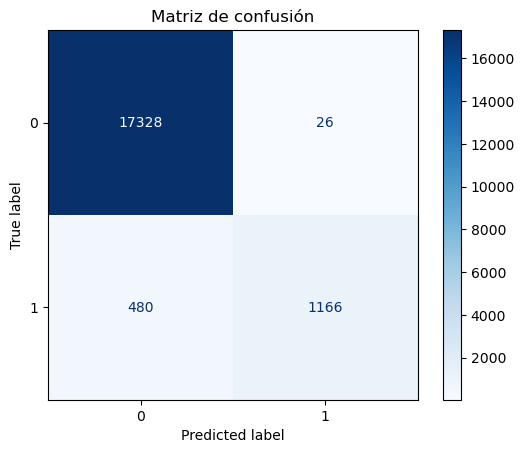

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.98      0.71      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.85      0.90     19000
weighted avg       0.97      0.97      0.97     19000



In [28]:
threshold = 0.5
catboost_model_new = CatBoostClassifier(learning_rate=0.1, reg_lambda=1, max_depth=10,n_estimators = 2000)

# Ajusta el modelo final en el conjunto de entrenamiento completo
#catboost_model.fit(x_data, y_data)
catboost_model_new.fit(x_train, y_train)
# Evalúa el modelo en los datos de entrenamiento
train_predictions_proba = catboost_model.predict_proba(x_train)[:, 1]
train_predictions = (train_predictions_proba >= threshold).astype(int)
accuracy_train = accuracy_score(y_train, train_predictions)
print("Accuracy train CatBoost: %.2f%%" % (accuracy_train * 100.0))

# Evalúa el modelo en los datos de prueba
test_predictions_proba = catboost_model.predict_proba(x_test)[:, 1]
test_predictions = (test_predictions_proba >= threshold).astype(int)
accuracy_test = accuracy_score(y_test, test_predictions)
print("Accuracy test CatBoost: %.2f%%" % (accuracy_test * 100.0))

# Muestra la matriz de confusión
conf_matrix = confusion_matrix(y_test, test_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de confusión')
plt.show()

# Imprime el reporte de clasificación
print(classification_report(y_test, test_predictions))


La accuracy no aumenta aumentando iteraciones, ahora cambiamos el threshold ya que erramos mayormente a los que sí tienen diabetes

0:	learn: 0.4695509	total: 26.3ms	remaining: 13.1s
1:	learn: 0.3404470	total: 73.8ms	remaining: 18.4s
2:	learn: 0.2434452	total: 114ms	remaining: 18.9s
3:	learn: 0.2007639	total: 128ms	remaining: 15.8s
4:	learn: 0.1593800	total: 181ms	remaining: 17.9s
5:	learn: 0.1360418	total: 237ms	remaining: 19.5s
6:	learn: 0.1227448	total: 287ms	remaining: 20.2s
7:	learn: 0.1130697	total: 332ms	remaining: 20.4s
8:	learn: 0.1025919	total: 377ms	remaining: 20.6s
9:	learn: 0.0981158	total: 418ms	remaining: 20.5s
10:	learn: 0.0944228	total: 468ms	remaining: 20.8s
11:	learn: 0.0911499	total: 506ms	remaining: 20.6s
12:	learn: 0.0891885	total: 544ms	remaining: 20.4s
13:	learn: 0.0869809	total: 589ms	remaining: 20.4s
14:	learn: 0.0855348	total: 637ms	remaining: 20.6s
15:	learn: 0.0844203	total: 686ms	remaining: 20.8s
16:	learn: 0.0835316	total: 725ms	remaining: 20.6s
17:	learn: 0.0826851	total: 759ms	remaining: 20.3s
18:	learn: 0.0821475	total: 825ms	remaining: 20.9s
19:	learn: 0.0815465	total: 885ms	remai

162:	learn: 0.0551456	total: 6.55s	remaining: 13.5s
163:	learn: 0.0548860	total: 6.59s	remaining: 13.5s
164:	learn: 0.0547439	total: 6.63s	remaining: 13.5s
165:	learn: 0.0546179	total: 6.66s	remaining: 13.4s
166:	learn: 0.0544612	total: 6.7s	remaining: 13.4s
167:	learn: 0.0543265	total: 6.75s	remaining: 13.3s
168:	learn: 0.0541916	total: 6.79s	remaining: 13.3s
169:	learn: 0.0540990	total: 6.83s	remaining: 13.3s
170:	learn: 0.0539983	total: 6.87s	remaining: 13.2s
171:	learn: 0.0537837	total: 6.91s	remaining: 13.2s
172:	learn: 0.0536227	total: 6.95s	remaining: 13.1s
173:	learn: 0.0534240	total: 6.98s	remaining: 13.1s
174:	learn: 0.0533074	total: 7.03s	remaining: 13s
175:	learn: 0.0532306	total: 7.07s	remaining: 13s
176:	learn: 0.0531533	total: 7.11s	remaining: 13s
177:	learn: 0.0530216	total: 7.15s	remaining: 12.9s
178:	learn: 0.0529674	total: 7.19s	remaining: 12.9s
179:	learn: 0.0529088	total: 7.23s	remaining: 12.9s
180:	learn: 0.0528220	total: 7.27s	remaining: 12.8s
181:	learn: 0.05268

322:	learn: 0.0402383	total: 13.5s	remaining: 7.39s
323:	learn: 0.0401365	total: 13.5s	remaining: 7.36s
324:	learn: 0.0400926	total: 13.6s	remaining: 7.32s
325:	learn: 0.0400414	total: 13.6s	remaining: 7.28s
326:	learn: 0.0399612	total: 13.7s	remaining: 7.24s
327:	learn: 0.0398697	total: 13.7s	remaining: 7.21s
328:	learn: 0.0397681	total: 13.8s	remaining: 7.17s
329:	learn: 0.0396411	total: 13.9s	remaining: 7.14s
330:	learn: 0.0395969	total: 13.9s	remaining: 7.1s
331:	learn: 0.0395731	total: 14s	remaining: 7.06s
332:	learn: 0.0395052	total: 14s	remaining: 7.02s
333:	learn: 0.0394558	total: 14.1s	remaining: 6.98s
334:	learn: 0.0394186	total: 14.1s	remaining: 6.94s
335:	learn: 0.0393629	total: 14.2s	remaining: 6.91s
336:	learn: 0.0392940	total: 14.2s	remaining: 6.87s
337:	learn: 0.0392451	total: 14.2s	remaining: 6.83s
338:	learn: 0.0391751	total: 14.3s	remaining: 6.79s
339:	learn: 0.0390863	total: 14.3s	remaining: 6.75s
340:	learn: 0.0390184	total: 14.4s	remaining: 6.71s
341:	learn: 0.038

484:	learn: 0.0306586	total: 20.4s	remaining: 631ms
485:	learn: 0.0305811	total: 20.4s	remaining: 589ms
486:	learn: 0.0305228	total: 20.5s	remaining: 547ms
487:	learn: 0.0304456	total: 20.5s	remaining: 505ms
488:	learn: 0.0303921	total: 20.6s	remaining: 463ms
489:	learn: 0.0303495	total: 20.6s	remaining: 421ms
490:	learn: 0.0303002	total: 20.6s	remaining: 378ms
491:	learn: 0.0302384	total: 20.7s	remaining: 336ms
492:	learn: 0.0301764	total: 20.7s	remaining: 294ms
493:	learn: 0.0301466	total: 20.8s	remaining: 252ms
494:	learn: 0.0300867	total: 20.8s	remaining: 210ms
495:	learn: 0.0300656	total: 20.8s	remaining: 168ms
496:	learn: 0.0300456	total: 20.9s	remaining: 126ms
497:	learn: 0.0300016	total: 20.9s	remaining: 84ms
498:	learn: 0.0299797	total: 21s	remaining: 42ms
499:	learn: 0.0299147	total: 21s	remaining: 0us
Accuracy train CatBoost: 97.22%
Accuracy test CatBoost: 97.40%


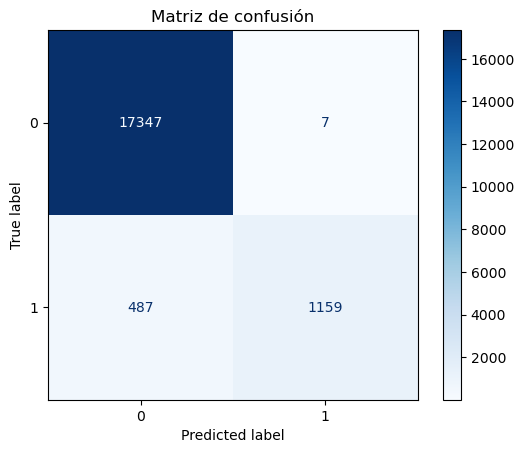

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.99      0.70      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.85      0.91     19000
weighted avg       0.97      0.97      0.97     19000



In [29]:
threshold = 0.6
catboost_model_new = CatBoostClassifier(learning_rate=0.1, reg_lambda=1, max_depth=10,n_estimators = 500)

# Ajusta el modelo final en el conjunto de entrenamiento completo
#catboost_model.fit(x_data, y_data)
catboost_model_new.fit(x_train, y_train)
# Evalúa el modelo en los datos de entrenamiento
train_predictions_proba = catboost_model.predict_proba(x_train)[:, 1]
train_predictions = (train_predictions_proba >= threshold).astype(int)
accuracy_train = accuracy_score(y_train, train_predictions)
print("Accuracy train CatBoost: %.2f%%" % (accuracy_train * 100.0))

# Evalúa el modelo en los datos de prueba
test_predictions_proba = catboost_model.predict_proba(x_test)[:, 1]
test_predictions = (test_predictions_proba >= threshold).astype(int)
accuracy_test = accuracy_score(y_test, test_predictions)
print("Accuracy test CatBoost: %.2f%%" % (accuracy_test * 100.0))

# Muestra la matriz de confusión
conf_matrix = confusion_matrix(y_test, test_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de confusión')
plt.show()

# Imprime el reporte de clasificación
print(classification_report(y_test, test_predictions))


Mejora muy poquito con un threshold mas alto.

In [30]:
test_pred = np.int64(catboost_model.predict(X_test))

In [31]:
submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["patient", "diabetes"])
submission.to_csv("catboost_29_7_v2.csv", header=True, index=False)

Modelo 2) AdaBoost simple primero

C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy train AdaBoost: 99.92%
Accuracy test AdaBoost: 95.51%


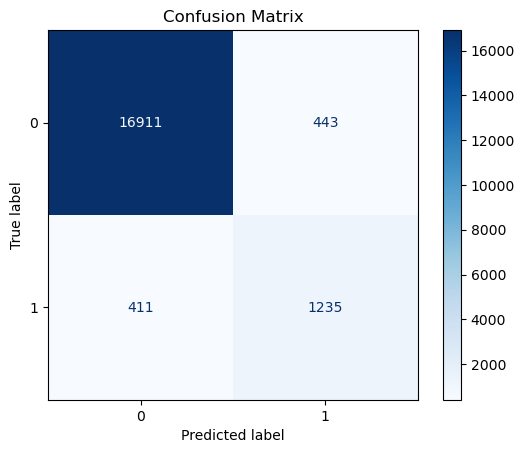

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     17354
           1       0.74      0.75      0.74      1646

    accuracy                           0.96     19000
   macro avg       0.86      0.86      0.86     19000
weighted avg       0.96      0.96      0.96     19000



In [32]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the base classifier (Decision Tree in this case)
base_classifier = DecisionTreeClassifier()

# Initialize AdaBoost with the base classifier
ada_clf = AdaBoostClassifier(base_estimator=base_classifier)
ada_clf.fit(x_train, y_train)

# Accuracy
train_predictions = ada_clf.predict(x_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train AdaBoost: %.2f%%" % (train_accuracy * 100.0))

test_predictions = ada_clf.predict(x_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test AdaBoost: %.2f%%" % (test_accuracy * 100.0))

# Print the confusion matrix
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix(y_test, test_predictions))
confusion_matrix_display.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print(classification_report(y_test, test_predictions))


Tenemos overfitting, planteamos primero los hiperparametros del decision tree que fueron optimos para el decision tree solo, y con Adaboost normal:

C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy train AdaBoost: 97.80%
Accuracy test AdaBoost: 96.82%


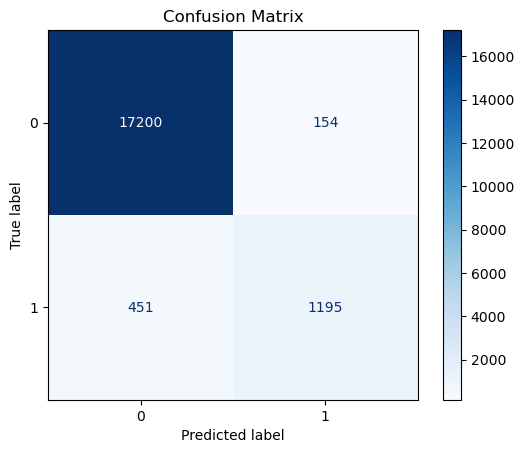

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17354
           1       0.89      0.73      0.80      1646

    accuracy                           0.97     19000
   macro avg       0.93      0.86      0.89     19000
weighted avg       0.97      0.97      0.97     19000



In [33]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
best_params_decision_tree = {'criterion': 'gini',
                             'max_depth': 5,
                             'min_samples_leaf': 1,
                             'min_samples_split': 2,
                             'splitter': 'best'}

# Create the base classifier (Decision Tree in this case)
base_classifier = DecisionTreeClassifier(criterion = "gini",max_depth=5,min_samples_leaf=1,min_samples_split=2,splitter="best")

# Initialize AdaBoost with the base classifier
ada_clf = AdaBoostClassifier(base_estimator=base_classifier)
ada_clf.fit(x_train, y_train)

# Accuracy
train_predictions = ada_clf.predict(x_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train AdaBoost: %.2f%%" % (train_accuracy * 100.0))

test_predictions = ada_clf.predict(x_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test AdaBoost: %.2f%%" % (test_accuracy * 100.0))

# Print the confusion matrix
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix(y_test, test_predictions))
confusion_matrix_display.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print(classification_report(y_test, test_predictions))


Reduzco max depth para ver como da:

C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy train AdaBoost: 97.16%
Accuracy test AdaBoost: 97.37%


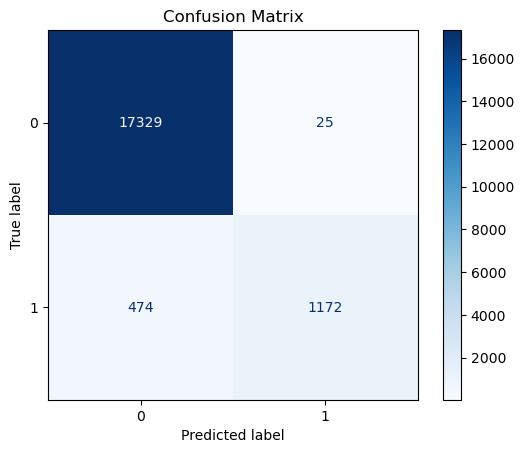

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.98      0.71      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.86      0.91     19000
weighted avg       0.97      0.97      0.97     19000



In [34]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the base classifier (Decision Tree in this case)
base_classifier = DecisionTreeClassifier(criterion = "gini",max_depth=1,min_samples_leaf=1,min_samples_split=2,splitter="best")

# Initialize AdaBoost with the base classifier
ada_clf = AdaBoostClassifier(base_estimator=base_classifier)
ada_clf.fit(x_train, y_train)

# Accuracy
train_predictions = ada_clf.predict(x_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train AdaBoost: %.2f%%" % (train_accuracy * 100.0))

test_predictions = ada_clf.predict(x_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test AdaBoost: %.2f%%" % (test_accuracy * 100.0))

# Print the confusion matrix
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix(y_test, test_predictions))
confusion_matrix_display.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print(classification_report(y_test, test_predictions))


Mejora bastante, vemos ahora cambiando los hiperparametros propios de adaboost y con max depth:

In [35]:
def apply_adaboost(n_estimators,learning_rate,max_depth,criterion,splitter,min_samples_leaf,min_samples_split, threshold = 0.5):

    # Create the base classifier (Decision Tree in this case)
    base_classifier = DecisionTreeClassifier(criterion = criterion,max_depth=max_depth,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split,splitter=splitter)

    # Initialize AdaBoost with the base classifier
    ada_clf = AdaBoostClassifier(base_estimator=base_classifier,n_estimators=n_estimators,learning_rate=learning_rate)
    ada_clf.fit(x_train, y_train)
    
    print("Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split")
    print(n_estimators,learning_rate,max_depth,criterion,splitter,min_samples_leaf,min_samples_split)
    
    # Accuracy
    train_predictions = ada_clf.predict(x_train)
    train_accuracy = accuracy_score(y_train, train_predictions)
    print("Accuracy train AdaBoost: %.2f%%" % (train_accuracy * 100.0))


    
    test_predictions = ada_clf.predict(x_test)
    
    test_accuracy = accuracy_score(y_test, test_predictions)
    
            
    if threshold != 0.5:
        print("threshold:",threshold)
        # Obtener las probabilidades de clase en lugar de las etiquetas de clase
        y_probabilities = ada_clf.predict_proba(x_test)

        y_test_adjusted = (y_probabilities[:, 1] >= threshold).astype(int)
        test_predictions = y_test_adjusted

        # Calcular la precisión en los datos de prueba
        test_accuracy = accuracy_score(y_test, y_test_adjusted)
    
    print("Accuracy test AdaBoost: %.2f%%" % (test_accuracy * 100.0))

    # Print the confusion matrix
    confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix(y_test, test_predictions))
    confusion_matrix_display.plot(cmap='Blues', values_format='d')
    plt.title("Confusion Matrix")
    plt.show()

    # Print the classification report
    print(classification_report(y_test, test_predictions))
    return test_accuracy

C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
50 1 2 gini best 2 5
Accuracy train AdaBoost: 97.16%
Accuracy test AdaBoost: 97.34%


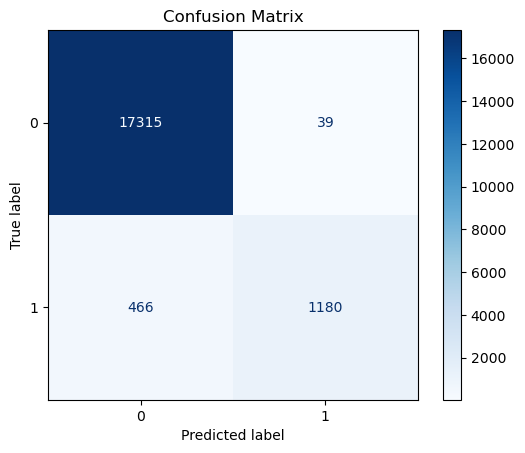

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.97      0.72      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.97      0.86      0.90     19000
weighted avg       0.97      0.97      0.97     19000



0.973421052631579

In [36]:
apply_adaboost(50,1,2,"gini","best",2,5)#criterion,splitter,min_samples_leaf,min_samples_split

C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
10 0.5 2 gini best 1 2
Accuracy train AdaBoost: 97.14%
Accuracy test AdaBoost: 97.38%


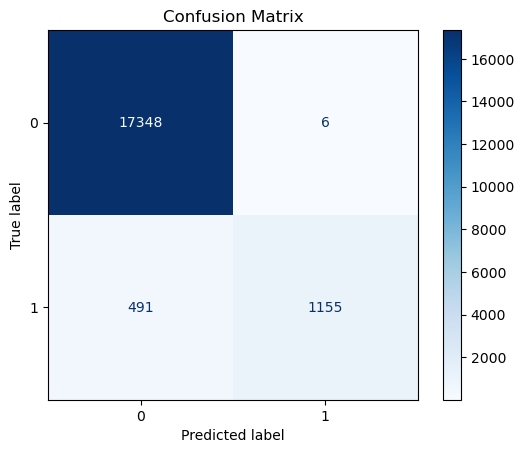

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.99      0.70      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.85      0.90     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
10 0.5 2 gini best 1 5
Accuracy train AdaBoost: 97.14%
Accuracy test AdaBoost: 97.38%


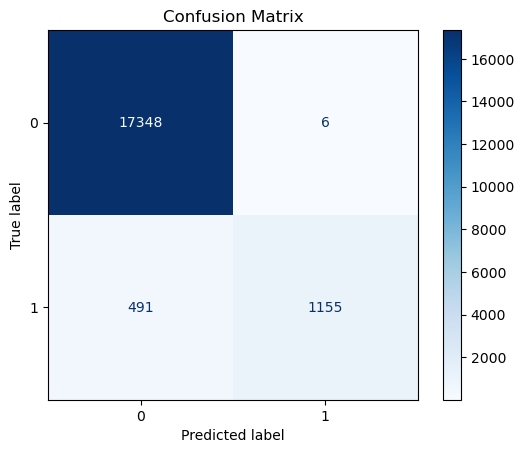

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.99      0.70      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.85      0.90     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
10 0.5 2 gini best 2 2
Accuracy train AdaBoost: 97.14%
Accuracy test AdaBoost: 97.38%


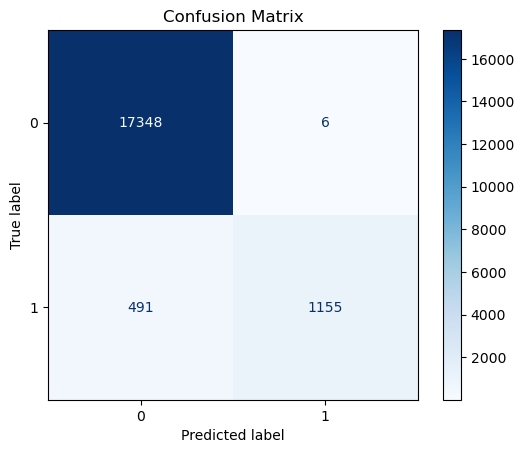

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.99      0.70      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.85      0.90     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
10 0.5 2 gini best 2 5
Accuracy train AdaBoost: 97.14%
Accuracy test AdaBoost: 97.38%


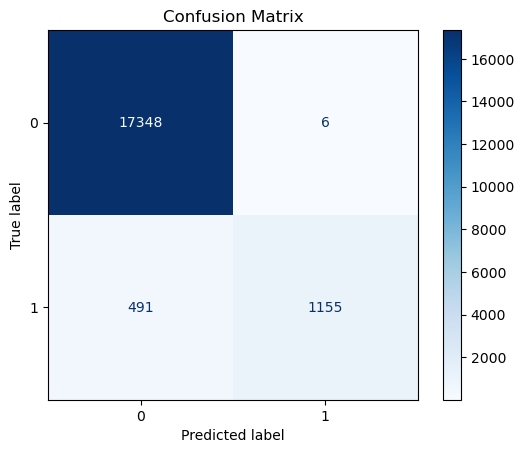

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.99      0.70      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.85      0.90     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
10 0.5 3 gini best 1 2
Accuracy train AdaBoost: 97.17%
Accuracy test AdaBoost: 97.39%


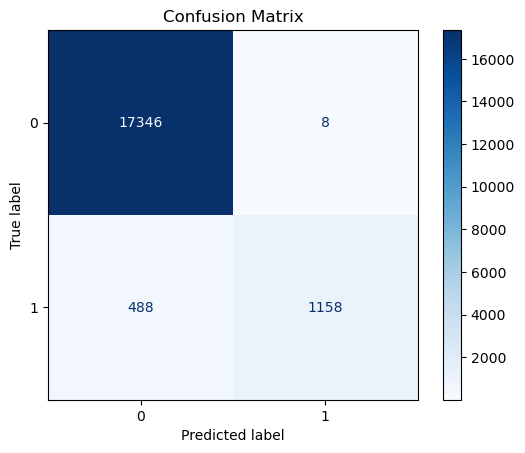

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.99      0.70      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.85      0.90     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
10 0.5 3 gini best 1 5
Accuracy train AdaBoost: 97.17%
Accuracy test AdaBoost: 97.39%


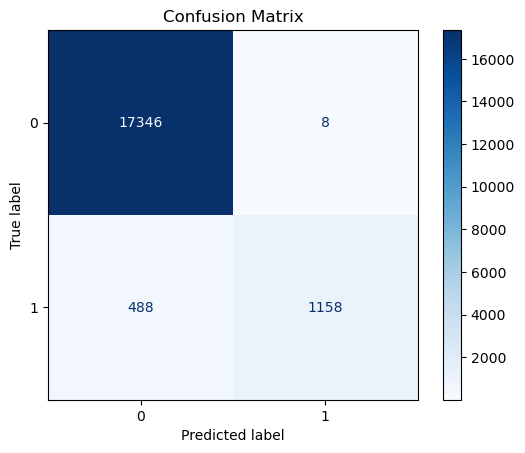

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.99      0.70      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.85      0.90     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
10 0.5 3 gini best 2 2
Accuracy train AdaBoost: 97.17%
Accuracy test AdaBoost: 97.39%


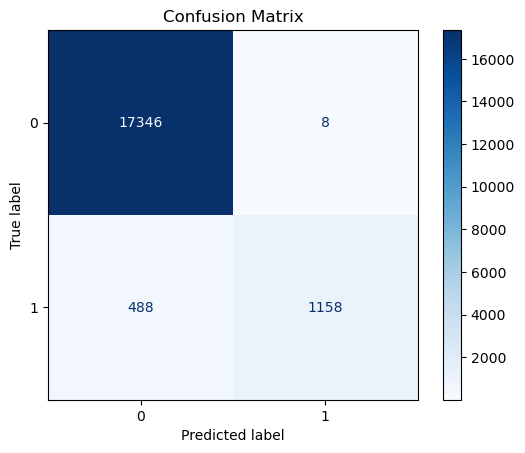

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.99      0.70      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.85      0.90     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
10 0.5 3 gini best 2 5
Accuracy train AdaBoost: 97.17%
Accuracy test AdaBoost: 97.39%


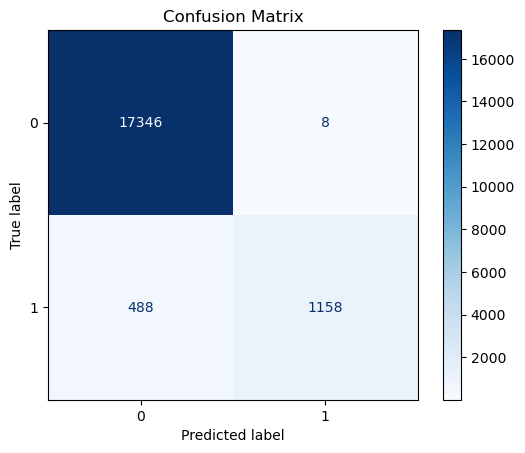

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.99      0.70      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.85      0.90     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
10 1.0 2 gini best 1 2
Accuracy train AdaBoost: 97.10%
Accuracy test AdaBoost: 97.34%


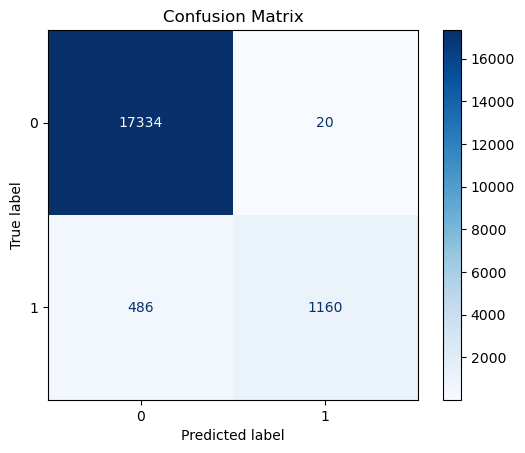

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.98      0.70      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.85      0.90     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
10 1.0 2 gini best 1 5
Accuracy train AdaBoost: 97.10%
Accuracy test AdaBoost: 97.34%


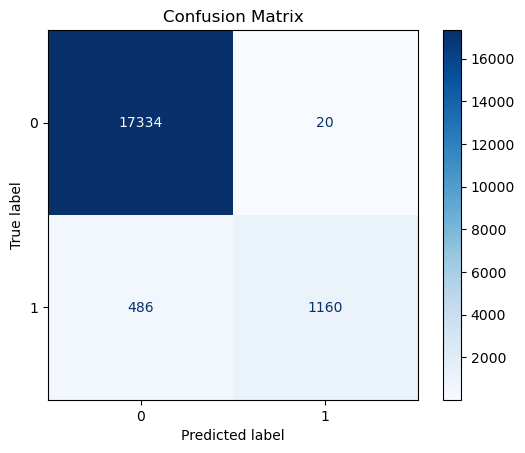

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.98      0.70      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.85      0.90     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
10 1.0 2 gini best 2 2
Accuracy train AdaBoost: 97.10%
Accuracy test AdaBoost: 97.34%


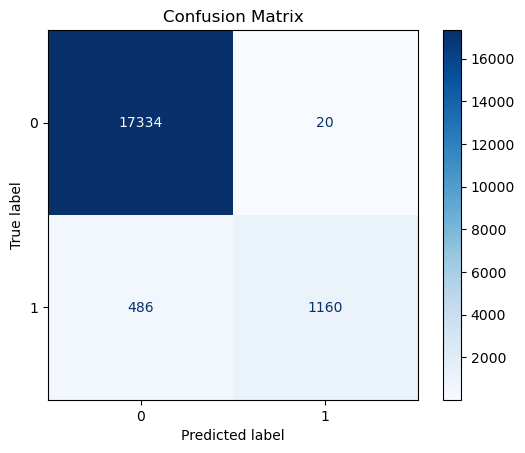

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.98      0.70      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.85      0.90     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
10 1.0 2 gini best 2 5
Accuracy train AdaBoost: 97.10%
Accuracy test AdaBoost: 97.34%


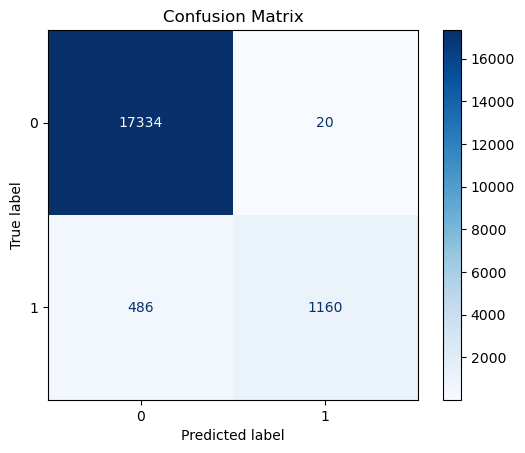

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.98      0.70      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.85      0.90     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
10 1.0 3 gini best 1 2
Accuracy train AdaBoost: 97.16%
Accuracy test AdaBoost: 97.38%


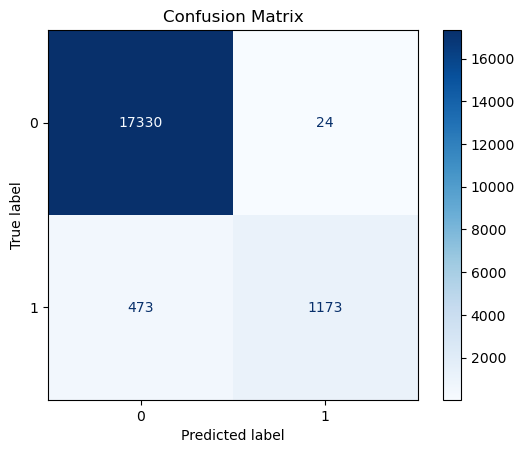

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.98      0.71      0.83      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.86      0.91     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
10 1.0 3 gini best 1 5
Accuracy train AdaBoost: 97.16%
Accuracy test AdaBoost: 97.38%


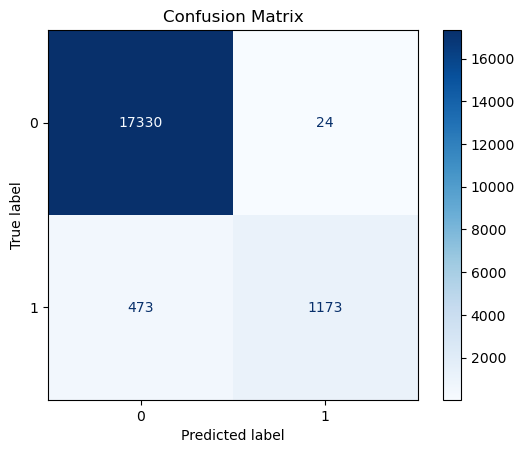

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.98      0.71      0.83      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.86      0.91     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
10 1.0 3 gini best 2 2
Accuracy train AdaBoost: 97.16%
Accuracy test AdaBoost: 97.38%


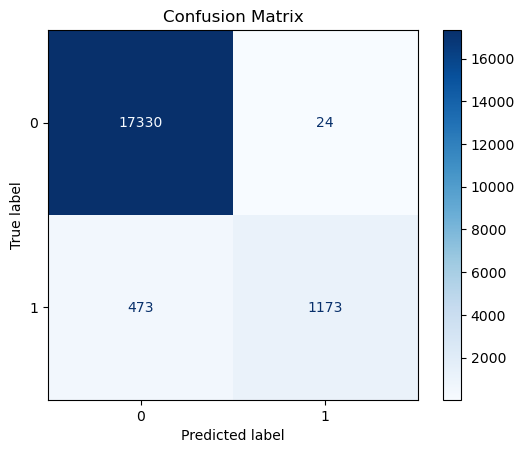

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.98      0.71      0.83      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.86      0.91     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
10 1.0 3 gini best 2 5
Accuracy train AdaBoost: 97.16%
Accuracy test AdaBoost: 97.38%


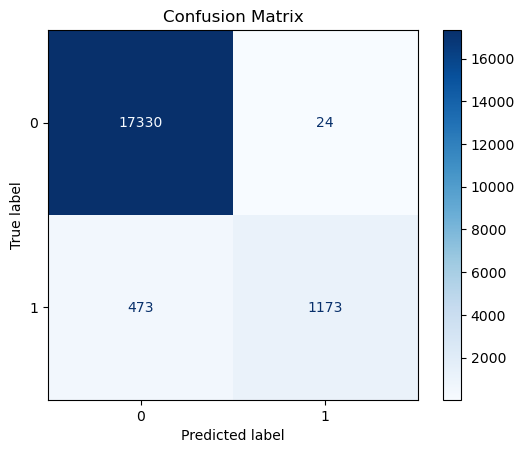

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.98      0.71      0.83      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.86      0.91     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
50 0.5 2 gini best 1 2
Accuracy train AdaBoost: 97.17%
Accuracy test AdaBoost: 97.40%


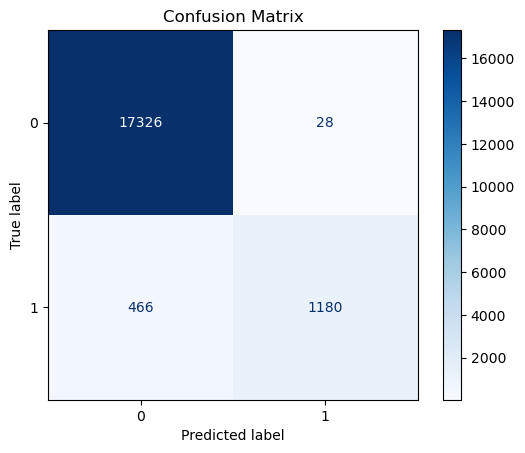

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.98      0.72      0.83      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.86      0.91     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
50 0.5 2 gini best 1 5
Accuracy train AdaBoost: 97.17%
Accuracy test AdaBoost: 97.40%


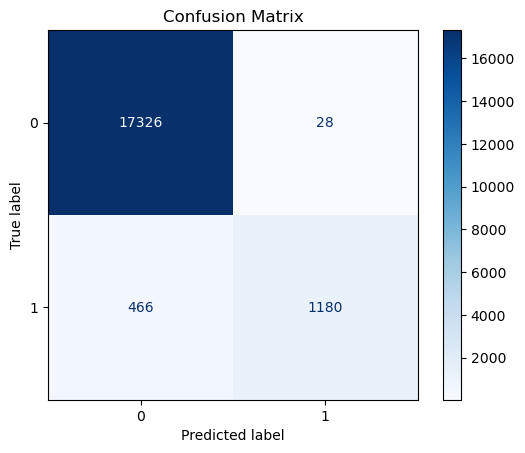

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.98      0.72      0.83      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.86      0.91     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
50 0.5 2 gini best 2 2
Accuracy train AdaBoost: 97.17%
Accuracy test AdaBoost: 97.40%


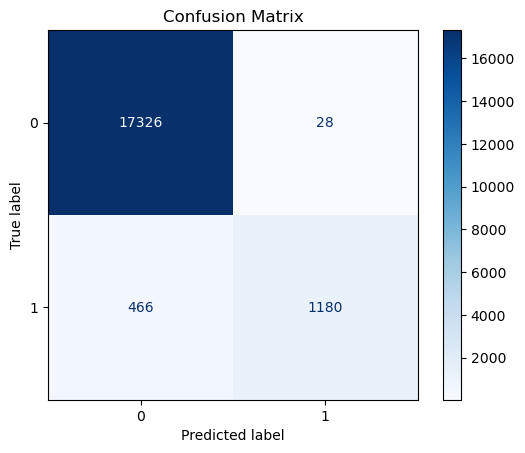

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.98      0.72      0.83      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.86      0.91     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
50 0.5 2 gini best 2 5
Accuracy train AdaBoost: 97.17%
Accuracy test AdaBoost: 97.40%


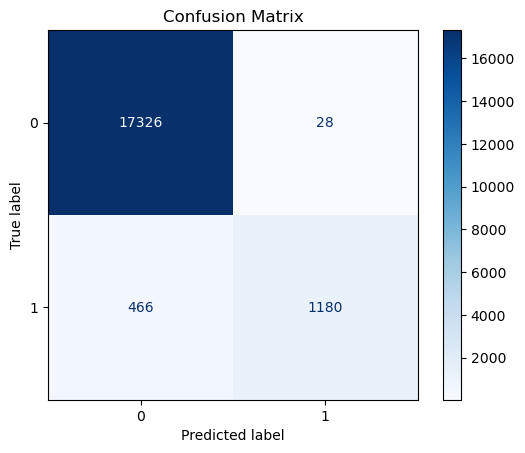

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.98      0.72      0.83      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.86      0.91     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
50 0.5 3 gini best 1 2
Accuracy train AdaBoost: 97.22%
Accuracy test AdaBoost: 97.37%


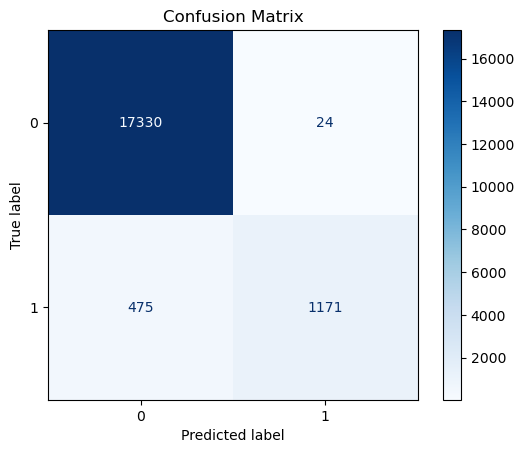

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.98      0.71      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.86      0.91     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
50 0.5 3 gini best 1 5
Accuracy train AdaBoost: 97.22%
Accuracy test AdaBoost: 97.37%


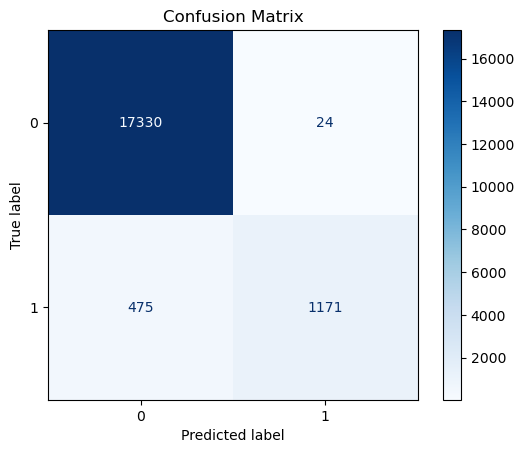

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.98      0.71      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.86      0.91     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
50 0.5 3 gini best 2 2
Accuracy train AdaBoost: 97.22%
Accuracy test AdaBoost: 97.37%


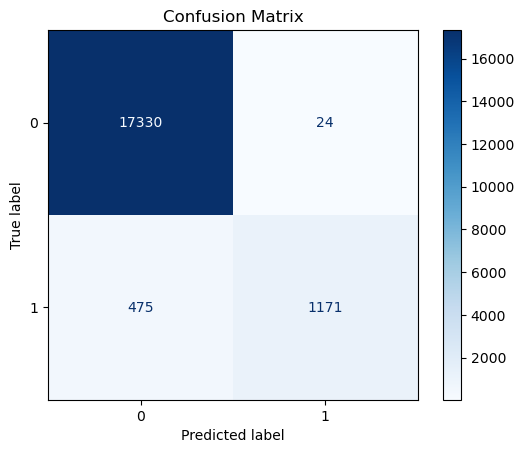

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.98      0.71      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.86      0.91     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
50 0.5 3 gini best 2 5
Accuracy train AdaBoost: 97.22%
Accuracy test AdaBoost: 97.37%


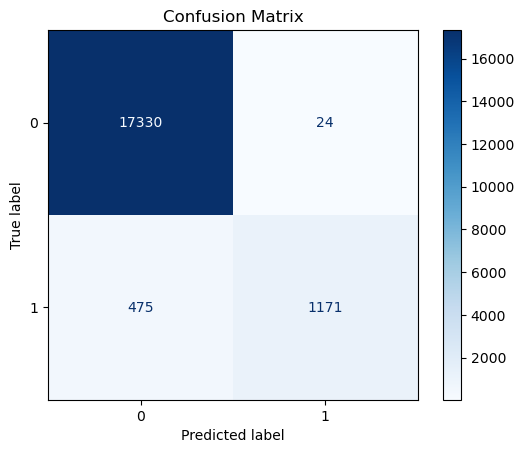

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.98      0.71      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.86      0.91     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
50 1.0 2 gini best 1 2
Accuracy train AdaBoost: 97.16%
Accuracy test AdaBoost: 97.34%


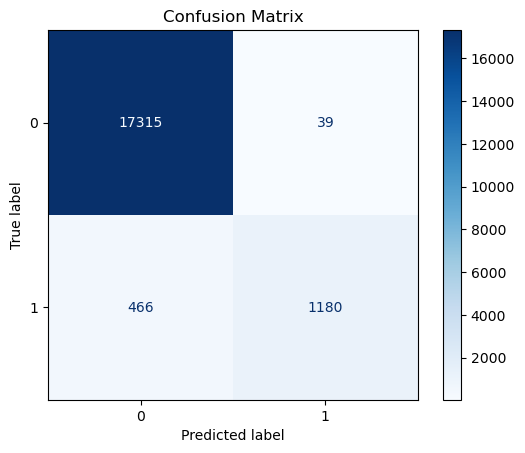

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.97      0.72      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.97      0.86      0.90     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
50 1.0 2 gini best 1 5
Accuracy train AdaBoost: 97.16%
Accuracy test AdaBoost: 97.34%


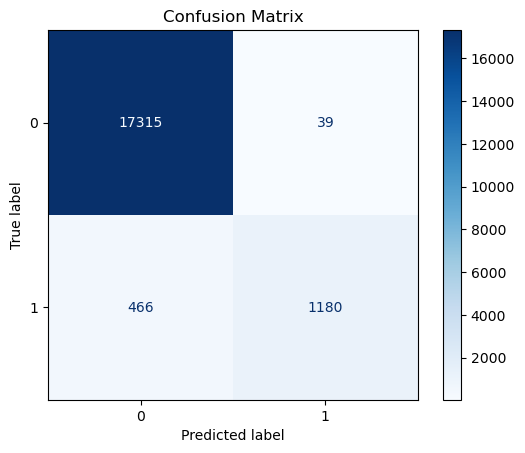

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.97      0.72      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.97      0.86      0.90     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
50 1.0 2 gini best 2 2
Accuracy train AdaBoost: 97.16%
Accuracy test AdaBoost: 97.34%


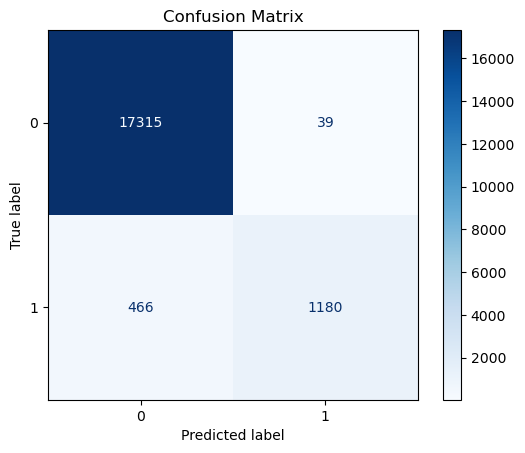

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.97      0.72      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.97      0.86      0.90     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
50 1.0 2 gini best 2 5
Accuracy train AdaBoost: 97.16%
Accuracy test AdaBoost: 97.34%


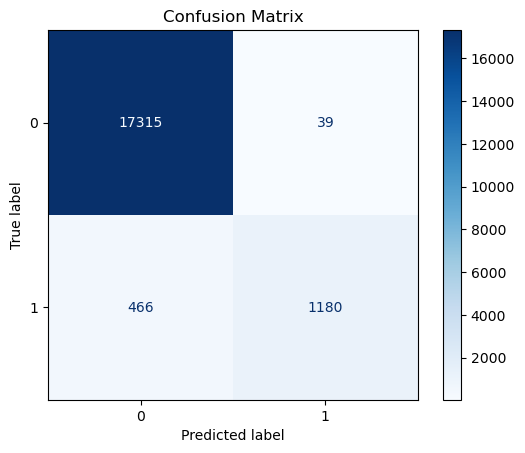

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.97      0.72      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.97      0.86      0.90     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
50 1.0 3 gini best 1 2
Accuracy train AdaBoost: 97.26%
Accuracy test AdaBoost: 97.29%


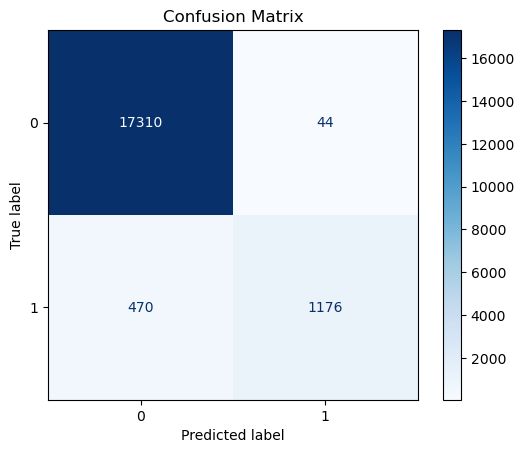

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.96      0.71      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.97      0.86      0.90     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
50 1.0 3 gini best 1 5
Accuracy train AdaBoost: 97.26%
Accuracy test AdaBoost: 97.29%


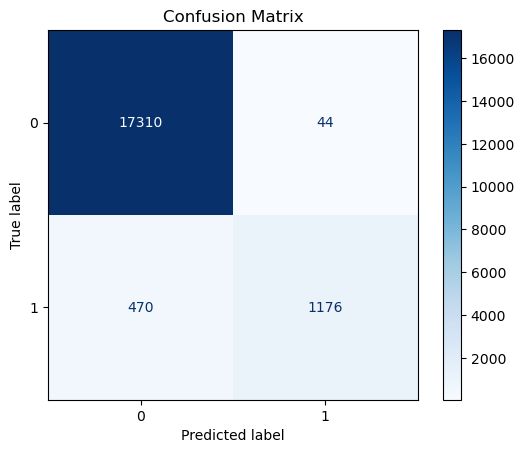

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.96      0.71      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.97      0.86      0.90     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
50 1.0 3 gini best 2 2
Accuracy train AdaBoost: 97.26%
Accuracy test AdaBoost: 97.29%


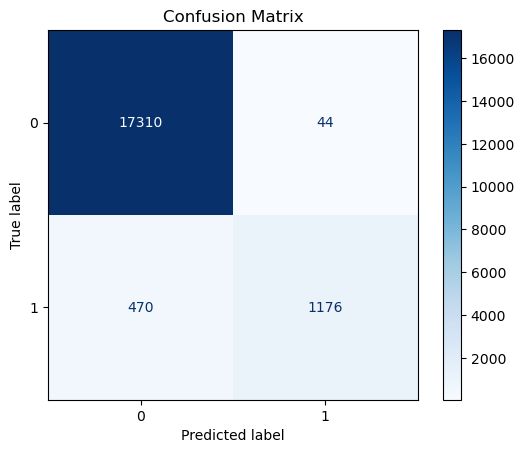

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.96      0.71      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.97      0.86      0.90     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
50 1.0 3 gini best 2 5
Accuracy train AdaBoost: 97.26%
Accuracy test AdaBoost: 97.29%


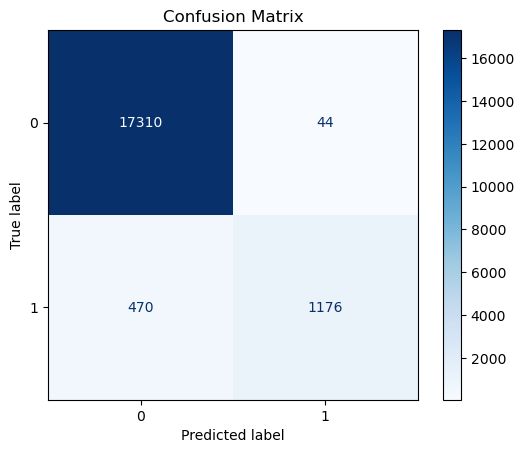

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.96      0.71      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.97      0.86      0.90     19000
weighted avg       0.97      0.97      0.97     19000



In [37]:
list_accuracy = []
n_estimators_list = [10,50]
learning_rate_list = [0.5, 1.0]
max_depth_list = [2, 3]
criterion_list= ['gini']
splitter= ['best']
min_samples_leaf= [1, 2]
min_samples_split= [2, 5]

for i in n_estimators_list:
    for j in learning_rate_list:
        for k in max_depth_list:
            for l in criterion_list:
                for m in splitter:
                    for n in min_samples_leaf:
                        for o in min_samples_split:
                            list_accuracy.append([i,j,k,l,m,n,o, apply_adaboost(i,j,k,l,m,n,o)])

In [38]:
print(list_accuracy)

[[10, 0.5, 2, 'gini', 'best', 1, 2, 0.9738421052631578], [10, 0.5, 2, 'gini', 'best', 1, 5, 0.9738421052631578], [10, 0.5, 2, 'gini', 'best', 2, 2, 0.9738421052631578], [10, 0.5, 2, 'gini', 'best', 2, 5, 0.9738421052631578], [10, 0.5, 3, 'gini', 'best', 1, 2, 0.9738947368421053], [10, 0.5, 3, 'gini', 'best', 1, 5, 0.9738947368421053], [10, 0.5, 3, 'gini', 'best', 2, 2, 0.9738947368421053], [10, 0.5, 3, 'gini', 'best', 2, 5, 0.9738947368421053], [10, 1.0, 2, 'gini', 'best', 1, 2, 0.9733684210526315], [10, 1.0, 2, 'gini', 'best', 1, 5, 0.9733684210526315], [10, 1.0, 2, 'gini', 'best', 2, 2, 0.9733684210526315], [10, 1.0, 2, 'gini', 'best', 2, 5, 0.9733684210526315], [10, 1.0, 3, 'gini', 'best', 1, 2, 0.9738421052631578], [10, 1.0, 3, 'gini', 'best', 1, 5, 0.9738421052631578], [10, 1.0, 3, 'gini', 'best', 2, 2, 0.9738421052631578], [10, 1.0, 3, 'gini', 'best', 2, 5, 0.9738421052631578], [50, 0.5, 2, 'gini', 'best', 1, 2, 0.974], [50, 0.5, 2, 'gini', 'best', 1, 5, 0.974], [50, 0.5, 2, 'gin

In [39]:
best_adaboost = max(list_accuracy, key=lambda x: x[7])
print("La lista con el la mayor accuracy es:", best_adaboost)

La lista con el la mayor accuracy es: [50, 0.5, 2, 'gini', 'best', 1, 2, 0.974]


Mejoramos a 97.4% la accuracy. Volvemos a aplicar adaboost con esos parametros unicamente

C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
50 0.5 2 gini best 1 2
Accuracy train AdaBoost: 97.17%
Accuracy test AdaBoost: 97.40%


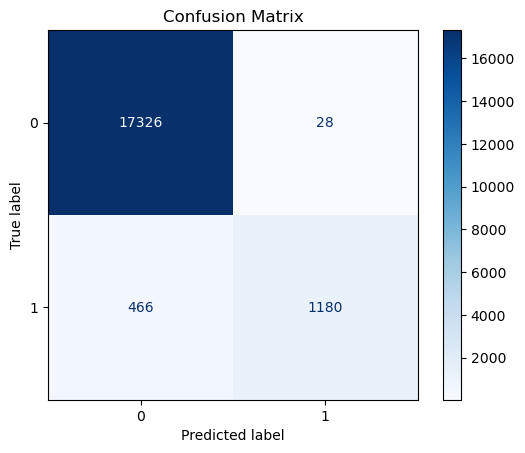

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.98      0.72      0.83      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.86      0.91     19000
weighted avg       0.97      0.97      0.97     19000



0.974

In [40]:
apply_adaboost(50, 0.5, 2, 'gini', 'best', 1, 2)

La mayoría de los que clasifica mal son que sí tienen diabetes y dice que no. Probamos ajustando el threshold.

C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
50 0.5 2 gini best 1 2
Accuracy train AdaBoost: 97.17%
threshold: 0.4
Accuracy test AdaBoost: 69.33%


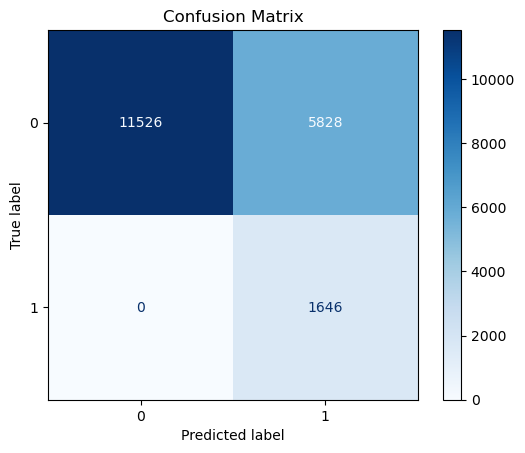

              precision    recall  f1-score   support

           0       1.00      0.66      0.80     17354
           1       0.22      1.00      0.36      1646

    accuracy                           0.69     19000
   macro avg       0.61      0.83      0.58     19000
weighted avg       0.93      0.69      0.76     19000



0.6932631578947368

In [41]:
apply_adaboost(50, 0.5, 2, 'gini', 'best', 1, 2,0.4)

C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
50 0.5 2 gini best 1 2
Accuracy train AdaBoost: 97.17%
threshold: 0.3
Accuracy test AdaBoost: 54.21%


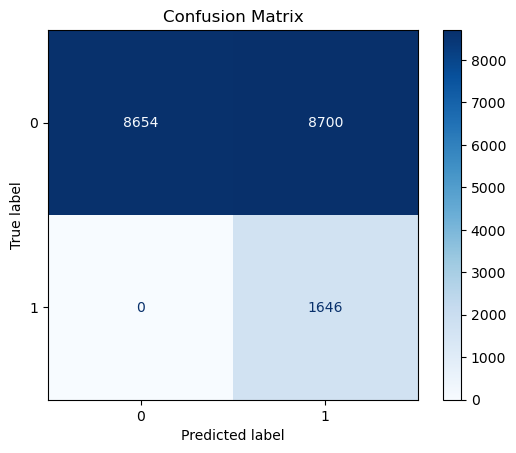

              precision    recall  f1-score   support

           0       1.00      0.50      0.67     17354
           1       0.16      1.00      0.27      1646

    accuracy                           0.54     19000
   macro avg       0.58      0.75      0.47     19000
weighted avg       0.93      0.54      0.63     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
50 0.5 2 gini best 1 2
Accuracy train AdaBoost: 97.17%
threshold: 0.4
Accuracy test AdaBoost: 69.33%


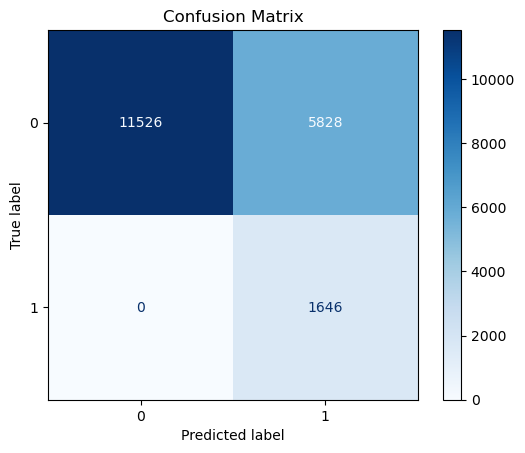

              precision    recall  f1-score   support

           0       1.00      0.66      0.80     17354
           1       0.22      1.00      0.36      1646

    accuracy                           0.69     19000
   macro avg       0.61      0.83      0.58     19000
weighted avg       0.93      0.69      0.76     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
50 0.5 2 gini best 1 2
Accuracy train AdaBoost: 97.17%
threshold: 0.45
Accuracy test AdaBoost: 74.41%


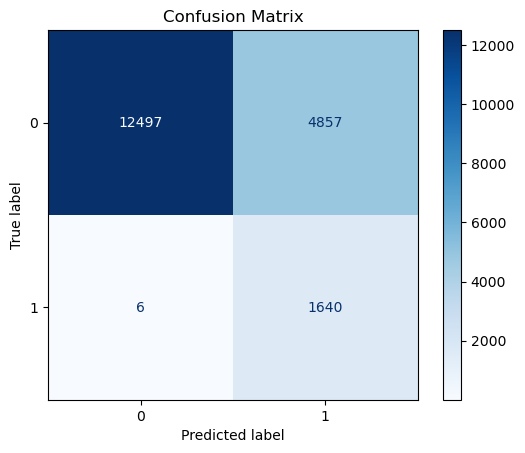

              precision    recall  f1-score   support

           0       1.00      0.72      0.84     17354
           1       0.25      1.00      0.40      1646

    accuracy                           0.74     19000
   macro avg       0.63      0.86      0.62     19000
weighted avg       0.93      0.74      0.80     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
50 0.5 2 gini best 1 2
Accuracy train AdaBoost: 97.17%
threshold: 0.6
Accuracy test AdaBoost: 97.35%


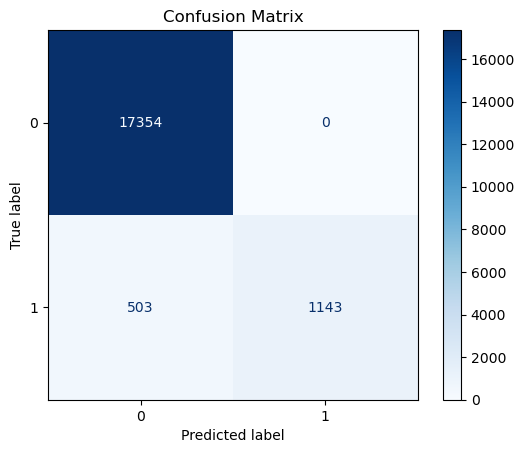

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       1.00      0.69      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.99      0.85      0.90     19000
weighted avg       0.97      0.97      0.97     19000



In [42]:
thresholds = [0.3,0.4,0.45,0.6]
for threshold in thresholds:
    apply_adaboost(50, 0.5, 2, 'gini', 'best', 1, 2,threshold)

Probamos más tresholds

C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
50 0.5 2 gini best 1 2
Accuracy train AdaBoost: 97.17%
threshold: 0.47
Accuracy test AdaBoost: 86.75%


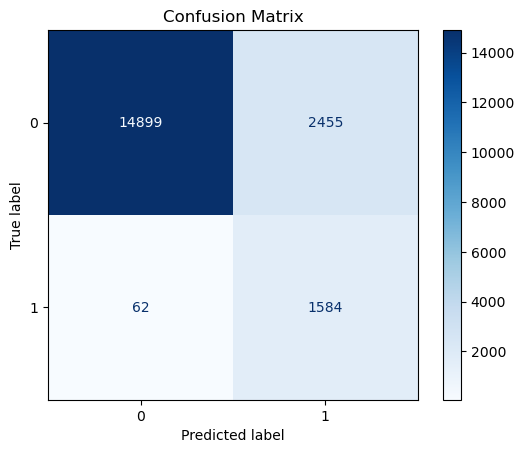

              precision    recall  f1-score   support

           0       1.00      0.86      0.92     17354
           1       0.39      0.96      0.56      1646

    accuracy                           0.87     19000
   macro avg       0.69      0.91      0.74     19000
weighted avg       0.94      0.87      0.89     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
50 0.5 2 gini best 1 2
Accuracy train AdaBoost: 97.17%
threshold: 0.52
Accuracy test AdaBoost: 97.36%


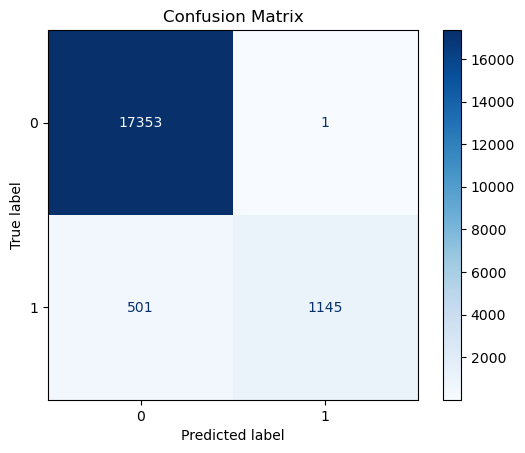

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       1.00      0.70      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.99      0.85      0.90     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
50 0.5 2 gini best 1 2
Accuracy train AdaBoost: 97.17%
threshold: 0.55
Accuracy test AdaBoost: 97.36%


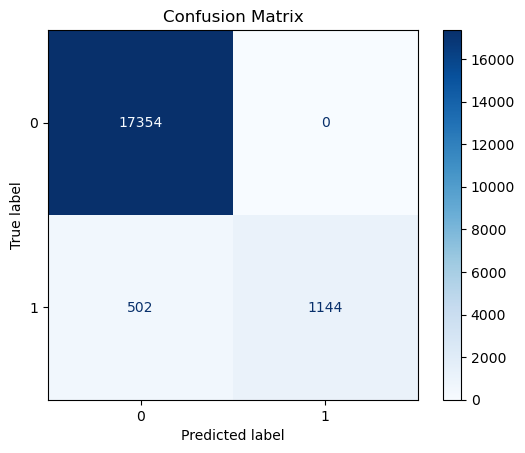

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       1.00      0.70      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.99      0.85      0.90     19000
weighted avg       0.97      0.97      0.97     19000



In [43]:
thresholds = [0.47,0.52,0.55]
for threshold in thresholds:
    apply_adaboost(50, 0.5, 2, 'gini', 'best', 1, 2,threshold)

C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
50 0.5 2 gini best 1 2
Accuracy train AdaBoost: 97.17%
threshold: 0.49
Accuracy test AdaBoost: 96.63%


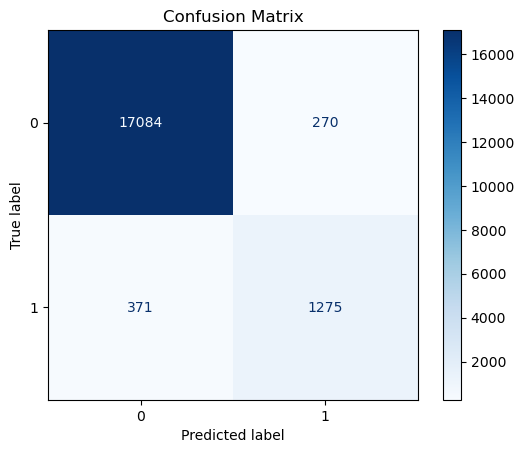

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     17354
           1       0.83      0.77      0.80      1646

    accuracy                           0.97     19000
   macro avg       0.90      0.88      0.89     19000
weighted avg       0.97      0.97      0.97     19000



C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
50 0.5 2 gini best 1 2
Accuracy train AdaBoost: 97.17%
threshold: 0.51
Accuracy test AdaBoost: 97.36%


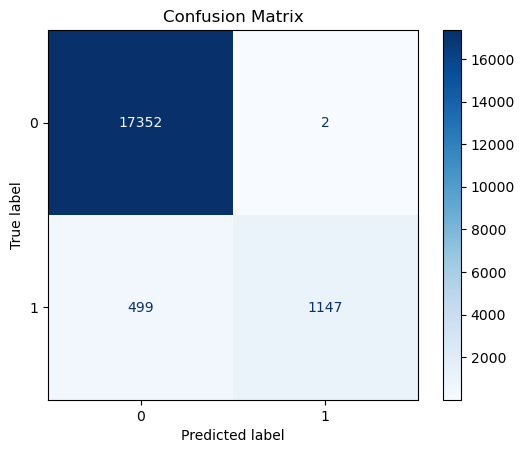

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       1.00      0.70      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.99      0.85      0.90     19000
weighted avg       0.97      0.97      0.97     19000



In [44]:
thresholds = [0.49,0.51]
for threshold in thresholds:
    apply_adaboost(50, 0.5, 2, 'gini', 'best', 1, 2,threshold)

C:\Users\franc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Parametros: n_estimators,learning_rate,base_estimator__max_depth,criterion,splitter,min_samples_leaf,min_samples_split
50 0.5 2 gini best 1 2
Accuracy train AdaBoost: 97.17%
Accuracy test AdaBoost: 97.40%


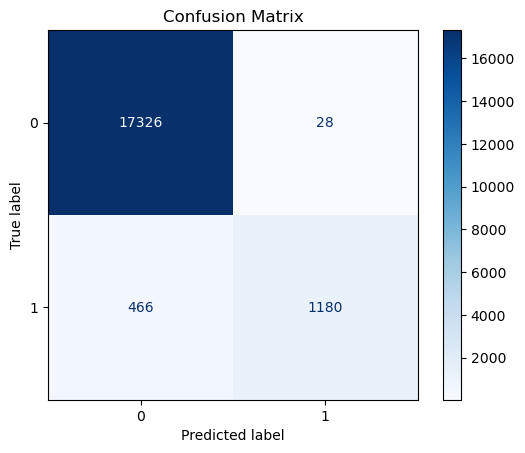

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     17354
           1       0.98      0.72      0.83      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.86      0.91     19000
weighted avg       0.97      0.97      0.97     19000



0.974

In [45]:
apply_adaboost(50, 0.5, 2, 'gini', 'best', 1, 2,0.5)

Concluimos que el mejor threshold es 0.5, el que viene por defecto

Presentamos como 3er modelo una red neuronal, aquí presentamos solo el modelo final que logramos optimizando y ajustando la red:

In [46]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


Epoch 1/25
950/950 [==============================] - 4s 3ms/step - loss: 0.1467 - accuracy: 0.9493 - val_loss: 0.1095 - val_accuracy: 0.9614
Epoch 2/25
950/950 [==============================] - 2s 3ms/step - loss: 0.1123 - accuracy: 0.9609 - val_loss: 0.0995 - val_accuracy: 0.9657
Epoch 3/25
950/950 [==============================] - 3s 3ms/step - loss: 0.1028 - accuracy: 0.9652 - val_loss: 0.0951 - val_accuracy: 0.9664
Epoch 4/25
950/950 [==============================] - 3s 3ms/step - loss: 0.0965 - accuracy: 0.9669 - val_loss: 0.0924 - val_accuracy: 0.9674
Epoch 5/25
950/950 [==============================] - 2s 2ms/step - loss: 0.0929 - accuracy: 0.9680 - val_loss: 0.0876 - val_accuracy: 0.9695
Epoch 6/25
950/950 [==============================] - 2s 3ms/step - loss: 0.0910 - accuracy: 0.9688 - val_loss: 0.0878 - val_accuracy: 0.9693
Epoch 7/25
950/950 [==============================] - 2s 3ms/step - loss: 0.0897 - accuracy: 0.9693 - val_loss: 0.0854 - val_accuracy: 0.9704
Epoch 

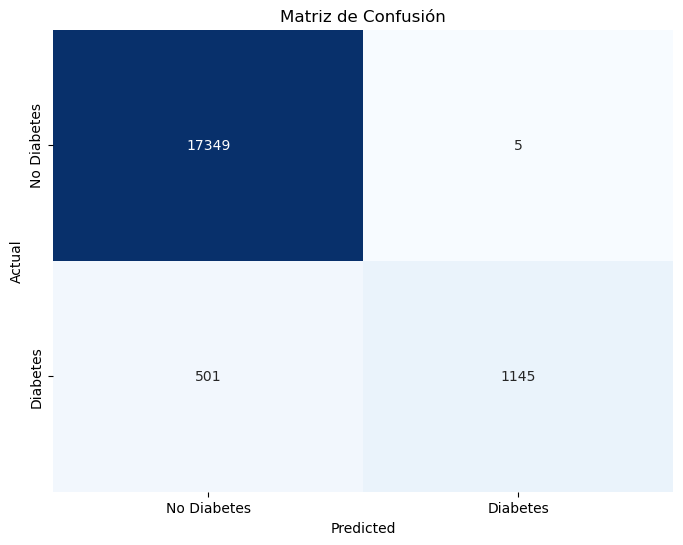

Informe de Clasificación:
              precision    recall  f1-score   support

 No Diabetes       0.97      1.00      0.99     17354
    Diabetes       1.00      0.70      0.82      1646

    accuracy                           0.97     19000
   macro avg       0.98      0.85      0.90     19000
weighted avg       0.97      0.97      0.97     19000



In [47]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Normalizar características
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Crear un modelo secuencial
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(x_train_scaled, y_train, epochs=25, batch_size=64, validation_split=0.2)

# Evaluar en el conjunto de prueba
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# Hacer predicciones
predictions = model.predict(x_test_scaled)
predicted_labels = (predictions > 0.5).astype(int)

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, predicted_labels)
print("Matriz de Confusión:")
print(confusion)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión")
plt.show()

# Imprimir un informe de clasificación
target_names = ['No Diabetes', 'Diabetes']
classification_rep = classification_report(y_test, predicted_labels, target_names=target_names)
print("Informe de Clasificación:")
print(classification_rep)

tras obtener una accuracy de 0,9735, cambiamos el parametro optimizer a rmsprop

Epoch 1/25
950/950 [==============================] - 3s 2ms/step - loss: 0.1422 - accuracy: 0.9511 - val_loss: 0.1090 - val_accuracy: 0.9619
Epoch 2/25
950/950 [==============================] - 3s 3ms/step - loss: 0.1136 - accuracy: 0.9619 - val_loss: 0.1011 - val_accuracy: 0.9653
Epoch 3/25
950/950 [==============================] - 3s 3ms/step - loss: 0.1052 - accuracy: 0.9644 - val_loss: 0.0973 - val_accuracy: 0.9666
Epoch 4/25
950/950 [==============================] - 2s 3ms/step - loss: 0.1002 - accuracy: 0.9662 - val_loss: 0.0963 - val_accuracy: 0.9666
Epoch 5/25
950/950 [==============================] - 2s 2ms/step - loss: 0.0992 - accuracy: 0.9663 - val_loss: 0.0916 - val_accuracy: 0.9684
Epoch 6/25
950/950 [==============================] - 2s 2ms/step - loss: 0.0961 - accuracy: 0.9675 - val_loss: 0.0929 - val_accuracy: 0.9678
Epoch 7/25
950/950 [==============================] - 2s 3ms/step - loss: 0.0950 - accuracy: 0.9678 - val_loss: 0.0902 - val_accuracy: 0.9691
Epoch 

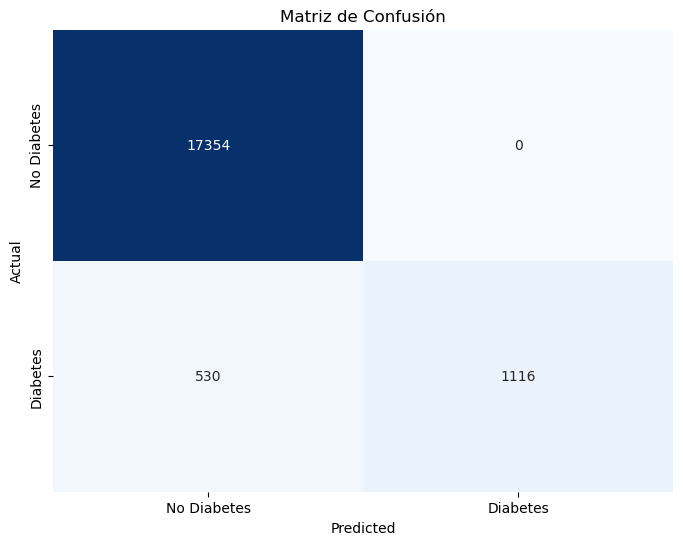

Informe de Clasificación:
              precision    recall  f1-score   support

 No Diabetes       0.97      1.00      0.98     17354
    Diabetes       1.00      0.68      0.81      1646

    accuracy                           0.97     19000
   macro avg       0.99      0.84      0.90     19000
weighted avg       0.97      0.97      0.97     19000



In [48]:
# Crear un modelo secuencial
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# Compilar el modelo con el optimizador RMSprop y la pérdida adecuada para clasificación binaria
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


# Entrenar el modelo
model.fit(x_train_scaled, y_train, epochs=25, batch_size=64, validation_split=0.2)

# Evaluar en el conjunto de prueba
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# Hacer predicciones
predictions = model.predict(x_test_scaled)
predicted_labels = (predictions > 0.5).astype(int)

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, predicted_labels)
print("Matriz de Confusión:")
print(confusion)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión")
plt.show()

# Imprimir un informe de clasificación
target_names = ['No Diabetes', 'Diabetes']
classification_rep = classification_report(y_test, predicted_labels, target_names=target_names)
print("Informe de Clasificación:")
print(classification_rep)


Y para finalizar, probamos el modelo light boost, aquí presentamos la versión final optimizada:

In [49]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


[LightGBM] [Info] Number of positive: 69564, number of negative: 69564
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1482
[LightGBM] [Info] Number of data points in the train set: 139128, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy en el conjunto de prueba: 0.9736
Matriz de Confusión:
[[17353     1]
 [  500  1146]]


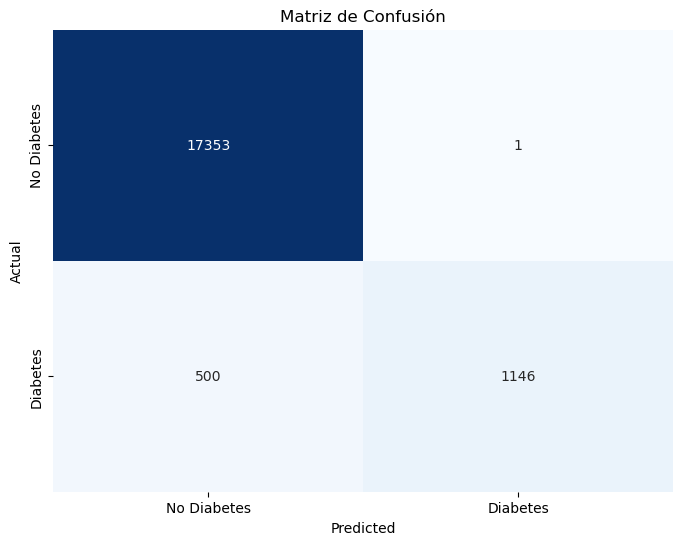

In [50]:
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Supongamos que ya tienes tus datos de entrenamiento y prueba
# x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=8, stratify=y)

# Realizar sobremuestreo con SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Normalizar características
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_resampled)
x_test_scaled = scaler.transform(x_test)

# Crear el conjunto de datos de LightGBM
train_data = lgb.Dataset(x_train_scaled, label=y_train_resampled)
test_data = lgb.Dataset(x_test_scaled, label=y_test, reference=train_data)

# Definir los parámetros del modelo LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 4,
    'learning_rate': 0.005,
    'feature_fraction': 0.9
}

# Entrenar el modelo LightGBM sin early stopping
num_round = 10000
model = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Hacer predicciones
y_pred = model.predict(x_test_scaled)
predicted_labels = (y_pred > 0.67).astype(int)

# Calcular la accuracy del conjunto de prueba
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy en el conjunto de prueba: {accuracy:.4f}")

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, predicted_labels)
print("Matriz de Confusión:")
print(confusion)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión")
plt.show()

Elegimos el adaboost ya que dio una accuracy de 97.4%